# Beat The Bookies: Predicting EPL Matches
_Team C_

__Mohammad Ali Syed, Abdul Al-Fahim, Dylan Hoi, Henry Chen, Chris Wong & Yolanne Lee__

**Contents:**

- [Section 1](#section1): Introduction

- [Section 2](#section2): Data Import

- [Section 3](#section3): Data Transformation & Exploration
>- [Section 3.1](#section31): Initial Data Exploration
>>- [Section 3.1.1](#section311): Relationship Between Attributes
>>- [Section 3.1.2](#section312): Initial Data Preprocessing
>>- [Section 3.1.3](#section313): Training model on entire featureset
>>- [Section 3.1.4](#section314): Random Forest Tree for entire featureset
>>- [Section 3.1.5](#section315): Training model without Referee
>>- [Section 3.1.6](#section316): Random Forest Tree without Referee
>>- [Section 3.1.7](#section317): Training model without Date
>>- [Section 3.1.8](#section318): Random Forest Tree without Date
>>- [Section 3.1.9](#section319): Training model on only in-game stats
>>- [Section 3.1.10](#section3110): Visualising selected features
>- [Section 3.2](#section32): Priors Feature Construction
>>- [Section 3.2.1](#section321): Data Cleaning
>>- [Section 3.2.2](#section322): Cumulative Full-time W/L Ratio
>>- [Section 3.2.3](#section323): Cumulative Half-time W/L Ratio
>>- [Section 3.2.4](#section324): Cumulative Full-Time goals scored
>>- [Section 3.2.5](#section325): Cumulative Half-time W/L Ratio
>>- [Section 3.2.6](#section326): Previous shots on target
>>- [Section 3.2.7](#section327): Computing previous fouls
>>- [Section 3.2.8](#section328): Computing previous corners
>>- [Section 3.2.9](#section329): Computing previous goals before half-time
>>- [Section 3.2.10](#section3210): Compute previous goals after half-time
>>- [Section 3.2.11](#section3211): Computing previous goals conceded before half-time
>>- [Section 3.2.12](#section3212): Computing previous goals conceded after half-time
>>- [Section 3.2.13](#section3213): Matches Played
>- [Section 3.3](#section33): Additional Features
>>- [Section 3.3.1](#section331): Distance Travelled for Away Teams
>>- [Section 3.3.2](#section332): Average shots on goal in the past 3 matches
>>- [Section 3.3.3](#section333): WL Performance of past 3 matches
>>- [Section 3.3.4](#section334): Cumulative Full Time Goal Difference
>>- [Section 3.3.5](#section335): Goalkeeper Stats
>- [Section 3.4](#section34): Derive Priors
>- [Section 3.5](#section35): Final Data Preprocessing
>>- [Section 3.5.1](#section351): Split Data
>- [Section 3.6](#section36): Scale Data


- [Section 4](#section4): Methodology Overview

- [Section 5](#section5): Model Training & Validation
>- [Section 5.1](#section51): Base Models
>>- [Section 5.1.1](#section511): Gaussian Naive Bayes
>>- [Section 5.1.2](#section512): Generic SVM
>>- [Section 5.1.3](#section513): Logistic Regression
>- [Section 5.2](#section52): Boosting Models
>>- [Section 5.2.1](#section521): XGBoost
>>- [Section 5.2.2](#section522): AdaBoost
>>- [Section 5.2.3](#section523): GradientBoost
>>- [Section 5.2.4](#section524): LightGBM
>- [Section 5.3](#section53): Neural Network Models
>>- [Section 5.3.1](#section531): Vanilla Neural Network
>>- [Section 5.3.2](#section532): Deep Neural Network
>>- [Section 5.3.3](#section533): Recurrent Neural Network
>>- [Section 5.3.4](#section534): Gated Recurrent Neural Network
>>- [Section 5.3.5](#section535): Long Short-Term Memory Neural Network
>>- [Section 5.3.6](#section536): Convolutional Neural Network
>- [Section 5.4](#section54): Time Series Models
>>- [Section 5.4.1](#section541): Prophet
>>- [Section 5.4.2](#section542): Arima

- [Section 6](#section6): Results
>- [Section 6.1](#section61): Calculate Train and Test Accuracies
>- [Section 6.2](#section62): Accuracy Comparison Plot
>>- [Section 6.2.1](#section621): Individual Training Accuracy
>>- [Section 6.2.2](#section622): Individual Testing Accuracy
>>- [Section 6.2.3](#section623): Training Accuracy Grouped by Model Type
>>- [Section 6.2.4](#section624): Testing Accuracy Grouped by Model Type
>- [Section 6.3](#section63): Comparison of Best Models from Each Category


- [Section 7](#section7): Final Predictions on Test Set
>- [Section 7.1](#section71): Data Cleaning
>- [Section 7.2](#section72): Priors Derivation
>- [Section 7.3](#section73): Build Final Dataset
>- [Section 7.4](#section74): Generate Final Predictions

## 1. Introduction
<a name='section1'></a>

## 2. Data Import
<a name='section2'></a>

In [3]:
# Import packages
import math
import numpy as np
import pandas as pd
import datetime as datetime
import seaborn as sns
from collections import Counter, deque


# For Computing Priors
import sys
try:
    from geopy.distance import geodesic
except ImportError:
    !{sys.executable} -m pip install geopy
    print("Installed geopy. Please try running this cell again.")
try:
    from sklearn.impute import SimpleImputer
except ImportError:
    !{sys.executable} -m pip install sklearn
    print("Installed sklearn. Please try running this cell again.")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report,confusion_matrix, accuracy_score


# For Visualisation
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image


# For Model Selection
import warnings
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA, KernelPCA
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression


# For creating Tensorflow models
import keras
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout, SimpleRNN, GRU, LSTM, Conv1D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt


# For plotting ROC and Precision Recall curves
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay


# For OS agnostic path handling
from os import path


# Additional packages
try:
    import optuna
except ImportError:
    !{sys.executable} -m pip install optuna
    print("Installed optuna. Please try running this cell again.")
try:
    import lightgbm
except ImportError:
    !{sys.executable} -m pip install lightgbm
    print("Installed lightgbm. Please try running this cell again.")
try:
    import xgboost as xgb
except ImportError:
    !{sys.executable} -m pip install xgboost
    print("Installed xgboost. Please try running this cell again.")
try:
    from statsmodels.tsa.statespace.sarimax import SARIMAX
except ImportError:
    !{sys.executable} -m pip install statsmodels
    print("Installed statsmodels. Please try running this cell again.")


# This module cannot be easily installed using pip on Windows so we have commented it out
# Please uncomment the import when you are sure you have Prophet installed and working correctly
# Please use conda to install Prophet (you may have to 'conda install gcc' first)
# Please note this import may throw a warning "Importing plotly failed. Interactive plots will not work."
# This can be safely ignored as we do not use plotly for plotting in this notebook
#from prophet import *

In [4]:
# Import Data

# EPL Training Data
dirName = 'Data_Files/'
filePath = dirName + 'epl-training.csv'
data = pd.read_csv(filePath)

#EPL Test Dataset
dirName = 'Data_Files/'
filePath = dirName + 'epl-test.csv'
testData = pd.read_csv(filePath)

# Additional EPL Training Data
# downloaded from www.football-stats.co.uk and concatenated from seasons 2000-2008.
# Reformatted to suit our current data architecture, additional 3,047 rows x 22 columns
filePath = dirName + 'epl-training-extra.csv'
extraData = pd.read_csv(filePath)
data = extraData.append(data, ignore_index = True) #append additional data of seasons 2000-2008

# Additional EPL Training Data
# downloaded from www.football-stats.co.uk and concatenated from seasons 2021.
# Reformatted to suit our current data architecture, additional 158 rows x 22 columns
filePath = dirName + 'epl-training-updated.csv'
updatedData = pd.read_csv(filePath)

# Additional EPL Stadium Location Data
filePath = dirName + 'epl-stadium.csv'
positionalData = pd.read_csv(filePath)

# Additional EPL Goalkeeper Data
filePath = dirName + 'epl-goalkeeping.csv'
GKData = pd.read_csv(filePath)

#Remove empty nan columns at the end
data = data.iloc[:, 0:22]
pd.set_option('display.max_columns', None)
data.head()

Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
0  19/08/2000  Charlton       Man City     4     0   H     2     0   H   
1  19/08/2000   Chelsea       West Ham     4     2   H     1     0   H   
2  19/08/2000  Coventry  Middlesbrough     1     3   A     1     1   D   
3  19/08/2000     Derby    Southampton     2     2   D     1     2   A   
4  19/08/2000     Leeds        Everton     2     0   H     2     0   H   

            Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0        Rob Harris  17   8   14    4  13  12   6   6   1   2   0   0  
1     Graham Barber  17  12   10    5  19  14   7   7   1   2   0   0  
2      Barry Knight   6  16    3    9  15  21   8   4   5   3   1   0  
3       Andy D'Urso   6  13    4    6  11  13   5   8   1   1   0   0  
4  Dermot Gallagher  17  12    8    6  21  20   6   4   1   3   0   0

## 3. Data Transformation & Exploration
<a name='section3'></a>

In [5]:
#Helper Functions

def corr_matrix(X, feature):
    corr= X.corr()
    corr_y = abs(corr[feature])
    highest_corr = corr_y[corr_y >0.2]
    highest_corr.sort_values(ascending=True)
    return highest_corr

def rf_model(X_train, X_test, y_train, y_test):
    rf=RandomForestClassifier(random_state = 42)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    accuracy = calc_accuracy(preds, y_test)
    return rf, preds, accuracy

def feat_importances(X_train, rf):
    feature_importances = list(zip(X_train, rf.feature_importances_))
    feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    return feature_importances_ranked

def select_feat(X_train, y_train):
    feature_selector = SelectFromModel(RandomForestClassifier(random_state = 42)).fit(X_train, y_train)
    selected_feat= X_train.columns[(feature_selector.get_support())]
    return selected_feat

def calc_accuracy(preds, labels):
    accuracy = accuracy_score(labels, preds) * 100
    return accuracy

def rf_tree_visualiser(rf, featuresetName, feature_names):
    tree = rf.estimators_[10]  #Take 10th random tree
    export_graphviz(tree, out_file = featuresetName + '.dot', feature_names = list(feature_names),
                    rounded = True, proportion = False, 
                    precision = 2, filled = True, max_depth = 3)
    call(['dot', '-Tpng', featuresetName + '.dot', '-o', featuresetName + '.png'],shell=True)
    return featuresetName + '.png'

def scatter(data, title, xlabel, ylabel):
    # Assume data is an array of tuples
    x, y = zip(*data)
    # s is the area of the circles in the plot
    plt.scatter(x, y, s=50)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
# https://towardsdatascience.com/stop-one-hot-encoding-your-time-based-features-24c699face2f
def transformation(column):
    max_value = column.max()
    sin_values = [math.sin((2*math.pi*x)/max_value) for x in list(column)]
    cos_values = [math.cos((2*math.pi*x)/max_value) for x in list(column)]
    return sin_values, cos_values

## 3.1 Intial Data Exploration
<a name='section31'></a>

In [103]:
############################################# Feature Visualisation
# Visualise correlations between different statistics
from pandas.plotting import scatter_matrix

# Sort data by teams
teams = {}
referees = {}
for i in data.groupby('HomeTeam').mean().T.columns:
    teams[i] = []
for i in data.groupby('Referee').mean().T.columns:
    referees[i] = []

# Team Summary Statistics
home_team_stats = pd.DataFrame()
away_team_stats = pd.DataFrame()

teams = pd.unique(data[["HomeTeam"]].values.ravel())

for team in teams:
    # Compute summary stats as home team
    team_stats = data[(data["HomeTeam"] == team)]
    team_stats = team_stats.iloc[:, [3, 6, 10, 12, 14, 16, 18, 20]]
    team_stats = team_stats.sum()

    performance = data[(data["HomeTeam"] == team)].iloc[:, 5]
    num_vals = len(performance)
    
    performance = performance.value_counts()
    performance_keys = performance.keys()
    performance_values = performance.values
    performance = zip(performance.keys(), performance.values)
    
    for key, value in performance:
        metric = value/num_vals
        
        if key == "H":
            team_stats["Win Rate"] = metric
            
        elif key == "A":
            team_stats["Lose Rate"] = metric
        
        else:
            team_stats["Draw Rate"] = metric

    home_team_stats[team] = pd.DataFrame(team_stats) ##causing problems

    # Compute summary stats as away team
    team_stats = data[(data["AwayTeam"] == team)]
    team_stats = team_stats.iloc[:, [4, 7, 11, 13, 15, 17, 19, 21]]
    team_stats = team_stats.sum()

    performance = data[(data["AwayTeam"] == team)].iloc[:, 5]
    num_vals = len(performance)

    performance = performance.value_counts()
    performance_keys = performance.keys()
    performance_values = performance.values
    performance = zip(performance.keys(), performance.values)
    
    for key, value in performance:
        metric = value/num_vals
        
        if key == "A":
            team_stats["Win Rate"] = metric
            
        elif key == "H":
            team_stats["Lose Rate"] = metric
        
        else:
            team_stats["Draw Rate"] = metric


    away_team_stats[team] = pd.DataFrame(team_stats)

# Sort by strongest to weakest team, by win rate
home_team_stats = home_team_stats.sort_values(by='Win Rate', axis=1, ascending=False)
away_team_stats = away_team_stats.sort_values(by='Win Rate', axis=1, ascending=False)
home_team_stats
# Interesting to note, Man U ranked lower on every metric except fouls and yellow cards compared to Chelsea but had higher win rate -> could suggest the more aggressive the team, the higher the win rate

Man United      Arsenal      Chelsea    Liverpool     Man City  \
FTHG        842.000000   857.000000   835.000000   797.000000   787.000000   
HTHG        392.000000   368.000000   397.000000   364.000000   358.000000   
HS         6518.000000  6203.000000  6530.000000  6793.000000  5949.000000   
HST        3195.000000  3130.000000  3052.000000  3094.000000  2749.000000   
HF         4370.000000  4341.000000  4325.000000  4053.000000  4137.000000   
HC         2794.000000  2933.000000  2693.000000  2921.000000  2764.000000   
HY          523.000000   549.000000   523.000000   393.000000   487.000000   
HR           13.000000    24.000000    24.000000    16.000000    24.000000   
Win Rate      0.699248     0.671679     0.664160     0.631579     0.623684   
Lose Rate     0.127820     0.117794     0.112782     0.120301     0.210526   
Draw Rate     0.172932     0.210526     0.223058     0.248120     0.165789   

             Tottenham      Everton    Newcastle     Ipswich        Stoke  \
FTHG        720.000000   629.000000   526.000000   51.000000   248.000000   
HTHG        324.000000   273.000000   238.000000   17.000000   115.000000   
HS         6170.000000  5331.000000  4862.000000  528.000000  2181.000000   
HST        2958.000000  2475.000000  2253.000000  261.000000   854.000000   
HF         4396.000000  4699.000000  4227.000000  382.000000  2191.000000   
HC         2621.000000  2497.000000  2166.000000  268.000000  1002.000000   
HY          521.000000   560.000000   501.000000   25.000000   317.000000   
HR           19.000000    28.000000    26.000000    1.000000    14.000000   
Win Rate      0.581454     0.496241     0.448753    0.447368     0.426316   
Lose Rate     0.203008     0.248120     0.296399    0.315789     0.289474   
Draw Rate     0.215539     0.255639     0.254848    0.236842     0.284211   

                 Leeds    Leicester       Fulham     West Ham    Blackburn  \
FTHG        145.000000   274.000000   380.000000   487.000000   289.000000   
HTHG         65.000000   120.000000   167.000000   219.000000   139.000000   
HS         1284.000000  2412.000000  3433.000000  4406.000000  2645.000000   
HST         590.000000   928.000000  1698.000000  1934.000000  1343.000000   
HF         1358.000000  2114.000000  3247.000000  3909.000000  2886.000000   
HC          622.000000  1106.000000  1531.000000  1956.000000  1206.000000   
HY          153.000000   244.000000   380.000000   534.000000   342.000000   
HR            4.000000    13.000000    23.000000    17.000000    23.000000   
Win Rate      0.421053     0.421053     0.421053     0.412281     0.411483   
Lose Rate     0.326316     0.315789     0.357895     0.345029     0.306220   
Draw Rate     0.252632     0.263158     0.221053     0.242690     0.282297   

            Portsmouth     Charlton     Reading  Southampton       Bolton  \
FTHG        184.000000   179.000000   71.000000   376.000000   278.000000   
HTHG         75.000000    86.000000   28.000000   178.000000   129.000000   
HS         1826.000000  1436.000000  570.000000  3561.000000  2787.000000   
HST         988.000000   772.000000  297.000000  1433.000000  1546.000000   
HF         1691.000000  1639.000000  583.000000  3079.000000  2617.000000   
HC          839.000000   731.000000  382.000000  1514.000000  1288.000000   
HY          194.000000   158.000000   65.000000   334.000000   296.000000   
HR           12.000000    13.000000    5.000000    24.000000    17.000000   
Win Rate      0.406015     0.406015    0.403509     0.394737     0.387560   
Lose Rate     0.338346     0.345865    0.385965     0.315789     0.311005   
Draw Rate     0.255639     0.248120    0.210526     0.289474     0.301435   

           Sheffield United      Swansea   Birmingham  Middlesbrough  \
FTHG              60.000000   179.000000   162.000000     251.000000   
HTHG              27.000000    73.000000    66.000000     110.000000   
HS               620.000000  1647.000000  1365.000000    2236.000000   


### 3.1.1 Relationship Between Attributes
<a name='section311'></a>

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


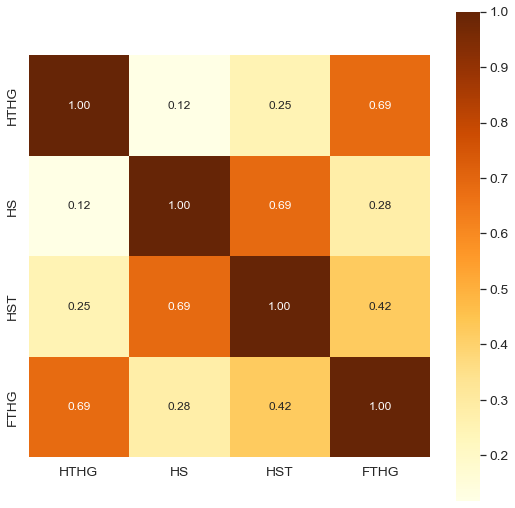

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


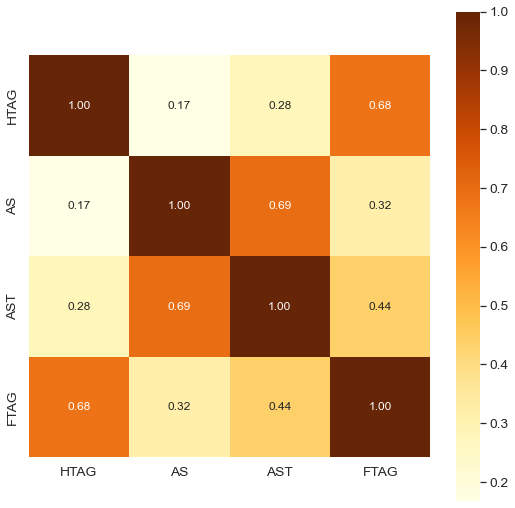

In [7]:
# plot Pearson Correlation Heatmap to see the top 10 features related to full time home goals FTHG

def plotGraph(X_all, Y_all):

    df = pd.concat([X_all,Y_all],axis=1)

    #FTHG correlation matrix
    plt.figure(figsize=(9,9))
    k = 8 # number of variables for heatmap
    corr = df.corr()
    sns.set(font_scale=1.25)
    hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, cmap="YlOrBr")
    plt.show()

attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','HF', 'AF', 'FTHG', 'HTAG', 'AS', 'AST', 'FTAG'],1)
label = data['FTHG']
plotGraph(attributes,label)

# plot Pearson Correlation Heatmap to see the top 10 features related to full time away goals FTAG

def plotGraph(X_all, Y_all):

    df = pd.concat([X_all,Y_all],axis=1)

    #FTHG correlation matrix
    plt.figure(figsize=(9,9))
    k = 8 # number of variables for heatmap
    corr = df.corr()
    sns.set(font_scale=1.25)
    hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, cmap="YlOrBr")
    plt.show()

attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR','HF', 'AF', 'FTAG', 'HTHG', 'HS', 'HST', 'FTHG'],1)
label = data['FTAG']
plotGraph(attributes,label)

In [8]:
#Split dataset into input and output data

#Output variable
y = data.iloc[:, 5:6]
#Reformat y to make it suitable for LabelEncoder

y = np.array(y).reshape(len(y))

#Input variables
#Remove give away columns such as goals scored
data_filtered = data.drop(labels = data.columns[[3, 4, 5, 6, 7, 8]], axis = 1)

### 3.1.2 Initial Data Preprocessing
<a name='section312'></a>

In [9]:
#Data preprocessing

#Dates
data_filtered['Date'] = pd.to_datetime(data_filtered['Date'])
#year has been removed as we need to predict future results -> https://towardsdatascience.com/machine-learning-with-datetime-feature-engineering-predicting-healthcare-appointment-no-shows-5e4ca3a85f96
year = data_filtered['Date'].dt.year
data_filtered['Month'] = data_filtered['Date'].dt.month
data_filtered['Week'] = data_filtered['Date'].dt.isocalendar().week
data_filtered['Day'] = data_filtered['Date'].dt.day
#Extract encoded dates
dates_split = data_filtered.iloc[:, 16:19]
#Remove encoded dates and original date column
data_filtered = data_filtered.drop(labels = data_filtered.columns[[0, 16, 17, 18]], axis = 1)

#Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')

#Teams
home_t = data_filtered.iloc[:, 0:1]
home_t = encoder.fit_transform(home_t) #################does this need to be done separately?

away_t = data_filtered.iloc[:, 1:2]
away_t = encoder.fit_transform(away_t) #################does this need to be done separately?
data_filtered = data_filtered.drop(labels = data_filtered.columns[[0,1]], axis = 1)

#Referees 
ref = data_filtered.iloc[:, 0:1]
ref = encoder.fit_transform(ref)       #################does this need to be done separately?
data_filtered = data_filtered.drop(labels = data_filtered.columns[[0]], axis = 1)

#Re-stack columns
data_filtered = data_filtered.join(pd.DataFrame(ref.toarray()), rsuffix = '_ref')
data_filtered = data_filtered.join(pd.DataFrame(home_t.toarray()), rsuffix = '_home')
data_filtered = data_filtered.join(pd.DataFrame(away_t.toarray()), rsuffix = '_away')
data_filtered = dates_split.join(data_filtered)
data_filtered.columns = data_filtered.columns.astype(str)
data_filtered.head()

Month  Week  Day  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR    0  \
0      8    33   19  17   8   14    4  13  12   6   6   1   2   0   0  0.0   
1      8    33   19  17  12   10    5  19  14   7   7   1   2   0   0  0.0   
2      8    33   19   6  16    3    9  15  21   8   4   5   3   1   0  0.0   
3      8    33   19   6  13    4    6  11  13   5   8   1   1   0   0  0.0   
4      8    33   19  17  12    8    6  21  20   6   4   1   3   0   0  0.0   

     1    2    3    4    5    6    7    8    9   10   11   12   13   14   15  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    16   17   18   19   20   21   22   23   24   25   26   27   28   29   30  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    31   32   33   34   35   36   37   38   39   40   41   42   43   44   45  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

    46   47   48   49   50   51   52   53   54   55   56   57   58   59   60  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    61   62   63   64   65   66   67   68   69   70   71   72   73   74   75  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    76   77   78   79   80   81   82   83   84   85   86   87   88   89   90  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    91   92   93   94   95   96   97   98   99  100  101  102  103  104  105  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0 

### 3.1.3 Training model on entire featureset
<a name='section313'></a>

In [10]:
#Train model on entire featureset
X_train, X_test, y_train, y_test = train_test_split(data_filtered, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

rf, preds, base_accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy on entire featureset: " + str(base_accuracy) + "%")


Accuracy on entire featureset: 56.64160401002506%


### 3.1.4 Random Forest Tree for entire featureset
<a name='section314'></a>

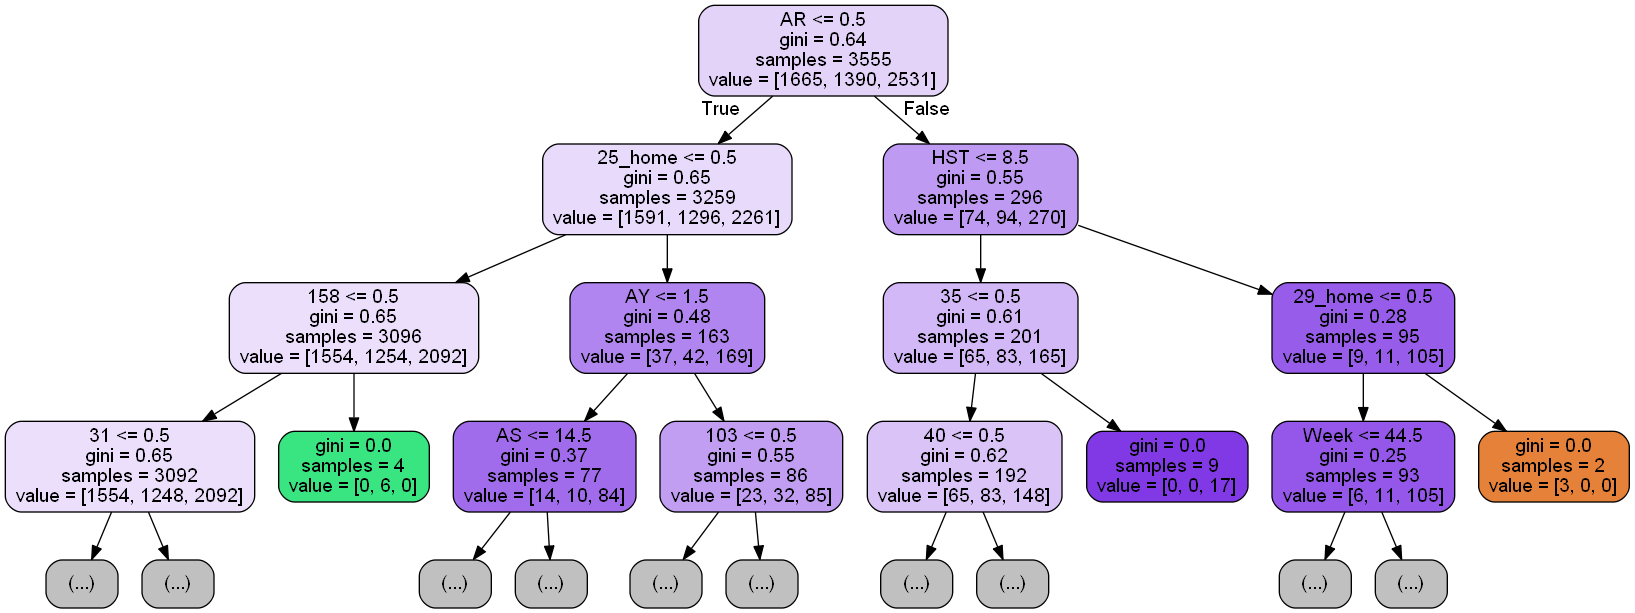

In [11]:
#Print rf tree N.B. may not work without importing graphviz, random forest images will be on GitHub
Image(filename = rf_tree_visualiser(rf, path.join("RF_Images", "featureSetTree"), data_filtered.columns))

### 3.1.5 Training model without Referee
<a name='section315'></a>

In [12]:
#Train model without Referee feature
data_filtered_no_ref = data_filtered.iloc[:, 0:15].join(data_filtered.iloc[:, 58:])
X_train, X_test, y_train, y_test = train_test_split(data_filtered_no_ref, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


rf, preds, accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy without Referee: " + str(accuracy) + "%")
print("Difference from before: " + str(accuracy - base_accuracy) + "%")
#Ref is having negative impact so remove
data_filtered = data_filtered_no_ref

Accuracy without Referee: 56.97577276524645%
Difference from before: 0.3341687552213841%


### 3.1.6 Random Forest Tree without Referee
<a name='section316'></a>

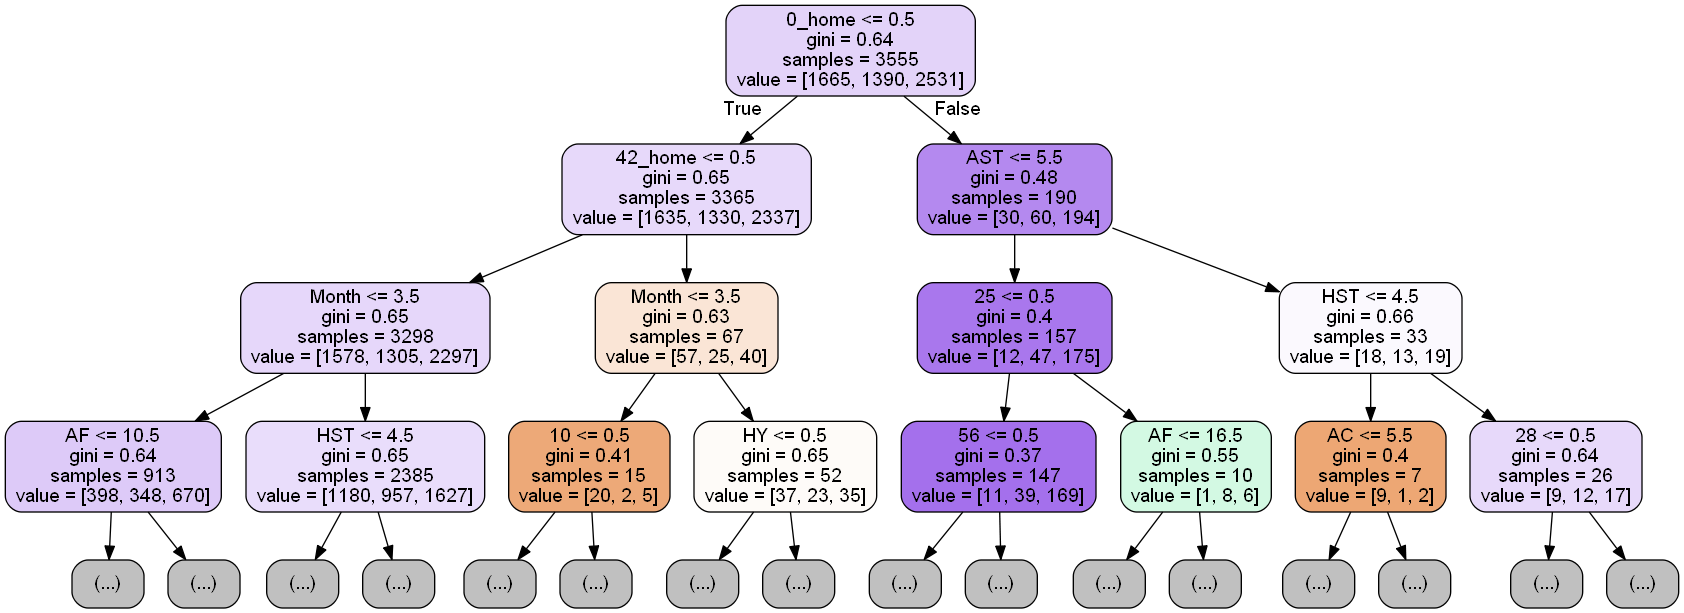

In [13]:
#Print rf tree (no ref)
Image(filename = rf_tree_visualiser(rf, path.join("RF_Images", "featureSetTreeNoRef"), data_filtered_no_ref.columns))

### 3.1.7 Training model without Date
<a name='section317'></a>

In [14]:
#Train model without Date feature
data_filtered_no_date = data_filtered.iloc[:, 3:]
X_train, X_test, y_train, y_test = train_test_split(data_filtered_no_date, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


rf, preds, accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy without Dates: " + str(accuracy) + "%")
print("Difference from before: " + str(accuracy - base_accuracy) + "%")

Accuracy without Dates: 56.68337510442774%
Difference from before: 0.04177109440267657%


### 3.1.8 Random Forest Tree without Date
<a name='section318'></a>

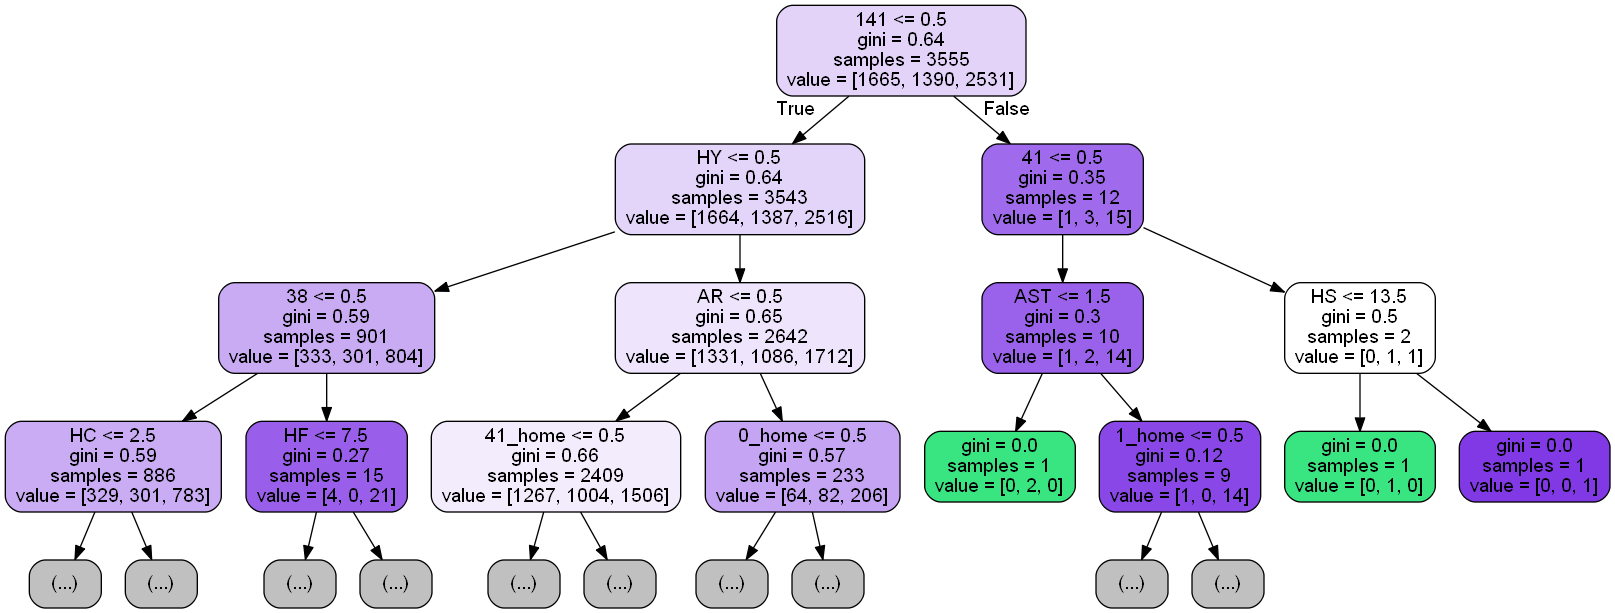

In [15]:
#Print rf tree (no dates)
Image(filename = rf_tree_visualiser(rf, path.join("RF_Images",'featureSetTreeNoDate'), data_filtered_no_date.columns))

### 3.1.9 Training model on only in-game stats
<a name='section319'></a>

In [16]:
#Train model on only in-game stats to identify most important ones
data_filtered_only_game_stats = data_filtered.iloc[:, 3:15]
X_train, X_test, y_train, y_test = train_test_split(data_filtered_only_game_stats, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


rf, preds, all_stats_accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy on all in-game stats: " + str(all_stats_accuracy) + "%")

Accuracy on all in-game stats: 55.51378446115288%


### 3.1.10 Visualising selected features
<a name='section3110'></a>

In [17]:
#Visualise and analyse initial results

#Display feature importances in descending order
feature_importances = feat_importances(X_train, rf)
print("Feature Importances: ")
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances];

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, preds))
print("\nClassification Report: ")
print(classification_report(y_test, preds))
#Important note: AF/HF rank higher than HC/AC

Feature Importances: 
Feature: HST                                 Importance: 0.12062860482667323
Feature: HS                                  Importance: 0.1095698299548388
Feature: AF                                  Importance: 0.10773279032401849
Feature: AS                                  Importance: 0.10644024578251926
Feature: HF                                  Importance: 0.10552340949204712
Feature: AST                                 Importance: 0.10340580600855823
Feature: HC                                  Importance: 0.09977784314864165
Feature: AC                                  Importance: 0.09278372110367616
Feature: AY                                  Importance: 0.06835535366590526
Feature: HY                                  Importance: 0.061179795298330265
Feature: AR                                  Importance: 0.01327811150903203
Feature: HR                                  Importance: 0.011324488885759381

Confusion Matrix: 
[[393  63 238]
 [175  73 355]
 [1

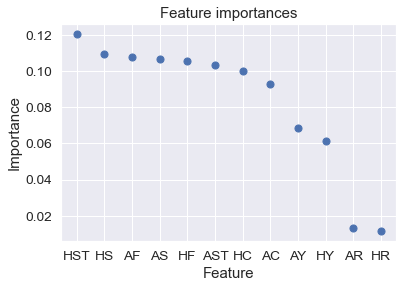

In [18]:
# Visualise feature importance
scatter(feature_importances, "Feature importances", "Feature", "Importance")

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


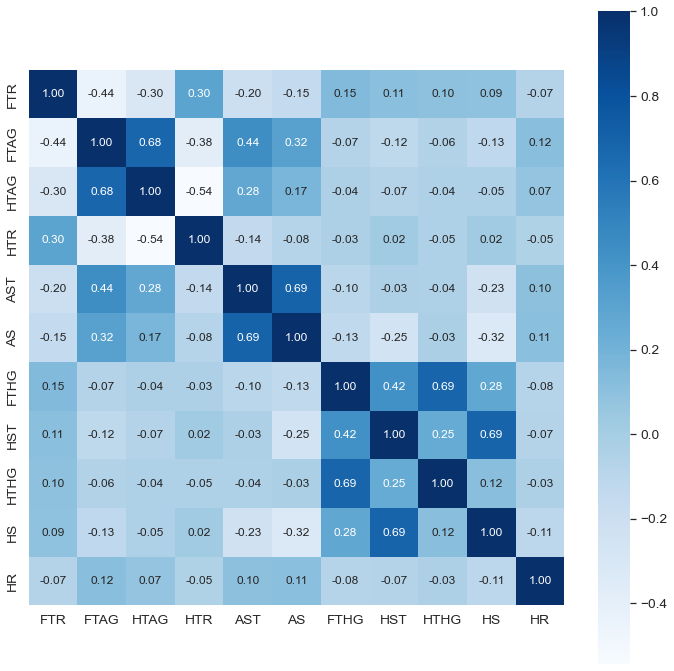

In [19]:
# plot Pearson Correlation Heatmap to see the top 10 features related to the match result FTR

def plotGraph(X_all, Y_all):

    df = pd.concat([X_all,Y_all],axis=1)

    #FTR correlation matrix
    plt.figure(figsize=(12,12))
    k = 11 # number of variables for heatmap
    cols = abs(df.astype(float).corr()).nlargest(k, 'FTR')['FTR'].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, cmap="Blues", yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

attributes = data.drop(['Date','HomeTeam', 'AwayTeam', 'Referee','FTR'],1)
attributes['HTR'] = attributes['HTR'].map({'H':1,'A':0,'D':2}) 
label = data['FTR']
label = label.map({'H':1,'A':0,'D':2})
plotGraph(attributes,label)


In [20]:
#Feature Selection
#change names and display selected features more nicely, ideally with their importance, gini impurity...
selected_feat = select_feat(X_train, y_train)
print(selected_feat)

Index(['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC'], dtype='object')


In [21]:
#Train model on selected in-game stats only
indexes = []
for feat in selected_feat:
    indexes.append(data_filtered_only_game_stats.columns.get_loc(feat))
    
data_filtered_filtered_game_stats = data_filtered_only_game_stats.iloc[:, indexes]

X_train, X_test, y_train, y_test = train_test_split(data_filtered_filtered_game_stats, y, test_size=0.3, random_state=42)

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


rf, preds, reduced_stats_accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy on reduced in-game stats: " + str(reduced_stats_accuracy) + "%")
print("Difference compared to all in-game stats: " + str(reduced_stats_accuracy - all_stats_accuracy) + "%")

print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, preds))
print("\nClassification Report: ")
print(classification_report(y_test, preds))

Accuracy on reduced in-game stats: 54.92898913951546%
Difference compared to all in-game stats: -0.5847953216374222%

Confusion Matrix: 
[[379  72 243]
 [163  79 361]
 [149  91 857]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       694
           1       0.33      0.13      0.19       603
           2       0.59      0.78      0.67      1097

    accuracy                           0.55      2394
   macro avg       0.49      0.49      0.47      2394
weighted avg       0.51      0.55      0.51      2394



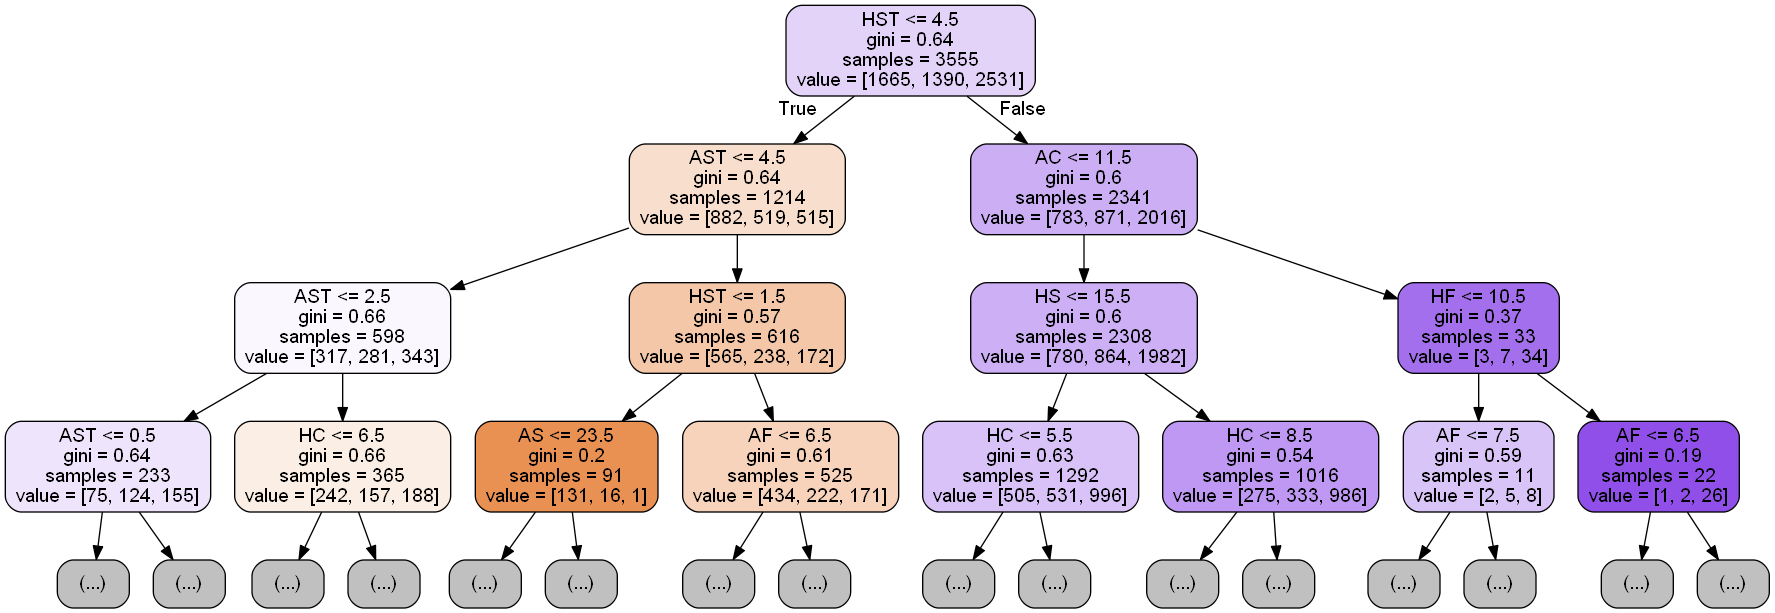

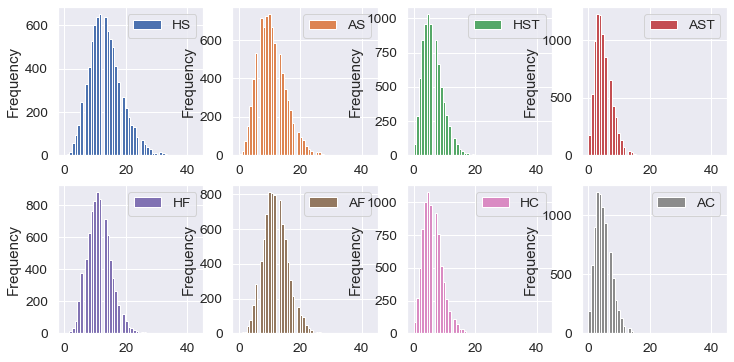

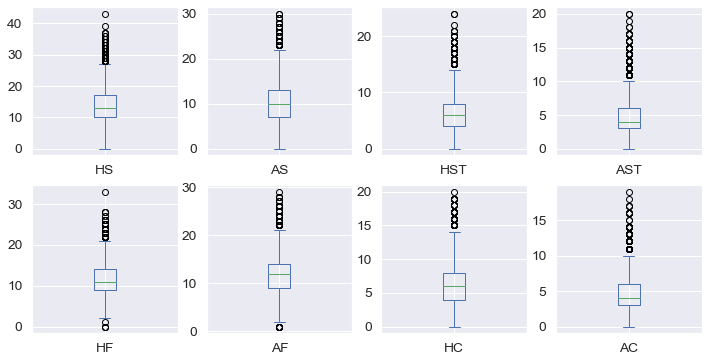

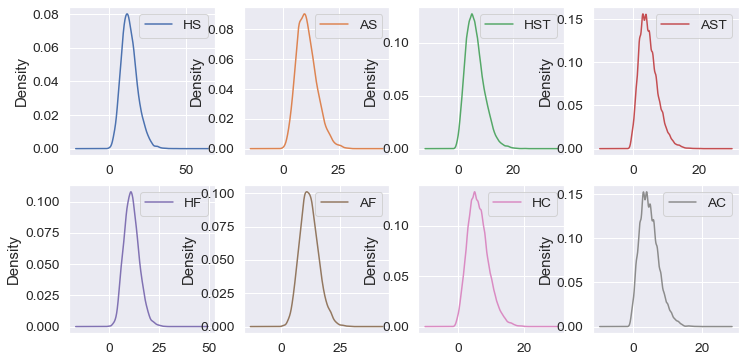

In [22]:
#Visualisation of new featureset/tree
data_filtered_filtered_game_stats.plot(kind='hist', subplots=True, sharex=False, sharey=False, bins=50, layout=(2,4), figsize=(12, 6))
data_filtered_filtered_game_stats.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(12, 6))
data_filtered_filtered_game_stats.plot(kind='density', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(12, 6))
Image(filename = rf_tree_visualiser(rf, path.join("RF_Images", 'selectedFeatureSetTree'), data_filtered_filtered_game_stats.columns))

In [23]:
#Produce new dataset
#Fix column names
#Restack teams and dates

#Original teams are needed to be able to compute priors
data_new = data.iloc[:, [1, 2]].join(data_filtered_filtered_game_stats)
data_new = dates_split.join(data_new)

#Stack previously removed giveaway columns
data_new = data_new.join(data.iloc[:, [3, 4, 5, 6, 7, 8]])

#Feature engineer second half goals
#Second half home goals
SHHG = np.array(data.iloc[:, [3]]) - np.array(data.iloc[:, [6]])
#Second half away goals
SHAG = np.array(data.iloc[:, [4]]) - np.array(data.iloc[:, [7]])
data_new['SHHG'] = pd.DataFrame(SHHG)
data_new['SHAG'] = pd.DataFrame(SHAG)
data_new.columns = data_new.columns.astype(str)
data_new.head()

Month  Week  Day  HomeTeam       AwayTeam  HS  AS  HST  AST  HF  AF  HC  \
0      8    33   19  Charlton       Man City  17   8   14    4  13  12   6   
1      8    33   19   Chelsea       West Ham  17  12   10    5  19  14   7   
2      8    33   19  Coventry  Middlesbrough   6  16    3    9  15  21   8   
3      8    33   19     Derby    Southampton   6  13    4    6  11  13   5   
4      8    33   19     Leeds        Everton  17  12    8    6  21  20   6   

   AC  FTHG  FTAG FTR  HTHG  HTAG HTR  SHHG  SHAG  
0   6     4     0   H     2     0   H     2     0  
1   7     4     2   H     1     0   H     3     2  
2   4     1     3   A     1     1   D     0     2  
3   8     2     2   D     1     2   A     1     0  
4   4     2     0   H     2     0   H     0     0

In [24]:
#See if second half goals have significant correlation to total goals
highest_corr = corr_matrix(data_new, "FTHG")
print("FTHG: \n" + str(highest_corr))

highest_corr = corr_matrix(data_new, "FTAG")
print("FTAG: \n" + str(highest_corr))
#Second half goals do have very strong correlation

FTHG: 
HS      0.280689
HST     0.424065
FTHG    1.000000
HTHG    0.685341
SHHG    0.768719
Name: FTHG, dtype: float64
FTAG: 
AS      0.315637
AST     0.440352
FTAG    1.000000
HTAG    0.679786
SHAG    0.775978
Name: FTAG, dtype: float64


## 3.2 Priors Feature Construction
<a name='section32'></a>

In [25]:
# From Pearson Correlation Heatmap to extract the top 10 features 
# there are two pairs of data highly correlated (see details in report), 
# so we just pick [FTHG, FTAG, HS, AS, HR, AR] from the top 10 features,
# additionally [Date, HomeTeam, AwayTeam, FTR], to derive our features.
selectedAttributes = ["Date","HomeTeam", "AwayTeam","FTR","FTHG","FTAG","HS","AS","HR","AR"]
training_data = data[selectedAttributes]

### 3.2.1 Data Cleaning
<a name='section321'></a>

In [26]:
#Derive features and remove unwanted data
def removeInvalidData(data):

    # remove data which contains None
    data.dropna(axis=0, how='any',inplace=True)

    # remove data which contains NaN, infinite or overflowed number 
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    data = data[indices_to_keep]

    return data

#check if there are rows containing None, NaN, infinite or overflowed values
assert data.shape[0] == removeInvalidData(data).shape[0]
data = removeInvalidData(data)

In [27]:
# convert the different date formats and convert the type from str to timestamp  
def convertDate(data):
    if not isinstance(data.Date[0],str):
        return

    newDate = []
    for _, matchInfo in data.iterrows():
        if len(matchInfo.Date) == 8 :
            newDate.append(pd.to_datetime(matchInfo.Date, format="%d/%m/%y" ))
        elif len(matchInfo.Date) == 9 :
            newDate.append(pd.to_datetime(matchInfo.Date, format="%d %b %y" ))  # the date format in test data
        elif len(matchInfo.Date) == 10 :
            newDate.append(pd.to_datetime(matchInfo.Date, format="%d/%m/%Y" ))
    
    data['Date'] = pd.Series(newDate).values

    return data

### 3.2.2 Cumulative Full-time W/L Ratio
<a name='section322'></a>

In [28]:
# Computing Priors
# Calculate cumulative Full-Time win-loss ratio for Home/Away teams prior to every match
# TODO: Points-based results based on previous wins & losses 
# PHWL = Previous Home Team Win Loss Ratio
# PAWL = Previous Away Team Win Loss Ratio

def get_previousFTResults(playing_stat):
    
    # Create a dictionary with team names as keys
    teams = {}
    PHWL = []
    PAWL = []
    
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = [] #Each team gets their own list

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        
        #list of respective Home/Away team in match
        match_ht = teams[playing_stat.iloc[i].HomeTeam]
        match_at = teams[playing_stat.iloc[i].AwayTeam]
        
        #count no. of wins
        
        h_wins = Counter(match_ht)
        a_wins = Counter(match_at)
        
        #h_wins = no. of home wins
        #a_wins = no. of away wins
        h_wins = h_wins['W']
        a_wins = a_wins['W']
        
        #append W/L/D to respective teams
        
        if y[i] == 'H':
            match_ht.append('W')
            match_at.append('L')
        elif y[i] == 'A':
            match_at.append('W')
            match_ht.append('L')
        else:
            match_at.append('D')
            match_ht.append('D')
       
        h_wlRatio = h_wins / len(match_ht)
        a_wlRatio = a_wins / len(match_at)
        
        #Home/Away cumulative WL ratios prior to every match
        PHWL.append(h_wlRatio)
        PAWL.append(a_wlRatio)
        
    playing_stat.loc[:,'PHWL'] = pd.Series(PHWL)
    playing_stat.loc[:,'PAWL'] = pd.Series(PAWL)

    return playing_stat

###  3.2.3 Cumulative Half-time W/L Ratio
<a name='section323'></a>

In [29]:
# Computing Priors
# Calculate cumulative Half-Time win-loss ratio for Home/Away teams prior to every match
# HHTR = Previous Home Half Time Results
# AHTR = Previous Away Half Time Results

def get_PreviousHTResults(playing_stat):
    
    # Create a dictionary with team names as keys
    teams = {}
    HHTR = []
    AHTR = []
    
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = [] #Each team gets their own list

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        
        #list of respective Home/Away team in match
        match_ht = teams[playing_stat.iloc[i].HomeTeam]
        match_at = teams[playing_stat.iloc[i].AwayTeam]
        
        #count no. of wins
        
        h_wins = Counter(match_ht)
        a_wins = Counter(match_at)
        
        #h_wins = no. of home wins
        #a_wins = no. of away wins
        h_wins = h_wins['W']
        a_wins = a_wins['W']
        
        #append W/L/D to respective teams
        
        if playing_stat.iloc[i].HTR == 'H':
            match_ht.append('W')
            match_at.append('L')
        elif playing_stat.iloc[i].HTR == 'A':
            match_at.append('W')
            match_ht.append('L')
        else:
            match_at.append('D')
            match_ht.append('D')
            
        h_wlRatio = h_wins / len(match_ht)
        a_wlRatio = a_wins / len(match_at)
       
        #Home/Away cumulative WL ratios prior to every match
        HHTR.append(h_wlRatio)
        AHTR.append(a_wlRatio)
        
    playing_stat.loc[:,'HHTR'] = pd.Series(HHTR)
    playing_stat.loc[:,'AHTR'] = pd.Series(AHTR)

    return playing_stat

### 3.2.4 Cumulative Full-Time goals scored
<a name='section324'></a>

In [30]:
# Computing Priors
# Calculate Previous Full-Time Cumulative Goal 
# PHGS = Previous Home Goal Scored
# PAGS = Previous Away Goal Scored

def getPreviousCumulativeGoals(priorData):
    teams = {}
    PHGS = [] 
    PAGS = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        FTHG = priorData.iloc[i]['FTHG']
        FTAG = priorData.iloc[i]['FTAG']

        try:
            pcgs_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcgs_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcgs_h = 0
            pcgs_a = 0

        PHGS.append(pcgs_h)
        PAGS.append(pcgs_a)
        pcgs_h = pcgs_h + FTHG #Home team's previous goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(pcgs_h)
        pcgs_a = pcgs_a + FTAG #Away team's previous goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(pcgs_a)

    priorData.loc[:,'PHGS'] = pd.Series(PHGS)
    priorData.loc[:,'PAGS'] = pd.Series(PAGS)
    return priorData

### 3.2.5 Computing Previous Match Shots
<a name='section325'></a>

In [31]:
# Computing Priors
# Calculate Previous Shots in the match
# PHS = Home teams previous match Shots, totaled over season
# PAS = Away teams previous match Shots, totaled over season

def getPreviousShots(priorData):
    teams = {}
    PHS = [] 
    PAS = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HS = priorData.iloc[i]['HS']
        AS = priorData.iloc[i]['AS']

        try:
            pcs_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcs_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcs_h = 0
            pcs_a = 0

        PHS.append(pcs_h)
        PAS.append(pcs_a)
        pcs_h = pcs_h + HS #Home team's previous goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(pcs_h)
        pcs_a = pcs_a + AS #Away team's previous goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(pcs_a)

    priorData.loc[:,'PHS'] = pd.Series(PHS)
    priorData.loc[:,'PAS'] = pd.Series(PAS)
    return priorData

### 3.2.6 Computing Previous Shots on Target
<a name='section326'></a>

In [32]:
# Computing Priors
# Calculate Previous Shots on Target
# PHSOT = Home teams Previous Shots on Target, totaled over season
# PASOT = Away teams Previous Shots on Target, totaled over season

def getPreviousShotsOnTarget(priorData):
    teams = {}
    PHSOT = [] 
    PASOT = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HST = priorData.iloc[i]['HST']
        AST = priorData.iloc[i]['AST']

        try:
            pcsot_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcsot_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcsot_h = 0
            pcsot_a = 0

        PHSOT.append(pcsot_h)
        PASOT.append(pcsot_a)
        pcsot_h = pcsot_h + HST #Home team's previous goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(pcsot_h)
        pcsot_a = pcsot_a + AST #Away team's previous goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(pcsot_a)

    priorData.loc[:,'PHSOT'] = pd.Series(PHSOT)
    priorData.loc[:,'PASOT'] = pd.Series(PASOT)
    return priorData

### 3.2.7 Computing previous fouls
<a name='section327'></a>

In [33]:
# Computing Priors
# Calculate Previous Fouls
# PHTF = Home teams Previous Fouls, Totaled over season
# PATF = Away teams Previous Fouls, Totaled over season

def getPreviousTeamFouls(priorData):
    teams = {}
    PHTF = [] 
    PATF = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HF = priorData.iloc[i]['HF']
        AF = priorData.iloc[i]['AF']

        try:
            pcf_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcf_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcf_h = 0
            pcf_a = 0

        PHTF.append(pcf_h)
        PATF.append(pcf_a)
        pcf_h = pcf_h + HF #Home team's previous fouls before this match
        teams[priorData.iloc[i].HomeTeam].append(pcf_h)
        pcf_a = pcf_a + AF #Away team's previous fouls before this match
        teams[priorData.iloc[i].AwayTeam].append(pcf_a)

    priorData.loc[:,'PHTF'] = pd.Series(PHTF)
    priorData.loc[:,'PATF'] = pd.Series(PATF)
    return priorData

### 3.2.8 Computing previous corners
<a name='section328'></a>

In [34]:
# Computing Priors
# Calculate Previous Corners
# PHTC = Home teams Previous Corners, Totaled over season
# PATC = Away teams Previous Corners, Totaled over season

def getPreviousTeamCorners(priorData):
    teams = {}
    PHTC = [] 
    PATC = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HC = priorData.iloc[i]['HC']
        AC = priorData.iloc[i]['AC']

        try:
            pcc_h = teams[priorData.iloc[i].HomeTeam].pop()
            pcc_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pcc_h = 0
            pcc_a = 0

        PHTC.append(pcc_h)
        PATC.append(pcc_a)
        pcc_h = pcc_h + HC #Home team's previous corners before this match
        teams[priorData.iloc[i].HomeTeam].append(pcc_h)
        pcc_a = pcc_a + AC #Away team's previous corners before this match
        teams[priorData.iloc[i].AwayTeam].append(pcc_a)

    priorData.loc[:,'PHTC'] = pd.Series(PHTC)
    priorData.loc[:,'PATC'] = pd.Series(PATC)
    return priorData

### 3.2.9 Computing previous goals before half-time
<a name='section329'></a>

In [35]:
# Computing Priors
# Calculate Previous Goals before half time
# PHTHG = Home teams Previous Goals Before Half Time, Totaled over season
# PHTAG = Away teams Previous Goals Before Half Time, Totaled over season

def getPreviousHalfTimeGoalsScored(priorData):
    teams = {}
    PHTHG = [] 
    PHTAG = []   

    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        HTHG = priorData.iloc[i]['HTHG']
        HTAG = priorData.iloc[i]['HTAG']

        try:
            pchtg_h = teams[priorData.iloc[i].HomeTeam].pop()
            pchtg_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pchtg_h = 0
            pchtg_a = 0

        PHTHG.append(pchtg_h)
        PHTAG.append(pchtg_a)
        pchtg_h = pchtg_h + HTHG #Home team's previous first half goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(pchtg_h)
        pchtg_a = pchtg_a + HTAG #Away team's previous first half goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(pchtg_a)

    priorData.loc[:,'PHTHG'] = pd.Series(PHTHG)
    priorData.loc[:,'PHTAG'] = pd.Series(PHTAG)
    return priorData

### 3.2.10 Compute previous goals after half-time
<a name='section3210'></a>

In [36]:
# Computing Priors
# Calculate Previous Second Half Time Goals in the match
# PSHHG = Previous Second Half Time Goals scored by Home team, totaled over season
# PSHAG = Previous Second Half Time Goals scored by Away team, totaled over season

def getPreviousSecondHalfGoals(priorData):
    teams = {}
    PSHHG = [] 
    PSHAG = []   
    
    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]
                
        FTHG = priorData.iloc[i]['FTHG']
        FTAG = priorData.iloc[i]['FTAG']
        HTHG = priorData.iloc[i]['HTHG']
        HTAG = priorData.iloc[i]['HTAG']

        try:
            shg_h = teams[priorData.iloc[i].HomeTeam].pop()
            shg_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            shg_h = 0
            shg_a = 0

        PSHHG.append(shg_h)
        PSHAG.append(shg_a)
        shg_h = shg_h + (FTHG - HTHG) #Home team's previous second half goals scored before this match
        teams[priorData.iloc[i].HomeTeam].append(shg_h)
        shg_a = shg_a + (FTAG - HTAG) #Away team's previous second half goals scored before this match
        teams[priorData.iloc[i].AwayTeam].append(shg_a)

    priorData.loc[:,'PSHHG'] = pd.Series(PSHHG)
    priorData.loc[:,'PSHAG'] = pd.Series(PSHAG)
    return priorData

### 3.2.11 Computing previous goals conceded before half-time
<a name='section3211'></a>

In [37]:
# Computing Priors
# Calculate previous goals conceded before half-time
# PHTHGC = Home Team Previous Goals Conceded Before Half Time, totaled over season
# PHTAGC = Away Team Previous Goals Conceded Before Half Time, Totaled over season

def getPreviousHalfTimeGoalConceded(priorData):
    teams = {}
    PHTHGC = [] 
    PHTAGC = []   
    
    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]
                      
        HTHG = priorData.iloc[i]['HTHG']
        HTAG = priorData.iloc[i]['HTAG']

        try:
            phtgc_h = teams[priorData.iloc[i].HomeTeam].pop()
            phtgc_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            phtgc_h = 0
            phtgc_a = 0

        PHTHGC.append(phtgc_h)
        PHTAGC.append(phtgc_a)
        phtgc_h = phtgc_h + HTAG #Home team's previous half time goals conceded before this match
        teams[priorData.iloc[i].HomeTeam].append(phtgc_h)
        phtgc_a = phtgc_a + HTHG #Away team's previous half time goals conceded before this match
        teams[priorData.iloc[i].AwayTeam].append(phtgc_a)

    priorData.loc[:,'PHTHGC'] = pd.Series(PHTHGC)
    priorData.loc[:,'PHTAGC'] = pd.Series(PHTAGC)
    return priorData

### 3.2.12 Computing previous goals conceded after half-time
<a name='section3212'></a>

In [38]:
# Computing Priors
# Calculate previous goals conceded after half-time
# PSHHGC = Previous second half home team goals conceded, totaled over season
# PSHAGC = Previous second half away team goals conceded, totaled over season

def getPreviousSecondHalfGoalConceded(priorData):
    teams = {}
    PSHHGC = [] 
    PSHAGC = []   
    
    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]
  
        FTHG = priorData.iloc[i]['FTHG']
        FTAG = priorData.iloc[i]['FTAG']   
        HTHG = priorData.iloc[i]['HTHG']
        HTAG = priorData.iloc[i]['HTAG']

        try:
            pshhgc_h = teams[priorData.iloc[i].HomeTeam].pop()
            pshhgc_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pshhgc_h = 0
            pshhgc_a = 0

        PSHHGC.append(pshhgc_h)
        PSHAGC.append(pshhgc_a)
        pshhgc_h = pshhgc_h + (FTAG - HTAG) #Home team's previous half time goals conceded before this match
        teams[priorData.iloc[i].HomeTeam].append(pshhgc_h)
        pshhgc_a = pshhgc_a + (FTHG - HTHG) #Away team's previous half time goals conceded before this match
        teams[priorData.iloc[i].AwayTeam].append(pshhgc_a)

    priorData.loc[:,'PSHHGC'] = pd.Series(PSHHGC)
    priorData.loc[:,'PSHAGC'] = pd.Series(PSHAGC)
    return priorData

### 3.2.13 Total Matches Played
<a name='section3213'></a>

In [39]:
# Computing Priors 
# Calculate previous goals conceded after half-time
# PMPH = Previous total matches played for home team
# PMPA = Previous total matches played for away team
def getPreviousMatchesPlayed(priorData):
    teams = {}
    PMPH = [] 
    PMPA = []   
    
    # for each match
    for i in range(len(priorData)):
        if (i % 100000 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = [0]

        try:
            pmp_h = teams[priorData.iloc[i].HomeTeam].pop()
            pmp_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            pmp_h = 0
            pmp_a = 0

        PMPH.append(pmp_h)
        PMPA.append(pmp_a)
        pmp_h = pmp_h + 1 #Home team's previous number matches played
        teams[priorData.iloc[i].HomeTeam].append(pmp_h)
        pmp_a = pmp_a + 1 #Away team's previous number matches played
        teams[priorData.iloc[i].AwayTeam].append(pmp_a)

    priorData.loc[:,'PMPH'] = pd.Series(PMPH)
    priorData.loc[:,'PMPA'] = pd.Series(PMPA)
    return priorData

print(getPreviousMatchesPlayed(data_new))

      Month  Week  Day          HomeTeam        AwayTeam  HS  AS  HST  AST  \
0         8    33   19          Charlton        Man City  17   8   14    4   
1         8    33   19           Chelsea        West Ham  17  12   10    5   
2         8    33   19          Coventry   Middlesbrough   6  16    3    9   
3         8    33   19             Derby     Southampton   6  13    4    6   
4         8    33   19             Leeds         Everton  17  12    8    6   
...     ...   ...  ...               ...             ...  ..  ..  ...  ...   
7975      5    20   23         Liverpool  Crystal Palace  19   5    5    4   
7976      5    20   23          Man City         Everton  21   8   11    3   
7977      5    20   23  Sheffield United         Burnley  12  10    3    3   
7978      5    20   23          West Ham     Southampton  14  17    7    5   
7979      5    20   23            Wolves      Man United  14   9    4    4   

      HF  AF  HC  AC  FTHG  FTAG FTR  HTHG  HTAG HTR  SHHG  SHA

## 3.3 Additional Features
<a name='section33'></a>

### 3.3.1 Distance Travelled for Away Teams
<a name='section331'></a>

In [40]:
# DIS
# The positionalData contains the latitude and longitude of teams
def getDistance(priorData):
  array = []
  for x in priorData.iterrows():
   
    home_lat = (positionalData.loc[positionalData['Team'] == x[1].HomeTeam]).Latitude
    home_long = (positionalData.loc[positionalData['Team'] == x[1].HomeTeam]).Longitude
    home_location = (np.float32(home_lat), np.float32(home_long))
    
    away_lat = (positionalData.loc[positionalData['Team'] == x[1].AwayTeam]).Latitude
   
    away_long = (positionalData.loc[positionalData['Team'] == x[1].AwayTeam]).Longitude
    away_location = (np.float32(away_lat), np.float32(away_long))
    array.append(np.float32(geodesic(home_location, away_location).km))
  
  
  DIS = pd.Series(array)
  priorData.loc[:,'DIS'] = DIS

  return priorData

### 3.3.2 Average shots on goal in the past 3 matches
<a name='section332'></a>

In [41]:
# Average shots on goal for the past 3 matches
# HAS, AAS
def getPreviousShotOnGoal_3(priorData):
    teams = {}
    HAS = [] 
    AAS = []   
    
    for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = deque([None, None, None]) #[3rd, 2nd, latest priorData]
            
    # for each match
    for i in range(len(priorData)):

            
        try:
            as_h = np.mean(teams[priorData.iloc[i].HomeTeam])
            as_a = np.mean(teams[priorData.iloc[i].AwayTeam])
        except:
            as_h = None
            as_a = None

        HAS.append(as_h)
        AAS.append(as_a)

        teams[priorData.iloc[i].HomeTeam].popleft()
        teams[priorData.iloc[i].HomeTeam].append(priorData.iloc[i].HS)

        teams[priorData.iloc[i].AwayTeam].popleft()
        teams[priorData.iloc[i].AwayTeam].append(priorData.iloc[i].AS)

    priorData.loc[:,'HAS'] = pd.Series(HAS)
    priorData.loc[:,'AAS'] = pd.Series(AAS)

    return priorData

### 3.3.3 WL Performance of past 3 matches
<a name='section333'></a>

In [42]:
# Performance of Home-Away teams in past 3 matches
# HM1, AM1, HM2, AM2, HM3, AM3
def getPerformanceOfLast3Matches(priorData):
    HM1 = []    # performance of the last match of home team
    AM1 = []    # performance of the last match of away team

    HM2 = []    # performance of the 2nd last match of home team
    AM2 = []

    HM3 = []    # performance of the 3rd last match of home team
    AM3 = []

    teams = {}
    
    for name in priorData.groupby('HomeTeam').mean().T.columns:
               teams[name] = deque([None, None, None])  #[3rd, 2nd, latest priorData]

    for i in range(len(priorData)):
        

        HM3.append(teams[priorData.iloc[i].HomeTeam].popleft())
        AM3.append(teams[priorData.iloc[i].AwayTeam].popleft())
        HM2.append(teams[priorData.iloc[i].HomeTeam][0])
        AM2.append(teams[priorData.iloc[i].AwayTeam][0])
        HM1.append(teams[priorData.iloc[i].HomeTeam][1])
        AM1.append(teams[priorData.iloc[i].AwayTeam][1])

        if priorData.iloc[i].FTR == 'H':
            teams[priorData.iloc[i].HomeTeam].append('W')
            teams[priorData.iloc[i].AwayTeam].append('L')
        elif priorData.iloc[i].FTR == 'A':
            teams[priorData.iloc[i].AwayTeam].append('W')
            teams[priorData.iloc[i].HomeTeam].append('L')
        else:
            teams[priorData.iloc[i].AwayTeam].append('D')
            teams[priorData.iloc[i].HomeTeam].append('D')

    priorData.loc[:,'HM1'] = HM1
    priorData.loc[:,'AM1'] = AM1
    priorData.loc[:,'HM2'] = HM2
    priorData.loc[:,'AM2'] = AM2
    priorData.loc[:,'HM3'] = HM3
    priorData.loc[:,'AM3'] = AM3

    return priorData

### 3.3.4 Cumulative Full Time Goal Difference
<a name='section334'></a>

In [43]:
# Computing Priors
# Calculate cumulative Full-Time goal different for Home/Away teams prior to every match
# HCGD = Home Cumulative Goal Difference
# ACGD = Away Cumulative Goal Difference
def getCumulativeGoalsDiff(priorData):
    teams = {}
    HCGD = [] 
    ACGD = []   

    # for each match
    for i in range(len(priorData)):
        # as the result in 3.2.1 shows that the number of matchese per season is always the same, so here we simply use i%380==0 to check if it is a new season and to initialize the feature.
        if (i % 380 == 0):
            for name in priorData.groupby('HomeTeam').mean().T.columns:
                teams[name] = []

        FTHG = priorData.iloc[i]['FTHG']
        FTAG = priorData.iloc[i]['FTAG']

        try:
            cgd_h = teams[priorData.iloc[i].HomeTeam].pop()
            cgd_a = teams[priorData.iloc[i].AwayTeam].pop()
        except:
            cgd_h = 0
            cgd_a = 0

        HCGD.append(cgd_h)
        ACGD.append(cgd_a)
        cgd_h = cgd_h + FTHG - FTAG
        teams[priorData.iloc[i].HomeTeam].append(cgd_h)
        cgd_a = cgd_a + FTAG - FTHG
        teams[priorData.iloc[i].AwayTeam].append(cgd_a)

    priorData.loc[:,'HCGD'] = pd.Series(HCGD)
    priorData.loc[:,'ACGD'] = pd.Series(ACGD)

    return priorData

### Priors - extra features pulled

In [44]:
def add_pickled_to_df(df,filename,column):
    matrix = pd.read_pickle(filename)
    matrix[2008] = np.NaN
    difference = []
    for i in range(0,len(data_new)):
        if pd.isnull(matrix[year[i]].loc[df["HomeTeam"].iloc[i]]) or pd.isnull(matrix[year[i]].loc[df["AwayTeam"].iloc[i]]):
            difference.append(np.nan)
            
        else:
            difference.append(matrix[year[i]].loc[df["HomeTeam"].iloc[i]]-matrix[year[i]].loc[df["AwayTeam"].iloc[i]])

    df[column]=difference
    return df

### We have decided not to include these scraped features due to the many missing values without a reliable way to impute them.

In [45]:
# import glob
# files = glob.glob("./Pickles/*")
# for file in files:
#     name = file.split("\\")[-1].split(".")[0].replace("DF","")
#     data_new = add_pickled_to_df(data_new,file,name)

# data_new

## 3.4 Derive Priors
<a name='section34'></a>

In [46]:
def DerivePriors(priorData):
    #get_previousFTResults(priorData) # dont want Full time results in the test data
    get_PreviousHTResults(priorData)
    getPreviousCumulativeGoals(priorData)
    getPreviousShots(priorData)
    getPreviousShotsOnTarget(priorData)
    getPreviousTeamFouls(priorData)
    getPreviousTeamCorners(priorData)
    getPreviousHalfTimeGoalsScored(priorData)
    getPreviousSecondHalfGoals(priorData)
    getPreviousHalfTimeGoalConceded(priorData)
    getPreviousSecondHalfGoalConceded(priorData)
    getPreviousMatchesPlayed(priorData)
    getDistance(priorData)
    getPreviousShotOnGoal_3(priorData)
    getPerformanceOfLast3Matches(priorData)
    getCumulativeGoalsDiff(priorData)
    return priorData

In [47]:
# Remove First Initial Season
data_new = DerivePriors(data_new).iloc[380:] #chop off first season 
y=np.delete(y,slice(0,380),axis=0)
data_new.reset_index(drop=True, inplace=True)
data_new 

Month  Week  Day          HomeTeam        AwayTeam  HS  AS  HST  AST  \
0         8    33   18          Charlton         Everton   8  12    4    9   
1         8    33   18             Derby       Blackburn   7  14    3    4   
2         8    33   18             Leeds     Southampton  16  11    6    6   
3         8    33   18         Leicester          Bolton   6  18    1    8   
4         8    33   18         Liverpool        West Ham   9   3    6    3   
...     ...   ...  ...               ...             ...  ..  ..  ...  ...   
7595      5    20   23         Liverpool  Crystal Palace  19   5    5    4   
7596      5    20   23          Man City         Everton  21   8   11    3   
7597      5    20   23  Sheffield United         Burnley  12  10    3    3   
7598      5    20   23          West Ham     Southampton  14  17    7    5   
7599      5    20   23            Wolves      Man United  14   9    4    4   

      HF  AF  HC  AC  FTHG  FTAG FTR  HTHG  HTAG HTR  SHHG  SHAG  PMPH  PMPA  \
0     15  17   4   4     1     2   A     0     0   D     1     2    38    38   
1     14  15   4  10     2     1   H     1     0   H     1     1    38     0   
2     16  24  10   3     2     0   H     0     0   D     2     0    38    38   
3     21  17   3   5     0     5   A     0     4   A     0     1    38     0   
4     13  12   5   3     2     1   H     1     1   D     1     0    38    38   
...   ..  ..  ..  ..   ...   ...  ..   ...   ...  ..   ...   ...   ...   ...   
7595  10   8  14   1     2     0   H     1     0   H     1     0   797   341   
7596   8  10   7   5     5     0   H     2     0   H     3     0   759   797   
7597  11   1   8   9     1     0   H     1     0   H     0     0   113   265   
7598   5   9   2   3     3     0   H     2     0   H     1     0   683   531   
7599  14   3   6   2     1     2   A     1     2   A     0     0   265   797   

          HHTR      AHTR  PHGS  PAGS    PHS    PAS  PHSOT  PASOT  PHTF  PATF  \
0     0.358974  0.179487    50    45    373    394    217    195   467   558   
1     0.307692  0.000000    37     0    305      0    141      0   529     0   
2     0.307692  0.205128    64    40    475    414    228    174   589   509   
3     0.179487  0.000000    39     0    326      0    159      0   426     0   
4     0.384615  0.205128    71    45    488    475    249    229   473   473   
...        ...       ...   ...   ...    ...    ...    ...    ...   ...   ...   
7595  0.408521  0.216374  1420   378  12013   3784   5550   1298  8540  4028   
7596  0.418421  0.281955  1374  1059  10879   9446   4969   4393  8536  9646   
7597  0.192982  0.203008    90   266   1069   2725    413    976  1313  2770   
7598  0.273392  0.259398   845   655   7904   6486   3419   2620  7829  6334   
7599  0.191729  0.461153   289  1503   2938  11570   1279   5668  2954  8971   

      PHTC  PATC  PHTHG  PHTAG  PSHHG  PSHAG  PHTHGC  PHTAGC  PSHHGC  PSHAGC  \
0      213   203     27     19     23     26      21      26      36      33   
1      159     0     20      0     17      0      25       0      34       0   
2      270   211     28     16     36     24      26      18      17      30   
3      174     0     18      0     21      0      20       0      31       0   
4      243   213     28     18     43     27      18      28      21      22   
...    ...   ...    ...    ...    ...    ...     ...     ...     ...     ...   
7595  5153  1732    621    146    799    232     344     206     438     291   
7596  4890  4411    634    470    740    589     353     427     467     561   
7597   555  1140     39    121     51    145      69     188      88     213   
7598  3541  2858    380    299    465    356     447     346     562     387   
7599  1423  5039    112    684    177    819     211     322     206     402   

              DIS        HAS        AAS HM1   AM1 HM2   AM2 HM3   AM3  HCGD  \
0     5929.836426  13.000000  15.000000   L     D   L     L   W     W     0   
1      114.101906        NaN

### 3.5 Final Data Preprocessing
<a name='section35'></a>

In [48]:
# Dates are transformed into their sin/cos representation to capture their cyclic nature and reduce dimensionality, further explanation is given in the report
dates = data_new.iloc[:, 0:3]
month_sin = transformation(dates["Month"])[0]
month_cos = transformation(dates["Month"])[1]
week_sin = transformation(dates["Week"])[0]
week_cos = transformation(dates["Week"])[1]
day_sin = transformation(dates["Day"])[0]
day_cos = transformation(dates["Day"])[1]

teams = pd.DataFrame(home_t.toarray()).add_prefix("home_").join(pd.DataFrame(away_t.toarray()).add_prefix("away_"))

# Select only columns that contain priors, can't use in-game stats to predict the future
priors = data_new.iloc[:, 21:44]

# Compute custom features
# PHGS_PHSOT is ratio of home goals to home shots on target
PHGS_PHSOT = np.where(priors["PHSOT"] != 0, priors["PHGS"]/priors["PHSOT"], 0)
# PHGS_PHSOT is ratio of away goals to away shots on target
PAGS_PASOT = np.where(priors["PASOT"] != 0, priors["PAGS"]/priors["PASOT"], 0)
# PHSOT_PHS is ratio of home shots on target to home shots
PHSOT_PHS = np.where(priors["PHS"] != 0, priors["PHSOT"]/ (priors["PHS"] + priors["PHSOT"]), 0)
# PASOT_PAS is ratio of away shots on target to away shots
PASOT_PAS = np.where(priors["PAS"] != 0, priors["PASOT"]/ (priors["PAS"] + priors["PASOT"]), 0)
# PHTF_PATF is ratio of home fouls to away fouls
PHTF_PATF = np.where(priors["PATF"] != 0, priors["PHTF"]/priors["PATF"], 0)

# Building final dataset
X = pd.DataFrame()
X["month_cos"] = month_cos
X["month_sin"] = month_sin
X["week_cos"] = week_cos
X["week_sin"] = week_sin
X["day_cos"] = day_cos
X["day_sin"] = day_sin
X = X.join(teams).join(priors)
X["PHGS_PHSOT"] = PHGS_PHSOT.tolist()
X["PAGS_PASOT"] = PAGS_PASOT.tolist()
X["PHSOT_PHS"] = PHSOT_PHS.tolist()
X["PASOT_PAS"] = PASOT_PAS.tolist()
X["PHTF_PATF"] = PHTF_PATF.tolist()
X

month_cos  month_sin  week_cos  week_sin   day_cos   day_sin  home_0  \
0     -0.500000  -0.866025 -0.717507 -0.696551 -0.874347 -0.485302     0.0   
1     -0.500000  -0.866025 -0.717507 -0.696551 -0.874347 -0.485302     0.0   
2     -0.500000  -0.866025 -0.717507 -0.696551 -0.874347 -0.485302     0.0   
3     -0.500000  -0.866025 -0.717507 -0.696551 -0.874347 -0.485302     0.0   
4     -0.500000  -0.866025 -0.717507 -0.696551 -0.874347 -0.485302     0.0   
...         ...        ...       ...       ...       ...       ...     ...   
7595  -0.866025   0.500000 -0.717507  0.696551 -0.050649 -0.998717     0.0   
7596  -0.866025   0.500000 -0.717507  0.696551 -0.050649 -0.998717     0.0   
7597  -0.866025   0.500000 -0.717507  0.696551 -0.050649 -0.998717     0.0   
7598  -0.866025   0.500000 -0.717507  0.696551 -0.050649 -0.998717     0.0   
7599  -0.866025   0.500000 -0.717507  0.696551 -0.050649 -0.998717     0.0   

      home_1  home_2  home_3  home_4  home_5  home_6  home_7  home_8  home_9  \
0        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7595     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7596     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7597     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7598     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
7599     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      home_10  home_11  home_12  home_13  home_14  home_15  home_16  home_17  \
0         0.0      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
7595      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7596      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7597      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7598      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7599      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      home_18  home_19  home_20  home_21  home_22  home_23  home_24  home_25  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
7595      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
7596      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
7597      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7598      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
7599      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      home_26  home_27  home_28  home_29  home_30  home_31  home_32  home_33  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0    

### 3.5.1 Split Data
<a name='section351'></a>

In [49]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=False)

y_train = np.array(y_train).reshape(len(y_train))
y_val = np.array(y_val).reshape(len(y_val))
y_test = np.array(y_test).reshape(len(y_test))
#Encode y
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)


y_train_categorical = keras.utils.to_categorical(y_train)
y_val_categorical = keras.utils.to_categorical(y_val)
y_test_categorical = keras.utils.to_categorical(y_test)

In [50]:
# try without our custom features
rf, preds, all_stats_accuracy = rf_model(X_train, X_test, y_train, y_test)
print("Accuracy on all in-game stats: " + str(all_stats_accuracy) + "%")

feature_importances = feat_importances(X_train, rf)
print("Feature Importances: ")
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances];

Accuracy on all in-game stats: 47.89473684210526%
Feature Importances: 
Feature: AHTR                                Importance: 0.04079691674434672
Feature: HHTR                                Importance: 0.038440396878765506
Feature: PAGS_PASOT                          Importance: 0.03291120935792482
Feature: PHGS_PHSOT                          Importance: 0.03252775660738477
Feature: PHSOT_PHS                           Importance: 0.03123204207301899
Feature: DIS                                 Importance: 0.030028998872474556
Feature: PASOT_PAS                           Importance: 0.029682227845421304
Feature: PHTF_PATF                           Importance: 0.028699122755288978
Feature: PHTAG                               Importance: 0.028291044905542413
Feature: PSHHG                               Importance: 0.028106852478190128
Feature: PSHAG                               Importance: 0.027934441589256134
Feature: PHTHG                               Importance: 0.027367412646157

### 3.6 Scale data
<a name='section36'></a>

In [51]:
scaler = StandardScaler().fit(X_train.iloc[:, 92:])
X_train_scaled = scaler.transform(X_train.iloc[:, 92:])
X_test_scaled = scaler.transform(X_test.iloc[:, 92:])
X_val_scaled = scaler.transform(X_val.iloc[:, 92:])

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_val = pd.DataFrame(X_val)

X_train = np.array(X_train.iloc[:, 0:92])
X_test = np.array(X_test.iloc[:, 0:92])
X_val = np.array(X_val.iloc[:, 0:92])

X_train_scaled = np.hstack((X_train, X_train_scaled))
X_test_scaled = np.hstack((X_test, X_test_scaled))
X_val_scaled = np.hstack((X_val, X_val_scaled))

# tune hyperparams for this -> gamma
kpca = KernelPCA(n_components=15, kernel='rbf')
kpca.fit(X_train_scaled)
X_train = kpca.transform(X_train_scaled)
X_test = kpca.transform(X_test_scaled)
X_val = kpca.transform(X_val_scaled)

# PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# pca = PCA(0.95)
# pca.fit(X_train_scaled)
# X_train = pca.transform(X_train_scaled)
# X_test = pca.transform(X_test_scaled)

# pca = PCA(n_components=50)
# X = pca.fit_transform(X_scaled)

# from sklearn.manifold import TSNE
# X = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(X)

# from sklearn.manifold import MDS
# embedding = MDS(n_components=2)
# X = embedding.fit_transform(X) -> took way too long

# from sklearn.manifold import Isomap
# embedding = Isomap(n_components=2)
# X = embedding.fit_transform(X) -> gave terrible results

# import umap.umap_ as umap
# reducer = umap.UMAP(random_state=42,n_components=15)
# X = reducer.fit_transform(X_scaled) -> requires outdated numpy

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# clf = LinearDiscriminantAnalysis()
# clf.fit(X_train_scaled, y_train)
# X_train = clf.transform(X_train_scaled)
# X_test = clf.transform(X_test_scaled)

# from sklearn.manifold import TSNE
# X = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

In [52]:
#Reshaping data for RNN, LSTM, GRU
X_train_test = np.reshape(X_train, (532, 10, X_train.shape[1]))

y_train_test = np.reshape(y_train_categorical, (532, 10, 3))

y_train_test_cnn = np.array(y_train_categorical).reshape(-1, 1, y_train_categorical.shape[1])

X_val_test = np.reshape(X_val, (114, 10, X_val.shape[1]))

y_val_categorical_test = np.reshape(y_val_categorical, (114, 10, 3))

y_val_test_cnn = np.array(y_val_categorical).reshape(-1, 1, y_val_categorical.shape[1])

X_test_test = X_test.reshape(114, 10, X_test.shape[1])

X_train_cnn = np.expand_dims(X_train, axis=-1)

X_val_cnn = np.expand_dims(X_val, axis=-1)

X_test_cnn = np.expand_dims(X_test, axis=-1)

## 4. Methodology Overview
<a name='section4'></a>

## 5. Model Training & Validation
<a name='section5'></a>

In [53]:
# Functions to remove warning to see clearer result
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

### 5.1 Base Models
<a name='section51'></a>

#### 5.1.1 Gaussian Naive Bayes
<a name='section511'></a>

In [73]:
# Some general comments:
# Gaussian NB is most suitable for non-categorical classification
# Based on diagram above (gaussian distributed density plots) the features we use are gaussian distributed however 
# the teams are not actually gaussian distributed 
# And the features we use are not conditionally independent as the statistics arent independent (e.g. shots affect
# shots on target etc.)
# Therefore we expect that the prediction will not be accurate and naives bayes is not suitable

gnb = GaussianNB()

#using optuna
def objective_gnb(trial, X, y):
    param_grid = {
        "var_smoothing": trial.suggest_float("var_smoothing",1e-9,1,log=True),
    }
    model = GaussianNB(**param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="GaussianNB")
func = lambda trial: objective_gnb(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = GaussianNB(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

gnb_final = model

[I 2021-12-22 02:09:01,540] A new study created in memory with name: GaussianNB
[I 2021-12-22 02:09:01,545] Trial 0 finished with value: 1.0560308275131085 and parameters: {'var_smoothing': 5.250899091007789e-09}. Best is trial 0 with value: 1.0560308275131085.
[I 2021-12-22 02:09:01,548] Trial 1 finished with value: 1.0558758107610948 and parameters: {'var_smoothing': 5.872931705580386e-05}. Best is trial 1 with value: 1.0558758107610948.
[I 2021-12-22 02:09:01,552] Trial 2 finished with value: 1.0553627684458884 and parameters: {'var_smoothing': 0.00025475585708549915}. Best is trial 2 with value: 1.0553627684458884.
[I 2021-12-22 02:09:01,555] Trial 3 finished with value: 1.0560059891173539 and parameters: {'var_smoothing': 9.399003833608431e-06}. Best is trial 2 with value: 1.0553627684458884.
[I 2021-12-22 02:09:01,559] Trial 4 finished with value: 1.0182894231756408 and parameters: {'var_smoothing': 0.25072807250924667}. Best is trial 4 with value: 1.0182894231756408.
[I 2021-12-

	Best value (rmse): 1.01318
	Best params:
		var_smoothing: 0.07396979639165609
Training accuracy 0.5218045112781955
Testing accuracy 0.5201754385964912


#### 5.1.2 Generic SVM
<a name='section512'></a>

In [75]:
# Using generic SVM to estimate


# using optuna
def objective_svm(trial, X, y):
    param_grid = {
        "kernel": trial.suggest_categorical("kernel", ['linear', 'rbf']),
        "C": trial.suggest_categorical("C", [50, 10, 1.0, 0.1, 0.01]),
        "gamma": trial.suggest_categorical("gamma", ['scale']),
    }
    model = SVC(probability = True, **param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="SVM")
func = lambda trial: objective_svm(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = SVC(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))


svm_final = model

[I 2021-12-22 02:09:19,164] A new study created in memory with name: SVM
[I 2021-12-22 02:09:33,392] Trial 0 finished with value: 1.0802351820893277 and parameters: {'kernel': 'rbf', 'C': 50, 'gamma': 'scale'}. Best is trial 0 with value: 1.0802351820893277.
[I 2021-12-22 02:09:39,529] Trial 1 finished with value: 1.0301417033002875 and parameters: {'kernel': 'linear', 'C': 50, 'gamma': 'scale'}. Best is trial 1 with value: 1.0301417033002875.
[I 2021-12-22 02:09:53,779] Trial 2 finished with value: 1.078510264989307 and parameters: {'kernel': 'rbf', 'C': 50, 'gamma': 'scale'}. Best is trial 1 with value: 1.0301417033002875.
[I 2021-12-22 02:10:02,896] Trial 3 finished with value: 1.019340512193172 and parameters: {'kernel': 'rbf', 'C': 0.1, 'gamma': 'scale'}. Best is trial 3 with value: 1.019340512193172.
[I 2021-12-22 02:10:07,855] Trial 4 finished with value: 1.0295915832430524 and parameters: {'kernel': 'linear', 'C': 0.1, 'gamma': 'scale'}. Best is trial 3 with value: 1.0193405121

	Best value (rmse): 1.01393
	Best params:
		kernel: rbf
		C: 1.0
		gamma: scale
Training accuracy 0.5368421052631579
Testing accuracy 0.5236842105263158


#### 5.1.3 Logistic Regression
<a name='section513'></a>

In [76]:
# Multinomial logistic regression


# using optuna
def objective_lr(trial, X, y):
    param_grid = {
        "solver": trial.suggest_categorical("solver", ['newton-cg', 'lbfgs','saga']),
        "penalty": trial.suggest_categorical("penalty", ['l2']),
        "multi_class": trial.suggest_categorical("multi_class", ['multinomial']),
        "C": trial.suggest_categorical("C", [100, 10, 1.0, 0.1, 0.01]),
    }
    model = LogisticRegression(**param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="LogisticRegression")
func = lambda trial: objective_lr(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = LogisticRegression(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

lr_final = model

[I 2021-12-22 02:12:55,087] A new study created in memory with name: LogisticRegression
[I 2021-12-22 02:12:55,127] Trial 0 finished with value: 1.0147384077114885 and parameters: {'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}. Best is trial 0 with value: 1.0147384077114885.
[I 2021-12-22 02:12:55,174] Trial 1 finished with value: 1.0266497896356583 and parameters: {'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.01}. Best is trial 0 with value: 1.0147384077114885.
[I 2021-12-22 02:12:55,218] Trial 2 finished with value: 1.0135442973380602 and parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.1}. Best is trial 2 with value: 1.0135442973380602.
[I 2021-12-22 02:12:55,274] Trial 3 finished with value: 1.016784903589993 and parameters: {'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100}. Best is trial 2 with value: 1.0135442973380602.
[I 2021-12-22 02:12:55,353] Trial 4 finishe

	Best value (rmse): 1.01354
	Best params:
		solver: lbfgs
		penalty: l2
		multi_class: multinomial
		C: 0.1
Training accuracy 0.5225563909774437
Testing accuracy 0.525438596491228


### 5.2 Boosting Models
<a name='section52'></a>

#### 5.2.1 XGBoost
<a name='section521'></a>

In [57]:
# XGBoost


def objective(trial, X, y):
    param_grid = {
        "max_depth": trial.suggest_int("max_depth", 3, 7, step=1),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, step=0.01),
        "gamma": trial.suggest_float("gamma", 0, 1, step=0.25),
        "reg_lambda": trial.suggest_int("reg_lambda", 0, 10, step=1),
        "scale_pos_weight": trial.suggest_int("scale_pos_weight", 1, 5, step=2),
        "subsample": 0.8,
        "colsample_bytree": 0.5,
    }

    model = xgb.XGBClassifier(objective="multiclass", **param_grid, use_label_encoder=False, eval_metric='mlogloss')
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)]
        )
    return model.score(X_val, y_val)


study = optuna.create_study(direction="maximize", study_name="XGBoost Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = xgb.XGBClassifier(objective="multiclass", **study.best_params, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train, eval_set=[(X_test,y_test), (X_train, y_train)])

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

xgb_final = model

[I 2021-12-22 01:38:47,774] A new study created in memory with name: XGBoost Classifier


[01:38:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.08978
[1]	validation_0-mlogloss:1.08308
[2]	validation_0-mlogloss:1.07783
[3]	validation_0-mlogloss:1.07394
[4]	validation_0-mlogloss:1.06663
[5]	validation_0-mlogloss:1.06144
[6]	validation_0-mlogloss:1.05868
[7]	validation_0-mlogloss:1.05321
[8]	validation_0-mlogloss:1.04939
[9]	validation_0-mlogloss:1.04750
[10]	validation_0-mlogloss:1.04562
[11]	validation_0-mlogloss:1.04336
[12]	validation_0-mlogloss:1.03966
[13]	validation_0-mlogloss:1.03652
[14]	validation_0-mlogloss:1.03519
[15]	validation_0-mlogloss:1.03180
[16]	validation_0-mlogloss:1.03080
[17]	valida

[I 2021-12-22 01:38:48,478] Trial 0 finished with value: 0.5035087719298246 and parameters: {'max_depth': 4, 'learning_rate': 0.08, 'gamma': 1.0, 'reg_lambda': 2, 'scale_pos_weight': 1}. Best is trial 0 with value: 0.5035087719298246.


[01:38:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09448
[1]	validation_0-mlogloss:1.09163
[2]	validation_0-mlogloss:1.08962
[3]	validation_0-mlogloss:1.08753
[4]	validation_0-mlogloss:1.08390
[5]	validation_0-mlogloss:1.08096
[6]	validation_0-mlogloss:1.07936
[7]	validation_0-mlogloss:1.07655
[8]	validation_0-mlogloss:1.07404
[9]	validation_0-mlogloss:1.07203
[10]	validation_0-mlogloss:1.07027
[11]	validation_0-mlogloss:1.06866
[12]	validation_0-mlogloss:1.06553
[13]	validation_0-mlogloss:1.06265
[14]	validation_0-mlogloss:1.06117
[15]	validation_0-mlogloss:1.05895
[16]	validation_0-mlogloss:1.05764
[17]	valida

[I 2021-12-22 01:38:49,179] Trial 1 finished with value: 0.5131578947368421 and parameters: {'max_depth': 4, 'learning_rate': 0.03, 'gamma': 0.75, 'reg_lambda': 0, 'scale_pos_weight': 3}. Best is trial 1 with value: 0.5131578947368421.


[01:38:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09506
[1]	validation_0-mlogloss:1.09284
[2]	validation_0-mlogloss:1.09102
[3]	validation_0-mlogloss:1.08894
[4]	validation_0-mlogloss:1.08537
[5]	validation_0-mlogloss:1.08249
[6]	validation_0-mlogloss:1.08100
[7]	validation_0-mlogloss:1.07835
[8]	validation_0-mlogloss:1.07533
[9]	validation_0-mlogloss:1.07312
[10]	validation_0-mlogloss:1.07144
[11]	validation_0-mlogloss:1.06941
[12]	validation_0-mlogloss:1.06637
[13]	validation_0-mlogloss:1.06411
[14]	validation_0-mlogloss:1.06273
[15]	validation_0-mlogloss:1.06078
[16]	validation_0-mlogloss:1.05948
[17]	valida

[I 2021-12-22 01:38:49,735] Trial 2 finished with value: 0.5175438596491229 and parameters: {'max_depth': 3, 'learning_rate': 0.03, 'gamma': 0.5, 'reg_lambda': 1, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:38:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09768
[1]	validation_0-mlogloss:1.09667
[2]	validation_0-mlogloss:1.09592
[3]	validation_0-mlogloss:1.09516
[4]	validation_0-mlogloss:1.09397
[5]	validation_0-mlogloss:1.09297
[6]	validation_0-mlogloss:1.09216
[7]	validation_0-mlogloss:1.09139
[8]	validation_0-mlogloss:1.09026
[9]	validation_0-mlogloss:1.08944
[10]	validation_0-mlogloss:1.08872
[11]	validation_0-mlogloss:1.08820
[12]	validation_0-mlogloss:1.08696
[13]	validation_0-mlogloss:1.08601
[14]	validation_0-mlogloss:1.08539
[15]	validation_0-mlogloss:1.08465
[16]	validation_0-mlogloss:1.08375
[17]	valida

[I 2021-12-22 01:38:50,936] Trial 3 finished with value: 0.5166666666666667 and parameters: {'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.25, 'reg_lambda': 9, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:38:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09746
[1]	validation_0-mlogloss:1.09672
[2]	validation_0-mlogloss:1.09603
[3]	validation_0-mlogloss:1.09524
[4]	validation_0-mlogloss:1.09396
[5]	validation_0-mlogloss:1.09293
[6]	validation_0-mlogloss:1.09233
[7]	validation_0-mlogloss:1.09149
[8]	validation_0-mlogloss:1.09040
[9]	validation_0-mlogloss:1.08974
[10]	validation_0-mlogloss:1.08892
[11]	validation_0-mlogloss:1.08802
[12]	validation_0-mlogloss:1.08685
[13]	validation_0-mlogloss:1.08588
[14]	validation_0-mlogloss:1.08520
[15]	validation_0-mlogloss:1.08427
[16]	validation_0-mlogloss:1.08362
[17]	valida

[I 2021-12-22 01:38:51,492] Trial 4 finished with value: 0.5035087719298246 and parameters: {'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1.0, 'reg_lambda': 7, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:38:51] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09102
[1]	validation_0-mlogloss:1.08522
[2]	validation_0-mlogloss:1.08098
[3]	validation_0-mlogloss:1.07729
[4]	validation_0-mlogloss:1.07014
[5]	validation_0-mlogloss:1.06554
[6]	validation_0-mlogloss:1.06209
[7]	validation_0-mlogloss:1.05885
[8]	validation_0-mlogloss:1.05527
[9]	validation_0-mlogloss:1.05234
[10]	validation_0-mlogloss:1.05070
[11]	validation_0-mlogloss:1.04882
[12]	validation_0-mlogloss:1.04492
[13]	validation_0-mlogloss:1.04248
[14]	validation_0-mlogloss:1.04053
[15]	validation_0-mlogloss:1.03912
[16]	validation_0-mlogloss:1.03764
[17]	valida

[I 2021-12-22 01:38:52,461] Trial 5 finished with value: 0.506140350877193 and parameters: {'max_depth': 6, 'learning_rate': 0.06999999999999999, 'gamma': 0.5, 'reg_lambda': 6, 'scale_pos_weight': 5}. Best is trial 2 with value: 0.5175438596491229.


[01:38:52] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09632
[1]	validation_0-mlogloss:1.09477
[2]	validation_0-mlogloss:1.09356
[3]	validation_0-mlogloss:1.09211
[4]	validation_0-mlogloss:1.08969
[5]	validation_0-mlogloss:1.08779
[6]	validation_0-mlogloss:1.08670
[7]	validation_0-mlogloss:1.08525
[8]	validation_0-mlogloss:1.08352
[9]	validation_0-mlogloss:1.08238
[10]	validation_0-mlogloss:1.08101
[11]	validation_0-mlogloss:1.07951
[12]	validation_0-mlogloss:1.07748
[13]	validation_0-mlogloss:1.07572
[14]	validation_0-mlogloss:1.07461
[15]	validation_0-mlogloss:1.07311
[16]	validation_0-mlogloss:1.07217
[17]	valida

[I 2021-12-22 01:38:53,001] Trial 6 finished with value: 0.5114035087719299 and parameters: {'max_depth': 3, 'learning_rate': 0.02, 'gamma': 0.0, 'reg_lambda': 10, 'scale_pos_weight': 1}. Best is trial 2 with value: 0.5175438596491229.


[01:38:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09533
[1]	validation_0-mlogloss:1.09242
[2]	validation_0-mlogloss:1.08956
[3]	validation_0-mlogloss:1.08742
[4]	validation_0-mlogloss:1.08376
[5]	validation_0-mlogloss:1.08090
[6]	validation_0-mlogloss:1.07965
[7]	validation_0-mlogloss:1.07648
[8]	validation_0-mlogloss:1.07370
[9]	validation_0-mlogloss:1.07160
[10]	validation_0-mlogloss:1.06963
[11]	validation_0-mlogloss:1.06794
[12]	validation_0-mlogloss:1.06493
[13]	validation_0-mlogloss:1.06269
[14]	validation_0-mlogloss:1.06136
[15]	validation_0-mlogloss:1.05951
[16]	validation_0-mlogloss:1.05741
[17]	valida

[I 2021-12-22 01:38:53,815] Trial 7 finished with value: 0.5087719298245614 and parameters: {'max_depth': 5, 'learning_rate': 0.03, 'gamma': 0.25, 'reg_lambda': 1, 'scale_pos_weight': 1}. Best is trial 2 with value: 0.5175438596491229.


[01:38:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09722
[1]	validation_0-mlogloss:1.09624
[2]	validation_0-mlogloss:1.09551
[3]	validation_0-mlogloss:1.09473
[4]	validation_0-mlogloss:1.09339
[5]	validation_0-mlogloss:1.09225
[6]	validation_0-mlogloss:1.09163
[7]	validation_0-mlogloss:1.09059
[8]	validation_0-mlogloss:1.08956
[9]	validation_0-mlogloss:1.08867
[10]	validation_0-mlogloss:1.08793
[11]	validation_0-mlogloss:1.08709
[12]	validation_0-mlogloss:1.08576
[13]	validation_0-mlogloss:1.08455
[14]	validation_0-mlogloss:1.08379
[15]	validation_0-mlogloss:1.08256
[16]	validation_0-mlogloss:1.08158
[17]	valida

[I 2021-12-22 01:38:54,484] Trial 8 finished with value: 0.512280701754386 and parameters: {'max_depth': 4, 'learning_rate': 0.01, 'gamma': 1.0, 'reg_lambda': 0, 'scale_pos_weight': 5}. Best is trial 2 with value: 0.5175438596491229.


[01:38:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09163
[1]	validation_0-mlogloss:1.08410
[2]	validation_0-mlogloss:1.07901
[3]	validation_0-mlogloss:1.07461
[4]	validation_0-mlogloss:1.06760
[5]	validation_0-mlogloss:1.06237
[6]	validation_0-mlogloss:1.05880
[7]	validation_0-mlogloss:1.05553
[8]	validation_0-mlogloss:1.05094
[9]	validation_0-mlogloss:1.04832
[10]	validation_0-mlogloss:1.04595
[11]	validation_0-mlogloss:1.04533
[12]	validation_0-mlogloss:1.04151
[13]	validation_0-mlogloss:1.03914
[14]	validation_0-mlogloss:1.03725
[15]	validation_0-mlogloss:1.03617
[16]	validation_0-mlogloss:1.03577
[17]	valida

[I 2021-12-22 01:38:55,622] Trial 9 finished with value: 0.48947368421052634 and parameters: {'max_depth': 7, 'learning_rate': 0.08, 'gamma': 0.0, 'reg_lambda': 4, 'scale_pos_weight': 1}. Best is trial 2 with value: 0.5175438596491229.


[01:38:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09405
[1]	validation_0-mlogloss:1.08930
[2]	validation_0-mlogloss:1.08584
[3]	validation_0-mlogloss:1.08256
[4]	validation_0-mlogloss:1.07707
[5]	validation_0-mlogloss:1.07293
[6]	validation_0-mlogloss:1.07012
[7]	validation_0-mlogloss:1.06666
[8]	validation_0-mlogloss:1.06304
[9]	validation_0-mlogloss:1.06097
[10]	validation_0-mlogloss:1.05847
[11]	validation_0-mlogloss:1.05647
[12]	validation_0-mlogloss:1.05267
[13]	validation_0-mlogloss:1.04997
[14]	validation_0-mlogloss:1.04861
[15]	validation_0-mlogloss:1.04668
[16]	validation_0-mlogloss:1.04479
[17]	valida

[I 2021-12-22 01:38:56,440] Trial 10 finished with value: 0.5008771929824561 and parameters: {'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.5, 'reg_lambda': 3, 'scale_pos_weight': 5}. Best is trial 2 with value: 0.5175438596491229.


[01:38:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09405
[1]	validation_0-mlogloss:1.08934
[2]	validation_0-mlogloss:1.08652
[3]	validation_0-mlogloss:1.08327
[4]	validation_0-mlogloss:1.07859
[5]	validation_0-mlogloss:1.07504
[6]	validation_0-mlogloss:1.07306
[7]	validation_0-mlogloss:1.07024
[8]	validation_0-mlogloss:1.06614
[9]	validation_0-mlogloss:1.06371
[10]	validation_0-mlogloss:1.06156
[11]	validation_0-mlogloss:1.06021
[12]	validation_0-mlogloss:1.05678
[13]	validation_0-mlogloss:1.05395
[14]	validation_0-mlogloss:1.05214
[15]	validation_0-mlogloss:1.05054
[16]	validation_0-mlogloss:1.04901
[17]	valida

[I 2021-12-22 01:38:57,611] Trial 11 finished with value: 0.5 and parameters: {'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.25, 'reg_lambda': 9, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:38:57] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.08827
[1]	validation_0-mlogloss:1.08033
[2]	validation_0-mlogloss:1.07546
[3]	validation_0-mlogloss:1.07054
[4]	validation_0-mlogloss:1.06174
[5]	validation_0-mlogloss:1.05684
[6]	validation_0-mlogloss:1.05569
[7]	validation_0-mlogloss:1.05146
[8]	validation_0-mlogloss:1.04880
[9]	validation_0-mlogloss:1.04597
[10]	validation_0-mlogloss:1.04405
[11]	validation_0-mlogloss:1.04234
[12]	validation_0-mlogloss:1.03844
[13]	validation_0-mlogloss:1.03616
[14]	validation_0-mlogloss:1.03341
[15]	validation_0-mlogloss:1.03075
[16]	validation_0-mlogloss:1.03107
[17]	valida

[I 2021-12-22 01:38:58,580] Trial 12 finished with value: 0.4964912280701754 and parameters: {'max_depth': 6, 'learning_rate': 0.09999999999999999, 'gamma': 0.25, 'reg_lambda': 8, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:38:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09580
[1]	validation_0-mlogloss:1.09290
[2]	validation_0-mlogloss:1.09066
[3]	validation_0-mlogloss:1.08841
[4]	validation_0-mlogloss:1.08500
[5]	validation_0-mlogloss:1.08239
[6]	validation_0-mlogloss:1.08095
[7]	validation_0-mlogloss:1.07849
[8]	validation_0-mlogloss:1.07578
[9]	validation_0-mlogloss:1.07360
[10]	validation_0-mlogloss:1.07225
[11]	validation_0-mlogloss:1.07063
[12]	validation_0-mlogloss:1.06763
[13]	validation_0-mlogloss:1.06544
[14]	validation_0-mlogloss:1.06389
[15]	validation_0-mlogloss:1.06201
[16]	validation_0-mlogloss:1.06045
[17]	valida

[I 2021-12-22 01:38:59,566] Trial 13 finished with value: 0.5078947368421053 and parameters: {'max_depth': 6, 'learning_rate': 0.03, 'gamma': 0.75, 'reg_lambda': 5, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:38:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09490
[1]	validation_0-mlogloss:1.09093
[2]	validation_0-mlogloss:1.08791
[3]	validation_0-mlogloss:1.08571
[4]	validation_0-mlogloss:1.08191
[5]	validation_0-mlogloss:1.07866
[6]	validation_0-mlogloss:1.07637
[7]	validation_0-mlogloss:1.07379
[8]	validation_0-mlogloss:1.07075
[9]	validation_0-mlogloss:1.06875
[10]	validation_0-mlogloss:1.06625
[11]	validation_0-mlogloss:1.06464
[12]	validation_0-mlogloss:1.06112
[13]	validation_0-mlogloss:1.05897
[14]	validation_0-mlogloss:1.05740
[15]	validation_0-mlogloss:1.05605
[16]	validation_0-mlogloss:1.05480
[17]	valida

[I 2021-12-22 01:39:00,770] Trial 14 finished with value: 0.4982456140350877 and parameters: {'max_depth': 7, 'learning_rate': 0.04, 'gamma': 0.5, 'reg_lambda': 5, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:39:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09746
[1]	validation_0-mlogloss:1.09668
[2]	validation_0-mlogloss:1.09601
[3]	validation_0-mlogloss:1.09526
[4]	validation_0-mlogloss:1.09399
[5]	validation_0-mlogloss:1.09296
[6]	validation_0-mlogloss:1.09237
[7]	validation_0-mlogloss:1.09157
[8]	validation_0-mlogloss:1.09060
[9]	validation_0-mlogloss:1.08995
[10]	validation_0-mlogloss:1.08918
[11]	validation_0-mlogloss:1.08836
[12]	validation_0-mlogloss:1.08719
[13]	validation_0-mlogloss:1.08626
[14]	validation_0-mlogloss:1.08559
[15]	validation_0-mlogloss:1.08470
[16]	validation_0-mlogloss:1.08410
[17]	valida

[I 2021-12-22 01:39:01,320] Trial 15 finished with value: 0.5026315789473684 and parameters: {'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.25, 'reg_lambda': 10, 'scale_pos_weight': 5}. Best is trial 2 with value: 0.5175438596491229.


[01:39:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09622
[1]	validation_0-mlogloss:1.09436
[2]	validation_0-mlogloss:1.09300
[3]	validation_0-mlogloss:1.09148
[4]	validation_0-mlogloss:1.08903
[5]	validation_0-mlogloss:1.08715
[6]	validation_0-mlogloss:1.08621
[7]	validation_0-mlogloss:1.08445
[8]	validation_0-mlogloss:1.08239
[9]	validation_0-mlogloss:1.08128
[10]	validation_0-mlogloss:1.08006
[11]	validation_0-mlogloss:1.07880
[12]	validation_0-mlogloss:1.07666
[13]	validation_0-mlogloss:1.07488
[14]	validation_0-mlogloss:1.07372
[15]	validation_0-mlogloss:1.07238
[16]	validation_0-mlogloss:1.07110
[17]	valida

[I 2021-12-22 01:39:02,144] Trial 16 finished with value: 0.5157894736842106 and parameters: {'max_depth': 5, 'learning_rate': 0.02, 'gamma': 0.75, 'reg_lambda': 7, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:39:02] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09503
[1]	validation_0-mlogloss:1.09063
[2]	validation_0-mlogloss:1.08749
[3]	validation_0-mlogloss:1.08498
[4]	validation_0-mlogloss:1.08063
[5]	validation_0-mlogloss:1.07706
[6]	validation_0-mlogloss:1.07547
[7]	validation_0-mlogloss:1.07264
[8]	validation_0-mlogloss:1.06901
[9]	validation_0-mlogloss:1.06686
[10]	validation_0-mlogloss:1.06458
[11]	validation_0-mlogloss:1.06263
[12]	validation_0-mlogloss:1.05872
[13]	validation_0-mlogloss:1.05607
[14]	validation_0-mlogloss:1.05430
[15]	validation_0-mlogloss:1.05310
[16]	validation_0-mlogloss:1.05140
[17]	valida

[I 2021-12-22 01:39:03,120] Trial 17 finished with value: 0.49736842105263157 and parameters: {'max_depth': 6, 'learning_rate': 0.04, 'gamma': 0.0, 'reg_lambda': 3, 'scale_pos_weight': 1}. Best is trial 2 with value: 0.5175438596491229.


[01:39:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09192
[1]	validation_0-mlogloss:1.08670
[2]	validation_0-mlogloss:1.08245
[3]	validation_0-mlogloss:1.07922
[4]	validation_0-mlogloss:1.07310
[5]	validation_0-mlogloss:1.06853
[6]	validation_0-mlogloss:1.06603
[7]	validation_0-mlogloss:1.06129
[8]	validation_0-mlogloss:1.05836
[9]	validation_0-mlogloss:1.05629
[10]	validation_0-mlogloss:1.05435
[11]	validation_0-mlogloss:1.05231
[12]	validation_0-mlogloss:1.04798
[13]	validation_0-mlogloss:1.04473
[14]	validation_0-mlogloss:1.04301
[15]	validation_0-mlogloss:1.03996
[16]	validation_0-mlogloss:1.03841
[17]	valida

[I 2021-12-22 01:39:03,784] Trial 18 finished with value: 0.5008771929824561 and parameters: {'max_depth': 4, 'learning_rate': 0.060000000000000005, 'gamma': 0.5, 'reg_lambda': 2, 'scale_pos_weight': 3}. Best is trial 2 with value: 0.5175438596491229.


[01:39:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09633
[1]	validation_0-mlogloss:1.09485
[2]	validation_0-mlogloss:1.09351
[3]	validation_0-mlogloss:1.09200
[4]	validation_0-mlogloss:1.08957
[5]	validation_0-mlogloss:1.08764
[6]	validation_0-mlogloss:1.08655
[7]	validation_0-mlogloss:1.08501
[8]	validation_0-mlogloss:1.08315
[9]	validation_0-mlogloss:1.08193
[10]	validation_0-mlogloss:1.08051
[11]	validation_0-mlogloss:1.07900
[12]	validation_0-mlogloss:1.07695
[13]	validation_0-mlogloss:1.07518
[14]	validation_0-mlogloss:1.07399
[15]	validation_0-mlogloss:1.07247
[16]	validation_0-mlogloss:1.07153
[17]	valida

[I 2021-12-22 01:39:04,343] Trial 19 finished with value: 0.5131578947368421 and parameters: {'max_depth': 3, 'learning_rate': 0.02, 'gamma': 0.25, 'reg_lambda': 7, 'scale_pos_weight': 5}. Best is trial 2 with value: 0.5175438596491229.


	Best value (rmse): 0.51754
	Best params:
		max_depth: 3
		learning_rate: 0.03
		gamma: 0.5
		reg_lambda: 1
		scale_pos_weight: 3
[01:39:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mlogloss:1.09446	validation_1-mlogloss:1.09363
[1]	validation_0-mlogloss:1.09070	validation_1-mlogloss:1.08887
[2]	validation_0-mlogloss:1.08706	validation_1-mlogloss:1.08434
[3]	validation_0-mlogloss:1.08374	validation_1-mlogloss:1.08001
[4]	validation_0-mlogloss:1.08037	validation_1-mlogloss:1.07587
[5]	validation_0-mlogloss:1.07670	validation_1-mlogloss:1.07190
[6]	validation_0-mlogloss:1.07367	validation_1-mlogloss:1.06811
[7]	validation_0-m

#### 5.2.2 AdaBoost
<a name='section522'></a>

In [78]:
# Optimising hyperparameters for AdaBoost
# First classified boosting algorithm

# Sources used:
# https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50
# https://analyticsindiamag.com/introduction-to-boosting-implementing-adaboost-in-python/
# https://machinelearningmastery.com/adaboost-ensemble-in-python/

# Hyperparameter types (Modified Y/N):
# Num. of trees (Y)
# Weak learner (N)
# Learning rate (Y)
# Alternate algorithm (Decision Tree/Logistic Regression)

# First classified boosting algorithm

# define the model
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
abc_pre_pred = abc.predict(X_test)
print("Pretuning Test: %f" % accuracy_score(y_test, abc_pre_pred))

# with optuna
def objective_abc(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 1000, step=200),
        "learning_rate": trial.suggest_float("learning_rate", 0.0008, 0.0014, step=0.0002),
    }
    model = AdaBoostClassifier(**param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="AdaBoost")
func = lambda trial: objective_abc(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = AdaBoostClassifier(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

abc_final = model

[I 2021-12-22 02:13:34,624] A new study created in memory with name: AdaBoost


Pretuning Test: 0.498246


[I 2021-12-22 02:13:41,986] Trial 0 finished with value: 1.0380536256045907 and parameters: {'n_estimators': 800, 'learning_rate': 0.0012000000000000001}. Best is trial 0 with value: 1.0380536256045907.
[I 2021-12-22 02:13:45,692] Trial 1 finished with value: 1.0345243046395671 and parameters: {'n_estimators': 400, 'learning_rate': 0.0012000000000000001}. Best is trial 1 with value: 1.0345243046395671.
[I 2021-12-22 02:13:51,216] Trial 2 finished with value: 1.0345278447377617 and parameters: {'n_estimators': 600, 'learning_rate': 0.0008}. Best is trial 1 with value: 1.0345243046395671.
[I 2021-12-22 02:14:00,455] Trial 3 finished with value: 1.038465007048089 and parameters: {'n_estimators': 1000, 'learning_rate': 0.001}. Best is trial 1 with value: 1.0345243046395671.
[I 2021-12-22 02:14:07,818] Trial 4 finished with value: 1.0365184614749792 and parameters: {'n_estimators': 800, 'learning_rate': 0.001}. Best is trial 1 with value: 1.0345243046395671.
[I 2021-12-22 02:14:11,513] Tria

	Best value (rmse): 1.03438
	Best params:
		n_estimators: 400
		learning_rate: 0.001
Training accuracy 0.5033834586466165
Testing accuracy 0.5201754385964912


#### 5.2.3 GradientBoost
<a name='section523'></a>

In [79]:
# Optimising hyperparameters for GradientBoost

# Sources used:
# https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/
# https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/


# define the model
gbc = GradientBoostingClassifier(subsample = 0.8)
gbc.fit(X_train, y_train)
gbc_pre_pred = gbc.predict(X_test)
print("Pretuning Test: %f" % accuracy_score(y_test, gbc_pre_pred))

#with optuna
def objective_gbc(trial, X, y):
    param_grid = {
        "subsample": trial.suggest_categorical("subsample", [0.8]),
        "n_estimators": trial.suggest_int("n_estimators", 3, 9, step=3),
        "max_depth": trial.suggest_int("max_depth", 5, 6),
        "learning_rate": trial.suggest_categorical("learning_rate", [0.1]),
        "min_samples_split": trial.suggest_int("min_samples_split", 30, 50, step=5),
    }
    model = GradientBoostingClassifier(**param_grid)
    model.fit(
        X_train,
        y_train,
    )
    preds = model.predict_proba(X_val)
    return log_loss(y_val, preds)

study = optuna.create_study(direction="minimize", study_name="GradientBoost")
func = lambda trial: objective_gbc(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = GradientBoostingClassifier(**study.best_params)
model.fit(X_train, y_train)

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

gbc_final = model

[I 2021-12-22 02:15:36,913] A new study created in memory with name: GradientBoost


Pretuning Test: 0.442105


[I 2021-12-22 02:15:37,577] Trial 0 finished with value: 1.025524738354911 and parameters: {'subsample': 0.8, 'n_estimators': 9, 'max_depth': 5, 'learning_rate': 0.1, 'min_samples_split': 35}. Best is trial 0 with value: 1.025524738354911.
[I 2021-12-22 02:15:38,093] Trial 1 finished with value: 1.0310036490347236 and parameters: {'subsample': 0.8, 'n_estimators': 6, 'max_depth': 6, 'learning_rate': 0.1, 'min_samples_split': 30}. Best is trial 0 with value: 1.025524738354911.
[I 2021-12-22 02:15:38,530] Trial 2 finished with value: 1.030339556559847 and parameters: {'subsample': 0.8, 'n_estimators': 6, 'max_depth': 5, 'learning_rate': 0.1, 'min_samples_split': 50}. Best is trial 0 with value: 1.025524738354911.
[I 2021-12-22 02:15:38,787] Trial 3 finished with value: 1.0453018676531247 and parameters: {'subsample': 0.8, 'n_estimators': 3, 'max_depth': 6, 'learning_rate': 0.1, 'min_samples_split': 50}. Best is trial 0 with value: 1.025524738354911.
[I 2021-12-22 02:15:39,557] Trial 4 fi

	Best value (rmse): 1.01854
	Best params:
		subsample: 0.8
		n_estimators: 9
		max_depth: 5
		learning_rate: 0.1
		min_samples_split: 30
Training accuracy 0.5601503759398496
Testing accuracy 0.4824561403508772


#### 5.2.4 LightGBM
<a name='section524'></a>

In [55]:
# LightGBM
# https://towardsdatascience.com/kagglers-guide-to-lightgbm-hyperparameter-tuning-with-optuna-in-2021-ed048d9838b5


def objective(trial, X, y):
    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.9, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.9, step=0.1
        ),
    }

    model = lightgbm.LGBMClassifier(objective="multiclass", **param_grid)
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="multi_logloss",
        early_stopping_rounds=100,
        )
    return model.score(X_val, y_val)


study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20)

print(f"\tBest value (rmse): {study.best_value:.5f}")

print(f"\tBest params:")
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

model = lightgbm.LGBMClassifier(objective="multiclass", **study.best_params)
model.fit(X_train, y_train, eval_set=[(X_test,y_test), (X_train, y_train)], eval_metric='multi_logloss')

print('Training accuracy ' + str(model.score(X_train, y_train)))
print('Testing accuracy ' + str(model.score(X_test, y_test)))

#Rename for results graph
lightgbm_final = model

[I 2021-12-22 01:37:52,817] A new study created in memory with name: LGBM Classifier
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:52,870] Trial 0 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.04822246685760907, 'num_leaves': 1180, 'max_depth': 11, 'min_data_in_leaf': 6400, 'lambda_l1': 65, 'lambda_l2': 45, 'min_gain_to_split': 13.455137570632829, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 0.4535087719298246.
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' a

[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=6400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6400
[LightGBM] [Warning] min_gain_to_split is set=13.455137570632829, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.455137570632829
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's multi_logloss: 1.11105
[2]	valid_0's multi_logloss: 1.11105
[3]	valid_0's multi_logloss: 1.11105
[4]	valid_0's multi_logloss

[I 2021-12-22 01:37:53,109] Trial 3 finished with value: 0.4666666666666667 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06856523096527148, 'num_leaves': 1420, 'max_depth': 6, 'min_data_in_leaf': 400, 'lambda_l1': 15, 'lambda_l2': 60, 'min_gain_to_split': 13.924314112778559, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 3 with value: 0.4666666666666667.
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:53,153] Trial 4 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11878147812191116, 'num_leaves': 2640, 'max_depth': 10, 'min_data_

[39]	valid_0's multi_logloss: 1.17927
[40]	valid_0's multi_logloss: 1.17927
[41]	valid_0's multi_logloss: 1.17927
[42]	valid_0's multi_logloss: 1.17927
[43]	valid_0's multi_logloss: 1.17927
[44]	valid_0's multi_logloss: 1.17927
[45]	valid_0's multi_logloss: 1.17927
[46]	valid_0's multi_logloss: 1.17927
[47]	valid_0's multi_logloss: 1.17701
[48]	valid_0's multi_logloss: 1.17701
[49]	valid_0's multi_logloss: 1.17701
[50]	valid_0's multi_logloss: 1.17701
[51]	valid_0's multi_logloss: 1.17701
[52]	valid_0's multi_logloss: 1.17701
[53]	valid_0's multi_logloss: 1.17701
[54]	valid_0's multi_logloss: 1.17701
[55]	valid_0's multi_logloss: 1.17701
[56]	valid_0's multi_logloss: 1.17701
[57]	valid_0's multi_logloss: 1.17701
[58]	valid_0's multi_logloss: 1.17701
[59]	valid_0's multi_logloss: 1.17701
[60]	valid_0's multi_logloss: 1.17701
[61]	valid_0's multi_logloss: 1.1751
[62]	valid_0's multi_logloss: 1.1751
[63]	valid_0's multi_logloss: 1.1751
[64]	valid_0's multi_logloss: 1.1751
[65]	valid_0's m

[I 2021-12-22 01:37:53,288] Trial 5 finished with value: 0.4219298245614035 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2952317120840356, 'num_leaves': 2060, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 40, 'lambda_l2': 50, 'min_gain_to_split': 7.305657390957847, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 3 with value: 0.4666666666666667.
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:53,335] Trial 6 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.210095551398703, 'num_leaves': 1700, 'max_depth': 4, 'min_data_in_leaf': 4500, 'lamb

[36]	valid_0's multi_logloss: 1.08401
[37]	valid_0's multi_logloss: 1.08401
[38]	valid_0's multi_logloss: 1.08401
[39]	valid_0's multi_logloss: 1.08401
[40]	valid_0's multi_logloss: 1.08401
[41]	valid_0's multi_logloss: 1.08401
[42]	valid_0's multi_logloss: 1.08401
[43]	valid_0's multi_logloss: 1.08401
[44]	valid_0's multi_logloss: 1.08401
[45]	valid_0's multi_logloss: 1.08401
[46]	valid_0's multi_logloss: 1.08401
[47]	valid_0's multi_logloss: 1.08401
[48]	valid_0's multi_logloss: 1.08255
[49]	valid_0's multi_logloss: 1.08255
[50]	valid_0's multi_logloss: 1.08255
[51]	valid_0's multi_logloss: 1.08255
[52]	valid_0's multi_logloss: 1.08255
[53]	valid_0's multi_logloss: 1.08255
[54]	valid_0's multi_logloss: 1.08255
[55]	valid_0's multi_logloss: 1.08255
[56]	valid_0's multi_logloss: 1.08255
[57]	valid_0's multi_logloss: 1.08255
[58]	valid_0's multi_logloss: 1.08255
[59]	valid_0's multi_logloss: 1.08255
[60]	valid_0's multi_logloss: 1.08255
[61]	valid_0's multi_logloss: 1.08255
[62]	valid_0

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:53,422] Trial 8 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.030916626073201454, 'num_leaves': 760, 'max_depth': 12, 'min_data_in_leaf': 2800, 'lambda_l1': 45, 'lambda_l2': 70, 'min_gain_to_split': 1.4217105715527194, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 3 with value: 0.4666666666666667.
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' c

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=2800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2800
[LightGBM] [Warning] min_gain_to_split is set=1.4217105715527194, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.4217105715527194
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's multi_logloss: 1.11105
[2]	valid_0's multi_logloss: 1.11105
[3]	valid_0's multi_logloss: 1.11105
[4]	valid_0's multi_logloss: 1.11105
[5]	valid_0's multi_

[I 2021-12-22 01:37:53,699] Trial 10 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08725375048140324, 'num_leaves': 2920, 'max_depth': 6, 'min_data_in_leaf': 500, 'lambda_l1': 30, 'lambda_l2': 100, 'min_gain_to_split': 10.589269736288568, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 3 with value: 0.4666666666666667.


[140]	valid_0's multi_logloss: 1.07537
[141]	valid_0's multi_logloss: 1.07537
[142]	valid_0's multi_logloss: 1.07537
[143]	valid_0's multi_logloss: 1.07537
[144]	valid_0's multi_logloss: 1.07349
[145]	valid_0's multi_logloss: 1.07349
[146]	valid_0's multi_logloss: 1.07349
[147]	valid_0's multi_logloss: 1.07349
[148]	valid_0's multi_logloss: 1.07349
[149]	valid_0's multi_logloss: 1.07349
[150]	valid_0's multi_logloss: 1.07349
[151]	valid_0's multi_logloss: 1.07349
[152]	valid_0's multi_logloss: 1.07121
[153]	valid_0's multi_logloss: 1.07121
[154]	valid_0's multi_logloss: 1.07121
[155]	valid_0's multi_logloss: 1.07121
[156]	valid_0's multi_logloss: 1.07121
[157]	valid_0's multi_logloss: 1.07121
[158]	valid_0's multi_logloss: 1.07121
[159]	valid_0's multi_logloss: 1.07121
[160]	valid_0's multi_logloss: 1.07121
[161]	valid_0's multi_logloss: 1.07121
[162]	valid_0's multi_logloss: 1.07121
[163]	valid_0's multi_logloss: 1.07121
[164]	valid_0's multi_logloss: 1.07121
[165]	valid_0's multi_log

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:53,770] Trial 11 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.017806139472066773, 'num_leaves': 1080, 'max_depth': 5, 'min_data_in_leaf': 10000, 'lambda_l1': 95, 'lambda_l2': 30, 'min_gain_to_split': 14.87174102142766, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 3 with value: 0.4666666666666667.
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'ear

[63]	valid_0's multi_logloss: 1.11105
[64]	valid_0's multi_logloss: 1.11105
[65]	valid_0's multi_logloss: 1.11105
[66]	valid_0's multi_logloss: 1.11105
[67]	valid_0's multi_logloss: 1.11105
[68]	valid_0's multi_logloss: 1.11105
[69]	valid_0's multi_logloss: 1.11105
[70]	valid_0's multi_logloss: 1.11105
[71]	valid_0's multi_logloss: 1.11105
[72]	valid_0's multi_logloss: 1.11105
[73]	valid_0's multi_logloss: 1.11105
[74]	valid_0's multi_logloss: 1.11105
[75]	valid_0's multi_logloss: 1.11105
[76]	valid_0's multi_logloss: 1.11105
[77]	valid_0's multi_logloss: 1.11105
[78]	valid_0's multi_logloss: 1.11105
[79]	valid_0's multi_logloss: 1.11105
[80]	valid_0's multi_logloss: 1.11105
[81]	valid_0's multi_logloss: 1.11105
[82]	valid_0's multi_logloss: 1.11105
[83]	valid_0's multi_logloss: 1.11105
[84]	valid_0's multi_logloss: 1.11105
[85]	valid_0's multi_logloss: 1.11105
[86]	valid_0's multi_logloss: 1.11105
[87]	valid_0's multi_logloss: 1.11105
[88]	valid_0's multi_logloss: 1.11105
[89]	valid_0

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:53,983] Trial 14 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14831209223222955, 'num_leaves': 1760, 'max_depth': 12, 'min_data_in_leaf': 4500, 'lambda_l1': 95, 'lambda_l2': 65, 'min_gain_to_split': 9.059544797202376, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 3 with value: 0.4666666666666667.
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' c

[2]	valid_0's multi_logloss: 1.11105
[3]	valid_0's multi_logloss: 1.11105
[4]	valid_0's multi_logloss: 1.11105
[5]	valid_0's multi_logloss: 1.11105
[6]	valid_0's multi_logloss: 1.11105
[7]	valid_0's multi_logloss: 1.11105
[8]	valid_0's multi_logloss: 1.11105
[9]	valid_0's multi_logloss: 1.11105
[10]	valid_0's multi_logloss: 1.11105
[11]	valid_0's multi_logloss: 1.11105
[12]	valid_0's multi_logloss: 1.11105
[13]	valid_0's multi_logloss: 1.11105
[14]	valid_0's multi_logloss: 1.11105
[15]	valid_0's multi_logloss: 1.11105
[16]	valid_0's multi_logloss: 1.11105
[17]	valid_0's multi_logloss: 1.11105
[18]	valid_0's multi_logloss: 1.11105
[19]	valid_0's multi_logloss: 1.11105
[20]	valid_0's multi_logloss: 1.11105
[21]	valid_0's multi_logloss: 1.11105
[22]	valid_0's multi_logloss: 1.11105
[23]	valid_0's multi_logloss: 1.11105
[24]	valid_0's multi_logloss: 1.11105
[25]	valid_0's multi_logloss: 1.11105
[26]	valid_0's multi_logloss: 1.11105
[27]	valid_0's multi_logloss: 1.11105
[28]	valid_0's multi

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:54,258] Trial 16 finished with value: 0.47368421052631576 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13876620890495725, 'num_leaves': 2180, 'max_depth': 5, 'min_data_in_leaf': 1500, 'lambda_l1': 30, 'lambda_l2': 5, 'min_gain_to_split': 4.491073548604303, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 15 with value: 0.48596491228070177.
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'ear

[7]	valid_0's multi_logloss: 1.14742
[8]	valid_0's multi_logloss: 1.14152
[9]	valid_0's multi_logloss: 1.13645
[10]	valid_0's multi_logloss: 1.13442
[11]	valid_0's multi_logloss: 1.13273
[12]	valid_0's multi_logloss: 1.13135
[13]	valid_0's multi_logloss: 1.13014
[14]	valid_0's multi_logloss: 1.12897
[15]	valid_0's multi_logloss: 1.12795
[16]	valid_0's multi_logloss: 1.12712
[17]	valid_0's multi_logloss: 1.12712
[18]	valid_0's multi_logloss: 1.12625
[19]	valid_0's multi_logloss: 1.12568
[20]	valid_0's multi_logloss: 1.12568
[21]	valid_0's multi_logloss: 1.12495
[22]	valid_0's multi_logloss: 1.12436
[23]	valid_0's multi_logloss: 1.12398
[24]	valid_0's multi_logloss: 1.12398
[25]	valid_0's multi_logloss: 1.12348
[26]	valid_0's multi_logloss: 1.12348
[27]	valid_0's multi_logloss: 1.12348
[28]	valid_0's multi_logloss: 1.12348
[29]	valid_0's multi_logloss: 1.12343
[30]	valid_0's multi_logloss: 1.12343
[31]	valid_0's multi_logloss: 1.12343
[32]	valid_0's multi_logloss: 1.12343
[33]	valid_0's 

[I 2021-12-22 01:37:54,338] Trial 17 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14109394937832578, 'num_leaves': 2360, 'max_depth': 4, 'min_data_in_leaf': 2100, 'lambda_l1': 25, 'lambda_l2': 5, 'min_gain_to_split': 4.540667622270397, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 15 with value: 0.48596491228070177.
C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:54,499] Trial 18 finished with value: 0.4780701754385965 and parameters: {'n_estimators': 10000, 'learning_rate': 0.17277961247871665, 'num_leaves': 1960, 'max_depth': 3, 'min_data

[60]	valid_0's multi_logloss: 1.11105
[61]	valid_0's multi_logloss: 1.11105
[62]	valid_0's multi_logloss: 1.11105
[63]	valid_0's multi_logloss: 1.11105
[64]	valid_0's multi_logloss: 1.11105
[65]	valid_0's multi_logloss: 1.11105
[66]	valid_0's multi_logloss: 1.11105
[67]	valid_0's multi_logloss: 1.11105
[68]	valid_0's multi_logloss: 1.11105
[69]	valid_0's multi_logloss: 1.11105
[70]	valid_0's multi_logloss: 1.11105
[71]	valid_0's multi_logloss: 1.11105
[72]	valid_0's multi_logloss: 1.11105
[73]	valid_0's multi_logloss: 1.11105
[74]	valid_0's multi_logloss: 1.11105
[75]	valid_0's multi_logloss: 1.11105
[76]	valid_0's multi_logloss: 1.11105
[77]	valid_0's multi_logloss: 1.11105
[78]	valid_0's multi_logloss: 1.11105
[79]	valid_0's multi_logloss: 1.11105
[80]	valid_0's multi_logloss: 1.11105
[81]	valid_0's multi_logloss: 1.11105
[82]	valid_0's multi_logloss: 1.11105
[83]	valid_0's multi_logloss: 1.11105
[84]	valid_0's multi_logloss: 1.11105
[85]	valid_0's multi_logloss: 1.11105
[86]	valid_0

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2021-12-22 01:37:54,571] Trial 19 finished with value: 0.4535087719298246 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18046032421569758, 'num_leaves': 1880, 'max_depth': 3, 'min_data_in_leaf': 3700, 'lambda_l1': 50, 'lambda_l2': 20, 'min_gain_to_split': 8.81157391866586, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 15 with value: 0.48596491228070177.


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=3700, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3700
[LightGBM] [Warning] min_gain_to_split is set=8.81157391866586, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.81157391866586
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's multi_logloss: 1.11105
[2]	valid_0's multi_logloss: 1.11105
[3]	valid_0's multi_logloss: 1.11105
[4]	valid_0's multi_logloss: 1.11105
[5]	valid_0's multi_logl

[99]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[100]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[101]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[102]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[103]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[104]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[105]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[106]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[107]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[108]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[109]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[110]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[111]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[112]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 

[234]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[235]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[236]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[237]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[238]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[239]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[240]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[241]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[242]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[243]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[244]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[245]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[246]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[247]	training's multi_logloss: 1.16172	valid_0's multi_logloss:

[369]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[370]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[371]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[372]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[373]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[374]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[375]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[376]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[377]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[378]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[379]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[380]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[381]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[382]	training's multi_logloss: 1.16172	valid_0's multi_logloss:

[502]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[503]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[504]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[505]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[506]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[507]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[508]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[509]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[510]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[511]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[512]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[513]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[514]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[515]	training's multi_logloss: 1.16172	valid_0's multi_logloss:

[647]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[648]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[649]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[650]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[651]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[652]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[653]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[654]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[655]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[656]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[657]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[658]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[659]	training's multi_logloss: 1.16172	valid_0's multi_logloss: 1.1817
[660]	training's multi_logloss: 1.16172	valid_0's multi_logloss:

[781]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[782]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[783]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[784]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[785]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[786]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[787]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[788]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[789]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[790]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[791]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[792]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[793]	training's multi_logloss: 1.15776	valid_0's multi_logloss: 1.17641
[794]	training's multi_logloss: 1.15776	valid_0's m

[921]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[922]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[923]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[924]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[925]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[926]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[927]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[928]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[929]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[930]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[931]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[932]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[933]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[934]	training's multi_logloss: 1.15401	valid_0's m

[1054]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1055]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1056]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1057]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1058]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1059]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1060]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1061]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1062]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1063]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1064]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1065]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1066]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1067]	training's multi_logloss: 1.154

[1190]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1191]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1192]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1193]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1194]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1195]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1196]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1197]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1198]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1199]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1200]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1201]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1202]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1203]	training's multi_logloss: 1.154

[1325]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1326]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1327]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1328]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1329]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1330]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1331]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1332]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1333]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1334]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1335]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1336]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1337]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1338]	training's multi_logloss: 1.154

[1459]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1460]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1461]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1462]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1463]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1464]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1465]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1466]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1467]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1468]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1469]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1470]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1471]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1472]	training's multi_logloss: 1.154

[1598]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1599]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1600]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1601]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1602]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1603]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1604]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1605]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1606]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1607]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1608]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1609]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1610]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1611]	training's multi_logloss: 1.154

[1740]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1741]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1742]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1743]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1744]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1745]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1746]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1747]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1748]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1749]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1750]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1751]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1752]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1753]	training's multi_logloss: 1.154

[1874]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1875]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1876]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1877]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1878]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1879]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1880]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1881]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1882]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1883]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1884]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1885]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1886]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[1887]	training's multi_logloss: 1.154

[2014]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2015]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2016]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2017]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2018]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2019]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2020]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2021]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2022]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2023]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2024]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2025]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2026]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2027]	training's multi_logloss: 1.154

[2146]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2147]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2148]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2149]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2150]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2151]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2152]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2153]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2154]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2155]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2156]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2157]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2158]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2159]	training's multi_logloss: 1.154

[2280]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2281]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2282]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2283]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2284]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2285]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2286]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2287]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2288]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2289]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2290]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2291]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2292]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2293]	training's multi_logloss: 1.154

[2415]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2416]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2417]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2418]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2419]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2420]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2421]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2422]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2423]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2424]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2425]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2426]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2427]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2428]	training's multi_logloss: 1.154

[2551]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2552]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2553]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2554]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2555]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2556]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2557]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2558]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2559]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2560]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2561]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2562]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2563]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2564]	training's multi_logloss: 1.154

[2693]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2694]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2695]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2696]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2697]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2698]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2699]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2700]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2701]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2702]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2703]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2704]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2705]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2706]	training's multi_logloss: 1.154

[2832]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2833]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2834]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2835]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2836]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2837]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2838]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2839]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2840]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2841]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2842]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2843]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2844]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2845]	training's multi_logloss: 1.154

[2969]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2970]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2971]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2972]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2973]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2974]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2975]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2976]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2977]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2978]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2979]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2980]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2981]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[2982]	training's multi_logloss: 1.154

[3109]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3110]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3111]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3112]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3113]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3114]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3115]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3116]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3117]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3118]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3119]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3120]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3121]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3122]	training's multi_logloss: 1.154

[3254]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3255]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3256]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3257]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3258]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3259]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3260]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3261]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3262]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3263]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3264]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3265]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3266]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3267]	training's multi_logloss: 1.154

[3393]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3394]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3395]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3396]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3397]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3398]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3399]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3400]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3401]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3402]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3403]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3404]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3405]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3406]	training's multi_logloss: 1.154

[3524]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3525]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3526]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3527]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3528]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3529]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3530]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3531]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3532]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3533]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3534]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3535]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3536]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3537]	training's multi_logloss: 1.154

[3664]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3665]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3666]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3667]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3668]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3669]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3670]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3671]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3672]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3673]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3674]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3675]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3676]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3677]	training's multi_logloss: 1.154

[3802]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3803]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3804]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3805]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3806]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3807]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3808]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3809]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3810]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3811]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3812]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3813]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3814]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3815]	training's multi_logloss: 1.154

[3941]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3942]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3943]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3944]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3945]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3946]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3947]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3948]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3949]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3950]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3951]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3952]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3953]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[3954]	training's multi_logloss: 1.154

[4079]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4080]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4081]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4082]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4083]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4084]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4085]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4086]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4087]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4088]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4089]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4090]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4091]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4092]	training's multi_logloss: 1.154

[4224]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4225]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4226]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4227]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4228]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4229]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4230]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4231]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4232]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4233]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4234]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4235]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4236]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4237]	training's multi_logloss: 1.154

[4366]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4367]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4368]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4369]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4370]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4371]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4372]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4373]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4374]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4375]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4376]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4377]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4378]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4379]	training's multi_logloss: 1.154

[4505]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4506]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4507]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4508]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4509]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4510]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4511]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4512]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4513]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4514]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4515]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4516]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4517]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4518]	training's multi_logloss: 1.154

[4645]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4646]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4647]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4648]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4649]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4650]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4651]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4652]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4653]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4654]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4655]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4656]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4657]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4658]	training's multi_logloss: 1.154

[4789]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4790]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4791]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4792]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4793]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4794]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4795]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4796]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4797]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4798]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4799]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4800]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4801]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4802]	training's multi_logloss: 1.154

[4930]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4931]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4932]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4933]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4934]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4935]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4936]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4937]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4938]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4939]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4940]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4941]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4942]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[4943]	training's multi_logloss: 1.154

[5070]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5071]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5072]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5073]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5074]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5075]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5076]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5077]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5078]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5079]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5080]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5081]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5082]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5083]	training's multi_logloss: 1.154

[5208]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5209]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5210]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5211]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5212]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5213]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5214]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5215]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5216]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5217]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5218]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5219]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5220]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5221]	training's multi_logloss: 1.154

[5347]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5348]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5349]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5350]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5351]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5352]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5353]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5354]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5355]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5356]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5357]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5358]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5359]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5360]	training's multi_logloss: 1.154

[5488]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5489]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5490]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5491]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5492]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5493]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5494]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5495]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5496]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5497]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5498]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5499]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5500]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5501]	training's multi_logloss: 1.154

[5626]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5627]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5628]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5629]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5630]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5631]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5632]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5633]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5634]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5635]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5636]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5637]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5638]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5639]	training's multi_logloss: 1.154

[5769]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5770]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5771]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5772]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5773]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5774]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5775]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5776]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5777]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5778]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5779]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5780]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5781]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5782]	training's multi_logloss: 1.154

[5913]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5914]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5915]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5916]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5917]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5918]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5919]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5920]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5921]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5922]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5923]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5924]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5925]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[5926]	training's multi_logloss: 1.154

[6051]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6052]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6053]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6054]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6055]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6056]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6057]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6058]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6059]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6060]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6061]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6062]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6063]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6064]	training's multi_logloss: 1.154

[6196]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6197]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6198]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6199]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6200]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6201]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6202]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6203]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6204]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6205]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6206]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6207]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6208]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6209]	training's multi_logloss: 1.154

[6335]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6336]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6337]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6338]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6339]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6340]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6341]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6342]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6343]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6344]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6345]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6346]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6347]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6348]	training's multi_logloss: 1.154

[6474]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6475]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6476]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6477]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6478]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6479]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6480]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6481]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6482]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6483]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6484]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6485]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6486]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6487]	training's multi_logloss: 1.154

[6617]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6618]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6619]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6620]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6621]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6622]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6623]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6624]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6625]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6626]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6627]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6628]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6629]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6630]	training's multi_logloss: 1.154

[6752]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6753]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6754]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6755]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6756]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6757]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6758]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6759]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6760]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6761]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6762]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6763]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6764]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6765]	training's multi_logloss: 1.154

[6893]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6894]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6895]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6896]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6897]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6898]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6899]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6900]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6901]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6902]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6903]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6904]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6905]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[6906]	training's multi_logloss: 1.154

[7038]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7039]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7040]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7041]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7042]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7043]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7044]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7045]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7046]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7047]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7048]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7049]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7050]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7051]	training's multi_logloss: 1.154

[7177]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7178]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7179]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7180]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7181]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7182]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7183]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7184]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7185]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7186]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7187]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7188]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7189]	training's multi_logloss: 1.15401	valid_0's multi_logloss: 1.17043
[7190]	training's multi_logloss: 1.154

[7317]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7318]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7319]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7320]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7321]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7322]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7323]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7324]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7325]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7326]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7327]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7328]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7329]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7330]	training's multi_logloss: 1.15023	valid_0's 

[7458]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7459]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7460]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7461]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7462]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7463]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7464]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7465]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7466]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7467]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7468]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7469]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7470]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7471]	training's multi_logloss: 1.15023	valid_0's 

[7596]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7597]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7598]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7599]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7600]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7601]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7602]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7603]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7604]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7605]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7606]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7607]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7608]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7609]	training's multi_logloss: 1.15023	valid_0's 

[7737]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7738]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7739]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7740]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7741]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7742]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7743]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7744]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7745]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7746]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7747]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7748]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7749]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7750]	training's multi_logloss: 1.15023	valid_0's 

[7879]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7880]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7881]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7882]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7883]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7884]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7885]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7886]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7887]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7888]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7889]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7890]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7891]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[7892]	training's multi_logloss: 1.15023	valid_0's 

[8022]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8023]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8024]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8025]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8026]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8027]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8028]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8029]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8030]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8031]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8032]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8033]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8034]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8035]	training's multi_logloss: 1.15023	valid_0's 

[8167]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8168]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8169]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8170]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8171]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8172]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8173]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8174]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8175]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8176]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8177]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8178]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8179]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8180]	training's multi_logloss: 1.15023	valid_0's 

[8311]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8312]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8313]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8314]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8315]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8316]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8317]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8318]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8319]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8320]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8321]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8322]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8323]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8324]	training's multi_logloss: 1.15023	valid_0's 

[8451]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8452]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8453]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8454]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8455]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8456]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8457]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8458]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8459]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8460]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8461]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8462]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8463]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8464]	training's multi_logloss: 1.15023	valid_0's 

[8591]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8592]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8593]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8594]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8595]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8596]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8597]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8598]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8599]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8600]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8601]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8602]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8603]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8604]	training's multi_logloss: 1.15023	valid_0's 

[8728]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8729]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8730]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8731]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8732]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8733]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8734]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8735]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8736]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8737]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8738]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8739]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8740]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8741]	training's multi_logloss: 1.15023	valid_0's 

[8866]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8867]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8868]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8869]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8870]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8871]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8872]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8873]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8874]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8875]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8876]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8877]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8878]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[8879]	training's multi_logloss: 1.15023	valid_0's 

[9009]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9010]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9011]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9012]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9013]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9014]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9015]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9016]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9017]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9018]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9019]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9020]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9021]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9022]	training's multi_logloss: 1.15023	valid_0's 

[9149]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9150]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9151]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9152]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9153]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9154]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9155]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9156]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9157]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9158]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9159]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9160]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9161]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9162]	training's multi_logloss: 1.15023	valid_0's 

[9292]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9293]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9294]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9295]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9296]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9297]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9298]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9299]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9300]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9301]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9302]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9303]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9304]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9305]	training's multi_logloss: 1.15023	valid_0's 

[9436]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9437]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9438]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9439]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9440]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9441]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9442]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9443]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9444]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9445]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9446]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9447]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9448]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9449]	training's multi_logloss: 1.15023	valid_0's 

[9581]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9582]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9583]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9584]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9585]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9586]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9587]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9588]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9589]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9590]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9591]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9592]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9593]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9594]	training's multi_logloss: 1.15023	valid_0's 

[9719]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9720]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9721]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9722]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9723]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9724]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9725]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9726]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9727]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9728]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9729]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9730]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9731]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9732]	training's multi_logloss: 1.15023	valid_0's 

[9858]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9859]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9860]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9861]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9862]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9863]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9864]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9865]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9866]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9867]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9868]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9869]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9870]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9871]	training's multi_logloss: 1.15023	valid_0's 

[9994]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9995]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9996]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9997]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9998]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[9999]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
[10000]	training's multi_logloss: 1.15023	valid_0's multi_logloss: 1.1651
Training accuracy 0.5030075187969925
Testing accuracy 0.5228070175438596


### 5.3 Neural Network Models
<a name='section53'></a>

#### 5.3.1 Vanilla Neural Network
<a name='section531'></a>

In [58]:
# Hyperparam tuning for vanilla nn


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(layers.Dense(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), input_shape=(X_train.shape[1],)))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['relu', 'linear', 'tanh'])))
    model.add(Dropout(0.1), )
    model.add(layers.Dense(3))
    model.add(layers.Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    
    history = model.fit(X_train, y_train_categorical, batch_size=50, epochs=5, validation_split=0.1, shuffle=False)
    return model.evaluate(X_val, y_val_categorical)[1]

ridge_params = tune(ridge_objective)

[I 2021-12-22 01:39:17,451] A new study created in memory with name: no-name-2e9dab5c-7880-4133-821a-87d843cef215


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0323 - accuracy: 0.4914 - val_loss: 1.0138 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 753us/step - loss: 0.9971 - accuracy: 0.5129 - val_loss: 1.0091 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 735us/step - loss: 0.9905 - accuracy: 0.5207 - val_loss: 1.0088 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 729us/step - loss: 0.9893 - accuracy: 0.5246 - val_loss: 1.0095 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 347us/step - loss: 1.0292 - accuracy: 0.5254


[I 2021-12-22 01:39:18,322] Trial 0 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.1013 - accuracy: 0.3473 - val_loss: 1.0824 - val_accuracy: 0.3703
Epoch 2/5
96/96 [==============================] - 0s 542us/step - loss: 1.0920 - accuracy: 0.3797 - val_loss: 1.0761 - val_accuracy: 0.4060
Epoch 3/5
96/96 [==============================] - 0s 546us/step - loss: 1.0868 - accuracy: 0.3975 - val_loss: 1.0714 - val_accuracy: 0.4098
Epoch 4/5
96/96 [==============================] - 0s 558us/step - loss: 1.0818 - accuracy: 0.4211 - val_loss: 1.0675 - val_accuracy: 0.4361
Epoch 5/5
36/36 [==============================] - 0s 355us/step - loss: 1.0800 - accuracy: 0.4167


[I 2021-12-22 01:39:18,973] Trial 1 finished with value: 0.4166666567325592 and parameters: {'n_nodes': 32, 'activation': 'tanh', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0872 - accuracy: 0.4152 - val_loss: 1.0997 - val_accuracy: 0.3534
Epoch 2/5
96/96 [==============================] - 0s 579us/step - loss: 1.0796 - accuracy: 0.4355 - val_loss: 1.0910 - val_accuracy: 0.3853
Epoch 3/5
96/96 [==============================] - 0s 625us/step - loss: 1.0726 - accuracy: 0.4509 - val_loss: 1.0842 - val_accuracy: 0.3853
Epoch 4/5
96/96 [==============================] - 0s 604us/step - loss: 1.0674 - accuracy: 0.4637 - val_loss: 1.0787 - val_accuracy: 0.4060
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0755 - accuracy: 0.4474


[I 2021-12-22 01:39:19,799] Trial 2 finished with value: 0.44736841320991516 and parameters: {'n_nodes': 64, 'activation': 'linear', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0942 - accuracy: 0.3899 - val_loss: 1.1023 - val_accuracy: 0.3214
Epoch 2/5
96/96 [==============================] - 0s 917us/step - loss: 1.0820 - accuracy: 0.4509 - val_loss: 1.0909 - val_accuracy: 0.3872
Epoch 3/5
96/96 [==============================] - 0s 903us/step - loss: 1.0739 - accuracy: 0.4620 - val_loss: 1.0825 - val_accuracy: 0.4361
Epoch 4/5
96/96 [==============================] - 0s 952us/step - loss: 1.0682 - accuracy: 0.4660 - val_loss: 1.0761 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0772 - accuracy: 0.4535


[I 2021-12-22 01:39:20,642] Trial 3 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'activation': 'tanh', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0241 - accuracy: 0.4973 - val_loss: 1.0055 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 907us/step - loss: 0.9947 - accuracy: 0.5182 - val_loss: 1.0038 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 892us/step - loss: 0.9880 - accuracy: 0.5223 - val_loss: 1.0049 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 922us/step - loss: 0.9852 - accuracy: 0.5244 - val_loss: 1.0060 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0166 - accuracy: 0.5167


[I 2021-12-22 01:39:21,525] Trial 4 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 256, 'activation': 'relu', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0119 - accuracy: 0.5121 - val_loss: 1.0062 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 870us/step - loss: 0.9923 - accuracy: 0.5184 - val_loss: 1.0070 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 901us/step - loss: 0.9890 - accuracy: 0.5215 - val_loss: 1.0093 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 891us/step - loss: 0.9886 - accuracy: 0.5230 - val_loss: 1.0107 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0272 - accuracy: 0.5096


[I 2021-12-22 01:39:22,418] Trial 5 finished with value: 0.5096490979194641 and parameters: {'n_nodes': 256, 'activation': 'linear', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0824 - accuracy: 0.4482 - val_loss: 1.0674 - val_accuracy: 0.4624
Epoch 2/5
96/96 [==============================] - 0s 595us/step - loss: 1.0618 - accuracy: 0.4639 - val_loss: 1.0525 - val_accuracy: 0.4624
Epoch 3/5
96/96 [==============================] - 0s 594us/step - loss: 1.0549 - accuracy: 0.4653 - val_loss: 1.0444 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 591us/step - loss: 1.0500 - accuracy: 0.4672 - val_loss: 1.0387 - val_accuracy: 0.4756
Epoch 5/5
36/36 [==============================] - 0s 383us/step - loss: 1.0398 - accuracy: 0.4675


[I 2021-12-22 01:39:23,218] Trial 6 finished with value: 0.4675438702106476 and parameters: {'n_nodes': 64, 'activation': 'tanh', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0514 - accuracy: 0.4818 - val_loss: 1.0178 - val_accuracy: 0.5282
Epoch 2/5
96/96 [==============================] - 0s 600us/step - loss: 1.0097 - accuracy: 0.5065 - val_loss: 1.0033 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 593us/step - loss: 0.9966 - accuracy: 0.5196 - val_loss: 1.0049 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 579us/step - loss: 0.9916 - accuracy: 0.5217 - val_loss: 1.0068 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0097 - accuracy: 0.5158


[I 2021-12-22 01:39:23,953] Trial 7 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 64, 'activation': 'relu', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0990 - accuracy: 0.3484 - val_loss: 1.0827 - val_accuracy: 0.4605
Epoch 2/5
96/96 [==============================] - 0s 697us/step - loss: 1.0866 - accuracy: 0.4177 - val_loss: 1.0745 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 727us/step - loss: 1.0794 - accuracy: 0.4497 - val_loss: 1.0685 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 725us/step - loss: 1.0733 - accuracy: 0.4643 - val_loss: 1.0637 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 370us/step - loss: 1.0632 - accuracy: 0.4535


[I 2021-12-22 01:39:24,683] Trial 8 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'activation': 'tanh', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0728 - accuracy: 0.4447 - val_loss: 1.0535 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 880us/step - loss: 1.0529 - accuracy: 0.4653 - val_loss: 1.0420 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 881us/step - loss: 1.0463 - accuracy: 0.4653 - val_loss: 1.0355 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 887us/step - loss: 1.0412 - accuracy: 0.4666 - val_loss: 1.0305 - val_accuracy: 0.4680
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0357 - accuracy: 0.4754


[I 2021-12-22 01:39:25,487] Trial 9 finished with value: 0.47543859481811523 and parameters: {'n_nodes': 256, 'activation': 'tanh', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.5254386067390442.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0279 - accuracy: 0.4939 - val_loss: 1.0172 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 734us/step - loss: 0.9968 - accuracy: 0.5142 - val_loss: 1.0097 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 752us/step - loss: 0.9901 - accuracy: 0.5217 - val_loss: 1.0090 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 749us/step - loss: 0.9889 - accuracy: 0.5215 - val_loss: 1.0105 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 353us/step - loss: 1.0316 - accuracy: 0.5263


[I 2021-12-22 01:39:26,388] Trial 10 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0308 - accuracy: 0.4862 - val_loss: 1.0115 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 719us/step - loss: 0.9971 - accuracy: 0.5140 - val_loss: 1.0097 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 742us/step - loss: 0.9908 - accuracy: 0.5221 - val_loss: 1.0094 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 732us/step - loss: 0.9886 - accuracy: 0.5238 - val_loss: 1.0105 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 354us/step - loss: 1.0296 - accuracy: 0.5246


[I 2021-12-22 01:39:27,146] Trial 11 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0309 - accuracy: 0.4977 - val_loss: 1.0157 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 724us/step - loss: 0.9990 - accuracy: 0.5132 - val_loss: 1.0104 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 735us/step - loss: 0.9901 - accuracy: 0.5215 - val_loss: 1.0095 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 744us/step - loss: 0.9878 - accuracy: 0.5234 - val_loss: 1.0111 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 355us/step - loss: 1.0304 - accuracy: 0.5254


[I 2021-12-22 01:39:27,907] Trial 12 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0263 - accuracy: 0.4919 - val_loss: 1.0119 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 747us/step - loss: 0.9958 - accuracy: 0.5150 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 729us/step - loss: 0.9905 - accuracy: 0.5213 - val_loss: 1.0088 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 750us/step - loss: 0.9885 - accuracy: 0.5211 - val_loss: 1.0105 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 359us/step - loss: 1.0299 - accuracy: 0.5254


[I 2021-12-22 01:39:28,670] Trial 13 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 3ms/step - loss: 1.0260 - accuracy: 0.4931 - val_loss: 1.0092 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 738us/step - loss: 0.9970 - accuracy: 0.5136 - val_loss: 1.0077 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 735us/step - loss: 0.9899 - accuracy: 0.5198 - val_loss: 1.0083 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 749us/step - loss: 0.9895 - accuracy: 0.5236 - val_loss: 1.0101 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 324us/step - loss: 1.0282 - accuracy: 0.5254


[I 2021-12-22 01:39:29,590] Trial 14 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0672 - accuracy: 0.4403 - val_loss: 1.0286 - val_accuracy: 0.4925
Epoch 2/5
96/96 [==============================] - 0s 568us/step - loss: 1.0181 - accuracy: 0.4981 - val_loss: 1.0083 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 583us/step - loss: 1.0011 - accuracy: 0.5178 - val_loss: 1.0043 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 599us/step - loss: 0.9947 - accuracy: 0.5226 - val_loss: 1.0054 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0195 - accuracy: 0.5158


[I 2021-12-22 01:39:30,282] Trial 15 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0314 - accuracy: 0.4908 - val_loss: 1.0126 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 726us/step - loss: 0.9970 - accuracy: 0.5127 - val_loss: 1.0071 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 729us/step - loss: 0.9899 - accuracy: 0.5213 - val_loss: 1.0086 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 729us/step - loss: 0.9896 - accuracy: 0.5249 - val_loss: 1.0104 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0289 - accuracy: 0.5237


[I 2021-12-22 01:39:31,052] Trial 16 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0467 - accuracy: 0.4712 - val_loss: 1.0147 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 735us/step - loss: 1.0028 - accuracy: 0.5121 - val_loss: 1.0073 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 739us/step - loss: 0.9907 - accuracy: 0.5196 - val_loss: 1.0080 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 743us/step - loss: 0.9867 - accuracy: 0.5219 - val_loss: 1.0078 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0203 - accuracy: 0.5167


[I 2021-12-22 01:39:31,823] Trial 17 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 128, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0265 - accuracy: 0.4871 - val_loss: 1.0076 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 720us/step - loss: 0.9967 - accuracy: 0.5144 - val_loss: 1.0069 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 744us/step - loss: 0.9894 - accuracy: 0.5221 - val_loss: 1.0074 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 719us/step - loss: 0.9892 - accuracy: 0.5232 - val_loss: 1.0089 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 373us/step - loss: 1.0267 - accuracy: 0.5228


[I 2021-12-22 01:39:32,586] Trial 18 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0816 - accuracy: 0.4275 - val_loss: 1.0579 - val_accuracy: 0.4699
Epoch 2/5
96/96 [==============================] - 0s 527us/step - loss: 1.0602 - accuracy: 0.4666 - val_loss: 1.0507 - val_accuracy: 0.4662
Epoch 3/5
96/96 [==============================] - 0s 513us/step - loss: 1.0520 - accuracy: 0.4680 - val_loss: 1.0449 - val_accuracy: 0.4680
Epoch 4/5
96/96 [==============================] - 0s 528us/step - loss: 1.0482 - accuracy: 0.4693 - val_loss: 1.0393 - val_accuracy: 0.4756
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0481 - accuracy: 0.4544


[I 2021-12-22 01:39:33,372] Trial 19 finished with value: 0.4543859660625458 and parameters: {'n_nodes': 32, 'activation': 'linear', 'optimizer': 'sgd'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0456 - accuracy: 0.4630 - val_loss: 1.0194 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 749us/step - loss: 1.0027 - accuracy: 0.5100 - val_loss: 1.0115 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 769us/step - loss: 0.9903 - accuracy: 0.5201 - val_loss: 1.0105 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 750us/step - loss: 0.9868 - accuracy: 0.5201 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0216 - accuracy: 0.5254


[I 2021-12-22 01:39:34,147] Trial 20 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0342 - accuracy: 0.4883 - val_loss: 1.0081 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 704us/step - loss: 0.9982 - accuracy: 0.5161 - val_loss: 1.0060 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 745us/step - loss: 0.9909 - accuracy: 0.5215 - val_loss: 1.0074 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 746us/step - loss: 0.9889 - accuracy: 0.5242 - val_loss: 1.0086 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0270 - accuracy: 0.5228


[I 2021-12-22 01:39:34,903] Trial 21 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5263158082962036.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0270 - accuracy: 0.4902 - val_loss: 1.0136 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 714us/step - loss: 0.9966 - accuracy: 0.5098 - val_loss: 1.0103 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 739us/step - loss: 0.9905 - accuracy: 0.5198 - val_loss: 1.0101 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 722us/step - loss: 0.9886 - accuracy: 0.5242 - val_loss: 1.0107 - val_accuracy: 0.5395
Epoch 5/5
36/36 [==============================] - 0s 346us/step - loss: 1.0292 - accuracy: 0.5281


[I 2021-12-22 01:39:35,658] Trial 22 finished with value: 0.5280701518058777 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0421 - accuracy: 0.4751 - val_loss: 1.0121 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 721us/step - loss: 1.0011 - accuracy: 0.5094 - val_loss: 1.0043 - val_accuracy: 0.5150
Epoch 3/5
96/96 [==============================] - 0s 717us/step - loss: 0.9899 - accuracy: 0.5178 - val_loss: 1.0049 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 709us/step - loss: 0.9878 - accuracy: 0.5219 - val_loss: 1.0052 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0229 - accuracy: 0.5184


[I 2021-12-22 01:39:36,560] Trial 23 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 128, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0259 - accuracy: 0.4975 - val_loss: 1.0133 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 707us/step - loss: 0.9968 - accuracy: 0.5134 - val_loss: 1.0078 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 716us/step - loss: 0.9898 - accuracy: 0.5207 - val_loss: 1.0077 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 719us/step - loss: 0.9882 - accuracy: 0.5238 - val_loss: 1.0092 - val_accuracy: 0.5414
Epoch 5/5
36/36 [==============================] - 0s 321us/step - loss: 1.0275 - accuracy: 0.5246


[I 2021-12-22 01:39:37,310] Trial 24 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.4687 - val_loss: 1.0083 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 710us/step - loss: 0.9953 - accuracy: 0.5211 - val_loss: 1.0085 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 702us/step - loss: 0.9903 - accuracy: 0.5207 - val_loss: 1.0094 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 699us/step - loss: 0.9886 - accuracy: 0.5249 - val_loss: 1.0104 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 346us/step - loss: 1.0280 - accuracy: 0.5272


[I 2021-12-22 01:39:38,059] Trial 25 finished with value: 0.527193009853363 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0237 - accuracy: 0.5096 - val_loss: 1.0093 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 706us/step - loss: 0.9955 - accuracy: 0.5152 - val_loss: 1.0065 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 717us/step - loss: 0.9891 - accuracy: 0.5221 - val_loss: 1.0077 - val_accuracy: 0.5357
Epoch 4/5
96/96 [==============================] - 0s 704us/step - loss: 0.9893 - accuracy: 0.5240 - val_loss: 1.0094 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 345us/step - loss: 1.0271 - accuracy: 0.5254


[I 2021-12-22 01:39:38,816] Trial 26 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0950 - accuracy: 0.3764 - val_loss: 1.0935 - val_accuracy: 0.3929
Epoch 2/5
96/96 [==============================] - 0s 504us/step - loss: 1.0744 - accuracy: 0.4568 - val_loss: 1.0769 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 509us/step - loss: 1.0671 - accuracy: 0.4651 - val_loss: 1.0673 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 515us/step - loss: 1.0607 - accuracy: 0.4657 - val_loss: 1.0601 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 336us/step - loss: 1.0634 - accuracy: 0.4535


[I 2021-12-22 01:39:39,437] Trial 27 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'activation': 'linear', 'optimizer': 'sgd'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0223 - accuracy: 0.5025 - val_loss: 1.0067 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 563us/step - loss: 0.9973 - accuracy: 0.5188 - val_loss: 1.0032 - val_accuracy: 0.5113
Epoch 3/5
96/96 [==============================] - 0s 558us/step - loss: 0.9920 - accuracy: 0.5221 - val_loss: 1.0042 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 551us/step - loss: 0.9899 - accuracy: 0.5211 - val_loss: 1.0061 - val_accuracy: 0.5282
Epoch 5/5
36/36 [==============================] - 0s 334us/step - loss: 1.0169 - accuracy: 0.5132


[I 2021-12-22 01:39:40,307] Trial 28 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 64, 'activation': 'linear', 'optimizer': 'rmsprop'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0265 - accuracy: 0.4904 - val_loss: 1.0060 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 719us/step - loss: 0.9960 - accuracy: 0.5146 - val_loss: 1.0059 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 730us/step - loss: 0.9904 - accuracy: 0.5213 - val_loss: 1.0064 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 708us/step - loss: 0.9884 - accuracy: 0.5232 - val_loss: 1.0083 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 323us/step - loss: 1.0268 - accuracy: 0.5219


[I 2021-12-22 01:39:41,064] Trial 29 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0292 - accuracy: 0.4927 - val_loss: 1.0140 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 714us/step - loss: 0.9970 - accuracy: 0.5140 - val_loss: 1.0100 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 705us/step - loss: 0.9896 - accuracy: 0.5213 - val_loss: 1.0095 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 759us/step - loss: 0.9896 - accuracy: 0.5221 - val_loss: 1.0103 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0295 - accuracy: 0.5263


[I 2021-12-22 01:39:41,826] Trial 30 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0338 - accuracy: 0.4887 - val_loss: 1.0139 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 722us/step - loss: 0.9990 - accuracy: 0.5109 - val_loss: 1.0083 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 714us/step - loss: 0.9905 - accuracy: 0.5203 - val_loss: 1.0082 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 704us/step - loss: 0.9879 - accuracy: 0.5221 - val_loss: 1.0101 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 342us/step - loss: 1.0295 - accuracy: 0.5246


[I 2021-12-22 01:39:42,578] Trial 31 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0281 - accuracy: 0.4994 - val_loss: 1.0130 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 705us/step - loss: 0.9956 - accuracy: 0.5173 - val_loss: 1.0083 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 711us/step - loss: 0.9900 - accuracy: 0.5217 - val_loss: 1.0085 - val_accuracy: 0.5357
Epoch 4/5
96/96 [==============================] - 0s 722us/step - loss: 0.9887 - accuracy: 0.5244 - val_loss: 1.0100 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 313us/step - loss: 1.0285 - accuracy: 0.5281


[I 2021-12-22 01:39:43,326] Trial 32 finished with value: 0.5280701518058777 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0282 - accuracy: 0.4969 - val_loss: 1.0143 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 704us/step - loss: 0.9994 - accuracy: 0.5102 - val_loss: 1.0090 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 702us/step - loss: 0.9906 - accuracy: 0.5207 - val_loss: 1.0082 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 709us/step - loss: 0.9883 - accuracy: 0.5238 - val_loss: 1.0093 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 362us/step - loss: 1.0278 - accuracy: 0.5228


[I 2021-12-22 01:39:44,254] Trial 33 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.1041 - accuracy: 0.3214 - val_loss: 1.1086 - val_accuracy: 0.2914
Epoch 2/5
96/96 [==============================] - 0s 673us/step - loss: 1.0927 - accuracy: 0.3993 - val_loss: 1.0978 - val_accuracy: 0.3158
Epoch 3/5
96/96 [==============================] - 0s 662us/step - loss: 1.0853 - accuracy: 0.4305 - val_loss: 1.0899 - val_accuracy: 0.3797
Epoch 4/5
96/96 [==============================] - 0s 658us/step - loss: 1.0798 - accuracy: 0.4417 - val_loss: 1.0835 - val_accuracy: 0.4098
Epoch 5/5
36/36 [==============================] - 0s 346us/step - loss: 1.0846 - accuracy: 0.3930


[I 2021-12-22 01:39:44,958] Trial 34 finished with value: 0.39298245310783386 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adagrad'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0629 - accuracy: 0.4568 - val_loss: 1.0395 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 577us/step - loss: 1.0222 - accuracy: 0.5015 - val_loss: 1.0119 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 552us/step - loss: 1.0027 - accuracy: 0.5142 - val_loss: 1.0063 - val_accuracy: 0.5169
Epoch 4/5
96/96 [==============================] - 0s 542us/step - loss: 0.9937 - accuracy: 0.5184 - val_loss: 1.0069 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 354us/step - loss: 1.0198 - accuracy: 0.5149


[I 2021-12-22 01:39:45,633] Trial 35 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'activation': 'tanh', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0901 - accuracy: 0.4271 - val_loss: 1.0787 - val_accuracy: 0.4868
Epoch 2/5
96/96 [==============================] - 0s 871us/step - loss: 1.0779 - accuracy: 0.4687 - val_loss: 1.0694 - val_accuracy: 0.4793
Epoch 3/5
96/96 [==============================] - 0s 880us/step - loss: 1.0695 - accuracy: 0.4680 - val_loss: 1.0627 - val_accuracy: 0.4793
Epoch 4/5
96/96 [==============================] - 0s 891us/step - loss: 1.0645 - accuracy: 0.4670 - val_loss: 1.0577 - val_accuracy: 0.4737
Epoch 5/5
36/36 [==============================] - 0s 390us/step - loss: 1.0590 - accuracy: 0.4526


[I 2021-12-22 01:39:46,438] Trial 36 finished with value: 0.4526315927505493 and parameters: {'n_nodes': 256, 'activation': 'linear', 'optimizer': 'adagrad'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0225 - accuracy: 0.5090 - val_loss: 1.0088 - val_accuracy: 0.5075
Epoch 2/5
96/96 [==============================] - 0s 598us/step - loss: 0.9983 - accuracy: 0.5167 - val_loss: 1.0054 - val_accuracy: 0.5132
Epoch 3/5
96/96 [==============================] - 0s 598us/step - loss: 0.9910 - accuracy: 0.5188 - val_loss: 1.0060 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 596us/step - loss: 0.9891 - accuracy: 0.5223 - val_loss: 1.0068 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 353us/step - loss: 1.0187 - accuracy: 0.5149


[I 2021-12-22 01:39:47,322] Trial 37 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 64, 'activation': 'linear', 'optimizer': 'rmsprop'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0255 - accuracy: 0.5004 - val_loss: 1.0178 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 741us/step - loss: 0.9967 - accuracy: 0.5119 - val_loss: 1.0114 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 745us/step - loss: 0.9893 - accuracy: 0.5221 - val_loss: 1.0101 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 771us/step - loss: 0.9892 - accuracy: 0.5221 - val_loss: 1.0106 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 357us/step - loss: 1.0279 - accuracy: 0.5254


[I 2021-12-22 01:39:48,094] Trial 38 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'tanh', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.1022 - accuracy: 0.3150 - val_loss: 1.1043 - val_accuracy: 0.3402
Epoch 2/5
96/96 [==============================] - 0s 872us/step - loss: 1.0954 - accuracy: 0.3816 - val_loss: 1.0976 - val_accuracy: 0.3515
Epoch 3/5
96/96 [==============================] - 0s 883us/step - loss: 1.0905 - accuracy: 0.4265 - val_loss: 1.0921 - val_accuracy: 0.3891
Epoch 4/5
96/96 [==============================] - 0s 881us/step - loss: 1.0862 - accuracy: 0.4524 - val_loss: 1.0874 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 356us/step - loss: 1.0867 - accuracy: 0.4658


[I 2021-12-22 01:39:48,905] Trial 39 finished with value: 0.46578946709632874 and parameters: {'n_nodes': 256, 'activation': 'relu', 'optimizer': 'adagrad'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0790 - accuracy: 0.4334 - val_loss: 1.0722 - val_accuracy: 0.4398
Epoch 2/5
96/96 [==============================] - 0s 576us/step - loss: 1.0602 - accuracy: 0.4651 - val_loss: 1.0552 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 567us/step - loss: 1.0537 - accuracy: 0.4664 - val_loss: 1.0463 - val_accuracy: 0.4887
Epoch 4/5
96/96 [==============================] - 0s 571us/step - loss: 1.0479 - accuracy: 0.4708 - val_loss: 1.0400 - val_accuracy: 0.5150
Epoch 5/5
36/36 [==============================] - 0s 333us/step - loss: 1.0485 - accuracy: 0.4912


[I 2021-12-22 01:39:49,551] Trial 40 finished with value: 0.4912280738353729 and parameters: {'n_nodes': 64, 'activation': 'linear', 'optimizer': 'sgd'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0347 - accuracy: 0.4969 - val_loss: 1.0091 - val_accuracy: 0.5395
Epoch 2/5
96/96 [==============================] - 0s 735us/step - loss: 0.9957 - accuracy: 0.5184 - val_loss: 1.0063 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 731us/step - loss: 0.9898 - accuracy: 0.5203 - val_loss: 1.0075 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 732us/step - loss: 0.9879 - accuracy: 0.5221 - val_loss: 1.0099 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 347us/step - loss: 1.0293 - accuracy: 0.5272


[I 2021-12-22 01:39:50,311] Trial 41 finished with value: 0.527193009853363 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 3ms/step - loss: 1.0256 - accuracy: 0.4858 - val_loss: 1.0083 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 725us/step - loss: 0.9948 - accuracy: 0.5136 - val_loss: 1.0079 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 732us/step - loss: 0.9898 - accuracy: 0.5207 - val_loss: 1.0087 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 732us/step - loss: 0.9891 - accuracy: 0.5246 - val_loss: 1.0101 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0280 - accuracy: 0.5263


[I 2021-12-22 01:39:51,238] Trial 42 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0289 - accuracy: 0.4814 - val_loss: 1.0119 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 758us/step - loss: 0.9952 - accuracy: 0.5157 - val_loss: 1.0092 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 741us/step - loss: 0.9896 - accuracy: 0.5215 - val_loss: 1.0094 - val_accuracy: 0.5357
Epoch 4/5
96/96 [==============================] - 0s 751us/step - loss: 0.9889 - accuracy: 0.5240 - val_loss: 1.0108 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 351us/step - loss: 1.0306 - accuracy: 0.5263


[I 2021-12-22 01:39:52,006] Trial 43 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0255 - accuracy: 0.5033 - val_loss: 1.0121 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 724us/step - loss: 0.9952 - accuracy: 0.5152 - val_loss: 1.0089 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 736us/step - loss: 0.9890 - accuracy: 0.5219 - val_loss: 1.0091 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 722us/step - loss: 0.9888 - accuracy: 0.5244 - val_loss: 1.0101 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0287 - accuracy: 0.5254


[I 2021-12-22 01:39:52,771] Trial 44 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0286 - accuracy: 0.4921 - val_loss: 1.0111 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 708us/step - loss: 0.9959 - accuracy: 0.5152 - val_loss: 1.0098 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 700us/step - loss: 0.9897 - accuracy: 0.5230 - val_loss: 1.0104 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 707us/step - loss: 0.9890 - accuracy: 0.5232 - val_loss: 1.0110 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0259 - accuracy: 0.5140


[I 2021-12-22 01:39:53,560] Trial 45 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 128, 'activation': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.5029 - val_loss: 1.0078 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 917us/step - loss: 0.9930 - accuracy: 0.5163 - val_loss: 1.0072 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 917us/step - loss: 0.9893 - accuracy: 0.5223 - val_loss: 1.0089 - val_accuracy: 0.5414
Epoch 4/5
96/96 [==============================] - 0s 913us/step - loss: 0.9888 - accuracy: 0.5221 - val_loss: 1.0109 - val_accuracy: 0.5414
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0329 - accuracy: 0.5228


[I 2021-12-22 01:39:54,408] Trial 46 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 256, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0240 - accuracy: 0.4977 - val_loss: 1.0075 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 729us/step - loss: 0.9964 - accuracy: 0.5123 - val_loss: 1.0070 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 746us/step - loss: 0.9901 - accuracy: 0.5242 - val_loss: 1.0084 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 739us/step - loss: 0.9894 - accuracy: 0.5223 - val_loss: 1.0098 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 347us/step - loss: 1.0297 - accuracy: 0.5246


[I 2021-12-22 01:39:55,336] Trial 47 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0295 - accuracy: 0.4860 - val_loss: 1.0087 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 740us/step - loss: 0.9977 - accuracy: 0.5142 - val_loss: 1.0079 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 745us/step - loss: 0.9901 - accuracy: 0.5201 - val_loss: 1.0084 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 747us/step - loss: 0.9894 - accuracy: 0.5230 - val_loss: 1.0096 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 339us/step - loss: 1.0300 - accuracy: 0.5263


[I 2021-12-22 01:39:56,105] Trial 48 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0360 - accuracy: 0.4726 - val_loss: 1.0111 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 755us/step - loss: 0.9961 - accuracy: 0.5163 - val_loss: 1.0092 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 767us/step - loss: 0.9904 - accuracy: 0.5226 - val_loss: 1.0094 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 756us/step - loss: 0.9893 - accuracy: 0.5221 - val_loss: 1.0106 - val_accuracy: 0.5395
Epoch 5/5
36/36 [==============================] - 0s 363us/step - loss: 1.0277 - accuracy: 0.5237


[I 2021-12-22 01:39:56,890] Trial 49 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.1069 - accuracy: 0.3371 - val_loss: 1.1169 - val_accuracy: 0.3064
Epoch 2/5
96/96 [==============================] - 0s 601us/step - loss: 1.0954 - accuracy: 0.3855 - val_loss: 1.1056 - val_accuracy: 0.3139
Epoch 3/5
96/96 [==============================] - 0s 605us/step - loss: 1.0894 - accuracy: 0.3987 - val_loss: 1.0973 - val_accuracy: 0.3139
Epoch 4/5
96/96 [==============================] - 0s 607us/step - loss: 1.0834 - accuracy: 0.4202 - val_loss: 1.0906 - val_accuracy: 0.3177
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.1007 - accuracy: 0.3211


[I 2021-12-22 01:39:57,574] Trial 50 finished with value: 0.3210526406764984 and parameters: {'n_nodes': 64, 'activation': 'tanh', 'optimizer': 'adagrad'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0271 - accuracy: 0.4900 - val_loss: 1.0079 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 735us/step - loss: 0.9969 - accuracy: 0.5142 - val_loss: 1.0065 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 723us/step - loss: 0.9904 - accuracy: 0.5211 - val_loss: 1.0072 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 725us/step - loss: 0.9890 - accuracy: 0.5251 - val_loss: 1.0090 - val_accuracy: 0.5414
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0267 - accuracy: 0.5228


[I 2021-12-22 01:39:58,331] Trial 51 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0306 - accuracy: 0.4962 - val_loss: 1.0081 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 719us/step - loss: 0.9974 - accuracy: 0.5152 - val_loss: 1.0052 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 725us/step - loss: 0.9896 - accuracy: 0.5213 - val_loss: 1.0068 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 712us/step - loss: 0.9883 - accuracy: 0.5236 - val_loss: 1.0093 - val_accuracy: 0.5414
Epoch 5/5
36/36 [==============================] - 0s 367us/step - loss: 1.0273 - accuracy: 0.5237


[I 2021-12-22 01:39:59,252] Trial 52 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0304 - accuracy: 0.5031 - val_loss: 1.0113 - val_accuracy: 0.5075
Epoch 2/5
96/96 [==============================] - 0s 713us/step - loss: 0.9983 - accuracy: 0.5111 - val_loss: 1.0076 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 700us/step - loss: 0.9904 - accuracy: 0.5213 - val_loss: 1.0079 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 717us/step - loss: 0.9885 - accuracy: 0.5223 - val_loss: 1.0086 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 348us/step - loss: 1.0269 - accuracy: 0.5228


[I 2021-12-22 01:40:00,007] Trial 53 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0256 - accuracy: 0.5013 - val_loss: 1.0094 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 714us/step - loss: 0.9973 - accuracy: 0.5132 - val_loss: 1.0070 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 725us/step - loss: 0.9896 - accuracy: 0.5198 - val_loss: 1.0073 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 734us/step - loss: 0.9886 - accuracy: 0.5215 - val_loss: 1.0090 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 327us/step - loss: 1.0272 - accuracy: 0.5219


[I 2021-12-22 01:40:00,764] Trial 54 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0821 - accuracy: 0.4269 - val_loss: 1.0646 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 671us/step - loss: 1.0624 - accuracy: 0.4653 - val_loss: 1.0521 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 677us/step - loss: 1.0530 - accuracy: 0.4653 - val_loss: 1.0456 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 677us/step - loss: 1.0488 - accuracy: 0.4653 - val_loss: 1.0412 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 352us/step - loss: 1.0496 - accuracy: 0.4535


[I 2021-12-22 01:40:01,475] Trial 55 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'activation': 'relu', 'optimizer': 'sgd'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0467 - accuracy: 0.4960 - val_loss: 1.0312 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 552us/step - loss: 1.0095 - accuracy: 0.5031 - val_loss: 1.0140 - val_accuracy: 0.5150
Epoch 3/5
96/96 [==============================] - 0s 575us/step - loss: 0.9979 - accuracy: 0.5127 - val_loss: 1.0106 - val_accuracy: 0.5150
Epoch 4/5
96/96 [==============================] - 0s 566us/step - loss: 0.9926 - accuracy: 0.5238 - val_loss: 1.0109 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0280 - accuracy: 0.5167


[I 2021-12-22 01:40:02,156] Trial 56 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0276 - accuracy: 0.4944 - val_loss: 1.0096 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 715us/step - loss: 0.9968 - accuracy: 0.5132 - val_loss: 1.0073 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 708us/step - loss: 0.9901 - accuracy: 0.5194 - val_loss: 1.0073 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 719us/step - loss: 0.9890 - accuracy: 0.5207 - val_loss: 1.0087 - val_accuracy: 0.5395
Epoch 5/5
36/36 [==============================] - 0s 346us/step - loss: 1.0267 - accuracy: 0.5228


[I 2021-12-22 01:40:03,077] Trial 57 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.5065 - val_loss: 1.0064 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 678us/step - loss: 0.9943 - accuracy: 0.5167 - val_loss: 1.0081 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 688us/step - loss: 0.9899 - accuracy: 0.5221 - val_loss: 1.0090 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 684us/step - loss: 0.9889 - accuracy: 0.5207 - val_loss: 1.0100 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0233 - accuracy: 0.5132


[I 2021-12-22 01:40:03,854] Trial 58 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'rmsprop'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0315 - accuracy: 0.4954 - val_loss: 1.0059 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 723us/step - loss: 0.9988 - accuracy: 0.5109 - val_loss: 1.0047 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 724us/step - loss: 0.9911 - accuracy: 0.5201 - val_loss: 1.0062 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 713us/step - loss: 0.9889 - accuracy: 0.5244 - val_loss: 1.0084 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 347us/step - loss: 1.0259 - accuracy: 0.5237


[I 2021-12-22 01:40:04,614] Trial 59 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0320 - accuracy: 0.4958 - val_loss: 1.0113 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 953us/step - loss: 0.9953 - accuracy: 0.5123 - val_loss: 1.0098 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 948us/step - loss: 0.9875 - accuracy: 0.5207 - val_loss: 1.0091 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 942us/step - loss: 0.9845 - accuracy: 0.5253 - val_loss: 1.0092 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0240 - accuracy: 0.5140


[I 2021-12-22 01:40:05,483] Trial 60 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 256, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0257 - accuracy: 0.5088 - val_loss: 1.0168 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 719us/step - loss: 0.9945 - accuracy: 0.5142 - val_loss: 1.0106 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 728us/step - loss: 0.9891 - accuracy: 0.5221 - val_loss: 1.0103 - val_accuracy: 0.5376
Epoch 4/5
96/96 [==============================] - 0s 735us/step - loss: 0.9890 - accuracy: 0.5249 - val_loss: 1.0115 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0301 - accuracy: 0.5254


[I 2021-12-22 01:40:06,241] Trial 61 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0239 - accuracy: 0.4973 - val_loss: 1.0135 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 733us/step - loss: 0.9979 - accuracy: 0.5138 - val_loss: 1.0091 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 738us/step - loss: 0.9902 - accuracy: 0.5203 - val_loss: 1.0091 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 746us/step - loss: 0.9885 - accuracy: 0.5215 - val_loss: 1.0102 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0289 - accuracy: 0.5263


[I 2021-12-22 01:40:07,210] Trial 62 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0293 - accuracy: 0.4914 - val_loss: 1.0103 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 736us/step - loss: 0.9981 - accuracy: 0.5113 - val_loss: 1.0081 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 733us/step - loss: 0.9895 - accuracy: 0.5213 - val_loss: 1.0086 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 777us/step - loss: 0.9889 - accuracy: 0.5238 - val_loss: 1.0097 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0271 - accuracy: 0.5237


[I 2021-12-22 01:40:07,991] Trial 63 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0291 - accuracy: 0.4914 - val_loss: 1.0135 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 765us/step - loss: 0.9955 - accuracy: 0.5146 - val_loss: 1.0096 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 783us/step - loss: 0.9896 - accuracy: 0.5203 - val_loss: 1.0089 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 738us/step - loss: 0.9889 - accuracy: 0.5219 - val_loss: 1.0103 - val_accuracy: 0.5395
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0289 - accuracy: 0.5263


[I 2021-12-22 01:40:08,788] Trial 64 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0286 - accuracy: 0.5056 - val_loss: 1.0076 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 751us/step - loss: 0.9962 - accuracy: 0.5171 - val_loss: 1.0051 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 763us/step - loss: 0.9903 - accuracy: 0.5213 - val_loss: 1.0062 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 827us/step - loss: 0.9878 - accuracy: 0.5211 - val_loss: 1.0083 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 390us/step - loss: 1.0275 - accuracy: 0.5237


[I 2021-12-22 01:40:09,599] Trial 65 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0301 - accuracy: 0.4906 - val_loss: 1.0100 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 720us/step - loss: 0.9984 - accuracy: 0.5142 - val_loss: 1.0078 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 771us/step - loss: 0.9907 - accuracy: 0.5207 - val_loss: 1.0084 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 775us/step - loss: 0.9888 - accuracy: 0.5226 - val_loss: 1.0093 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 394us/step - loss: 1.0278 - accuracy: 0.5219


[I 2021-12-22 01:40:10,384] Trial 66 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.1039 - accuracy: 0.3555 - val_loss: 1.0853 - val_accuracy: 0.3947
Epoch 2/5
96/96 [==============================] - 0s 528us/step - loss: 1.0816 - accuracy: 0.4597 - val_loss: 1.0714 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 553us/step - loss: 1.0712 - accuracy: 0.4643 - val_loss: 1.0621 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 539us/step - loss: 1.0654 - accuracy: 0.4653 - val_loss: 1.0547 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0635 - accuracy: 0.4535


[I 2021-12-22 01:40:11,206] Trial 67 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'activation': 'linear', 'optimizer': 'sgd'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0190 - accuracy: 0.5104 - val_loss: 1.0097 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 735us/step - loss: 0.9950 - accuracy: 0.5146 - val_loss: 1.0072 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 745us/step - loss: 0.9888 - accuracy: 0.5234 - val_loss: 1.0083 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 721us/step - loss: 0.9892 - accuracy: 0.5228 - val_loss: 1.0104 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0293 - accuracy: 0.5272


[I 2021-12-22 01:40:11,991] Trial 68 finished with value: 0.527193009853363 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0272 - accuracy: 0.4841 - val_loss: 1.0076 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 738us/step - loss: 0.9958 - accuracy: 0.5134 - val_loss: 1.0063 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 704us/step - loss: 0.9896 - accuracy: 0.5182 - val_loss: 1.0068 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 715us/step - loss: 0.9889 - accuracy: 0.5232 - val_loss: 1.0084 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 364us/step - loss: 1.0261 - accuracy: 0.5237


[I 2021-12-22 01:40:12,757] Trial 69 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0274 - accuracy: 0.4956 - val_loss: 1.0147 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 749us/step - loss: 0.9985 - accuracy: 0.5111 - val_loss: 1.0091 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 754us/step - loss: 0.9903 - accuracy: 0.5219 - val_loss: 1.0081 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 757us/step - loss: 0.9892 - accuracy: 0.5232 - val_loss: 1.0092 - val_accuracy: 0.5395
Epoch 5/5
36/36 [==============================] - 0s 344us/step - loss: 1.0263 - accuracy: 0.5228


[I 2021-12-22 01:40:13,527] Trial 70 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'tanh', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0305 - accuracy: 0.4837 - val_loss: 1.0087 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 761us/step - loss: 0.9981 - accuracy: 0.5129 - val_loss: 1.0062 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 748us/step - loss: 0.9905 - accuracy: 0.5196 - val_loss: 1.0064 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 755us/step - loss: 0.9896 - accuracy: 0.5213 - val_loss: 1.0080 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 353us/step - loss: 1.0268 - accuracy: 0.5211


[I 2021-12-22 01:40:14,316] Trial 71 finished with value: 0.5210526585578918 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 4ms/step - loss: 1.0268 - accuracy: 0.5019 - val_loss: 1.0156 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 772us/step - loss: 0.9965 - accuracy: 0.5132 - val_loss: 1.0105 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 786us/step - loss: 0.9890 - accuracy: 0.5211 - val_loss: 1.0107 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 766us/step - loss: 0.9880 - accuracy: 0.5244 - val_loss: 1.0115 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 325us/step - loss: 1.0321 - accuracy: 0.5237


[I 2021-12-22 01:40:15,294] Trial 72 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0240 - accuracy: 0.5050 - val_loss: 1.0117 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 746us/step - loss: 0.9958 - accuracy: 0.5146 - val_loss: 1.0081 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 723us/step - loss: 0.9898 - accuracy: 0.5205 - val_loss: 1.0082 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 735us/step - loss: 0.9885 - accuracy: 0.5230 - val_loss: 1.0094 - val_accuracy: 0.5395
Epoch 5/5
36/36 [==============================] - 0s 341us/step - loss: 1.0279 - accuracy: 0.5246


[I 2021-12-22 01:40:16,064] Trial 73 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0302 - accuracy: 0.4981 - val_loss: 1.0108 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 730us/step - loss: 0.9988 - accuracy: 0.5119 - val_loss: 1.0077 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 726us/step - loss: 0.9904 - accuracy: 0.5221 - val_loss: 1.0084 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 735us/step - loss: 0.9886 - accuracy: 0.5242 - val_loss: 1.0099 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 363us/step - loss: 1.0278 - accuracy: 0.5246


[I 2021-12-22 01:40:16,837] Trial 74 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0285 - accuracy: 0.4944 - val_loss: 1.0100 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 730us/step - loss: 0.9960 - accuracy: 0.5136 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 749us/step - loss: 0.9891 - accuracy: 0.5194 - val_loss: 1.0091 - val_accuracy: 0.5395
Epoch 4/5
96/96 [==============================] - 0s 759us/step - loss: 0.9883 - accuracy: 0.5253 - val_loss: 1.0103 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 334us/step - loss: 1.0289 - accuracy: 0.5272


[I 2021-12-22 01:40:17,611] Trial 75 finished with value: 0.527193009853363 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0895 - accuracy: 0.3895 - val_loss: 1.1233 - val_accuracy: 0.2707
Epoch 2/5
96/96 [==============================] - 0s 576us/step - loss: 1.0797 - accuracy: 0.4211 - val_loss: 1.1109 - val_accuracy: 0.2820
Epoch 3/5
96/96 [==============================] - 0s 580us/step - loss: 1.0727 - accuracy: 0.4376 - val_loss: 1.1017 - val_accuracy: 0.3252
Epoch 4/5
96/96 [==============================] - 0s 594us/step - loss: 1.0675 - accuracy: 0.4503 - val_loss: 1.0943 - val_accuracy: 0.3252
Epoch 5/5
36/36 [==============================] - 0s 326us/step - loss: 1.0877 - accuracy: 0.3588


[I 2021-12-22 01:40:18,271] Trial 76 finished with value: 0.3587719202041626 and parameters: {'n_nodes': 64, 'activation': 'linear', 'optimizer': 'adagrad'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0181 - accuracy: 0.4983 - val_loss: 1.0062 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 714us/step - loss: 0.9933 - accuracy: 0.5196 - val_loss: 1.0059 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 722us/step - loss: 0.9890 - accuracy: 0.5192 - val_loss: 1.0076 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 701us/step - loss: 0.9891 - accuracy: 0.5223 - val_loss: 1.0090 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 335us/step - loss: 1.0242 - accuracy: 0.5140


[I 2021-12-22 01:40:19,262] Trial 77 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'rmsprop'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0421 - accuracy: 0.4843 - val_loss: 1.0168 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 779us/step - loss: 1.0015 - accuracy: 0.5094 - val_loss: 1.0083 - val_accuracy: 0.5132
Epoch 3/5
96/96 [==============================] - 0s 763us/step - loss: 0.9907 - accuracy: 0.5211 - val_loss: 1.0074 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 773us/step - loss: 0.9863 - accuracy: 0.5230 - val_loss: 1.0070 - val_accuracy: 0.5282
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0221 - accuracy: 0.5211


[I 2021-12-22 01:40:20,061] Trial 78 finished with value: 0.5210526585578918 and parameters: {'n_nodes': 128, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0195 - accuracy: 0.4969 - val_loss: 1.0091 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 925us/step - loss: 0.9927 - accuracy: 0.5140 - val_loss: 1.0084 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 959us/step - loss: 0.9898 - accuracy: 0.5190 - val_loss: 1.0091 - val_accuracy: 0.5376
Epoch 4/5
96/96 [==============================] - 0s 976us/step - loss: 0.9892 - accuracy: 0.5238 - val_loss: 1.0112 - val_accuracy: 0.5451
Epoch 5/5
36/36 [==============================] - 0s 407us/step - loss: 1.0336 - accuracy: 0.5228


[I 2021-12-22 01:40:20,946] Trial 79 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 256, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0549 - accuracy: 0.4551 - val_loss: 1.0184 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 613us/step - loss: 1.0120 - accuracy: 0.5048 - val_loss: 1.0057 - val_accuracy: 0.5132
Epoch 3/5
96/96 [==============================] - 0s 632us/step - loss: 0.9977 - accuracy: 0.5223 - val_loss: 1.0060 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 594us/step - loss: 0.9912 - accuracy: 0.5244 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 365us/step - loss: 1.0208 - accuracy: 0.5132


[I 2021-12-22 01:40:21,673] Trial 80 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0326 - accuracy: 0.4948 - val_loss: 1.0097 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 750us/step - loss: 0.9972 - accuracy: 0.5138 - val_loss: 1.0069 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 726us/step - loss: 0.9897 - accuracy: 0.5207 - val_loss: 1.0078 - val_accuracy: 0.5357
Epoch 4/5
96/96 [==============================] - 0s 735us/step - loss: 0.9883 - accuracy: 0.5228 - val_loss: 1.0098 - val_accuracy: 0.5414
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0284 - accuracy: 0.5263


[I 2021-12-22 01:40:22,443] Trial 81 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0247 - accuracy: 0.4935 - val_loss: 1.0064 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 719us/step - loss: 0.9966 - accuracy: 0.5121 - val_loss: 1.0049 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 729us/step - loss: 0.9898 - accuracy: 0.5230 - val_loss: 1.0062 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 741us/step - loss: 0.9889 - accuracy: 0.5249 - val_loss: 1.0083 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 348us/step - loss: 1.0262 - accuracy: 0.5254


[I 2021-12-22 01:40:23,208] Trial 82 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0268 - accuracy: 0.4964 - val_loss: 1.0103 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 734us/step - loss: 0.9983 - accuracy: 0.5142 - val_loss: 1.0081 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 737us/step - loss: 0.9897 - accuracy: 0.5215 - val_loss: 1.0088 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 726us/step - loss: 0.9893 - accuracy: 0.5217 - val_loss: 1.0097 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 373us/step - loss: 1.0276 - accuracy: 0.5237


[I 2021-12-22 01:40:24,162] Trial 83 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0228 - accuracy: 0.5042 - val_loss: 1.0139 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 752us/step - loss: 0.9970 - accuracy: 0.5157 - val_loss: 1.0105 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 743us/step - loss: 0.9904 - accuracy: 0.5205 - val_loss: 1.0098 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 762us/step - loss: 0.9896 - accuracy: 0.5219 - val_loss: 1.0111 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 382us/step - loss: 1.0299 - accuracy: 0.5246


[I 2021-12-22 01:40:24,944] Trial 84 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0310 - accuracy: 0.4902 - val_loss: 1.0092 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 764us/step - loss: 0.9980 - accuracy: 0.5152 - val_loss: 1.0072 - val_accuracy: 0.5338
Epoch 3/5
96/96 [==============================] - 0s 740us/step - loss: 0.9906 - accuracy: 0.5207 - val_loss: 1.0085 - val_accuracy: 0.5357
Epoch 4/5
96/96 [==============================] - 0s 753us/step - loss: 0.9884 - accuracy: 0.5228 - val_loss: 1.0107 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0303 - accuracy: 0.5263


[I 2021-12-22 01:40:25,739] Trial 85 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0829 - accuracy: 0.4321 - val_loss: 1.0725 - val_accuracy: 0.4530
Epoch 2/5
96/96 [==============================] - 0s 693us/step - loss: 1.0631 - accuracy: 0.4653 - val_loss: 1.0587 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 703us/step - loss: 1.0563 - accuracy: 0.4653 - val_loss: 1.0509 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 693us/step - loss: 1.0511 - accuracy: 0.4655 - val_loss: 1.0450 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 362us/step - loss: 1.0475 - accuracy: 0.4526


[I 2021-12-22 01:40:26,464] Trial 86 finished with value: 0.4526315927505493 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'sgd'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0231 - accuracy: 0.5084 - val_loss: 1.0080 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 739us/step - loss: 0.9956 - accuracy: 0.5129 - val_loss: 1.0051 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 746us/step - loss: 0.9896 - accuracy: 0.5186 - val_loss: 1.0065 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 776us/step - loss: 0.9885 - accuracy: 0.5219 - val_loss: 1.0085 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 368us/step - loss: 1.0272 - accuracy: 0.5237


[I 2021-12-22 01:40:27,250] Trial 87 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'tanh', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0985 - accuracy: 0.3743 - val_loss: 1.0769 - val_accuracy: 0.4511
Epoch 2/5
96/96 [==============================] - 0s 608us/step - loss: 1.0876 - accuracy: 0.3977 - val_loss: 1.0698 - val_accuracy: 0.4718
Epoch 3/5
96/96 [==============================] - 0s 581us/step - loss: 1.0796 - accuracy: 0.4225 - val_loss: 1.0647 - val_accuracy: 0.4718
Epoch 4/5
96/96 [==============================] - 0s 588us/step - loss: 1.0735 - accuracy: 0.4365 - val_loss: 1.0608 - val_accuracy: 0.4737
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0637 - accuracy: 0.4535


[I 2021-12-22 01:40:28,112] Trial 88 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'activation': 'linear', 'optimizer': 'adagrad'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0275 - accuracy: 0.4877 - val_loss: 1.0081 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 739us/step - loss: 0.9973 - accuracy: 0.5148 - val_loss: 1.0066 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 740us/step - loss: 0.9900 - accuracy: 0.5196 - val_loss: 1.0073 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 744us/step - loss: 0.9884 - accuracy: 0.5234 - val_loss: 1.0084 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 360us/step - loss: 1.0279 - accuracy: 0.5254


[I 2021-12-22 01:40:28,887] Trial 89 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0244 - accuracy: 0.5056 - val_loss: 1.0084 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 710us/step - loss: 0.9967 - accuracy: 0.5186 - val_loss: 1.0068 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 696us/step - loss: 0.9899 - accuracy: 0.5228 - val_loss: 1.0086 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 700us/step - loss: 0.9897 - accuracy: 0.5240 - val_loss: 1.0096 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0229 - accuracy: 0.5149


[I 2021-12-22 01:40:29,669] Trial 90 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'rmsprop'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0348 - accuracy: 0.4718 - val_loss: 1.0135 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 754us/step - loss: 0.9965 - accuracy: 0.5144 - val_loss: 1.0106 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 756us/step - loss: 0.9902 - accuracy: 0.5188 - val_loss: 1.0094 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 742us/step - loss: 0.9886 - accuracy: 0.5213 - val_loss: 1.0100 - val_accuracy: 0.5376
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0272 - accuracy: 0.5237


[I 2021-12-22 01:40:30,450] Trial 91 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0266 - accuracy: 0.5036 - val_loss: 1.0127 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 733us/step - loss: 0.9969 - accuracy: 0.5159 - val_loss: 1.0089 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 751us/step - loss: 0.9898 - accuracy: 0.5219 - val_loss: 1.0088 - val_accuracy: 0.5357
Epoch 4/5
96/96 [==============================] - 0s 760us/step - loss: 0.9895 - accuracy: 0.5232 - val_loss: 1.0095 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 380us/step - loss: 1.0275 - accuracy: 0.5228


[I 2021-12-22 01:40:31,235] Trial 92 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 4ms/step - loss: 1.0282 - accuracy: 0.4910 - val_loss: 1.0151 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 737us/step - loss: 0.9971 - accuracy: 0.5146 - val_loss: 1.0096 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 729us/step - loss: 0.9904 - accuracy: 0.5211 - val_loss: 1.0095 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 737us/step - loss: 0.9888 - accuracy: 0.5223 - val_loss: 1.0105 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0309 - accuracy: 0.5246


[I 2021-12-22 01:40:32,188] Trial 93 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0290 - accuracy: 0.4841 - val_loss: 1.0063 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 729us/step - loss: 0.9968 - accuracy: 0.5167 - val_loss: 1.0067 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 729us/step - loss: 0.9905 - accuracy: 0.5209 - val_loss: 1.0077 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 740us/step - loss: 0.9893 - accuracy: 0.5255 - val_loss: 1.0094 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 401us/step - loss: 1.0286 - accuracy: 0.5263


[I 2021-12-22 01:40:32,954] Trial 94 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0471 - accuracy: 0.4712 - val_loss: 1.0113 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 755us/step - loss: 1.0034 - accuracy: 0.5109 - val_loss: 1.0071 - val_accuracy: 0.5113
Epoch 3/5
96/96 [==============================] - 0s 739us/step - loss: 0.9917 - accuracy: 0.5215 - val_loss: 1.0082 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 736us/step - loss: 0.9879 - accuracy: 0.5232 - val_loss: 1.0081 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 346us/step - loss: 1.0204 - accuracy: 0.5184


[I 2021-12-22 01:40:33,739] Trial 95 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 128, 'activation': 'relu', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0318 - accuracy: 0.4889 - val_loss: 1.0148 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 719us/step - loss: 0.9987 - accuracy: 0.5144 - val_loss: 1.0093 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 734us/step - loss: 0.9907 - accuracy: 0.5226 - val_loss: 1.0091 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 729us/step - loss: 0.9895 - accuracy: 0.5228 - val_loss: 1.0103 - val_accuracy: 0.5357
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0283 - accuracy: 0.5254


[I 2021-12-22 01:40:34,504] Trial 96 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0206 - accuracy: 0.5021 - val_loss: 1.0098 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 943us/step - loss: 0.9944 - accuracy: 0.5148 - val_loss: 1.0080 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 937us/step - loss: 0.9902 - accuracy: 0.5221 - val_loss: 1.0093 - val_accuracy: 0.5414
Epoch 4/5
96/96 [==============================] - 0s 948us/step - loss: 0.9894 - accuracy: 0.5223 - val_loss: 1.0117 - val_accuracy: 0.5414
Epoch 5/5
36/36 [==============================] - 0s 367us/step - loss: 1.0337 - accuracy: 0.5211


[I 2021-12-22 01:40:35,365] Trial 97 finished with value: 0.5210526585578918 and parameters: {'n_nodes': 256, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0182 - accuracy: 0.5052 - val_loss: 1.0093 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 729us/step - loss: 0.9951 - accuracy: 0.5134 - val_loss: 1.0073 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 733us/step - loss: 0.9902 - accuracy: 0.5190 - val_loss: 1.0075 - val_accuracy: 0.5376
Epoch 4/5
96/96 [==============================] - 0s 729us/step - loss: 0.9888 - accuracy: 0.5228 - val_loss: 1.0099 - val_accuracy: 0.5395
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0283 - accuracy: 0.5263


[I 2021-12-22 01:40:36,133] Trial 98 finished with value: 0.5263158082962036 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0238 - accuracy: 0.4944 - val_loss: 1.0069 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 720us/step - loss: 0.9942 - accuracy: 0.5180 - val_loss: 1.0074 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 722us/step - loss: 0.9903 - accuracy: 0.5205 - val_loss: 1.0081 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 728us/step - loss: 0.9883 - accuracy: 0.5219 - val_loss: 1.0095 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 333us/step - loss: 1.0286 - accuracy: 0.5254


[I 2021-12-22 01:40:37,091] Trial 99 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}. Best is trial 22 with value: 0.5280701518058777.


Best score: 0.5280701518058777

Optimized parameters: {'n_nodes': 128, 'activation': 'linear', 'optimizer': 'adam'}



In [59]:
# Creating Standard, baseline NN

batch_size = 50
epochs = 5
model = Sequential()
model.add(layers.Dense(ridge_params['n_nodes'], input_shape=(X_train.shape[1],)))
model.add(layers.Activation(ridge_params['activation']))
model.add(Dropout(0.1), )
model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=ridge_params['optimizer'], metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val_categorical))

results = model.evaluate(X_test, y_test_categorical, batch_size=50)
_, acc = results
print(acc)


preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)
vnn_cr = classification_report(y_test, preds, output_dict=True, zero_division = True)

preds = model.predict(X_train)
preds = np.argmax(preds, axis=1)
vnn_train_acc = classification_report(y_train, preds, output_dict=True, zero_division = True)

Model: "sequential_100"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 128)               2048      
_________________________________________________________________
activation_200 (Activation)  (None, 128)               0         
_________________________________________________________________
dropout_100 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_201 (Dense)            (None, 3)                 387       
_________________________________________________________________
activation_201 (Activation)  (None, 3)                 0         
Total params: 2,435
Trainable params: 2,435
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
107/107 [==============================] - 0s 2ms/step - loss: 1.0297 - accuracy: 0.4898 - val_loss: 1.017

#### 5.3.2 Deep Neural Network
<a name='section532'></a>

In [60]:
# Hyperparam tuning for deep nn


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(layers.Dense(trial.suggest_categorical('n_nodes1', [32, 64, 128, 256]), input_shape=(X_train.shape[1],)))
    model.add(layers.Activation(trial.suggest_categorical('activation1', ['relu', 'linear', 'tanh'])))
    model.add(layers.Dense(trial.suggest_categorical('n_nodes2', [32, 64, 128, 256]), input_shape=(X_train.shape[1],)))
    model.add(layers.Activation(trial.suggest_categorical('activation2', ['relu', 'linear', 'tanh'])))
    model.add(layers.Dense(trial.suggest_categorical('n_nodes3', [32, 64, 128, 256]), input_shape=(X_train.shape[1],)))
    model.add(layers.Activation(trial.suggest_categorical('activation3', ['relu', 'linear', 'tanh'])))
    model.add(layers.Dense(3))
    model.add(layers.Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    
    history = model.fit(X_train, y_train_categorical, batch_size=50, epochs=5, validation_split=0.1, shuffle=False)
    return model.evaluate(X_val, y_val_categorical)[1]

ridge_params = tune(ridge_objective)

[I 2021-12-22 01:40:58,137] A new study created in memory with name: no-name-e04da7d0-1ab2-4cc6-bd55-3bf3276fe268


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0030 - accuracy: 0.5056 - val_loss: 1.0160 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 958us/step - loss: 0.9918 - accuracy: 0.5211 - val_loss: 1.0110 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 958us/step - loss: 0.9914 - accuracy: 0.5194 - val_loss: 1.0168 - val_accuracy: 0.5150
Epoch 4/5
96/96 [==============================] - 0s 958us/step - loss: 0.9885 - accuracy: 0.5198 - val_loss: 1.0189 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 468us/step - loss: 1.0489 - accuracy: 0.4930


[I 2021-12-22 01:40:59,058] Trial 0 finished with value: 0.4929824471473694 and parameters: {'n_nodes1': 256, 'activation1': 'tanh', 'n_nodes2': 128, 'activation2': 'relu', 'n_nodes3': 256, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 0 with value: 0.4929824471473694.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0589 - accuracy: 0.4626 - val_loss: 1.0446 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 631us/step - loss: 1.0393 - accuracy: 0.4708 - val_loss: 1.0347 - val_accuracy: 0.4868
Epoch 3/5
96/96 [==============================] - 0s 656us/step - loss: 1.0318 - accuracy: 0.4760 - val_loss: 1.0285 - val_accuracy: 0.5094
Epoch 4/5
96/96 [==============================] - 0s 693us/step - loss: 1.0250 - accuracy: 0.4858 - val_loss: 1.0239 - val_accuracy: 0.5019
Epoch 5/5
36/36 [==============================] - 0s 447us/step - loss: 1.0311 - accuracy: 0.5026


[I 2021-12-22 01:40:59,782] Trial 1 finished with value: 0.5026316046714783 and parameters: {'n_nodes1': 256, 'activation1': 'linear', 'n_nodes2': 64, 'activation2': 'linear', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'sgd'}. Best is trial 1 with value: 0.5026316046714783.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0329 - accuracy: 0.4774 - val_loss: 1.0111 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 604us/step - loss: 0.9946 - accuracy: 0.5144 - val_loss: 1.0025 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 615us/step - loss: 0.9884 - accuracy: 0.5205 - val_loss: 1.0024 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 632us/step - loss: 0.9852 - accuracy: 0.5213 - val_loss: 1.0035 - val_accuracy: 0.5320
Epoch 5/5
36/36 [==============================] - 0s 398us/step - loss: 1.0228 - accuracy: 0.5167


[I 2021-12-22 01:41:00,529] Trial 2 finished with value: 0.5166666507720947 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0648 - accuracy: 0.4480 - val_loss: 1.0402 - val_accuracy: 0.4680
Epoch 2/5
96/96 [==============================] - 0s 598us/step - loss: 1.0497 - accuracy: 0.4657 - val_loss: 1.0311 - val_accuracy: 0.4981
Epoch 3/5
96/96 [==============================] - 0s 580us/step - loss: 1.0442 - accuracy: 0.4697 - val_loss: 1.0251 - val_accuracy: 0.5188
Epoch 4/5
96/96 [==============================] - 0s 572us/step - loss: 1.0389 - accuracy: 0.4743 - val_loss: 1.0203 - val_accuracy: 0.5132
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0234 - accuracy: 0.5123


[I 2021-12-22 01:41:01,392] Trial 3 finished with value: 0.5122807025909424 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 128, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0144 - accuracy: 0.4990 - val_loss: 1.0098 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 604us/step - loss: 0.9918 - accuracy: 0.5171 - val_loss: 1.0122 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 596us/step - loss: 0.9887 - accuracy: 0.5219 - val_loss: 1.0133 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 603us/step - loss: 0.9871 - accuracy: 0.5246 - val_loss: 1.0153 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 408us/step - loss: 1.0344 - accuracy: 0.5026


[I 2021-12-22 01:41:02,130] Trial 4 finished with value: 0.5026316046714783 and parameters: {'n_nodes1': 64, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0660 - accuracy: 0.4461 - val_loss: 1.0402 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 723us/step - loss: 1.0437 - accuracy: 0.4655 - val_loss: 1.0271 - val_accuracy: 0.4699
Epoch 3/5
96/96 [==============================] - 0s 717us/step - loss: 1.0337 - accuracy: 0.4691 - val_loss: 1.0186 - val_accuracy: 0.5150
Epoch 4/5
96/96 [==============================] - 0s 716us/step - loss: 1.0255 - accuracy: 0.4787 - val_loss: 1.0130 - val_accuracy: 0.5132
Epoch 5/5
36/36 [==============================] - 0s 417us/step - loss: 1.0284 - accuracy: 0.4930


[I 2021-12-22 01:41:02,894] Trial 5 finished with value: 0.4929824471473694 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 128, 'activation2': 'tanh', 'n_nodes3': 256, 'activation3': 'tanh', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0725 - accuracy: 0.4614 - val_loss: 1.0585 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 844us/step - loss: 1.0571 - accuracy: 0.4653 - val_loss: 1.0518 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 829us/step - loss: 1.0537 - accuracy: 0.4653 - val_loss: 1.0474 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 832us/step - loss: 1.0508 - accuracy: 0.4653 - val_loss: 1.0434 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 491us/step - loss: 1.0506 - accuracy: 0.4535


[I 2021-12-22 01:41:03,703] Trial 6 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 256, 'activation2': 'relu', 'n_nodes3': 256, 'activation3': 'tanh', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0564 - accuracy: 0.4609 - val_loss: 1.0378 - val_accuracy: 0.4662
Epoch 2/5
96/96 [==============================] - 0s 563us/step - loss: 1.0397 - accuracy: 0.4668 - val_loss: 1.0294 - val_accuracy: 0.4944
Epoch 3/5
96/96 [==============================] - 0s 563us/step - loss: 1.0308 - accuracy: 0.4768 - val_loss: 1.0237 - val_accuracy: 0.5075
Epoch 4/5
96/96 [==============================] - 0s 563us/step - loss: 1.0234 - accuracy: 0.4877 - val_loss: 1.0202 - val_accuracy: 0.5113
Epoch 5/5
36/36 [==============================] - 0s 376us/step - loss: 1.0289 - accuracy: 0.5114


[I 2021-12-22 01:41:04,371] Trial 7 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 64, 'activation1': 'tanh', 'n_nodes2': 128, 'activation2': 'linear', 'n_nodes3': 32, 'activation3': 'tanh', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.4979 - val_loss: 1.0081 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 651us/step - loss: 0.9918 - accuracy: 0.5196 - val_loss: 1.0086 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 667us/step - loss: 0.9895 - accuracy: 0.5236 - val_loss: 1.0090 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 664us/step - loss: 0.9872 - accuracy: 0.5257 - val_loss: 1.0102 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0239 - accuracy: 0.5096


[I 2021-12-22 01:41:05,138] Trial 8 finished with value: 0.5096490979194641 and parameters: {'n_nodes1': 128, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 256, 'activation3': 'relu', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0113 - accuracy: 0.5025 - val_loss: 1.0103 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 730us/step - loss: 0.9923 - accuracy: 0.5178 - val_loss: 1.0063 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 712us/step - loss: 0.9896 - accuracy: 0.5253 - val_loss: 1.0083 - val_accuracy: 0.5376
Epoch 4/5
96/96 [==============================] - 0s 739us/step - loss: 0.9878 - accuracy: 0.5269 - val_loss: 1.0102 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0227 - accuracy: 0.5105


[I 2021-12-22 01:41:06,151] Trial 9 finished with value: 0.5105262994766235 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 128, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0114 - accuracy: 0.4985 - val_loss: 1.0037 - val_accuracy: 0.5282
Epoch 2/5
96/96 [==============================] - 0s 573us/step - loss: 0.9903 - accuracy: 0.5186 - val_loss: 1.0062 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 563us/step - loss: 0.9867 - accuracy: 0.5207 - val_loss: 1.0098 - val_accuracy: 0.5188
Epoch 4/5
96/96 [==============================] - 0s 568us/step - loss: 0.9842 - accuracy: 0.5232 - val_loss: 1.0124 - val_accuracy: 0.5169
Epoch 5/5
36/36 [==============================] - 0s 404us/step - loss: 1.0249 - accuracy: 0.5114


[I 2021-12-22 01:41:06,963] Trial 10 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.1099 - accuracy: 0.2968 - val_loss: 1.1193 - val_accuracy: 0.3195
Epoch 2/5
96/96 [==============================] - 0s 554us/step - loss: 1.0897 - accuracy: 0.4541 - val_loss: 1.1039 - val_accuracy: 0.4211
Epoch 3/5
96/96 [==============================] - 0s 529us/step - loss: 1.0796 - accuracy: 0.4653 - val_loss: 1.0945 - val_accuracy: 0.4624
Epoch 4/5
96/96 [==============================] - 0s 537us/step - loss: 1.0734 - accuracy: 0.4653 - val_loss: 1.0880 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 370us/step - loss: 1.0896 - accuracy: 0.4535


[I 2021-12-22 01:41:07,638] Trial 11 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 64, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0816 - accuracy: 0.4557 - val_loss: 1.0719 - val_accuracy: 0.4361
Epoch 2/5
96/96 [==============================] - 0s 698us/step - loss: 1.0653 - accuracy: 0.4653 - val_loss: 1.0598 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 686us/step - loss: 1.0584 - accuracy: 0.4653 - val_loss: 1.0538 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 697us/step - loss: 1.0548 - accuracy: 0.4653 - val_loss: 1.0502 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 416us/step - loss: 1.0537 - accuracy: 0.4535


[I 2021-12-22 01:41:08,399] Trial 12 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 256, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0147 - accuracy: 0.4946 - val_loss: 1.0148 - val_accuracy: 0.5075
Epoch 2/5
96/96 [==============================] - 0s 542us/step - loss: 0.9923 - accuracy: 0.5173 - val_loss: 1.0098 - val_accuracy: 0.5169
Epoch 3/5
96/96 [==============================] - 0s 552us/step - loss: 0.9885 - accuracy: 0.5192 - val_loss: 1.0097 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 538us/step - loss: 0.9867 - accuracy: 0.5205 - val_loss: 1.0107 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 375us/step - loss: 1.0163 - accuracy: 0.5158


[I 2021-12-22 01:41:09,195] Trial 13 finished with value: 0.5157894492149353 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0138 - accuracy: 0.5023 - val_loss: 1.0233 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 552us/step - loss: 0.9921 - accuracy: 0.5196 - val_loss: 1.0207 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 553us/step - loss: 0.9880 - accuracy: 0.5211 - val_loss: 1.0204 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 557us/step - loss: 0.9860 - accuracy: 0.5219 - val_loss: 1.0207 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 353us/step - loss: 1.0346 - accuracy: 0.5026


[I 2021-12-22 01:41:10,209] Trial 14 finished with value: 0.5026316046714783 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'linear', 'n_nodes3': 32, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0225 - accuracy: 0.4919 - val_loss: 1.0134 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 561us/step - loss: 0.9942 - accuracy: 0.5175 - val_loss: 1.0137 - val_accuracy: 0.5132
Epoch 3/5
96/96 [==============================] - 0s 558us/step - loss: 0.9888 - accuracy: 0.5188 - val_loss: 1.0142 - val_accuracy: 0.5169
Epoch 4/5
96/96 [==============================] - 0s 549us/step - loss: 0.9864 - accuracy: 0.5194 - val_loss: 1.0152 - val_accuracy: 0.5169
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0186 - accuracy: 0.5149


[I 2021-12-22 01:41:11,010] Trial 15 finished with value: 0.5149123072624207 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0068 - accuracy: 0.5046 - val_loss: 1.0095 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 579us/step - loss: 0.9885 - accuracy: 0.5221 - val_loss: 1.0112 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 588us/step - loss: 0.9863 - accuracy: 0.5238 - val_loss: 1.0135 - val_accuracy: 0.5169
Epoch 4/5
96/96 [==============================] - 0s 569us/step - loss: 0.9849 - accuracy: 0.5228 - val_loss: 1.0156 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0310 - accuracy: 0.5096


[I 2021-12-22 01:41:11,823] Trial 16 finished with value: 0.5096490979194641 and parameters: {'n_nodes1': 128, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.4975 - val_loss: 1.0018 - val_accuracy: 0.5376
Epoch 2/5
96/96 [==============================] - 0s 646us/step - loss: 0.9899 - accuracy: 0.5211 - val_loss: 1.0057 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 661us/step - loss: 0.9872 - accuracy: 0.5251 - val_loss: 1.0074 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 652us/step - loss: 0.9850 - accuracy: 0.5253 - val_loss: 1.0096 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 376us/step - loss: 1.0228 - accuracy: 0.5026


[I 2021-12-22 01:41:12,585] Trial 17 finished with value: 0.5026316046714783 and parameters: {'n_nodes1': 256, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0084 - accuracy: 0.5025 - val_loss: 1.0052 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 584us/step - loss: 0.9910 - accuracy: 0.5146 - val_loss: 1.0093 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 579us/step - loss: 0.9882 - accuracy: 0.5186 - val_loss: 1.0126 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 556us/step - loss: 0.9862 - accuracy: 0.5207 - val_loss: 1.0152 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 388us/step - loss: 1.0271 - accuracy: 0.5167


[I 2021-12-22 01:41:13,399] Trial 18 finished with value: 0.5166666507720947 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0823 - accuracy: 0.4240 - val_loss: 1.0533 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 832us/step - loss: 1.0618 - accuracy: 0.4791 - val_loss: 1.0392 - val_accuracy: 0.5132
Epoch 3/5
96/96 [==============================] - 0s 802us/step - loss: 1.0515 - accuracy: 0.4777 - val_loss: 1.0307 - val_accuracy: 0.5094
Epoch 4/5
96/96 [==============================] - 0s 818us/step - loss: 1.0448 - accuracy: 0.4787 - val_loss: 1.0248 - val_accuracy: 0.5094
Epoch 5/5
36/36 [==============================] - 0s 439us/step - loss: 1.0356 - accuracy: 0.5070


[I 2021-12-22 01:41:14,428] Trial 19 finished with value: 0.5070175528526306 and parameters: {'n_nodes1': 64, 'activation1': 'tanh', 'n_nodes2': 256, 'activation2': 'linear', 'n_nodes3': 128, 'activation3': 'tanh', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0109 - accuracy: 0.5046 - val_loss: 1.0087 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 636us/step - loss: 0.9917 - accuracy: 0.5211 - val_loss: 1.0123 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 674us/step - loss: 0.9888 - accuracy: 0.5232 - val_loss: 1.0143 - val_accuracy: 0.5320
Epoch 4/5
96/96 [==============================] - 0s 686us/step - loss: 0.9871 - accuracy: 0.5261 - val_loss: 1.0160 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 429us/step - loss: 1.0225 - accuracy: 0.5061


[I 2021-12-22 01:41:15,205] Trial 20 finished with value: 0.5061403512954712 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 64, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'tanh', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0091 - accuracy: 0.5054 - val_loss: 1.0052 - val_accuracy: 0.5263
Epoch 2/5
96/96 [==============================] - 0s 593us/step - loss: 0.9909 - accuracy: 0.5184 - val_loss: 1.0076 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 583us/step - loss: 0.9881 - accuracy: 0.5207 - val_loss: 1.0098 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 589us/step - loss: 0.9862 - accuracy: 0.5209 - val_loss: 1.0115 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0275 - accuracy: 0.5035


[I 2021-12-22 01:41:16,025] Trial 21 finished with value: 0.5035087466239929 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.5052 - val_loss: 0.9996 - val_accuracy: 0.5320
Epoch 2/5
96/96 [==============================] - 0s 552us/step - loss: 0.9931 - accuracy: 0.5178 - val_loss: 1.0048 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 541us/step - loss: 0.9899 - accuracy: 0.5182 - val_loss: 1.0079 - val_accuracy: 0.5150
Epoch 4/5
96/96 [==============================] - 0s 547us/step - loss: 0.9880 - accuracy: 0.5198 - val_loss: 1.0104 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 384us/step - loss: 1.0279 - accuracy: 0.5132


[I 2021-12-22 01:41:16,827] Trial 22 finished with value: 0.5131579041481018 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 32, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0137 - accuracy: 0.5033 - val_loss: 1.0040 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 603us/step - loss: 0.9902 - accuracy: 0.5192 - val_loss: 1.0044 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 588us/step - loss: 0.9868 - accuracy: 0.5236 - val_loss: 1.0053 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 599us/step - loss: 0.9845 - accuracy: 0.5234 - val_loss: 1.0065 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 365us/step - loss: 1.0177 - accuracy: 0.5140


[I 2021-12-22 01:41:17,650] Trial 23 finished with value: 0.5140351057052612 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0122 - accuracy: 0.4987 - val_loss: 1.0060 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 594us/step - loss: 0.9917 - accuracy: 0.5165 - val_loss: 1.0077 - val_accuracy: 0.5169
Epoch 3/5
96/96 [==============================] - 0s 586us/step - loss: 0.9886 - accuracy: 0.5201 - val_loss: 1.0102 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 570us/step - loss: 0.9867 - accuracy: 0.5209 - val_loss: 1.0126 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0229 - accuracy: 0.5114


[I 2021-12-22 01:41:18,671] Trial 24 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0276 - accuracy: 0.4875 - val_loss: 1.0151 - val_accuracy: 0.5056
Epoch 2/5
96/96 [==============================] - 0s 556us/step - loss: 0.9962 - accuracy: 0.5142 - val_loss: 1.0154 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 557us/step - loss: 0.9899 - accuracy: 0.5203 - val_loss: 1.0158 - val_accuracy: 0.5188
Epoch 4/5
96/96 [==============================] - 0s 561us/step - loss: 0.9868 - accuracy: 0.5228 - val_loss: 1.0167 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 352us/step - loss: 1.0258 - accuracy: 0.5114


[I 2021-12-22 01:41:19,479] Trial 25 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0048 - accuracy: 0.5067 - val_loss: 1.0157 - val_accuracy: 0.5263
Epoch 2/5
96/96 [==============================] - 0s 651us/step - loss: 0.9892 - accuracy: 0.5186 - val_loss: 1.0206 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 645us/step - loss: 0.9864 - accuracy: 0.5196 - val_loss: 1.0239 - val_accuracy: 0.5169
Epoch 4/5
96/96 [==============================] - 0s 635us/step - loss: 0.9842 - accuracy: 0.5211 - val_loss: 1.0268 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0372 - accuracy: 0.5088


[I 2021-12-22 01:41:20,325] Trial 26 finished with value: 0.5087719559669495 and parameters: {'n_nodes1': 256, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0215 - accuracy: 0.5006 - val_loss: 1.0103 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 597us/step - loss: 0.9924 - accuracy: 0.5163 - val_loss: 1.0094 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 599us/step - loss: 0.9887 - accuracy: 0.5226 - val_loss: 1.0094 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 590us/step - loss: 0.9868 - accuracy: 0.5242 - val_loss: 1.0103 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 395us/step - loss: 1.0278 - accuracy: 0.5088


[I 2021-12-22 01:41:21,053] Trial 27 finished with value: 0.5087719559669495 and parameters: {'n_nodes1': 128, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'linear', 'n_nodes3': 32, 'activation3': 'relu', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 4ms/step - loss: 1.0918 - accuracy: 0.4052 - val_loss: 1.1031 - val_accuracy: 0.3590
Epoch 2/5
96/96 [==============================] - 0s 563us/step - loss: 1.0778 - accuracy: 0.4570 - val_loss: 1.0914 - val_accuracy: 0.4286
Epoch 3/5
96/96 [==============================] - 0s 549us/step - loss: 1.0714 - accuracy: 0.4653 - val_loss: 1.0845 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 566us/step - loss: 1.0676 - accuracy: 0.4653 - val_loss: 1.0797 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 383us/step - loss: 1.0845 - accuracy: 0.4535


[I 2021-12-22 01:41:21,935] Trial 28 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 64, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0025 - accuracy: 0.5056 - val_loss: 1.0274 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 1ms/step - loss: 0.9911 - accuracy: 0.5234 - val_loss: 1.0163 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 1ms/step - loss: 0.9907 - accuracy: 0.5207 - val_loss: 1.0259 - val_accuracy: 0.5150
Epoch 4/5
96/96 [==============================] - 0s 1ms/step - loss: 0.9885 - accuracy: 0.5219 - val_loss: 1.0296 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 612us/step - loss: 1.0549 - accuracy: 0.4754


[I 2021-12-22 01:41:22,948] Trial 29 finished with value: 0.47543859481811523 and parameters: {'n_nodes1': 256, 'activation1': 'tanh', 'n_nodes2': 256, 'activation2': 'relu', 'n_nodes3': 256, 'activation3': 'tanh', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5166666507720947.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0127 - accuracy: 0.5061 - val_loss: 1.0048 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 581us/step - loss: 0.9889 - accuracy: 0.5215 - val_loss: 1.0070 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 583us/step - loss: 0.9861 - accuracy: 0.5205 - val_loss: 1.0096 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 588us/step - loss: 0.9847 - accuracy: 0.5223 - val_loss: 1.0109 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 378us/step - loss: 1.0190 - accuracy: 0.5202


[I 2021-12-22 01:41:23,812] Trial 30 finished with value: 0.5201754570007324 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0201 - accuracy: 0.4954 - val_loss: 1.0209 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 574us/step - loss: 0.9928 - accuracy: 0.5184 - val_loss: 1.0185 - val_accuracy: 0.5094
Epoch 3/5
96/96 [==============================] - 0s 580us/step - loss: 0.9888 - accuracy: 0.5217 - val_loss: 1.0194 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 563us/step - loss: 0.9868 - accuracy: 0.5230 - val_loss: 1.0206 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 410us/step - loss: 1.0274 - accuracy: 0.5132


[I 2021-12-22 01:41:24,628] Trial 31 finished with value: 0.5131579041481018 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0123 - accuracy: 0.5025 - val_loss: 1.0163 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 595us/step - loss: 0.9920 - accuracy: 0.5148 - val_loss: 1.0155 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 592us/step - loss: 0.9882 - accuracy: 0.5190 - val_loss: 1.0167 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 588us/step - loss: 0.9864 - accuracy: 0.5192 - val_loss: 1.0174 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 334us/step - loss: 1.0384 - accuracy: 0.5061


[I 2021-12-22 01:41:25,451] Trial 32 finished with value: 0.5061403512954712 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0108 - accuracy: 0.4998 - val_loss: 1.0051 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 571us/step - loss: 0.9899 - accuracy: 0.5209 - val_loss: 1.0082 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 563us/step - loss: 0.9873 - accuracy: 0.5221 - val_loss: 1.0111 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 560us/step - loss: 0.9856 - accuracy: 0.5228 - val_loss: 1.0133 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0311 - accuracy: 0.5079


[I 2021-12-22 01:41:26,502] Trial 33 finished with value: 0.50789475440979 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0201 - accuracy: 0.4962 - val_loss: 1.0081 - val_accuracy: 0.5056
Epoch 2/5
96/96 [==============================] - 0s 575us/step - loss: 0.9936 - accuracy: 0.5213 - val_loss: 1.0100 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 578us/step - loss: 0.9897 - accuracy: 0.5215 - val_loss: 1.0119 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 568us/step - loss: 0.9876 - accuracy: 0.5211 - val_loss: 1.0132 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0235 - accuracy: 0.5114


[I 2021-12-22 01:41:27,330] Trial 34 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.4973 - val_loss: 1.0088 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 573us/step - loss: 0.9917 - accuracy: 0.5188 - val_loss: 1.0075 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 604us/step - loss: 0.9879 - accuracy: 0.5190 - val_loss: 1.0074 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 581us/step - loss: 0.9855 - accuracy: 0.5234 - val_loss: 1.0074 - val_accuracy: 0.5282
Epoch 5/5
36/36 [==============================] - 0s 402us/step - loss: 1.0283 - accuracy: 0.5088


[I 2021-12-22 01:41:28,064] Trial 35 finished with value: 0.5087719559669495 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 64, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0036 - accuracy: 0.5100 - val_loss: 1.0319 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 851us/step - loss: 0.9947 - accuracy: 0.5165 - val_loss: 1.0329 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 854us/step - loss: 0.9932 - accuracy: 0.5190 - val_loss: 1.0333 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 906us/step - loss: 0.9924 - accuracy: 0.5186 - val_loss: 1.0323 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 420us/step - loss: 1.0390 - accuracy: 0.5053


[I 2021-12-22 01:41:29,028] Trial 36 finished with value: 0.5052631497383118 and parameters: {'n_nodes1': 256, 'activation1': 'tanh', 'n_nodes2': 128, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0661 - accuracy: 0.4488 - val_loss: 1.0497 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 531us/step - loss: 1.0508 - accuracy: 0.4653 - val_loss: 1.0412 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 536us/step - loss: 1.0449 - accuracy: 0.4653 - val_loss: 1.0346 - val_accuracy: 0.4718
Epoch 4/5
96/96 [==============================] - 0s 544us/step - loss: 1.0394 - accuracy: 0.4689 - val_loss: 1.0287 - val_accuracy: 0.4944
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0335 - accuracy: 0.4904


[I 2021-12-22 01:41:29,701] Trial 37 finished with value: 0.4903508722782135 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'linear', 'n_nodes3': 64, 'activation3': 'tanh', 'optimizer': 'sgd'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0820 - accuracy: 0.4641 - val_loss: 1.0719 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 1.0638 - accuracy: 0.4653 - val_loss: 1.0594 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 571us/step - loss: 1.0560 - accuracy: 0.4653 - val_loss: 1.0524 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 559us/step - loss: 1.0516 - accuracy: 0.4653 - val_loss: 1.0472 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 376us/step - loss: 1.0490 - accuracy: 0.4535


[I 2021-12-22 01:41:30,613] Trial 38 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 64, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 256, 'activation3': 'relu', 'optimizer': 'sgd'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0157 - accuracy: 0.5056 - val_loss: 1.0217 - val_accuracy: 0.5338
Epoch 2/5
96/96 [==============================] - 0s 692us/step - loss: 0.9959 - accuracy: 0.5242 - val_loss: 1.0218 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 723us/step - loss: 0.9913 - accuracy: 0.5246 - val_loss: 1.0218 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 738us/step - loss: 0.9891 - accuracy: 0.5249 - val_loss: 1.0220 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 404us/step - loss: 1.0428 - accuracy: 0.4912


[I 2021-12-22 01:41:31,412] Trial 39 finished with value: 0.4912280738353729 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 128, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0021 - accuracy: 0.5073 - val_loss: 1.0159 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 781us/step - loss: 0.9890 - accuracy: 0.5213 - val_loss: 1.0231 - val_accuracy: 0.5150
Epoch 3/5
96/96 [==============================] - 0s 780us/step - loss: 0.9858 - accuracy: 0.5240 - val_loss: 1.0273 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 792us/step - loss: 0.9837 - accuracy: 0.5244 - val_loss: 1.0305 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 417us/step - loss: 1.0418 - accuracy: 0.5018


[I 2021-12-22 01:41:32,350] Trial 40 finished with value: 0.5017544031143188 and parameters: {'n_nodes1': 128, 'activation1': 'tanh', 'n_nodes2': 256, 'activation2': 'relu', 'n_nodes3': 32, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0158 - accuracy: 0.5092 - val_loss: 1.0045 - val_accuracy: 0.5282
Epoch 2/5
96/96 [==============================] - 0s 557us/step - loss: 0.9925 - accuracy: 0.5186 - val_loss: 1.0079 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 563us/step - loss: 0.9889 - accuracy: 0.5192 - val_loss: 1.0098 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 569us/step - loss: 0.9869 - accuracy: 0.5207 - val_loss: 1.0106 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 374us/step - loss: 1.0158 - accuracy: 0.5158


[I 2021-12-22 01:41:33,174] Trial 41 finished with value: 0.5157894492149353 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0246 - accuracy: 0.4929 - val_loss: 1.0061 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 563us/step - loss: 0.9951 - accuracy: 0.5171 - val_loss: 1.0057 - val_accuracy: 0.5094
Epoch 3/5
96/96 [==============================] - 0s 542us/step - loss: 0.9901 - accuracy: 0.5167 - val_loss: 1.0063 - val_accuracy: 0.5188
Epoch 4/5
96/96 [==============================] - 0s 545us/step - loss: 0.9879 - accuracy: 0.5180 - val_loss: 1.0070 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 378us/step - loss: 1.0107 - accuracy: 0.5167


[I 2021-12-22 01:41:33,990] Trial 42 finished with value: 0.5166666507720947 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 4ms/step - loss: 1.0272 - accuracy: 0.4818 - val_loss: 1.0010 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 558us/step - loss: 0.9930 - accuracy: 0.5196 - val_loss: 1.0013 - val_accuracy: 0.5132
Epoch 3/5
96/96 [==============================] - 0s 549us/step - loss: 0.9883 - accuracy: 0.5205 - val_loss: 1.0009 - val_accuracy: 0.5169
Epoch 4/5
96/96 [==============================] - 0s 560us/step - loss: 0.9861 - accuracy: 0.5223 - val_loss: 1.0014 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0137 - accuracy: 0.5149


[I 2021-12-22 01:41:35,028] Trial 43 finished with value: 0.5149123072624207 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 30 with value: 0.5201754570007324.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0292 - accuracy: 0.4835 - val_loss: 1.0079 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 540us/step - loss: 0.9962 - accuracy: 0.5104 - val_loss: 1.0024 - val_accuracy: 0.5150
Epoch 3/5
96/96 [==============================] - 0s 548us/step - loss: 0.9901 - accuracy: 0.5167 - val_loss: 1.0010 - val_accuracy: 0.5169
Epoch 4/5
96/96 [==============================] - 0s 544us/step - loss: 0.9876 - accuracy: 0.5173 - val_loss: 1.0013 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0121 - accuracy: 0.5219


[I 2021-12-22 01:41:35,834] Trial 44 finished with value: 0.5219298005104065 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 44 with value: 0.5219298005104065.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0766 - accuracy: 0.4653 - val_loss: 1.0558 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 523us/step - loss: 1.0649 - accuracy: 0.4653 - val_loss: 1.0503 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 515us/step - loss: 1.0602 - accuracy: 0.4653 - val_loss: 1.0469 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 526us/step - loss: 1.0569 - accuracy: 0.4653 - val_loss: 1.0439 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0502 - accuracy: 0.4535


[I 2021-12-22 01:41:36,499] Trial 45 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'sgd'}. Best is trial 44 with value: 0.5219298005104065.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0894 - accuracy: 0.4482 - val_loss: 1.0815 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 578us/step - loss: 1.0818 - accuracy: 0.4653 - val_loss: 1.0752 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 589us/step - loss: 1.0760 - accuracy: 0.4653 - val_loss: 1.0701 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 583us/step - loss: 1.0712 - accuracy: 0.4653 - val_loss: 1.0659 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 407us/step - loss: 1.0646 - accuracy: 0.4535


[I 2021-12-22 01:41:37,199] Trial 46 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 256, 'activation3': 'relu', 'optimizer': 'adagrad'}. Best is trial 44 with value: 0.5219298005104065.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0093 - accuracy: 0.5084 - val_loss: 1.0136 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 615us/step - loss: 0.9894 - accuracy: 0.5209 - val_loss: 1.0168 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 609us/step - loss: 0.9868 - accuracy: 0.5226 - val_loss: 1.0193 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 588us/step - loss: 0.9853 - accuracy: 0.5236 - val_loss: 1.0225 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 409us/step - loss: 1.0393 - accuracy: 0.5026


[I 2021-12-22 01:41:38,020] Trial 47 finished with value: 0.5026316046714783 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 128, 'activation2': 'linear', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 44 with value: 0.5219298005104065.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0340 - accuracy: 0.4733 - val_loss: 1.0056 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 602us/step - loss: 0.9975 - accuracy: 0.5102 - val_loss: 1.0008 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 593us/step - loss: 0.9910 - accuracy: 0.5155 - val_loss: 1.0022 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 604us/step - loss: 0.9873 - accuracy: 0.5209 - val_loss: 1.0041 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0143 - accuracy: 0.5132


[I 2021-12-22 01:41:38,759] Trial 48 finished with value: 0.5131579041481018 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'adam'}. Best is trial 44 with value: 0.5219298005104065.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0174 - accuracy: 0.4967 - val_loss: 1.0044 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 572us/step - loss: 0.9947 - accuracy: 0.5161 - val_loss: 1.0001 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 582us/step - loss: 0.9907 - accuracy: 0.5169 - val_loss: 1.0007 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 593us/step - loss: 0.9883 - accuracy: 0.5203 - val_loss: 1.0016 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 373us/step - loss: 1.0199 - accuracy: 0.5123


[I 2021-12-22 01:41:39,815] Trial 49 finished with value: 0.5122807025909424 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 64, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 44 with value: 0.5219298005104065.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0138 - accuracy: 0.4985 - val_loss: 1.0044 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 645us/step - loss: 0.9901 - accuracy: 0.5188 - val_loss: 1.0049 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 674us/step - loss: 0.9865 - accuracy: 0.5184 - val_loss: 1.0068 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 672us/step - loss: 0.9842 - accuracy: 0.5232 - val_loss: 1.0091 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 391us/step - loss: 1.0198 - accuracy: 0.5237


[I 2021-12-22 01:41:40,671] Trial 50 finished with value: 0.5236842036247253 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0160 - accuracy: 0.4960 - val_loss: 1.0080 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 604us/step - loss: 0.9914 - accuracy: 0.5146 - val_loss: 1.0094 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 594us/step - loss: 0.9872 - accuracy: 0.5161 - val_loss: 1.0116 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 592us/step - loss: 0.9847 - accuracy: 0.5201 - val_loss: 1.0132 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 380us/step - loss: 1.0252 - accuracy: 0.5079


[I 2021-12-22 01:41:41,498] Trial 51 finished with value: 0.50789475440979 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0154 - accuracy: 0.4958 - val_loss: 1.0132 - val_accuracy: 0.5282
Epoch 2/5
96/96 [==============================] - 0s 588us/step - loss: 0.9910 - accuracy: 0.5171 - val_loss: 1.0112 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 603us/step - loss: 0.9867 - accuracy: 0.5219 - val_loss: 1.0129 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 604us/step - loss: 0.9843 - accuracy: 0.5251 - val_loss: 1.0144 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 373us/step - loss: 1.0242 - accuracy: 0.5114


[I 2021-12-22 01:41:42,335] Trial 52 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 4ms/step - loss: 1.0178 - accuracy: 0.4960 - val_loss: 1.0099 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 594us/step - loss: 0.9911 - accuracy: 0.5190 - val_loss: 1.0118 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 594us/step - loss: 0.9871 - accuracy: 0.5223 - val_loss: 1.0142 - val_accuracy: 0.5188
Epoch 4/5
96/96 [==============================] - 0s 594us/step - loss: 0.9847 - accuracy: 0.5255 - val_loss: 1.0151 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 382us/step - loss: 1.0247 - accuracy: 0.5088


[I 2021-12-22 01:41:43,375] Trial 53 finished with value: 0.5087719559669495 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0111 - accuracy: 0.5033 - val_loss: 1.0078 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 589us/step - loss: 0.9904 - accuracy: 0.5169 - val_loss: 1.0098 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 583us/step - loss: 0.9868 - accuracy: 0.5226 - val_loss: 1.0131 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 594us/step - loss: 0.9846 - accuracy: 0.5238 - val_loss: 1.0161 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 417us/step - loss: 1.0262 - accuracy: 0.5132


[I 2021-12-22 01:41:44,202] Trial 54 finished with value: 0.5131579041481018 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0103 - accuracy: 0.5021 - val_loss: 0.9992 - val_accuracy: 0.5376
Epoch 2/5
96/96 [==============================] - 0s 884us/step - loss: 0.9907 - accuracy: 0.5211 - val_loss: 1.0040 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 886us/step - loss: 0.9877 - accuracy: 0.5232 - val_loss: 1.0073 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 885us/step - loss: 0.9851 - accuracy: 0.5255 - val_loss: 1.0096 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 471us/step - loss: 1.0318 - accuracy: 0.5070


[I 2021-12-22 01:41:45,085] Trial 55 finished with value: 0.5070175528526306 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 256, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'adam'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0107 - accuracy: 0.4985 - val_loss: 1.0025 - val_accuracy: 0.5282
Epoch 2/5
96/96 [==============================] - 0s 592us/step - loss: 0.9890 - accuracy: 0.5173 - val_loss: 1.0050 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 582us/step - loss: 0.9858 - accuracy: 0.5205 - val_loss: 1.0078 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 587us/step - loss: 0.9834 - accuracy: 0.5226 - val_loss: 1.0105 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 374us/step - loss: 1.0249 - accuracy: 0.5114


[I 2021-12-22 01:41:45,907] Trial 56 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0940 - accuracy: 0.3845 - val_loss: 1.0965 - val_accuracy: 0.4079
Epoch 2/5
96/96 [==============================] - 0s 536us/step - loss: 1.0853 - accuracy: 0.4296 - val_loss: 1.0876 - val_accuracy: 0.4286
Epoch 3/5
96/96 [==============================] - 0s 530us/step - loss: 1.0794 - accuracy: 0.4543 - val_loss: 1.0808 - val_accuracy: 0.4492
Epoch 4/5
96/96 [==============================] - 0s 540us/step - loss: 1.0747 - accuracy: 0.4708 - val_loss: 1.0751 - val_accuracy: 0.4699
Epoch 5/5
36/36 [==============================] - 0s 375us/step - loss: 1.0773 - accuracy: 0.4325


[I 2021-12-22 01:41:46,579] Trial 57 finished with value: 0.4324561357498169 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 32, 'activation3': 'relu', 'optimizer': 'adagrad'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0043 - accuracy: 0.5069 - val_loss: 1.0180 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 704us/step - loss: 0.9934 - accuracy: 0.5146 - val_loss: 1.0201 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 693us/step - loss: 0.9919 - accuracy: 0.5184 - val_loss: 1.0219 - val_accuracy: 0.5188
Epoch 4/5
96/96 [==============================] - 0s 688us/step - loss: 0.9913 - accuracy: 0.5194 - val_loss: 1.0228 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 394us/step - loss: 1.0335 - accuracy: 0.5088


[I 2021-12-22 01:41:47,503] Trial 58 finished with value: 0.5087719559669495 and parameters: {'n_nodes1': 64, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'linear', 'n_nodes3': 256, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0805 - accuracy: 0.4582 - val_loss: 1.0673 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 756us/step - loss: 1.0619 - accuracy: 0.4653 - val_loss: 1.0563 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 745us/step - loss: 1.0553 - accuracy: 0.4653 - val_loss: 1.0517 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 742us/step - loss: 1.0516 - accuracy: 0.4653 - val_loss: 1.0483 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 464us/step - loss: 1.0568 - accuracy: 0.4535


[I 2021-12-22 01:41:48,518] Trial 59 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 256, 'activation1': 'relu', 'n_nodes2': 128, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'sgd'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.4996 - val_loss: 1.0052 - val_accuracy: 0.5038
Epoch 2/5
96/96 [==============================] - 0s 600us/step - loss: 0.9922 - accuracy: 0.5173 - val_loss: 1.0041 - val_accuracy: 0.5150
Epoch 3/5
96/96 [==============================] - 0s 585us/step - loss: 0.9884 - accuracy: 0.5194 - val_loss: 1.0051 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 586us/step - loss: 0.9863 - accuracy: 0.5221 - val_loss: 1.0064 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 368us/step - loss: 1.0163 - accuracy: 0.5175


[I 2021-12-22 01:41:49,345] Trial 60 finished with value: 0.5175438523292542 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0185 - accuracy: 0.4923 - val_loss: 1.0076 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 589us/step - loss: 0.9921 - accuracy: 0.5161 - val_loss: 1.0070 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 573us/step - loss: 0.9881 - accuracy: 0.5215 - val_loss: 1.0075 - val_accuracy: 0.5188
Epoch 4/5
96/96 [==============================] - 0s 583us/step - loss: 0.9859 - accuracy: 0.5228 - val_loss: 1.0080 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 375us/step - loss: 1.0214 - accuracy: 0.5105


[I 2021-12-22 01:41:50,168] Trial 61 finished with value: 0.5105262994766235 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0234 - accuracy: 0.4871 - val_loss: 1.0120 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 579us/step - loss: 0.9926 - accuracy: 0.5148 - val_loss: 1.0108 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 567us/step - loss: 0.9873 - accuracy: 0.5228 - val_loss: 1.0106 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 578us/step - loss: 0.9851 - accuracy: 0.5228 - val_loss: 1.0113 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0171 - accuracy: 0.5175


[I 2021-12-22 01:41:50,986] Trial 62 finished with value: 0.5175438523292542 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0201 - accuracy: 0.5036 - val_loss: 1.0100 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 578us/step - loss: 0.9927 - accuracy: 0.5184 - val_loss: 1.0110 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 559us/step - loss: 0.9882 - accuracy: 0.5221 - val_loss: 1.0121 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 579us/step - loss: 0.9859 - accuracy: 0.5259 - val_loss: 1.0136 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 374us/step - loss: 1.0247 - accuracy: 0.5184


[I 2021-12-22 01:41:51,801] Trial 63 finished with value: 0.5184210538864136 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0214 - accuracy: 0.4881 - val_loss: 1.0136 - val_accuracy: 0.5019
Epoch 2/5
96/96 [==============================] - 0s 568us/step - loss: 0.9935 - accuracy: 0.5136 - val_loss: 1.0090 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 584us/step - loss: 0.9877 - accuracy: 0.5217 - val_loss: 1.0091 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 570us/step - loss: 0.9855 - accuracy: 0.5232 - val_loss: 1.0099 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 361us/step - loss: 1.0234 - accuracy: 0.5202


[I 2021-12-22 01:41:52,842] Trial 64 finished with value: 0.5201754570007324 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0206 - accuracy: 0.4979 - val_loss: 1.0128 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 573us/step - loss: 0.9918 - accuracy: 0.5167 - val_loss: 1.0119 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 580us/step - loss: 0.9875 - accuracy: 0.5223 - val_loss: 1.0121 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 578us/step - loss: 0.9852 - accuracy: 0.5246 - val_loss: 1.0136 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 378us/step - loss: 1.0233 - accuracy: 0.5158


[I 2021-12-22 01:41:53,662] Trial 65 finished with value: 0.5157894492149353 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0225 - accuracy: 0.4931 - val_loss: 1.0084 - val_accuracy: 0.5150
Epoch 2/5
96/96 [==============================] - 0s 583us/step - loss: 0.9915 - accuracy: 0.5173 - val_loss: 1.0063 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 574us/step - loss: 0.9866 - accuracy: 0.5184 - val_loss: 1.0080 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 568us/step - loss: 0.9845 - accuracy: 0.5201 - val_loss: 1.0103 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 379us/step - loss: 1.0277 - accuracy: 0.5132


[I 2021-12-22 01:41:54,478] Trial 66 finished with value: 0.5131579041481018 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0183 - accuracy: 0.4933 - val_loss: 1.0021 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 577us/step - loss: 0.9926 - accuracy: 0.5178 - val_loss: 1.0052 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 584us/step - loss: 0.9882 - accuracy: 0.5203 - val_loss: 1.0089 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 590us/step - loss: 0.9862 - accuracy: 0.5219 - val_loss: 1.0112 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0304 - accuracy: 0.5009


[I 2021-12-22 01:41:55,295] Trial 67 finished with value: 0.5008772015571594 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0082 - accuracy: 0.5010 - val_loss: 1.0134 - val_accuracy: 0.5282
Epoch 2/5
96/96 [==============================] - 0s 594us/step - loss: 0.9890 - accuracy: 0.5201 - val_loss: 1.0140 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 594us/step - loss: 0.9859 - accuracy: 0.5215 - val_loss: 1.0155 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 608us/step - loss: 0.9840 - accuracy: 0.5221 - val_loss: 1.0165 - val_accuracy: 0.5282
Epoch 5/5
36/36 [==============================] - 0s 373us/step - loss: 1.0265 - accuracy: 0.5140


[I 2021-12-22 01:41:56,128] Trial 68 finished with value: 0.5140351057052612 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 64, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0244 - accuracy: 0.4906 - val_loss: 1.0159 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 572us/step - loss: 0.9915 - accuracy: 0.5215 - val_loss: 1.0134 - val_accuracy: 0.5263
Epoch 3/5
96/96 [==============================] - 0s 563us/step - loss: 0.9870 - accuracy: 0.5219 - val_loss: 1.0151 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 563us/step - loss: 0.9851 - accuracy: 0.5236 - val_loss: 1.0171 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0240 - accuracy: 0.5123


[I 2021-12-22 01:41:57,170] Trial 69 finished with value: 0.5122807025909424 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0063 - accuracy: 0.5058 - val_loss: 1.0129 - val_accuracy: 0.5338
Epoch 2/5
96/96 [==============================] - 0s 799us/step - loss: 0.9892 - accuracy: 0.5194 - val_loss: 1.0174 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 781us/step - loss: 0.9858 - accuracy: 0.5223 - val_loss: 1.0197 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 799us/step - loss: 0.9834 - accuracy: 0.5242 - val_loss: 1.0220 - val_accuracy: 0.5282
Epoch 5/5
36/36 [==============================] - 0s 429us/step - loss: 1.0333 - accuracy: 0.5105


[I 2021-12-22 01:41:58,096] Trial 70 finished with value: 0.5105262994766235 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 256, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0237 - accuracy: 0.4893 - val_loss: 1.0055 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 604us/step - loss: 0.9925 - accuracy: 0.5173 - val_loss: 1.0031 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 598us/step - loss: 0.9893 - accuracy: 0.5219 - val_loss: 1.0044 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 583us/step - loss: 0.9870 - accuracy: 0.5265 - val_loss: 1.0056 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 346us/step - loss: 1.0158 - accuracy: 0.5088


[I 2021-12-22 01:41:58,833] Trial 71 finished with value: 0.5087719559669495 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'adam'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0148 - accuracy: 0.5031 - val_loss: 1.0168 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 563us/step - loss: 0.9910 - accuracy: 0.5173 - val_loss: 1.0189 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 561us/step - loss: 0.9883 - accuracy: 0.5188 - val_loss: 1.0210 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 557us/step - loss: 0.9868 - accuracy: 0.5201 - val_loss: 1.0226 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 355us/step - loss: 1.0332 - accuracy: 0.5044


[I 2021-12-22 01:41:59,639] Trial 72 finished with value: 0.5043859481811523 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0223 - accuracy: 0.5048 - val_loss: 1.0084 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 562us/step - loss: 0.9937 - accuracy: 0.5175 - val_loss: 1.0067 - val_accuracy: 0.5338
Epoch 3/5
96/96 [==============================] - 0s 568us/step - loss: 0.9892 - accuracy: 0.5198 - val_loss: 1.0085 - val_accuracy: 0.5338
Epoch 4/5
96/96 [==============================] - 0s 563us/step - loss: 0.9869 - accuracy: 0.5219 - val_loss: 1.0105 - val_accuracy: 0.5282
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0234 - accuracy: 0.5132


[I 2021-12-22 01:42:00,444] Trial 73 finished with value: 0.5131579041481018 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0159 - accuracy: 0.4973 - val_loss: 1.0125 - val_accuracy: 0.5188
Epoch 2/5
96/96 [==============================] - 0s 585us/step - loss: 0.9919 - accuracy: 0.5188 - val_loss: 1.0120 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 571us/step - loss: 0.9874 - accuracy: 0.5232 - val_loss: 1.0124 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 568us/step - loss: 0.9858 - accuracy: 0.5236 - val_loss: 1.0131 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 346us/step - loss: 1.0241 - accuracy: 0.5149


[I 2021-12-22 01:42:01,482] Trial 74 finished with value: 0.5149123072624207 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0136 - accuracy: 0.5129 - val_loss: 1.0103 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 574us/step - loss: 0.9896 - accuracy: 0.5207 - val_loss: 1.0113 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 578us/step - loss: 0.9864 - accuracy: 0.5242 - val_loss: 1.0124 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 578us/step - loss: 0.9847 - accuracy: 0.5253 - val_loss: 1.0140 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0215 - accuracy: 0.5114


[I 2021-12-22 01:42:02,296] Trial 75 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0880 - accuracy: 0.4436 - val_loss: 1.0800 - val_accuracy: 0.4793
Epoch 2/5
96/96 [==============================] - 0s 589us/step - loss: 1.0711 - accuracy: 0.4653 - val_loss: 1.0665 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 596us/step - loss: 1.0624 - accuracy: 0.4653 - val_loss: 1.0582 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 592us/step - loss: 1.0572 - accuracy: 0.4653 - val_loss: 1.0527 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 375us/step - loss: 1.0509 - accuracy: 0.4535


[I 2021-12-22 01:42:03,001] Trial 76 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 256, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'adagrad'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0130 - accuracy: 0.5084 - val_loss: 1.0068 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 617us/step - loss: 0.9897 - accuracy: 0.5213 - val_loss: 1.0113 - val_accuracy: 0.5226
Epoch 3/5
96/96 [==============================] - 0s 610us/step - loss: 0.9868 - accuracy: 0.5232 - val_loss: 1.0143 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 604us/step - loss: 0.9849 - accuracy: 0.5249 - val_loss: 1.0177 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 377us/step - loss: 1.0321 - accuracy: 0.5096


[I 2021-12-22 01:42:03,880] Trial 77 finished with value: 0.5096490979194641 and parameters: {'n_nodes1': 128, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0303 - accuracy: 0.4923 - val_loss: 1.0276 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 531us/step - loss: 0.9948 - accuracy: 0.5211 - val_loss: 1.0204 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 537us/step - loss: 0.9889 - accuracy: 0.5236 - val_loss: 1.0185 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 530us/step - loss: 0.9871 - accuracy: 0.5236 - val_loss: 1.0181 - val_accuracy: 0.5282
Epoch 5/5
36/36 [==============================] - 0s 417us/step - loss: 1.0315 - accuracy: 0.5114


[I 2021-12-22 01:42:04,673] Trial 78 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 32, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0186 - accuracy: 0.4971 - val_loss: 1.0174 - val_accuracy: 0.5113
Epoch 2/5
96/96 [==============================] - 0s 635us/step - loss: 0.9923 - accuracy: 0.5178 - val_loss: 1.0184 - val_accuracy: 0.5169
Epoch 3/5
96/96 [==============================] - 0s 616us/step - loss: 0.9886 - accuracy: 0.5238 - val_loss: 1.0189 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 624us/step - loss: 0.9868 - accuracy: 0.5236 - val_loss: 1.0196 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 417us/step - loss: 1.0376 - accuracy: 0.4956


[I 2021-12-22 01:42:05,654] Trial 79 finished with value: 0.49561402201652527 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 64, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0059 - accuracy: 0.5134 - val_loss: 1.0181 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 580us/step - loss: 0.9915 - accuracy: 0.5171 - val_loss: 1.0206 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 580us/step - loss: 0.9907 - accuracy: 0.5173 - val_loss: 1.0220 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 567us/step - loss: 0.9904 - accuracy: 0.5169 - val_loss: 1.0227 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 404us/step - loss: 1.0335 - accuracy: 0.5026


[I 2021-12-22 01:42:06,503] Trial 80 finished with value: 0.5026316046714783 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'linear', 'n_nodes3': 128, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0301 - accuracy: 0.4854 - val_loss: 1.0091 - val_accuracy: 0.5056
Epoch 2/5
96/96 [==============================] - 0s 546us/step - loss: 0.9946 - accuracy: 0.5144 - val_loss: 1.0077 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 559us/step - loss: 0.9880 - accuracy: 0.5205 - val_loss: 1.0084 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 555us/step - loss: 0.9857 - accuracy: 0.5209 - val_loss: 1.0099 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 380us/step - loss: 1.0178 - accuracy: 0.5149


[I 2021-12-22 01:42:07,320] Trial 81 finished with value: 0.5149123072624207 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0191 - accuracy: 0.4931 - val_loss: 1.0155 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 556us/step - loss: 0.9940 - accuracy: 0.5132 - val_loss: 1.0110 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 553us/step - loss: 0.9883 - accuracy: 0.5194 - val_loss: 1.0108 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 547us/step - loss: 0.9859 - accuracy: 0.5209 - val_loss: 1.0119 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 349us/step - loss: 1.0189 - accuracy: 0.5158


[I 2021-12-22 01:42:08,122] Trial 82 finished with value: 0.5157894492149353 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0898 - accuracy: 0.4259 - val_loss: 1.0833 - val_accuracy: 0.4624
Epoch 2/5
96/96 [==============================] - 0s 495us/step - loss: 1.0687 - accuracy: 0.4653 - val_loss: 1.0693 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 521us/step - loss: 1.0613 - accuracy: 0.4653 - val_loss: 1.0628 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 527us/step - loss: 1.0579 - accuracy: 0.4653 - val_loss: 1.0590 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 381us/step - loss: 1.0625 - accuracy: 0.4535


[I 2021-12-22 01:42:08,770] Trial 83 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'sgd'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.5063 - val_loss: 1.0090 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 585us/step - loss: 0.9909 - accuracy: 0.5173 - val_loss: 1.0091 - val_accuracy: 0.5320
Epoch 3/5
96/96 [==============================] - 0s 572us/step - loss: 0.9873 - accuracy: 0.5221 - val_loss: 1.0117 - val_accuracy: 0.5282
Epoch 4/5
96/96 [==============================] - 0s 620us/step - loss: 0.9857 - accuracy: 0.5230 - val_loss: 1.0136 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 396us/step - loss: 1.0270 - accuracy: 0.5053


[I 2021-12-22 01:42:09,825] Trial 84 finished with value: 0.5052631497383118 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 256, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0096 - accuracy: 0.5021 - val_loss: 1.0117 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 695us/step - loss: 0.9907 - accuracy: 0.5188 - val_loss: 1.0138 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 644us/step - loss: 0.9877 - accuracy: 0.5196 - val_loss: 1.0166 - val_accuracy: 0.5226
Epoch 4/5
96/96 [==============================] - 0s 672us/step - loss: 0.9856 - accuracy: 0.5203 - val_loss: 1.0178 - val_accuracy: 0.5169
Epoch 5/5
36/36 [==============================] - 0s 381us/step - loss: 1.0316 - accuracy: 0.5114


[I 2021-12-22 01:42:10,695] Trial 85 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 128, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0120 - accuracy: 0.4994 - val_loss: 1.0063 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 594us/step - loss: 0.9900 - accuracy: 0.5198 - val_loss: 1.0092 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 582us/step - loss: 0.9864 - accuracy: 0.5209 - val_loss: 1.0117 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 583us/step - loss: 0.9842 - accuracy: 0.5238 - val_loss: 1.0133 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 422us/step - loss: 1.0287 - accuracy: 0.5088


[I 2021-12-22 01:42:11,544] Trial 86 finished with value: 0.5087719559669495 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0097 - accuracy: 0.5033 - val_loss: 1.0099 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 557us/step - loss: 0.9902 - accuracy: 0.5198 - val_loss: 1.0095 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 552us/step - loss: 0.9868 - accuracy: 0.5251 - val_loss: 1.0116 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 552us/step - loss: 0.9850 - accuracy: 0.5259 - val_loss: 1.0132 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 366us/step - loss: 1.0253 - accuracy: 0.5158


[I 2021-12-22 01:42:12,367] Trial 87 finished with value: 0.5157894492149353 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0067 - accuracy: 0.5023 - val_loss: 1.0144 - val_accuracy: 0.5169
Epoch 2/5
96/96 [==============================] - 0s 828us/step - loss: 0.9946 - accuracy: 0.5165 - val_loss: 1.0173 - val_accuracy: 0.5188
Epoch 3/5
96/96 [==============================] - 0s 770us/step - loss: 0.9919 - accuracy: 0.5157 - val_loss: 1.0185 - val_accuracy: 0.5150
Epoch 4/5
96/96 [==============================] - 0s 760us/step - loss: 0.9900 - accuracy: 0.5190 - val_loss: 1.0192 - val_accuracy: 0.5188
Epoch 5/5
36/36 [==============================] - 0s 404us/step - loss: 1.0288 - accuracy: 0.5061


[I 2021-12-22 01:42:13,304] Trial 88 finished with value: 0.5061403512954712 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 256, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0170 - accuracy: 0.4927 - val_loss: 1.0029 - val_accuracy: 0.5301
Epoch 2/5
96/96 [==============================] - 0s 592us/step - loss: 0.9906 - accuracy: 0.5198 - val_loss: 1.0074 - val_accuracy: 0.5301
Epoch 3/5
96/96 [==============================] - 0s 623us/step - loss: 0.9873 - accuracy: 0.5215 - val_loss: 1.0089 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 590us/step - loss: 0.9852 - accuracy: 0.5259 - val_loss: 1.0111 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 378us/step - loss: 1.0356 - accuracy: 0.5009


[I 2021-12-22 01:42:14,286] Trial 89 finished with value: 0.5008772015571594 and parameters: {'n_nodes1': 64, 'activation1': 'tanh', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'linear', 'optimizer': 'adam'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0947 - accuracy: 0.3711 - val_loss: 1.0885 - val_accuracy: 0.4117
Epoch 2/5
96/96 [==============================] - 0s 563us/step - loss: 1.0886 - accuracy: 0.4645 - val_loss: 1.0826 - val_accuracy: 0.4568
Epoch 3/5
96/96 [==============================] - 0s 573us/step - loss: 1.0843 - accuracy: 0.4653 - val_loss: 1.0780 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 552us/step - loss: 1.0809 - accuracy: 0.4653 - val_loss: 1.0742 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 351us/step - loss: 1.0769 - accuracy: 0.4535


[I 2021-12-22 01:42:14,987] Trial 90 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 256, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'adagrad'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0059 - accuracy: 0.5029 - val_loss: 1.0161 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 551us/step - loss: 0.9901 - accuracy: 0.5155 - val_loss: 1.0176 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 544us/step - loss: 0.9872 - accuracy: 0.5182 - val_loss: 1.0191 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 535us/step - loss: 0.9854 - accuracy: 0.5192 - val_loss: 1.0204 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 326us/step - loss: 1.0355 - accuracy: 0.5018


[I 2021-12-22 01:42:15,801] Trial 91 finished with value: 0.5017544031143188 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 64, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0169 - accuracy: 0.5000 - val_loss: 1.0110 - val_accuracy: 0.5094
Epoch 2/5
96/96 [==============================] - 0s 597us/step - loss: 0.9937 - accuracy: 0.5165 - val_loss: 1.0081 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 583us/step - loss: 0.9881 - accuracy: 0.5226 - val_loss: 1.0080 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 604us/step - loss: 0.9855 - accuracy: 0.5263 - val_loss: 1.0083 - val_accuracy: 0.5263
Epoch 5/5
36/36 [==============================] - 0s 387us/step - loss: 1.0210 - accuracy: 0.5123


[I 2021-12-22 01:42:16,662] Trial 92 finished with value: 0.5122807025909424 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 32, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0180 - accuracy: 0.4900 - val_loss: 1.0053 - val_accuracy: 0.5263
Epoch 2/5
96/96 [==============================] - 0s 597us/step - loss: 0.9931 - accuracy: 0.5169 - val_loss: 1.0059 - val_accuracy: 0.5357
Epoch 3/5
96/96 [==============================] - 0s 605us/step - loss: 0.9880 - accuracy: 0.5217 - val_loss: 1.0086 - val_accuracy: 0.5357
Epoch 4/5
96/96 [==============================] - 0s 554us/step - loss: 0.9856 - accuracy: 0.5228 - val_loss: 1.0107 - val_accuracy: 0.5338
Epoch 5/5
36/36 [==============================] - 0s 336us/step - loss: 1.0230 - accuracy: 0.5114


[I 2021-12-22 01:42:17,492] Trial 93 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'linear', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0150 - accuracy: 0.4964 - val_loss: 1.0123 - val_accuracy: 0.5244
Epoch 2/5
96/96 [==============================] - 0s 558us/step - loss: 0.9897 - accuracy: 0.5209 - val_loss: 1.0137 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 564us/step - loss: 0.9857 - accuracy: 0.5213 - val_loss: 1.0161 - val_accuracy: 0.5301
Epoch 4/5
96/96 [==============================] - 0s 572us/step - loss: 0.9831 - accuracy: 0.5226 - val_loss: 1.0186 - val_accuracy: 0.5301
Epoch 5/5
36/36 [==============================] - 0s 380us/step - loss: 1.0319 - accuracy: 0.5070


[I 2021-12-22 01:42:18,542] Trial 94 finished with value: 0.5070175528526306 and parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0313 - accuracy: 0.4825 - val_loss: 1.0122 - val_accuracy: 0.5132
Epoch 2/5
96/96 [==============================] - 0s 625us/step - loss: 0.9960 - accuracy: 0.5163 - val_loss: 1.0073 - val_accuracy: 0.5244
Epoch 3/5
96/96 [==============================] - 0s 604us/step - loss: 0.9900 - accuracy: 0.5190 - val_loss: 1.0090 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 604us/step - loss: 0.9870 - accuracy: 0.5226 - val_loss: 1.0101 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 388us/step - loss: 1.0205 - accuracy: 0.5114


[I 2021-12-22 01:42:19,289] Trial 95 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'adam'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0037 - accuracy: 0.5063 - val_loss: 1.0194 - val_accuracy: 0.5226
Epoch 2/5
96/96 [==============================] - 0s 599us/step - loss: 0.9930 - accuracy: 0.5173 - val_loss: 1.0206 - val_accuracy: 0.5207
Epoch 3/5
96/96 [==============================] - 0s 587us/step - loss: 0.9911 - accuracy: 0.5194 - val_loss: 1.0224 - val_accuracy: 0.5263
Epoch 4/5
96/96 [==============================] - 0s 600us/step - loss: 0.9906 - accuracy: 0.5194 - val_loss: 1.0234 - val_accuracy: 0.5226
Epoch 5/5
36/36 [==============================] - 0s 389us/step - loss: 1.0360 - accuracy: 0.5070


[I 2021-12-22 01:42:20,120] Trial 96 finished with value: 0.5070175528526306 and parameters: {'n_nodes1': 32, 'activation1': 'linear', 'n_nodes2': 32, 'activation2': 'tanh', 'n_nodes3': 256, 'activation3': 'linear', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 1ms/step - loss: 1.0336 - accuracy: 0.4739 - val_loss: 1.0096 - val_accuracy: 0.5038
Epoch 2/5
96/96 [==============================] - 0s 542us/step - loss: 0.9967 - accuracy: 0.5121 - val_loss: 1.0086 - val_accuracy: 0.5169
Epoch 3/5
96/96 [==============================] - 0s 545us/step - loss: 0.9900 - accuracy: 0.5194 - val_loss: 1.0086 - val_accuracy: 0.5207
Epoch 4/5
96/96 [==============================] - 0s 544us/step - loss: 0.9870 - accuracy: 0.5190 - val_loss: 1.0094 - val_accuracy: 0.5207
Epoch 5/5
36/36 [==============================] - 0s 351us/step - loss: 1.0176 - accuracy: 0.5114


[I 2021-12-22 01:42:20,925] Trial 97 finished with value: 0.511403501033783 and parameters: {'n_nodes1': 32, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 64, 'activation3': 'relu', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0801 - accuracy: 0.4620 - val_loss: 1.0658 - val_accuracy: 0.4643
Epoch 2/5
96/96 [==============================] - 0s 649us/step - loss: 1.0637 - accuracy: 0.4653 - val_loss: 1.0565 - val_accuracy: 0.4643
Epoch 3/5
96/96 [==============================] - 0s 637us/step - loss: 1.0581 - accuracy: 0.4653 - val_loss: 1.0523 - val_accuracy: 0.4643
Epoch 4/5
96/96 [==============================] - 0s 635us/step - loss: 1.0551 - accuracy: 0.4653 - val_loss: 1.0492 - val_accuracy: 0.4643
Epoch 5/5
36/36 [==============================] - 0s 366us/step - loss: 1.0563 - accuracy: 0.4535


[I 2021-12-22 01:42:21,634] Trial 98 finished with value: 0.45350876450538635 and parameters: {'n_nodes1': 64, 'activation1': 'relu', 'n_nodes2': 128, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'sgd'}. Best is trial 50 with value: 0.5236842036247253.


Epoch 1/5
96/96 [==============================] - 0s 2ms/step - loss: 1.0084 - accuracy: 0.5056 - val_loss: 1.0206 - val_accuracy: 0.5207
Epoch 2/5
96/96 [==============================] - 0s 609us/step - loss: 0.9930 - accuracy: 0.5146 - val_loss: 1.0230 - val_accuracy: 0.5282
Epoch 3/5
96/96 [==============================] - 0s 620us/step - loss: 0.9914 - accuracy: 0.5186 - val_loss: 1.0243 - val_accuracy: 0.5244
Epoch 4/5
96/96 [==============================] - 0s 614us/step - loss: 0.9910 - accuracy: 0.5190 - val_loss: 1.0244 - val_accuracy: 0.5244
Epoch 5/5
36/36 [==============================] - 0s 379us/step - loss: 1.0362 - accuracy: 0.5053


[I 2021-12-22 01:42:22,473] Trial 99 finished with value: 0.5052631497383118 and parameters: {'n_nodes1': 32, 'activation1': 'tanh', 'n_nodes2': 64, 'activation2': 'tanh', 'n_nodes3': 128, 'activation3': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 50 with value: 0.5236842036247253.


Best score: 0.5236842036247253

Optimized parameters: {'n_nodes1': 128, 'activation1': 'relu', 'n_nodes2': 32, 'activation2': 'relu', 'n_nodes3': 128, 'activation3': 'relu', 'optimizer': 'rmsprop'}



In [61]:
# Creating Deep NN

batch_size = 50
epochs = 5
model = Sequential()
model.add(layers.Dense(ridge_params['n_nodes1'], input_shape=(X_train.shape[1],)))
model.add(layers.Activation(ridge_params['activation1']))
model.add(layers.Dense(ridge_params['n_nodes2'], input_shape=(X_train.shape[1],)))
model.add(layers.Activation(ridge_params['activation2']))
model.add(layers.Dense(ridge_params['n_nodes3'], input_shape=(X_train.shape[1],)))
model.add(layers.Activation(ridge_params['activation3']))
model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=ridge_params['optimizer'], metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train_categorical, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

results = model.evaluate(X_test, y_test_categorical, batch_size=50)
_, acc = results
print(acc)


preds = model.predict(X_test)
preds = np.argmax(preds, axis=1)
dnn_cr = classification_report(y_test, preds, output_dict=True, zero_division = True)

preds = model.predict(X_train)
preds = np.argmax(preds, axis=1)
dnn_train_acc = classification_report(y_train, preds, output_dict=True, zero_division = True)

Model: "sequential_201"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_602 (Dense)            (None, 128)               2048      
_________________________________________________________________
activation_602 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_603 (Dense)            (None, 32)                4128      
_________________________________________________________________
activation_603 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_604 (Dense)            (None, 128)               4224      
_________________________________________________________________
activation_604 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_605 (Dense)            (None, 3)              

#### 5.3.3 Recurrent Neural Network
<a name='section533'></a>

In [62]:
# Hyperparam tuning for rnn


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(SimpleRNN(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), input_shape = (10, 15), return_sequences = True))
    model.add(Dropout(trial.suggest_categorical('dropout', [0.2, 0.4, 0.6, 0.8])), )
    model.add(layers.Dense(3))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['sigmoid', 'softmax'])))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer', ['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    history = model.fit(X_train_test, y_train_test, epochs = 20, validation_split=0.1, shuffle=False)
    return model.evaluate(X_val_test, y_val_categorical_test)[1]

ridge_params = tune(ridge_objective)

[I 2021-12-22 01:46:09,747] A new study created in memory with name: no-name-c933a91e-29b3-4a62-92ec-82d7f878b8c6


Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 1.1312 - accuracy: 0.3184 - val_loss: 1.1463 - val_accuracy: 0.3204
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1157 - accuracy: 0.3571 - val_loss: 1.1345 - val_accuracy: 0.3296
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.1074 - accuracy: 0.3718 - val_loss: 1.1257 - val_accuracy: 0.3537
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 1.1016 - accuracy: 0.3973 - val_loss: 1.1190 - val_accuracy: 0.3574
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.4113 - val_loss: 1.1138 - val_accuracy: 0.3722
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0929 - accuracy: 0.4224 - val_loss: 1.1095 - val_accuracy: 0.3815
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0915 - accuracy: 0.4266 - val_loss: 1.1059 - val_accuracy: 0.3759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:11,462] Trial 0 finished with value: 0.4070175290107727 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.4070175290107727.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0735 - accuracy: 0.4529 - val_loss: 1.0950 - val_accuracy: 0.4000
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0463 - accuracy: 0.4793 - val_loss: 1.0735 - val_accuracy: 0.4519
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0343 - accuracy: 0.4914 - val_loss: 1.0630 - val_accuracy: 0.4704
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0202 - accuracy: 0.4983 - val_loss: 1.0514 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0098 - accuracy: 0.4996 - val_loss: 1.0476 - val_accuracy: 0.4778
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0023 - accuracy: 0.5084 - val_loss: 1.0444 - val_accuracy: 0.4852
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9956 - accuracy: 0.5153 - val_loss: 1.0504 - val_accuracy: 0.4815
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:13,813] Trial 1 finished with value: 0.4973684251308441 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1025 - accuracy: 0.3485 - val_loss: 1.1091 - val_accuracy: 0.3241
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0836 - accuracy: 0.4094 - val_loss: 1.1015 - val_accuracy: 0.3426
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0756 - accuracy: 0.4385 - val_loss: 1.0890 - val_accuracy: 0.3833
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0605 - accuracy: 0.4592 - val_loss: 1.0742 - val_accuracy: 0.4407
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0541 - accuracy: 0.4669 - val_loss: 1.0655 - val_accuracy: 0.4574
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0517 - accuracy: 0.4657 - val_loss: 1.0610 - val_accuracy: 0.4574
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0491 - accuracy: 0.4699 - val_loss: 1.0577 - val_accuracy: 0.4574
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:15,669] Trial 2 finished with value: 0.4903508722782135 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0969 - accuracy: 0.3529 - val_loss: 1.0915 - val_accuracy: 0.3704
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0924 - accuracy: 0.3828 - val_loss: 1.0865 - val_accuracy: 0.3852
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0875 - accuracy: 0.4021 - val_loss: 1.0822 - val_accuracy: 0.4019
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0839 - accuracy: 0.4205 - val_loss: 1.0784 - val_accuracy: 0.4093
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0813 - accuracy: 0.4245 - val_loss: 1.0749 - val_accuracy: 0.4333
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0784 - accuracy: 0.4347 - val_loss: 1.0720 - val_accuracy: 0.4444
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0753 - accuracy: 0.4444 - val_loss: 1.0692 - val_accuracy: 0.4537
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:17,367] Trial 3 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 1.1130 - accuracy: 0.3209 - val_loss: 1.1111 - val_accuracy: 0.3519
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1103 - accuracy: 0.3312 - val_loss: 1.1054 - val_accuracy: 0.3593
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1040 - accuracy: 0.3494 - val_loss: 1.1005 - val_accuracy: 0.3574
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1018 - accuracy: 0.3613 - val_loss: 1.0962 - val_accuracy: 0.3685
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0978 - accuracy: 0.3745 - val_loss: 1.0927 - val_accuracy: 0.3722
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0913 - accuracy: 0.3950 - val_loss: 1.0894 - val_accuracy: 0.3759
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0918 - accuracy: 0.4002 - val_loss: 1.0868 - val_accuracy: 0.3870
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:18,955] Trial 4 finished with value: 0.43421053886413574 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1046 - accuracy: 0.3452 - val_loss: 1.1098 - val_accuracy: 0.3241
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0744 - accuracy: 0.4364 - val_loss: 1.0753 - val_accuracy: 0.4685
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0646 - accuracy: 0.4609 - val_loss: 1.0635 - val_accuracy: 0.4796
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0548 - accuracy: 0.4657 - val_loss: 1.0571 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0478 - accuracy: 0.4695 - val_loss: 1.0537 - val_accuracy: 0.4796
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0399 - accuracy: 0.4745 - val_loss: 1.0508 - val_accuracy: 0.4815
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0341 - accuracy: 0.4810 - val_loss: 1.0476 - val_accuracy: 0.4889
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:20,817] Trial 5 finished with value: 0.47543859481811523 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1351 - accuracy: 0.3238 - val_loss: 1.1019 - val_accuracy: 0.3815
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1219 - accuracy: 0.3387 - val_loss: 1.0987 - val_accuracy: 0.3963
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1168 - accuracy: 0.3508 - val_loss: 1.0964 - val_accuracy: 0.4056
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1183 - accuracy: 0.3569 - val_loss: 1.0946 - val_accuracy: 0.4074
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1155 - accuracy: 0.3542 - val_loss: 1.0930 - val_accuracy: 0.4130
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1100 - accuracy: 0.3628 - val_loss: 1.0916 - val_accuracy: 0.4167
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1081 - accuracy: 0.3793 - val_loss: 1.0905 - val_accuracy: 0.4185
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:22,459] Trial 6 finished with value: 0.4289473593235016 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1532 - accuracy: 0.3343 - val_loss: 1.0696 - val_accuracy: 0.3944
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1330 - accuracy: 0.3722 - val_loss: 1.0622 - val_accuracy: 0.4333
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1324 - accuracy: 0.3868 - val_loss: 1.0582 - val_accuracy: 0.4519
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1274 - accuracy: 0.3864 - val_loss: 1.0557 - val_accuracy: 0.4611
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1227 - accuracy: 0.4013 - val_loss: 1.0538 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1161 - accuracy: 0.4048 - val_loss: 1.0523 - val_accuracy: 0.4704
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1166 - accuracy: 0.4103 - val_loss: 1.0514 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:24,104] Trial 7 finished with value: 0.47017544507980347 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1431 - accuracy: 0.3220 - val_loss: 1.1478 - val_accuracy: 0.3093
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1328 - accuracy: 0.3515 - val_loss: 1.1420 - val_accuracy: 0.3185
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1344 - accuracy: 0.3406 - val_loss: 1.1365 - val_accuracy: 0.3204
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1252 - accuracy: 0.3636 - val_loss: 1.1323 - val_accuracy: 0.3204
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1220 - accuracy: 0.3626 - val_loss: 1.1285 - val_accuracy: 0.3222
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1217 - accuracy: 0.3615 - val_loss: 1.1252 - val_accuracy: 0.3315
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1153 - accuracy: 0.3887 - val_loss: 1.1221 - val_accuracy: 0.3278
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:25,999] Trial 8 finished with value: 0.3149122893810272 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1107 - accuracy: 0.3383 - val_loss: 1.0935 - val_accuracy: 0.3833
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0913 - accuracy: 0.3874 - val_loss: 1.0851 - val_accuracy: 0.4389
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0817 - accuracy: 0.4190 - val_loss: 1.0792 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0793 - accuracy: 0.4228 - val_loss: 1.0753 - val_accuracy: 0.4741
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0736 - accuracy: 0.4374 - val_loss: 1.0731 - val_accuracy: 0.4759
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0675 - accuracy: 0.4349 - val_loss: 1.0659 - val_accuracy: 0.4852
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0664 - accuracy: 0.4559 - val_loss: 1.0647 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:27,669] Trial 9 finished with value: 0.4894736707210541 and parameters: {'n_nodes': 64, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0682 - accuracy: 0.4605 - val_loss: 1.0906 - val_accuracy: 0.4333
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0423 - accuracy: 0.4810 - val_loss: 1.0700 - val_accuracy: 0.4741
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0295 - accuracy: 0.4900 - val_loss: 1.0513 - val_accuracy: 0.4796
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0184 - accuracy: 0.4967 - val_loss: 1.0480 - val_accuracy: 0.4833
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0071 - accuracy: 0.5065 - val_loss: 1.0511 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9990 - accuracy: 0.5107 - val_loss: 1.0452 - val_accuracy: 0.4833
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9950 - accuracy: 0.5195 - val_loss: 1.0438 - val_accuracy: 0.4815
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:30,049] Trial 10 finished with value: 0.49473685026168823 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 15ms/step - loss: 1.0743 - accuracy: 0.4475 - val_loss: 1.0760 - val_accuracy: 0.4537
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0473 - accuracy: 0.4795 - val_loss: 1.0780 - val_accuracy: 0.4481
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0362 - accuracy: 0.4824 - val_loss: 1.0598 - val_accuracy: 0.4759
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0233 - accuracy: 0.4908 - val_loss: 1.0517 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0123 - accuracy: 0.5019 - val_loss: 1.0443 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0037 - accuracy: 0.5088 - val_loss: 1.0406 - val_accuracy: 0.4944
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.9967 - accuracy: 0.5151 - val_loss: 1.0369 - val_accuracy: 0.5019
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:32,702] Trial 11 finished with value: 0.48596492409706116 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0680 - accuracy: 0.4676 - val_loss: 1.0719 - val_accuracy: 0.4630
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0416 - accuracy: 0.4835 - val_loss: 1.0652 - val_accuracy: 0.4741
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0287 - accuracy: 0.4952 - val_loss: 1.0523 - val_accuracy: 0.4926
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0157 - accuracy: 0.5061 - val_loss: 1.0457 - val_accuracy: 0.4981
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0055 - accuracy: 0.5090 - val_loss: 1.0441 - val_accuracy: 0.5037
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9973 - accuracy: 0.5178 - val_loss: 1.0416 - val_accuracy: 0.5056
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9934 - accuracy: 0.5182 - val_loss: 1.0434 - val_accuracy: 0.5093
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:35,006] Trial 12 finished with value: 0.49210527539253235 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0798 - accuracy: 0.4492 - val_loss: 1.0851 - val_accuracy: 0.4278
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0491 - accuracy: 0.4757 - val_loss: 1.0669 - val_accuracy: 0.4611
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0369 - accuracy: 0.4831 - val_loss: 1.0583 - val_accuracy: 0.4796
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0254 - accuracy: 0.4895 - val_loss: 1.0495 - val_accuracy: 0.5019
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0133 - accuracy: 0.4967 - val_loss: 1.0455 - val_accuracy: 0.4963
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0062 - accuracy: 0.5050 - val_loss: 1.0426 - val_accuracy: 0.5037
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9977 - accuracy: 0.5151 - val_loss: 1.0404 - val_accuracy: 0.4963
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:37,318] Trial 13 finished with value: 0.4973684251308441 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0755 - accuracy: 0.4500 - val_loss: 1.0784 - val_accuracy: 0.4278
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0495 - accuracy: 0.4785 - val_loss: 1.0739 - val_accuracy: 0.4537
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0358 - accuracy: 0.4826 - val_loss: 1.0627 - val_accuracy: 0.4778
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0231 - accuracy: 0.4956 - val_loss: 1.0515 - val_accuracy: 0.4944
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0118 - accuracy: 0.5048 - val_loss: 1.0486 - val_accuracy: 0.4963
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0039 - accuracy: 0.5061 - val_loss: 1.0449 - val_accuracy: 0.4907
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9976 - accuracy: 0.5174 - val_loss: 1.0415 - val_accuracy: 0.5000
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:39,848] Trial 14 finished with value: 0.4877192974090576 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 1 with value: 0.4973684251308441.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0834 - accuracy: 0.4180 - val_loss: 1.0720 - val_accuracy: 0.4556
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0666 - accuracy: 0.4609 - val_loss: 1.0691 - val_accuracy: 0.4778
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0558 - accuracy: 0.4745 - val_loss: 1.0606 - val_accuracy: 0.4833
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0434 - accuracy: 0.4785 - val_loss: 1.0635 - val_accuracy: 0.4741
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0412 - accuracy: 0.4858 - val_loss: 1.0549 - val_accuracy: 0.4833
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0303 - accuracy: 0.4918 - val_loss: 1.0554 - val_accuracy: 0.4870
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0253 - accuracy: 0.4868 - val_loss: 1.0450 - val_accuracy: 0.4963
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:42,126] Trial 15 finished with value: 0.49824562668800354 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.49824562668800354.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0894 - accuracy: 0.4088 - val_loss: 1.0738 - val_accuracy: 0.4556
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0763 - accuracy: 0.4425 - val_loss: 1.0621 - val_accuracy: 0.4741
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0684 - accuracy: 0.4561 - val_loss: 1.0601 - val_accuracy: 0.4759
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0593 - accuracy: 0.4659 - val_loss: 1.0548 - val_accuracy: 0.4889
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0512 - accuracy: 0.4751 - val_loss: 1.0530 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0498 - accuracy: 0.4805 - val_loss: 1.0444 - val_accuracy: 0.4815
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0375 - accuracy: 0.4793 - val_loss: 1.0471 - val_accuracy: 0.4981
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:43,849] Trial 16 finished with value: 0.4912280738353729 and parameters: {'n_nodes': 128, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.49824562668800354.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0814 - accuracy: 0.4195 - val_loss: 1.0967 - val_accuracy: 0.4111
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0650 - accuracy: 0.4640 - val_loss: 1.0852 - val_accuracy: 0.4741
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0551 - accuracy: 0.4715 - val_loss: 1.0765 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0460 - accuracy: 0.4824 - val_loss: 1.0633 - val_accuracy: 0.4778
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0391 - accuracy: 0.4866 - val_loss: 1.0622 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0337 - accuracy: 0.4885 - val_loss: 1.0591 - val_accuracy: 0.4759
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0234 - accuracy: 0.4956 - val_loss: 1.0529 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:46,367] Trial 17 finished with value: 0.4833333194255829 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.49824562668800354.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.1017 - accuracy: 0.3956 - val_loss: 1.0735 - val_accuracy: 0.4407
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0582 - accuracy: 0.4527 - val_loss: 1.0446 - val_accuracy: 0.4796
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0524 - accuracy: 0.4552 - val_loss: 1.0402 - val_accuracy: 0.4833
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0333 - accuracy: 0.4881 - val_loss: 1.0295 - val_accuracy: 0.5074
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0225 - accuracy: 0.4872 - val_loss: 1.0316 - val_accuracy: 0.5056
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0109 - accuracy: 0.5002 - val_loss: 1.0418 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0043 - accuracy: 0.5092 - val_loss: 1.0439 - val_accuracy: 0.5019
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:48,630] Trial 18 finished with value: 0.47894737124443054 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 15 with value: 0.49824562668800354.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.1047 - accuracy: 0.3441 - val_loss: 1.1020 - val_accuracy: 0.3148
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1048 - accuracy: 0.3444 - val_loss: 1.1003 - val_accuracy: 0.3352
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1018 - accuracy: 0.3575 - val_loss: 1.0988 - val_accuracy: 0.3463
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1028 - accuracy: 0.3586 - val_loss: 1.0974 - val_accuracy: 0.3667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0969 - accuracy: 0.3701 - val_loss: 1.0962 - val_accuracy: 0.3778
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0977 - accuracy: 0.3642 - val_loss: 1.0948 - val_accuracy: 0.4000
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0920 - accuracy: 0.3877 - val_loss: 1.0937 - val_accuracy: 0.4000
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:50,777] Trial 19 finished with value: 0.4447368383407593 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 15 with value: 0.49824562668800354.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0871 - accuracy: 0.3996 - val_loss: 1.0680 - val_accuracy: 0.4630
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0704 - accuracy: 0.4427 - val_loss: 1.0577 - val_accuracy: 0.4648
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0592 - accuracy: 0.4686 - val_loss: 1.0641 - val_accuracy: 0.4704
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0554 - accuracy: 0.4669 - val_loss: 1.0492 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0466 - accuracy: 0.4801 - val_loss: 1.0441 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0405 - accuracy: 0.4738 - val_loss: 1.0419 - val_accuracy: 0.4870
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0370 - accuracy: 0.4810 - val_loss: 1.0402 - val_accuracy: 0.4963
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:52,778] Trial 20 finished with value: 0.4833333194255829 and parameters: {'n_nodes': 128, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 15 with value: 0.49824562668800354.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0752 - accuracy: 0.4479 - val_loss: 1.0709 - val_accuracy: 0.4519
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0447 - accuracy: 0.4820 - val_loss: 1.0664 - val_accuracy: 0.4556
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0313 - accuracy: 0.4918 - val_loss: 1.0607 - val_accuracy: 0.4704
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0197 - accuracy: 0.5000 - val_loss: 1.0498 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0099 - accuracy: 0.5069 - val_loss: 1.0445 - val_accuracy: 0.4796
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0017 - accuracy: 0.5155 - val_loss: 1.0444 - val_accuracy: 0.4944
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9945 - accuracy: 0.5188 - val_loss: 1.0411 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:55,059] Trial 21 finished with value: 0.5008772015571594 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0697 - accuracy: 0.4525 - val_loss: 1.0609 - val_accuracy: 0.4815
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0450 - accuracy: 0.4797 - val_loss: 1.0649 - val_accuracy: 0.4611
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0314 - accuracy: 0.4831 - val_loss: 1.0492 - val_accuracy: 0.4852
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0200 - accuracy: 0.4929 - val_loss: 1.0435 - val_accuracy: 0.4889
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0096 - accuracy: 0.4998 - val_loss: 1.0408 - val_accuracy: 0.4889
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0015 - accuracy: 0.5079 - val_loss: 1.0367 - val_accuracy: 0.4926
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9954 - accuracy: 0.5178 - val_loss: 1.0404 - val_accuracy: 0.4926
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:57,327] Trial 22 finished with value: 0.4815789461135864 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0764 - accuracy: 0.4490 - val_loss: 1.1170 - val_accuracy: 0.3796
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0493 - accuracy: 0.4764 - val_loss: 1.0754 - val_accuracy: 0.4500
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0356 - accuracy: 0.4847 - val_loss: 1.0684 - val_accuracy: 0.4778
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0235 - accuracy: 0.4948 - val_loss: 1.0587 - val_accuracy: 0.4907
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0135 - accuracy: 0.5054 - val_loss: 1.0480 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0045 - accuracy: 0.5149 - val_loss: 1.0421 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9965 - accuracy: 0.5180 - val_loss: 1.0413 - val_accuracy: 0.4889
Epoch 8/20
15/15 [=

[I 2021-12-22 01:46:59,902] Trial 23 finished with value: 0.49473685026168823 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0697 - accuracy: 0.4506 - val_loss: 1.0857 - val_accuracy: 0.4463
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0446 - accuracy: 0.4835 - val_loss: 1.0755 - val_accuracy: 0.4574
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0310 - accuracy: 0.4877 - val_loss: 1.0555 - val_accuracy: 0.4889
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0194 - accuracy: 0.4981 - val_loss: 1.0525 - val_accuracy: 0.4926
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0092 - accuracy: 0.5017 - val_loss: 1.0490 - val_accuracy: 0.4889
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0023 - accuracy: 0.5079 - val_loss: 1.0468 - val_accuracy: 0.4889
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9960 - accuracy: 0.5149 - val_loss: 1.0475 - val_accuracy: 0.4889
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:02,228] Trial 24 finished with value: 0.4745613932609558 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0772 - accuracy: 0.4525 - val_loss: 1.0817 - val_accuracy: 0.4222
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0527 - accuracy: 0.4728 - val_loss: 1.0765 - val_accuracy: 0.4556
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0415 - accuracy: 0.4805 - val_loss: 1.0604 - val_accuracy: 0.4611
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0274 - accuracy: 0.4889 - val_loss: 1.0529 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0161 - accuracy: 0.5000 - val_loss: 1.0460 - val_accuracy: 0.4926
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0068 - accuracy: 0.5067 - val_loss: 1.0436 - val_accuracy: 0.4963
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.9997 - accuracy: 0.5109 - val_loss: 1.0432 - val_accuracy: 0.4963
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:04,573] Trial 25 finished with value: 0.48859649896621704 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0822 - accuracy: 0.4228 - val_loss: 1.0714 - val_accuracy: 0.4630
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0604 - accuracy: 0.4603 - val_loss: 1.0607 - val_accuracy: 0.4778
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0502 - accuracy: 0.4730 - val_loss: 1.0658 - val_accuracy: 0.4759
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0416 - accuracy: 0.4745 - val_loss: 1.0556 - val_accuracy: 0.4870
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0363 - accuracy: 0.4826 - val_loss: 1.0582 - val_accuracy: 0.5019
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0282 - accuracy: 0.4897 - val_loss: 1.0450 - val_accuracy: 0.4889
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0244 - accuracy: 0.4939 - val_loss: 1.0505 - val_accuracy: 0.4926
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:07,259] Trial 26 finished with value: 0.48596492409706116 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.1065 - accuracy: 0.3487 - val_loss: 1.0841 - val_accuracy: 0.4037
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1005 - accuracy: 0.3711 - val_loss: 1.0797 - val_accuracy: 0.4167
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0941 - accuracy: 0.3839 - val_loss: 1.0763 - val_accuracy: 0.4037
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0873 - accuracy: 0.4059 - val_loss: 1.0735 - val_accuracy: 0.4148
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0863 - accuracy: 0.4082 - val_loss: 1.0711 - val_accuracy: 0.4185
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0859 - accuracy: 0.4063 - val_loss: 1.0689 - val_accuracy: 0.4222
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0797 - accuracy: 0.4224 - val_loss: 1.0672 - val_accuracy: 0.4333
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:09,576] Trial 27 finished with value: 0.4649122953414917 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0970 - accuracy: 0.3561 - val_loss: 1.1008 - val_accuracy: 0.3648
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0798 - accuracy: 0.4364 - val_loss: 1.0871 - val_accuracy: 0.4278
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0658 - accuracy: 0.4724 - val_loss: 1.0700 - val_accuracy: 0.4907
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0554 - accuracy: 0.4730 - val_loss: 1.0584 - val_accuracy: 0.4815
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0510 - accuracy: 0.4699 - val_loss: 1.0551 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0439 - accuracy: 0.4715 - val_loss: 1.0507 - val_accuracy: 0.4889
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0408 - accuracy: 0.4749 - val_loss: 1.0489 - val_accuracy: 0.4852
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:11,161] Trial 28 finished with value: 0.48245614767074585 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0924 - accuracy: 0.3931 - val_loss: 1.1097 - val_accuracy: 0.3426
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0782 - accuracy: 0.4356 - val_loss: 1.0967 - val_accuracy: 0.3907
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0719 - accuracy: 0.4462 - val_loss: 1.0888 - val_accuracy: 0.4130
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0704 - accuracy: 0.4521 - val_loss: 1.0838 - val_accuracy: 0.4463
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0692 - accuracy: 0.4548 - val_loss: 1.0801 - val_accuracy: 0.4648
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.4554 - val_loss: 1.0773 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0636 - accuracy: 0.4584 - val_loss: 1.0748 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:13,185] Trial 29 finished with value: 0.44736841320991516 and parameters: {'n_nodes': 128, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1059 - accuracy: 0.3669 - val_loss: 1.1076 - val_accuracy: 0.3259
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0904 - accuracy: 0.3948 - val_loss: 1.0939 - val_accuracy: 0.3981
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0858 - accuracy: 0.4088 - val_loss: 1.0810 - val_accuracy: 0.4519
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0769 - accuracy: 0.4379 - val_loss: 1.0758 - val_accuracy: 0.4630
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0825 - accuracy: 0.4287 - val_loss: 1.0704 - val_accuracy: 0.4926
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0725 - accuracy: 0.4433 - val_loss: 1.0657 - val_accuracy: 0.4870
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0686 - accuracy: 0.4362 - val_loss: 1.0632 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:14,827] Trial 30 finished with value: 0.48859649896621704 and parameters: {'n_nodes': 32, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0745 - accuracy: 0.4548 - val_loss: 1.0782 - val_accuracy: 0.4500
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0486 - accuracy: 0.4791 - val_loss: 1.0695 - val_accuracy: 0.4537
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0363 - accuracy: 0.4906 - val_loss: 1.0638 - val_accuracy: 0.4759
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0236 - accuracy: 0.4931 - val_loss: 1.0540 - val_accuracy: 0.4778
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0135 - accuracy: 0.5050 - val_loss: 1.0465 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0043 - accuracy: 0.5151 - val_loss: 1.0436 - val_accuracy: 0.4852
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9970 - accuracy: 0.5142 - val_loss: 1.0406 - val_accuracy: 0.4889
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:17,095] Trial 31 finished with value: 0.4868420958518982 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0758 - accuracy: 0.4483 - val_loss: 1.0791 - val_accuracy: 0.4685
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0516 - accuracy: 0.4738 - val_loss: 1.0753 - val_accuracy: 0.4593
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0372 - accuracy: 0.4797 - val_loss: 1.0581 - val_accuracy: 0.4778
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0253 - accuracy: 0.4952 - val_loss: 1.0507 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0137 - accuracy: 0.4985 - val_loss: 1.0446 - val_accuracy: 0.4981
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0047 - accuracy: 0.5123 - val_loss: 1.0430 - val_accuracy: 0.4981
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9978 - accuracy: 0.5138 - val_loss: 1.0428 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:19,657] Trial 32 finished with value: 0.4929824471473694 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0729 - accuracy: 0.4565 - val_loss: 1.0722 - val_accuracy: 0.4833
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0454 - accuracy: 0.4818 - val_loss: 1.0646 - val_accuracy: 0.4870
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0316 - accuracy: 0.4891 - val_loss: 1.0578 - val_accuracy: 0.4926
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0206 - accuracy: 0.4962 - val_loss: 1.0507 - val_accuracy: 0.4944
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0097 - accuracy: 0.5050 - val_loss: 1.0446 - val_accuracy: 0.5056
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0010 - accuracy: 0.5144 - val_loss: 1.0395 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9954 - accuracy: 0.5153 - val_loss: 1.0424 - val_accuracy: 0.4963
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:22,043] Trial 33 finished with value: 0.4894736707210541 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 15ms/step - loss: 1.0731 - accuracy: 0.4477 - val_loss: 1.0809 - val_accuracy: 0.4519
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0497 - accuracy: 0.4745 - val_loss: 1.0625 - val_accuracy: 0.4759
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0355 - accuracy: 0.4831 - val_loss: 1.0521 - val_accuracy: 0.4815
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0220 - accuracy: 0.4973 - val_loss: 1.0430 - val_accuracy: 0.4981
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0142 - accuracy: 0.5029 - val_loss: 1.0385 - val_accuracy: 0.5056
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0066 - accuracy: 0.5103 - val_loss: 1.0428 - val_accuracy: 0.4981
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0003 - accuracy: 0.5105 - val_loss: 1.0372 - val_accuracy: 0.5074
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:24,467] Trial 34 finished with value: 0.48859649896621704 and parameters: {'n_nodes': 256, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0964 - accuracy: 0.3981 - val_loss: 1.1114 - val_accuracy: 0.3648
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0554 - accuracy: 0.4674 - val_loss: 1.0684 - val_accuracy: 0.4519
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0384 - accuracy: 0.4887 - val_loss: 1.0689 - val_accuracy: 0.4574
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0253 - accuracy: 0.4954 - val_loss: 1.0662 - val_accuracy: 0.4574
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0115 - accuracy: 0.5079 - val_loss: 1.0612 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0026 - accuracy: 0.5136 - val_loss: 1.0557 - val_accuracy: 0.4815
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.9976 - accuracy: 0.5159 - val_loss: 1.0643 - val_accuracy: 0.4778
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:26,793] Trial 35 finished with value: 0.4833333194255829 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 1.0974 - accuracy: 0.3638 - val_loss: 1.1094 - val_accuracy: 0.3037
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0953 - accuracy: 0.3709 - val_loss: 1.1050 - val_accuracy: 0.3148
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0924 - accuracy: 0.3782 - val_loss: 1.1010 - val_accuracy: 0.3278
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0898 - accuracy: 0.3954 - val_loss: 1.0974 - val_accuracy: 0.3389
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0841 - accuracy: 0.4071 - val_loss: 1.0942 - val_accuracy: 0.3556
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0821 - accuracy: 0.4245 - val_loss: 1.0913 - val_accuracy: 0.3667
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0804 - accuracy: 0.4251 - val_loss: 1.0885 - val_accuracy: 0.3704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:28,806] Trial 36 finished with value: 0.4140350818634033 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 1.0748 - accuracy: 0.4389 - val_loss: 1.0730 - val_accuracy: 0.4796
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0527 - accuracy: 0.4697 - val_loss: 1.0689 - val_accuracy: 0.4815
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0447 - accuracy: 0.4762 - val_loss: 1.0629 - val_accuracy: 0.4833
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0344 - accuracy: 0.4814 - val_loss: 1.0547 - val_accuracy: 0.4926
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0281 - accuracy: 0.4908 - val_loss: 1.0531 - val_accuracy: 0.5000
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0221 - accuracy: 0.4937 - val_loss: 1.0534 - val_accuracy: 0.4944
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0180 - accuracy: 0.4962 - val_loss: 1.0513 - val_accuracy: 0.4963
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:30,638] Trial 37 finished with value: 0.480701744556427 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 1.1060 - accuracy: 0.3510 - val_loss: 1.0913 - val_accuracy: 0.3778
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0879 - accuracy: 0.3979 - val_loss: 1.0814 - val_accuracy: 0.4259
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0779 - accuracy: 0.4285 - val_loss: 1.0751 - val_accuracy: 0.4519
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0767 - accuracy: 0.4374 - val_loss: 1.0712 - val_accuracy: 0.4648
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0710 - accuracy: 0.4400 - val_loss: 1.0684 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0702 - accuracy: 0.4498 - val_loss: 1.0662 - val_accuracy: 0.4778
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0675 - accuracy: 0.4487 - val_loss: 1.0643 - val_accuracy: 0.4778
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:32,287] Trial 38 finished with value: 0.4649122953414917 and parameters: {'n_nodes': 64, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0995 - accuracy: 0.3481 - val_loss: 1.0895 - val_accuracy: 0.3759
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3450 - val_loss: 1.0875 - val_accuracy: 0.3852
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0937 - accuracy: 0.3759 - val_loss: 1.0856 - val_accuracy: 0.4056
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0911 - accuracy: 0.3967 - val_loss: 1.0840 - val_accuracy: 0.4130
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0904 - accuracy: 0.4082 - val_loss: 1.0825 - val_accuracy: 0.4148
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0881 - accuracy: 0.4082 - val_loss: 1.0811 - val_accuracy: 0.4333
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0855 - accuracy: 0.4249 - val_loss: 1.0798 - val_accuracy: 0.4481
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:34,878] Trial 39 finished with value: 0.4526315927505493 and parameters: {'n_nodes': 256, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0983 - accuracy: 0.3987 - val_loss: 1.1118 - val_accuracy: 0.3204
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0553 - accuracy: 0.4682 - val_loss: 1.0735 - val_accuracy: 0.4556
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0379 - accuracy: 0.4956 - val_loss: 1.0694 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0242 - accuracy: 0.4985 - val_loss: 1.0629 - val_accuracy: 0.4741
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0135 - accuracy: 0.5082 - val_loss: 1.0619 - val_accuracy: 0.4704
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.9982 - accuracy: 0.5142 - val_loss: 1.0591 - val_accuracy: 0.4870
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.9921 - accuracy: 0.5197 - val_loss: 1.0644 - val_accuracy: 0.4963
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:37,284] Trial 40 finished with value: 0.4675438702106476 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0695 - accuracy: 0.4605 - val_loss: 1.0639 - val_accuracy: 0.4796
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0451 - accuracy: 0.4780 - val_loss: 1.0677 - val_accuracy: 0.4630
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0303 - accuracy: 0.4887 - val_loss: 1.0550 - val_accuracy: 0.4778
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0179 - accuracy: 0.4977 - val_loss: 1.0490 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0075 - accuracy: 0.5088 - val_loss: 1.0466 - val_accuracy: 0.5019
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0010 - accuracy: 0.5123 - val_loss: 1.0385 - val_accuracy: 0.4944
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9927 - accuracy: 0.5209 - val_loss: 1.0396 - val_accuracy: 0.4963
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:39,666] Trial 41 finished with value: 0.48596492409706116 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 15ms/step - loss: 1.0775 - accuracy: 0.4412 - val_loss: 1.0630 - val_accuracy: 0.4722
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0550 - accuracy: 0.4703 - val_loss: 1.0682 - val_accuracy: 0.4796
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0410 - accuracy: 0.4764 - val_loss: 1.0646 - val_accuracy: 0.4815
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0285 - accuracy: 0.4889 - val_loss: 1.0532 - val_accuracy: 0.4963
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0196 - accuracy: 0.4948 - val_loss: 1.0462 - val_accuracy: 0.4963
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0087 - accuracy: 0.5027 - val_loss: 1.0446 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0008 - accuracy: 0.5086 - val_loss: 1.0426 - val_accuracy: 0.4981
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:42,055] Trial 42 finished with value: 0.4912280738353729 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0759 - accuracy: 0.4540 - val_loss: 1.0764 - val_accuracy: 0.4593
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0495 - accuracy: 0.4793 - val_loss: 1.0770 - val_accuracy: 0.4593
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0347 - accuracy: 0.4854 - val_loss: 1.0626 - val_accuracy: 0.4741
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0221 - accuracy: 0.4975 - val_loss: 1.0559 - val_accuracy: 0.4889
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0123 - accuracy: 0.5033 - val_loss: 1.0497 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0034 - accuracy: 0.5113 - val_loss: 1.0430 - val_accuracy: 0.4889
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 0.9971 - accuracy: 0.5132 - val_loss: 1.0415 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:44,770] Trial 43 finished with value: 0.4868420958518982 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0938 - accuracy: 0.3856 - val_loss: 1.0805 - val_accuracy: 0.4148
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0752 - accuracy: 0.4444 - val_loss: 1.0659 - val_accuracy: 0.4611
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0671 - accuracy: 0.4623 - val_loss: 1.0595 - val_accuracy: 0.4741
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0578 - accuracy: 0.4690 - val_loss: 1.0533 - val_accuracy: 0.4778
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0509 - accuracy: 0.4755 - val_loss: 1.0468 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0457 - accuracy: 0.4738 - val_loss: 1.0451 - val_accuracy: 0.4833
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.4858 - val_loss: 1.0428 - val_accuracy: 0.4870
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:46,432] Trial 44 finished with value: 0.4991227984428406 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1013 - accuracy: 0.3598 - val_loss: 1.0998 - val_accuracy: 0.3352
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0812 - accuracy: 0.4234 - val_loss: 1.0814 - val_accuracy: 0.4481
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0717 - accuracy: 0.4529 - val_loss: 1.0736 - val_accuracy: 0.4500
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0642 - accuracy: 0.4571 - val_loss: 1.0696 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0578 - accuracy: 0.4674 - val_loss: 1.0605 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0529 - accuracy: 0.4709 - val_loss: 1.0574 - val_accuracy: 0.4815
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0458 - accuracy: 0.4707 - val_loss: 1.0547 - val_accuracy: 0.4796
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:48,090] Trial 45 finished with value: 0.4894736707210541 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 1.1160 - accuracy: 0.3613 - val_loss: 1.0557 - val_accuracy: 0.4500
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0747 - accuracy: 0.4408 - val_loss: 1.0477 - val_accuracy: 0.4500
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0650 - accuracy: 0.4464 - val_loss: 1.0385 - val_accuracy: 0.4574
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0565 - accuracy: 0.4502 - val_loss: 1.0326 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0425 - accuracy: 0.4738 - val_loss: 1.0291 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0358 - accuracy: 0.4789 - val_loss: 1.0273 - val_accuracy: 0.4926
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0281 - accuracy: 0.4851 - val_loss: 1.0264 - val_accuracy: 0.4926
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:50,120] Trial 46 finished with value: 0.49473685026168823 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0900 - accuracy: 0.3937 - val_loss: 1.0872 - val_accuracy: 0.4315
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0684 - accuracy: 0.4494 - val_loss: 1.0706 - val_accuracy: 0.4556
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0649 - accuracy: 0.4579 - val_loss: 1.0656 - val_accuracy: 0.4648
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.4692 - val_loss: 1.0597 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0495 - accuracy: 0.4699 - val_loss: 1.0519 - val_accuracy: 0.4944
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0437 - accuracy: 0.4736 - val_loss: 1.0514 - val_accuracy: 0.4907
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0394 - accuracy: 0.4724 - val_loss: 1.0479 - val_accuracy: 0.4907
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:51,763] Trial 47 finished with value: 0.4929824471473694 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0860 - accuracy: 0.4056 - val_loss: 1.0658 - val_accuracy: 0.4574
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0667 - accuracy: 0.4628 - val_loss: 1.0580 - val_accuracy: 0.4722
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0582 - accuracy: 0.4623 - val_loss: 1.0525 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0530 - accuracy: 0.4669 - val_loss: 1.0468 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0489 - accuracy: 0.4703 - val_loss: 1.0452 - val_accuracy: 0.4815
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0448 - accuracy: 0.4770 - val_loss: 1.0434 - val_accuracy: 0.4778
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0378 - accuracy: 0.4768 - val_loss: 1.0416 - val_accuracy: 0.4759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:53,407] Trial 48 finished with value: 0.4833333194255829 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1338 - accuracy: 0.2996 - val_loss: 1.1161 - val_accuracy: 0.3222
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1289 - accuracy: 0.3132 - val_loss: 1.1138 - val_accuracy: 0.3296
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1272 - accuracy: 0.3195 - val_loss: 1.1118 - val_accuracy: 0.3352
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1265 - accuracy: 0.3245 - val_loss: 1.1100 - val_accuracy: 0.3333
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1242 - accuracy: 0.3255 - val_loss: 1.1084 - val_accuracy: 0.3278
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1217 - accuracy: 0.3364 - val_loss: 1.1069 - val_accuracy: 0.3296
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1219 - accuracy: 0.3331 - val_loss: 1.1055 - val_accuracy: 0.3278
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:55,284] Trial 49 finished with value: 0.3368421196937561 and parameters: {'n_nodes': 64, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1067 - accuracy: 0.3456 - val_loss: 1.0873 - val_accuracy: 0.3926
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1029 - accuracy: 0.3425 - val_loss: 1.0831 - val_accuracy: 0.3944
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0934 - accuracy: 0.3672 - val_loss: 1.0793 - val_accuracy: 0.4037
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0951 - accuracy: 0.3718 - val_loss: 1.0763 - val_accuracy: 0.4389
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0868 - accuracy: 0.3835 - val_loss: 1.0737 - val_accuracy: 0.4500
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0906 - accuracy: 0.3795 - val_loss: 1.0718 - val_accuracy: 0.4444
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0885 - accuracy: 0.3950 - val_loss: 1.0699 - val_accuracy: 0.4574
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:56,843] Trial 50 finished with value: 0.45701754093170166 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0735 - accuracy: 0.4582 - val_loss: 1.0681 - val_accuracy: 0.4741
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0499 - accuracy: 0.4770 - val_loss: 1.0649 - val_accuracy: 0.4704
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0347 - accuracy: 0.4856 - val_loss: 1.0562 - val_accuracy: 0.4833
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0216 - accuracy: 0.4967 - val_loss: 1.0489 - val_accuracy: 0.4870
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0126 - accuracy: 0.5048 - val_loss: 1.0455 - val_accuracy: 0.4926
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0025 - accuracy: 0.5126 - val_loss: 1.0437 - val_accuracy: 0.4963
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9959 - accuracy: 0.5178 - val_loss: 1.0445 - val_accuracy: 0.4852
Epoch 8/20
15/15 [=

[I 2021-12-22 01:47:59,231] Trial 51 finished with value: 0.4991227984428406 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0739 - accuracy: 0.4556 - val_loss: 1.0879 - val_accuracy: 0.4222
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0469 - accuracy: 0.4772 - val_loss: 1.0719 - val_accuracy: 0.4593
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0350 - accuracy: 0.4879 - val_loss: 1.0599 - val_accuracy: 0.4815
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0216 - accuracy: 0.4918 - val_loss: 1.0547 - val_accuracy: 0.4833
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0107 - accuracy: 0.5038 - val_loss: 1.0470 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0021 - accuracy: 0.5111 - val_loss: 1.0500 - val_accuracy: 0.4870
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9947 - accuracy: 0.5159 - val_loss: 1.0457 - val_accuracy: 0.4889
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:01,574] Trial 52 finished with value: 0.4868420958518982 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0831 - accuracy: 0.4245 - val_loss: 1.0864 - val_accuracy: 0.4352
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0649 - accuracy: 0.4638 - val_loss: 1.0715 - val_accuracy: 0.4593
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0536 - accuracy: 0.4705 - val_loss: 1.0725 - val_accuracy: 0.4389
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0463 - accuracy: 0.4741 - val_loss: 1.0670 - val_accuracy: 0.4611
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0330 - accuracy: 0.4822 - val_loss: 1.0549 - val_accuracy: 0.4593
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0304 - accuracy: 0.4831 - val_loss: 1.0550 - val_accuracy: 0.4741
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0281 - accuracy: 0.4810 - val_loss: 1.0543 - val_accuracy: 0.4852
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:04,328] Trial 53 finished with value: 0.49561402201652527 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 1.0739 - accuracy: 0.4498 - val_loss: 1.0747 - val_accuracy: 0.4722
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0519 - accuracy: 0.4745 - val_loss: 1.0613 - val_accuracy: 0.4944
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0399 - accuracy: 0.4824 - val_loss: 1.0566 - val_accuracy: 0.4907
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0276 - accuracy: 0.4866 - val_loss: 1.0498 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0189 - accuracy: 0.4971 - val_loss: 1.0483 - val_accuracy: 0.4944
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0116 - accuracy: 0.5002 - val_loss: 1.0432 - val_accuracy: 0.4963
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0044 - accuracy: 0.5094 - val_loss: 1.0438 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:06,145] Trial 54 finished with value: 0.48508772253990173 and parameters: {'n_nodes': 128, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0707 - accuracy: 0.4619 - val_loss: 1.0860 - val_accuracy: 0.4111
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0429 - accuracy: 0.4814 - val_loss: 1.0607 - val_accuracy: 0.4815
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0296 - accuracy: 0.4916 - val_loss: 1.0467 - val_accuracy: 0.4907
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0177 - accuracy: 0.5008 - val_loss: 1.0467 - val_accuracy: 0.4926
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0077 - accuracy: 0.5094 - val_loss: 1.0397 - val_accuracy: 0.5000
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.9987 - accuracy: 0.5134 - val_loss: 1.0380 - val_accuracy: 0.4963
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9925 - accuracy: 0.5180 - val_loss: 1.0377 - val_accuracy: 0.5000
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:08,521] Trial 55 finished with value: 0.4912280738353729 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1174 - accuracy: 0.3667 - val_loss: 1.0922 - val_accuracy: 0.4130
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0765 - accuracy: 0.4287 - val_loss: 1.0713 - val_accuracy: 0.4481
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0589 - accuracy: 0.4573 - val_loss: 1.0553 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0494 - accuracy: 0.4711 - val_loss: 1.0471 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0410 - accuracy: 0.4741 - val_loss: 1.0426 - val_accuracy: 0.4963
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0282 - accuracy: 0.4849 - val_loss: 1.0384 - val_accuracy: 0.4981
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0236 - accuracy: 0.4887 - val_loss: 1.0353 - val_accuracy: 0.5074
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:10,548] Trial 56 finished with value: 0.47631579637527466 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0858 - accuracy: 0.4161 - val_loss: 1.0677 - val_accuracy: 0.4778
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0625 - accuracy: 0.4588 - val_loss: 1.0777 - val_accuracy: 0.4574
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0504 - accuracy: 0.4718 - val_loss: 1.0655 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0427 - accuracy: 0.4801 - val_loss: 1.0546 - val_accuracy: 0.4870
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0353 - accuracy: 0.4826 - val_loss: 1.0496 - val_accuracy: 0.4778
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0295 - accuracy: 0.4858 - val_loss: 1.0501 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0279 - accuracy: 0.4893 - val_loss: 1.0451 - val_accuracy: 0.5093
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:12,920] Trial 57 finished with value: 0.49561402201652527 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0923 - accuracy: 0.4084 - val_loss: 1.1014 - val_accuracy: 0.3667
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0497 - accuracy: 0.4753 - val_loss: 1.0753 - val_accuracy: 0.4407
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0324 - accuracy: 0.4958 - val_loss: 1.0737 - val_accuracy: 0.4556
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0190 - accuracy: 0.5065 - val_loss: 1.0739 - val_accuracy: 0.4611
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0129 - accuracy: 0.5132 - val_loss: 1.0621 - val_accuracy: 0.4741
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0013 - accuracy: 0.5178 - val_loss: 1.0681 - val_accuracy: 0.4778
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9913 - accuracy: 0.5282 - val_loss: 1.0624 - val_accuracy: 0.5000
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:15,203] Trial 58 finished with value: 0.47543859481811523 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0768 - accuracy: 0.4452 - val_loss: 1.0909 - val_accuracy: 0.4148
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0512 - accuracy: 0.4738 - val_loss: 1.0702 - val_accuracy: 0.4537
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0419 - accuracy: 0.4862 - val_loss: 1.0596 - val_accuracy: 0.4926
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0326 - accuracy: 0.4851 - val_loss: 1.0587 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0188 - accuracy: 0.4952 - val_loss: 1.0534 - val_accuracy: 0.4833
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0149 - accuracy: 0.4994 - val_loss: 1.0524 - val_accuracy: 0.4981
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0092 - accuracy: 0.5015 - val_loss: 1.0489 - val_accuracy: 0.4926
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:17,558] Trial 59 finished with value: 0.4973684251308441 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0764 - accuracy: 0.4423 - val_loss: 1.0722 - val_accuracy: 0.4574
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0510 - accuracy: 0.4753 - val_loss: 1.0642 - val_accuracy: 0.4519
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0419 - accuracy: 0.4801 - val_loss: 1.0545 - val_accuracy: 0.4611
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0304 - accuracy: 0.4893 - val_loss: 1.0522 - val_accuracy: 0.4722
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0198 - accuracy: 0.4994 - val_loss: 1.0499 - val_accuracy: 0.4796
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0156 - accuracy: 0.4983 - val_loss: 1.0441 - val_accuracy: 0.4889
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0116 - accuracy: 0.4985 - val_loss: 1.0397 - val_accuracy: 0.5000
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:20,281] Trial 60 finished with value: 0.48508772253990173 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0786 - accuracy: 0.4402 - val_loss: 1.0760 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0558 - accuracy: 0.4701 - val_loss: 1.0625 - val_accuracy: 0.4815
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0450 - accuracy: 0.4770 - val_loss: 1.0593 - val_accuracy: 0.4944
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0346 - accuracy: 0.4870 - val_loss: 1.0560 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0293 - accuracy: 0.4900 - val_loss: 1.0539 - val_accuracy: 0.4815
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0181 - accuracy: 0.4996 - val_loss: 1.0499 - val_accuracy: 0.4889
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0126 - accuracy: 0.5013 - val_loss: 1.0435 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:22,664] Trial 61 finished with value: 0.49561402201652527 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0735 - accuracy: 0.4490 - val_loss: 1.0724 - val_accuracy: 0.4574
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0532 - accuracy: 0.4695 - val_loss: 1.0590 - val_accuracy: 0.4741
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0410 - accuracy: 0.4762 - val_loss: 1.0523 - val_accuracy: 0.4796
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0305 - accuracy: 0.4851 - val_loss: 1.0542 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0225 - accuracy: 0.4914 - val_loss: 1.0424 - val_accuracy: 0.4926
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0138 - accuracy: 0.5063 - val_loss: 1.0346 - val_accuracy: 0.4926
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0082 - accuracy: 0.5038 - val_loss: 1.0437 - val_accuracy: 0.4981
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:25,016] Trial 62 finished with value: 0.4912280738353729 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.0776 - accuracy: 0.4408 - val_loss: 1.0951 - val_accuracy: 0.4093
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0566 - accuracy: 0.4707 - val_loss: 1.0755 - val_accuracy: 0.4463
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0452 - accuracy: 0.4810 - val_loss: 1.0677 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0339 - accuracy: 0.4868 - val_loss: 1.0612 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0256 - accuracy: 0.4902 - val_loss: 1.0565 - val_accuracy: 0.4815
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0184 - accuracy: 0.4964 - val_loss: 1.0514 - val_accuracy: 0.4944
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0104 - accuracy: 0.4954 - val_loss: 1.0514 - val_accuracy: 0.4741
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:27,368] Trial 63 finished with value: 0.4903508722782135 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 15ms/step - loss: 1.0712 - accuracy: 0.4565 - val_loss: 1.0711 - val_accuracy: 0.4519
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0488 - accuracy: 0.4743 - val_loss: 1.0750 - val_accuracy: 0.4426
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0337 - accuracy: 0.4835 - val_loss: 1.0580 - val_accuracy: 0.4778
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0220 - accuracy: 0.4900 - val_loss: 1.0529 - val_accuracy: 0.4907
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0097 - accuracy: 0.5033 - val_loss: 1.0450 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0015 - accuracy: 0.5115 - val_loss: 1.0431 - val_accuracy: 0.4907
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.9934 - accuracy: 0.5149 - val_loss: 1.0483 - val_accuracy: 0.4852
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:30,094] Trial 64 finished with value: 0.4842105209827423 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 14ms/step - loss: 1.1108 - accuracy: 0.3199 - val_loss: 1.0964 - val_accuracy: 0.3444
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1072 - accuracy: 0.3211 - val_loss: 1.0946 - val_accuracy: 0.3611
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1050 - accuracy: 0.3387 - val_loss: 1.0931 - val_accuracy: 0.3630
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.1052 - accuracy: 0.3343 - val_loss: 1.0916 - val_accuracy: 0.3833
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1017 - accuracy: 0.3381 - val_loss: 1.0902 - val_accuracy: 0.3963
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0996 - accuracy: 0.3494 - val_loss: 1.0888 - val_accuracy: 0.4037
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0992 - accuracy: 0.3525 - val_loss: 1.0875 - val_accuracy: 0.4185
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:32,376] Trial 65 finished with value: 0.4482456147670746 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 21 with value: 0.5008772015571594.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0901 - accuracy: 0.3826 - val_loss: 1.0944 - val_accuracy: 0.3556
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0713 - accuracy: 0.4565 - val_loss: 1.0783 - val_accuracy: 0.4259
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0648 - accuracy: 0.4623 - val_loss: 1.0723 - val_accuracy: 0.4574
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0586 - accuracy: 0.4688 - val_loss: 1.0660 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0553 - accuracy: 0.4674 - val_loss: 1.0621 - val_accuracy: 0.4648
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0502 - accuracy: 0.4715 - val_loss: 1.0587 - val_accuracy: 0.4815
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0487 - accuracy: 0.4741 - val_loss: 1.0554 - val_accuracy: 0.4870
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:34,046] Trial 66 finished with value: 0.5087719559669495 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 33ms/step - loss: 1.1177 - accuracy: 0.3370 - val_loss: 1.0989 - val_accuracy: 0.3463
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.3879 - val_loss: 1.0833 - val_accuracy: 0.4111
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0849 - accuracy: 0.4169 - val_loss: 1.0727 - val_accuracy: 0.4556
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0765 - accuracy: 0.4326 - val_loss: 1.0651 - val_accuracy: 0.4741
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0708 - accuracy: 0.4563 - val_loss: 1.0616 - val_accuracy: 0.4833
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0642 - accuracy: 0.4672 - val_loss: 1.0549 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0638 - accuracy: 0.4579 - val_loss: 1.0516 - val_accuracy: 0.5056
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:36,030] Trial 67 finished with value: 0.5 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1137 - accuracy: 0.3471 - val_loss: 1.0959 - val_accuracy: 0.3741
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0827 - accuracy: 0.4345 - val_loss: 1.0772 - val_accuracy: 0.4426
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0658 - accuracy: 0.4594 - val_loss: 1.0664 - val_accuracy: 0.4481
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0585 - accuracy: 0.4659 - val_loss: 1.0582 - val_accuracy: 0.4630
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0481 - accuracy: 0.4690 - val_loss: 1.0509 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0415 - accuracy: 0.4692 - val_loss: 1.0452 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0324 - accuracy: 0.4862 - val_loss: 1.0416 - val_accuracy: 0.4815
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:37,772] Trial 68 finished with value: 0.4964912235736847 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1023 - accuracy: 0.3567 - val_loss: 1.0942 - val_accuracy: 0.4074
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0829 - accuracy: 0.4297 - val_loss: 1.0814 - val_accuracy: 0.4611
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0755 - accuracy: 0.4548 - val_loss: 1.0735 - val_accuracy: 0.4648
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0671 - accuracy: 0.4596 - val_loss: 1.0683 - val_accuracy: 0.4648
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0623 - accuracy: 0.4653 - val_loss: 1.0636 - val_accuracy: 0.4648
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0577 - accuracy: 0.4653 - val_loss: 1.0608 - val_accuracy: 0.4611
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0545 - accuracy: 0.4657 - val_loss: 1.0566 - val_accuracy: 0.4630
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:39,427] Trial 69 finished with value: 0.4894736707210541 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1209 - accuracy: 0.3406 - val_loss: 1.1148 - val_accuracy: 0.3019
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1161 - accuracy: 0.3533 - val_loss: 1.1090 - val_accuracy: 0.2981
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1105 - accuracy: 0.3615 - val_loss: 1.1047 - val_accuracy: 0.3167
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1053 - accuracy: 0.3722 - val_loss: 1.1004 - val_accuracy: 0.3259
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1038 - accuracy: 0.3766 - val_loss: 1.0975 - val_accuracy: 0.3370
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1119 - accuracy: 0.3718 - val_loss: 1.0945 - val_accuracy: 0.3537
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1095 - accuracy: 0.3692 - val_loss: 1.0926 - val_accuracy: 0.3611
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:40,992] Trial 70 finished with value: 0.4000000059604645 and parameters: {'n_nodes': 32, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0984 - accuracy: 0.3550 - val_loss: 1.0972 - val_accuracy: 0.3741
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0799 - accuracy: 0.4201 - val_loss: 1.0916 - val_accuracy: 0.3870
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0675 - accuracy: 0.4575 - val_loss: 1.0796 - val_accuracy: 0.4259
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0593 - accuracy: 0.4630 - val_loss: 1.0692 - val_accuracy: 0.4407
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0542 - accuracy: 0.4667 - val_loss: 1.0632 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0473 - accuracy: 0.4718 - val_loss: 1.0583 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0432 - accuracy: 0.4715 - val_loss: 1.0554 - val_accuracy: 0.4704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:43,024] Trial 71 finished with value: 0.4815789461135864 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1058 - accuracy: 0.3464 - val_loss: 1.0869 - val_accuracy: 0.4185
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0882 - accuracy: 0.4050 - val_loss: 1.0713 - val_accuracy: 0.4500
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0793 - accuracy: 0.4356 - val_loss: 1.0615 - val_accuracy: 0.4593
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0735 - accuracy: 0.4462 - val_loss: 1.0567 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0660 - accuracy: 0.4548 - val_loss: 1.0540 - val_accuracy: 0.4704
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0626 - accuracy: 0.4649 - val_loss: 1.0508 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.4653 - val_loss: 1.0479 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:44,686] Trial 72 finished with value: 0.47631579637527466 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0992 - accuracy: 0.3730 - val_loss: 1.0813 - val_accuracy: 0.4185
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0849 - accuracy: 0.4084 - val_loss: 1.0726 - val_accuracy: 0.4648
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0764 - accuracy: 0.4285 - val_loss: 1.0635 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0668 - accuracy: 0.4533 - val_loss: 1.0570 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0611 - accuracy: 0.4559 - val_loss: 1.0519 - val_accuracy: 0.4722
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0532 - accuracy: 0.4699 - val_loss: 1.0489 - val_accuracy: 0.4852
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0531 - accuracy: 0.4692 - val_loss: 1.0475 - val_accuracy: 0.4852
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:46,333] Trial 73 finished with value: 0.5008772015571594 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1011 - accuracy: 0.3613 - val_loss: 1.1087 - val_accuracy: 0.3296
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0848 - accuracy: 0.4134 - val_loss: 1.0985 - val_accuracy: 0.3611
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0751 - accuracy: 0.4351 - val_loss: 1.0879 - val_accuracy: 0.4204
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0774 - accuracy: 0.4387 - val_loss: 1.0777 - val_accuracy: 0.4556
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0658 - accuracy: 0.4609 - val_loss: 1.0721 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0605 - accuracy: 0.4600 - val_loss: 1.0677 - val_accuracy: 0.4630
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0599 - accuracy: 0.4692 - val_loss: 1.0631 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:47,989] Trial 74 finished with value: 0.47894737124443054 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0872 - accuracy: 0.4008 - val_loss: 1.1022 - val_accuracy: 0.3111
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0722 - accuracy: 0.4421 - val_loss: 1.0844 - val_accuracy: 0.3815
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0685 - accuracy: 0.4519 - val_loss: 1.0751 - val_accuracy: 0.4389
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0606 - accuracy: 0.4552 - val_loss: 1.0666 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0554 - accuracy: 0.4688 - val_loss: 1.0610 - val_accuracy: 0.4870
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0528 - accuracy: 0.4680 - val_loss: 1.0557 - val_accuracy: 0.4907
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0494 - accuracy: 0.4753 - val_loss: 1.0519 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:49,998] Trial 75 finished with value: 0.5026316046714783 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1002 - accuracy: 0.3651 - val_loss: 1.0775 - val_accuracy: 0.4611
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0811 - accuracy: 0.4121 - val_loss: 1.0680 - val_accuracy: 0.4759
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0733 - accuracy: 0.4356 - val_loss: 1.0624 - val_accuracy: 0.4907
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0612 - accuracy: 0.4517 - val_loss: 1.0575 - val_accuracy: 0.4963
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0554 - accuracy: 0.4692 - val_loss: 1.0533 - val_accuracy: 0.4963
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0556 - accuracy: 0.4688 - val_loss: 1.0520 - val_accuracy: 0.4926
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0479 - accuracy: 0.4749 - val_loss: 1.0488 - val_accuracy: 0.4926
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:51,675] Trial 76 finished with value: 0.50789475440979 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0913 - accuracy: 0.3891 - val_loss: 1.1074 - val_accuracy: 0.3241
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0749 - accuracy: 0.4349 - val_loss: 1.0877 - val_accuracy: 0.3759
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0751 - accuracy: 0.4429 - val_loss: 1.0768 - val_accuracy: 0.4130
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0637 - accuracy: 0.4621 - val_loss: 1.0683 - val_accuracy: 0.4241
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0618 - accuracy: 0.4607 - val_loss: 1.0618 - val_accuracy: 0.4426
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0579 - accuracy: 0.4640 - val_loss: 1.0569 - val_accuracy: 0.4500
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0567 - accuracy: 0.4695 - val_loss: 1.0538 - val_accuracy: 0.4519
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:53,340] Trial 77 finished with value: 0.4868420958518982 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1076 - accuracy: 0.3379 - val_loss: 1.1183 - val_accuracy: 0.2870
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0920 - accuracy: 0.3789 - val_loss: 1.1002 - val_accuracy: 0.3167
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0803 - accuracy: 0.4238 - val_loss: 1.0807 - val_accuracy: 0.4278
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0736 - accuracy: 0.4513 - val_loss: 1.0686 - val_accuracy: 0.4611
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0636 - accuracy: 0.4552 - val_loss: 1.0623 - val_accuracy: 0.4704
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0601 - accuracy: 0.4646 - val_loss: 1.0572 - val_accuracy: 0.4796
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0545 - accuracy: 0.4680 - val_loss: 1.0538 - val_accuracy: 0.4759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:54,946] Trial 78 finished with value: 0.4938596487045288 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0976 - accuracy: 0.3718 - val_loss: 1.0841 - val_accuracy: 0.4130
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0814 - accuracy: 0.4199 - val_loss: 1.0707 - val_accuracy: 0.4611
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0732 - accuracy: 0.4458 - val_loss: 1.0648 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0733 - accuracy: 0.4563 - val_loss: 1.0608 - val_accuracy: 0.4722
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0663 - accuracy: 0.4533 - val_loss: 1.0565 - val_accuracy: 0.4722
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0603 - accuracy: 0.4649 - val_loss: 1.0539 - val_accuracy: 0.4741
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0584 - accuracy: 0.4680 - val_loss: 1.0513 - val_accuracy: 0.4741
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:56,950] Trial 79 finished with value: 0.4964912235736847 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1046 - accuracy: 0.3494 - val_loss: 1.0749 - val_accuracy: 0.4333
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0808 - accuracy: 0.4142 - val_loss: 1.0634 - val_accuracy: 0.4778
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0776 - accuracy: 0.4406 - val_loss: 1.0578 - val_accuracy: 0.4833
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.4450 - val_loss: 1.0540 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0691 - accuracy: 0.4529 - val_loss: 1.0510 - val_accuracy: 0.4759
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0644 - accuracy: 0.4582 - val_loss: 1.0484 - val_accuracy: 0.4778
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0559 - accuracy: 0.4722 - val_loss: 1.0447 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:48:58,626] Trial 80 finished with value: 0.4912280738353729 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1106 - accuracy: 0.3682 - val_loss: 1.1052 - val_accuracy: 0.3537
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0894 - accuracy: 0.4044 - val_loss: 1.0889 - val_accuracy: 0.3870
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0785 - accuracy: 0.4232 - val_loss: 1.0768 - val_accuracy: 0.4241
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0717 - accuracy: 0.4423 - val_loss: 1.0687 - val_accuracy: 0.4537
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0678 - accuracy: 0.4502 - val_loss: 1.0639 - val_accuracy: 0.4630
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0667 - accuracy: 0.4550 - val_loss: 1.0579 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0567 - accuracy: 0.4649 - val_loss: 1.0545 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:00,282] Trial 81 finished with value: 0.4894736707210541 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1150 - accuracy: 0.3174 - val_loss: 1.0958 - val_accuracy: 0.3722
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0901 - accuracy: 0.3985 - val_loss: 1.0828 - val_accuracy: 0.4259
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0794 - accuracy: 0.4303 - val_loss: 1.0735 - val_accuracy: 0.4370
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.4385 - val_loss: 1.0685 - val_accuracy: 0.4574
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0756 - accuracy: 0.4513 - val_loss: 1.0654 - val_accuracy: 0.4704
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0706 - accuracy: 0.4565 - val_loss: 1.0625 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0658 - accuracy: 0.4588 - val_loss: 1.0594 - val_accuracy: 0.4759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:01,938] Trial 82 finished with value: 0.49210527539253235 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0971 - accuracy: 0.3665 - val_loss: 1.0774 - val_accuracy: 0.4204
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0768 - accuracy: 0.4276 - val_loss: 1.0648 - val_accuracy: 0.4481
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0742 - accuracy: 0.4387 - val_loss: 1.0574 - val_accuracy: 0.4648
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0653 - accuracy: 0.4485 - val_loss: 1.0546 - val_accuracy: 0.4741
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0643 - accuracy: 0.4563 - val_loss: 1.0528 - val_accuracy: 0.4778
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0627 - accuracy: 0.4621 - val_loss: 1.0493 - val_accuracy: 0.4796
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0552 - accuracy: 0.4690 - val_loss: 1.0455 - val_accuracy: 0.4870
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:03,976] Trial 83 finished with value: 0.4938596487045288 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0951 - accuracy: 0.3797 - val_loss: 1.0704 - val_accuracy: 0.4315
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0751 - accuracy: 0.4222 - val_loss: 1.0615 - val_accuracy: 0.4593
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0701 - accuracy: 0.4414 - val_loss: 1.0562 - val_accuracy: 0.4815
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0586 - accuracy: 0.4554 - val_loss: 1.0488 - val_accuracy: 0.4907
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0571 - accuracy: 0.4638 - val_loss: 1.0444 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0512 - accuracy: 0.4755 - val_loss: 1.0411 - val_accuracy: 0.4889
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0439 - accuracy: 0.4720 - val_loss: 1.0377 - val_accuracy: 0.4926
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:05,645] Trial 84 finished with value: 0.4991227984428406 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0893 - accuracy: 0.4004 - val_loss: 1.0758 - val_accuracy: 0.4481
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0787 - accuracy: 0.4220 - val_loss: 1.0647 - val_accuracy: 0.4704
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0696 - accuracy: 0.4490 - val_loss: 1.0560 - val_accuracy: 0.4704
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0668 - accuracy: 0.4542 - val_loss: 1.0514 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0616 - accuracy: 0.4611 - val_loss: 1.0497 - val_accuracy: 0.4741
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0548 - accuracy: 0.4659 - val_loss: 1.0451 - val_accuracy: 0.4778
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0497 - accuracy: 0.4732 - val_loss: 1.0423 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:07,307] Trial 85 finished with value: 0.48859649896621704 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1437 - accuracy: 0.3508 - val_loss: 1.1530 - val_accuracy: 0.3037
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1313 - accuracy: 0.3638 - val_loss: 1.1493 - val_accuracy: 0.3111
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1426 - accuracy: 0.3525 - val_loss: 1.1459 - val_accuracy: 0.3185
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1322 - accuracy: 0.3657 - val_loss: 1.1429 - val_accuracy: 0.3222
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.3709 - val_loss: 1.1403 - val_accuracy: 0.3259
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1324 - accuracy: 0.3692 - val_loss: 1.1381 - val_accuracy: 0.3259
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.1299 - accuracy: 0.3657 - val_loss: 1.1359 - val_accuracy: 0.3296
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:08,943] Trial 86 finished with value: 0.3552631437778473 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 66 with value: 0.5087719559669495.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1096 - accuracy: 0.3462 - val_loss: 1.0764 - val_accuracy: 0.4148
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0850 - accuracy: 0.4082 - val_loss: 1.0655 - val_accuracy: 0.4630
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0763 - accuracy: 0.4345 - val_loss: 1.0580 - val_accuracy: 0.4870
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0723 - accuracy: 0.4519 - val_loss: 1.0542 - val_accuracy: 0.5111
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0646 - accuracy: 0.4605 - val_loss: 1.0498 - val_accuracy: 0.5074
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0595 - accuracy: 0.4680 - val_loss: 1.0466 - val_accuracy: 0.5204
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0538 - accuracy: 0.4655 - val_loss: 1.0428 - val_accuracy: 0.5185
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:10,968] Trial 87 finished with value: 0.5105262994766235 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0951 - accuracy: 0.3768 - val_loss: 1.0630 - val_accuracy: 0.4556
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0739 - accuracy: 0.4316 - val_loss: 1.0562 - val_accuracy: 0.4648
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0673 - accuracy: 0.4531 - val_loss: 1.0535 - val_accuracy: 0.4648
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0647 - accuracy: 0.4548 - val_loss: 1.0504 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0626 - accuracy: 0.4609 - val_loss: 1.0467 - val_accuracy: 0.4759
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0555 - accuracy: 0.4630 - val_loss: 1.0442 - val_accuracy: 0.4833
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0525 - accuracy: 0.4661 - val_loss: 1.0420 - val_accuracy: 0.4852
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:12,637] Trial 88 finished with value: 0.4938596487045288 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1009 - accuracy: 0.3569 - val_loss: 1.1112 - val_accuracy: 0.3500
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0818 - accuracy: 0.4234 - val_loss: 1.0986 - val_accuracy: 0.3926
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0751 - accuracy: 0.4335 - val_loss: 1.0904 - val_accuracy: 0.4296
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0694 - accuracy: 0.4500 - val_loss: 1.0837 - val_accuracy: 0.4611
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0690 - accuracy: 0.4475 - val_loss: 1.0797 - val_accuracy: 0.4704
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0619 - accuracy: 0.4638 - val_loss: 1.0750 - val_accuracy: 0.4796
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0558 - accuracy: 0.4676 - val_loss: 1.0701 - val_accuracy: 0.4759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:14,299] Trial 89 finished with value: 0.5008772015571594 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1065 - accuracy: 0.3692 - val_loss: 1.0981 - val_accuracy: 0.3537
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0969 - accuracy: 0.3841 - val_loss: 1.0908 - val_accuracy: 0.3907
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0909 - accuracy: 0.3952 - val_loss: 1.0854 - val_accuracy: 0.4019
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0876 - accuracy: 0.3990 - val_loss: 1.0815 - val_accuracy: 0.4222
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0851 - accuracy: 0.4172 - val_loss: 1.0784 - val_accuracy: 0.4259
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0819 - accuracy: 0.4270 - val_loss: 1.0754 - val_accuracy: 0.4278
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0813 - accuracy: 0.4316 - val_loss: 1.0732 - val_accuracy: 0.4241
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:15,854] Trial 90 finished with value: 0.4035087823867798 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0930 - accuracy: 0.3690 - val_loss: 1.0771 - val_accuracy: 0.4426
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0782 - accuracy: 0.4270 - val_loss: 1.0678 - val_accuracy: 0.4852
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0726 - accuracy: 0.4408 - val_loss: 1.0596 - val_accuracy: 0.5000
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0643 - accuracy: 0.4592 - val_loss: 1.0543 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0624 - accuracy: 0.4678 - val_loss: 1.0521 - val_accuracy: 0.5130
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0575 - accuracy: 0.4722 - val_loss: 1.0488 - val_accuracy: 0.5111
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0531 - accuracy: 0.4703 - val_loss: 1.0454 - val_accuracy: 0.5130
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:17,903] Trial 91 finished with value: 0.5061403512954712 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1069 - accuracy: 0.3498 - val_loss: 1.0975 - val_accuracy: 0.3852
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0881 - accuracy: 0.4031 - val_loss: 1.0862 - val_accuracy: 0.4389
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0760 - accuracy: 0.4431 - val_loss: 1.0755 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0715 - accuracy: 0.4496 - val_loss: 1.0722 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0634 - accuracy: 0.4605 - val_loss: 1.0646 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0613 - accuracy: 0.4646 - val_loss: 1.0626 - val_accuracy: 0.4963
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0550 - accuracy: 0.4726 - val_loss: 1.0600 - val_accuracy: 0.4926
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:19,573] Trial 92 finished with value: 0.4991227984428406 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0982 - accuracy: 0.3764 - val_loss: 1.0606 - val_accuracy: 0.4704
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0761 - accuracy: 0.4339 - val_loss: 1.0527 - val_accuracy: 0.4778
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0687 - accuracy: 0.4533 - val_loss: 1.0473 - val_accuracy: 0.4870
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0658 - accuracy: 0.4611 - val_loss: 1.0440 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0580 - accuracy: 0.4701 - val_loss: 1.0411 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0574 - accuracy: 0.4686 - val_loss: 1.0390 - val_accuracy: 0.4981
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0538 - accuracy: 0.4644 - val_loss: 1.0372 - val_accuracy: 0.5019
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:21,229] Trial 93 finished with value: 0.49561402201652527 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1046 - accuracy: 0.3529 - val_loss: 1.0898 - val_accuracy: 0.3907
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0917 - accuracy: 0.3891 - val_loss: 1.0782 - val_accuracy: 0.4241
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0822 - accuracy: 0.4211 - val_loss: 1.0711 - val_accuracy: 0.4537
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0723 - accuracy: 0.4374 - val_loss: 1.0659 - val_accuracy: 0.4630
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0645 - accuracy: 0.4598 - val_loss: 1.0623 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0639 - accuracy: 0.4598 - val_loss: 1.0588 - val_accuracy: 0.4796
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0568 - accuracy: 0.4646 - val_loss: 1.0547 - val_accuracy: 0.4852
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:22,899] Trial 94 finished with value: 0.49561402201652527 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 13ms/step - loss: 1.1036 - accuracy: 0.3582 - val_loss: 1.0912 - val_accuracy: 0.3611
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0821 - accuracy: 0.4172 - val_loss: 1.0794 - val_accuracy: 0.3926
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0762 - accuracy: 0.4354 - val_loss: 1.0693 - val_accuracy: 0.4556
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0674 - accuracy: 0.4584 - val_loss: 1.0643 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.4623 - val_loss: 1.0595 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0575 - accuracy: 0.4688 - val_loss: 1.0552 - val_accuracy: 0.4944
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0533 - accuracy: 0.4682 - val_loss: 1.0519 - val_accuracy: 0.4981
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:24,998] Trial 95 finished with value: 0.4903508722782135 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 87 with value: 0.5105262994766235.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0966 - accuracy: 0.3632 - val_loss: 1.0895 - val_accuracy: 0.3704
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0774 - accuracy: 0.4128 - val_loss: 1.0789 - val_accuracy: 0.4241
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0704 - accuracy: 0.4464 - val_loss: 1.0694 - val_accuracy: 0.4500
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0602 - accuracy: 0.4575 - val_loss: 1.0622 - val_accuracy: 0.4722
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0593 - accuracy: 0.4684 - val_loss: 1.0589 - val_accuracy: 0.4833
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0550 - accuracy: 0.4713 - val_loss: 1.0533 - val_accuracy: 0.4963
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0539 - accuracy: 0.4663 - val_loss: 1.0496 - val_accuracy: 0.4981
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:26,687] Trial 96 finished with value: 0.511403501033783 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 96 with value: 0.511403501033783.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0992 - accuracy: 0.3715 - val_loss: 1.0820 - val_accuracy: 0.4074
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0794 - accuracy: 0.4285 - val_loss: 1.0702 - val_accuracy: 0.4444
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0680 - accuracy: 0.4623 - val_loss: 1.0633 - val_accuracy: 0.4537
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0585 - accuracy: 0.4680 - val_loss: 1.0589 - val_accuracy: 0.4593
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0546 - accuracy: 0.4672 - val_loss: 1.0569 - val_accuracy: 0.4630
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0488 - accuracy: 0.4803 - val_loss: 1.0520 - val_accuracy: 0.4796
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0424 - accuracy: 0.4770 - val_loss: 1.0505 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:28,345] Trial 97 finished with value: 0.47543859481811523 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 96 with value: 0.511403501033783.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0985 - accuracy: 0.3726 - val_loss: 1.0997 - val_accuracy: 0.3648
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0845 - accuracy: 0.4199 - val_loss: 1.0812 - val_accuracy: 0.4519
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 1.0814 - accuracy: 0.4322 - val_loss: 1.0696 - val_accuracy: 0.4611
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0695 - accuracy: 0.4469 - val_loss: 1.0631 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0666 - accuracy: 0.4492 - val_loss: 1.0559 - val_accuracy: 0.4889
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0609 - accuracy: 0.4626 - val_loss: 1.0533 - val_accuracy: 0.4870
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0576 - accuracy: 0.4646 - val_loss: 1.0485 - val_accuracy: 0.4981
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:30,030] Trial 98 finished with value: 0.5096490979194641 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 96 with value: 0.511403501033783.


Epoch 1/20
15/15 [==============================] - 0s 12ms/step - loss: 1.1363 - accuracy: 0.3508 - val_loss: 1.1221 - val_accuracy: 0.3352
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0934 - accuracy: 0.3952 - val_loss: 1.0975 - val_accuracy: 0.3796
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0793 - accuracy: 0.4190 - val_loss: 1.0799 - val_accuracy: 0.4130
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0640 - accuracy: 0.4356 - val_loss: 1.0667 - val_accuracy: 0.4370
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0587 - accuracy: 0.4496 - val_loss: 1.0560 - val_accuracy: 0.4519
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0554 - accuracy: 0.4688 - val_loss: 1.0476 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 1.0491 - accuracy: 0.4590 - val_loss: 1.0412 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:49:32,103] Trial 99 finished with value: 0.5061403512954712 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 96 with value: 0.511403501033783.


Best score: 0.511403501033783

Optimized parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}



In [63]:
# Creating RNN
np.random.seed(42)

batch_size = 1
model = Sequential()
model.add(SimpleRNN(ridge_params['n_nodes'], input_shape = (10, 15), return_sequences = True))
model.add(Dropout(ridge_params['dropout']), )
model.add(layers.Dense(3))
model.add(layers.Activation(ridge_params['activation']))
model.compile(loss = "categorical_crossentropy", optimizer = ridge_params['optimizer'], metrics = ['accuracy'])

history = model.fit(X_train_test, y_train_test, epochs = 20)

preds = model.predict(X_test_test)
preds = preds.reshape(1140, 3)
preds = np.argmax(preds, axis=1)
accuracy = accuracy_score(y_test, preds)
print(accuracy)
rnn_cr = classification_report(y_test, preds, output_dict=True, zero_division=True)

rnn_train_acc = history.history['accuracy'][-1]

Epoch 1/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0984 - accuracy: 0.3538
Epoch 2/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0826 - accuracy: 0.4135
Epoch 3/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0726 - accuracy: 0.4442
Epoch 4/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0655 - accuracy: 0.4526
Epoch 5/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0599 - accuracy: 0.4585
Epoch 6/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0513 - accuracy: 0.4684
Epoch 7/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0526 - accuracy: 0.4712
Epoch 8/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0452 - accuracy: 0.4742
Epoch 9/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0426 - accuracy: 0.4814
Epoch 10/20
17/17 [==============================] - 0s 2ms/step - loss: 1.0403 - accuracy: 0.4829
Epoch 11/20
17/17 [

#### 5.3.4 Gated Recurrent Neural Network
<a name='section534'></a>

In [64]:
# Hyperparam tuning for gru


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(GRU(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), input_shape = (10, 15), return_sequences = True))
    model.add(Dropout(trial.suggest_categorical('dropout', [0.2, 0.4, 0.6, 0.8])), )
    model.add(layers.Dense(3))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['sigmoid', 'softmax'])))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    history = model.fit(X_train_test, y_train_test, epochs = 20, validation_split=0.1, shuffle=False)
    return model.evaluate(X_val_test, y_val_categorical_test)[1]

ridge_params = tune(ridge_objective)

[I 2021-12-22 01:50:01,916] A new study created in memory with name: no-name-990c7fd8-1c5f-42c1-a8a8-0c18a5e94e38


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0973 - accuracy: 0.3780 - val_loss: 1.0955 - val_accuracy: 0.4500
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0941 - accuracy: 0.4418 - val_loss: 1.0925 - val_accuracy: 0.4630
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0914 - accuracy: 0.4649 - val_loss: 1.0898 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0889 - accuracy: 0.4655 - val_loss: 1.0872 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0871 - accuracy: 0.4651 - val_loss: 1.0849 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0849 - accuracy: 0.4651 - val_loss: 1.0828 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0831 - accuracy: 0.4651 - val_loss: 1.0808 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:05,413] Trial 0 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.45350876450538635.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0990 - accuracy: 0.3293 - val_loss: 1.1076 - val_accuracy: 0.2685
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0974 - accuracy: 0.3588 - val_loss: 1.1047 - val_accuracy: 0.2759
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0946 - accuracy: 0.3929 - val_loss: 1.1021 - val_accuracy: 0.2981
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0927 - accuracy: 0.4044 - val_loss: 1.0997 - val_accuracy: 0.3037
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0899 - accuracy: 0.4207 - val_loss: 1.0976 - val_accuracy: 0.3241
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0893 - accuracy: 0.4308 - val_loss: 1.0957 - val_accuracy: 0.3370
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0872 - accuracy: 0.4414 - val_loss: 1.0939 - val_accuracy: 0.3759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:09,383] Trial 1 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.45350876450538635.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0777 - accuracy: 0.4381 - val_loss: 1.0661 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0672 - accuracy: 0.4634 - val_loss: 1.0553 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0587 - accuracy: 0.4669 - val_loss: 1.0481 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0541 - accuracy: 0.4686 - val_loss: 1.0438 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0524 - accuracy: 0.4676 - val_loss: 1.0392 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0437 - accuracy: 0.4734 - val_loss: 1.0343 - val_accuracy: 0.4759
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0418 - accuracy: 0.4770 - val_loss: 1.0298 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:12,766] Trial 2 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 64, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5122807025909424.


Epoch 1/20
15/15 [==============================] - 0s 26ms/step - loss: 1.0970 - accuracy: 0.3584 - val_loss: 1.0901 - val_accuracy: 0.4130
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0889 - accuracy: 0.4569 - val_loss: 1.0825 - val_accuracy: 0.4519
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0824 - accuracy: 0.4646 - val_loss: 1.0767 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0772 - accuracy: 0.4651 - val_loss: 1.0723 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0740 - accuracy: 0.4651 - val_loss: 1.0689 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0710 - accuracy: 0.4651 - val_loss: 1.0664 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0690 - accuracy: 0.4651 - val_loss: 1.0644 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:16,743] Trial 3 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5122807025909424.


Epoch 1/20
15/15 [==============================] - 0s 28ms/step - loss: 1.0983 - accuracy: 0.3374 - val_loss: 1.0976 - val_accuracy: 0.4241
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0952 - accuracy: 0.3960 - val_loss: 1.0950 - val_accuracy: 0.4648
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0933 - accuracy: 0.4264 - val_loss: 1.0926 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0912 - accuracy: 0.4510 - val_loss: 1.0903 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0898 - accuracy: 0.4588 - val_loss: 1.0882 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0879 - accuracy: 0.4607 - val_loss: 1.0863 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0855 - accuracy: 0.4661 - val_loss: 1.0845 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:21,232] Trial 4 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5122807025909424.


Epoch 1/20
15/15 [==============================] - 0s 26ms/step - loss: 1.0929 - accuracy: 0.3851 - val_loss: 1.0925 - val_accuracy: 0.4463
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0855 - accuracy: 0.4293 - val_loss: 1.0848 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0807 - accuracy: 0.4439 - val_loss: 1.0791 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0760 - accuracy: 0.4584 - val_loss: 1.0747 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0729 - accuracy: 0.4573 - val_loss: 1.0713 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0687 - accuracy: 0.4623 - val_loss: 1.0686 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0660 - accuracy: 0.4653 - val_loss: 1.0665 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:25,214] Trial 5 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5122807025909424.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0724 - accuracy: 0.4579 - val_loss: 1.0664 - val_accuracy: 0.4685
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0541 - accuracy: 0.4657 - val_loss: 1.0522 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0496 - accuracy: 0.4657 - val_loss: 1.0438 - val_accuracy: 0.4704
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0413 - accuracy: 0.4705 - val_loss: 1.0367 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0359 - accuracy: 0.4743 - val_loss: 1.0307 - val_accuracy: 0.4889
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0287 - accuracy: 0.4814 - val_loss: 1.0243 - val_accuracy: 0.5056
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0234 - accuracy: 0.4946 - val_loss: 1.0188 - val_accuracy: 0.5315
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:28,572] Trial 6 finished with value: 0.511403501033783 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5122807025909424.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0997 - accuracy: 0.3410 - val_loss: 1.0856 - val_accuracy: 0.4519
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0982 - accuracy: 0.3573 - val_loss: 1.0848 - val_accuracy: 0.4500
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0976 - accuracy: 0.3584 - val_loss: 1.0841 - val_accuracy: 0.4500
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0972 - accuracy: 0.3596 - val_loss: 1.0834 - val_accuracy: 0.4574
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0966 - accuracy: 0.3692 - val_loss: 1.0828 - val_accuracy: 0.4593
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0956 - accuracy: 0.3749 - val_loss: 1.0822 - val_accuracy: 0.4630
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0946 - accuracy: 0.3843 - val_loss: 1.0816 - val_accuracy: 0.4648
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:32,193] Trial 7 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 2 with value: 0.5122807025909424.


Epoch 1/20
15/15 [==============================] - 0s 28ms/step - loss: 1.0978 - accuracy: 0.3492 - val_loss: 1.0931 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0942 - accuracy: 0.4067 - val_loss: 1.0903 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0917 - accuracy: 0.4383 - val_loss: 1.0878 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0896 - accuracy: 0.4521 - val_loss: 1.0854 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0871 - accuracy: 0.4628 - val_loss: 1.0832 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0852 - accuracy: 0.4609 - val_loss: 1.0812 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0834 - accuracy: 0.4628 - val_loss: 1.0794 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:36,695] Trial 8 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 2 with value: 0.5122807025909424.


Epoch 1/20
15/15 [==============================] - 0s 26ms/step - loss: 1.0622 - accuracy: 0.4550 - val_loss: 1.0465 - val_accuracy: 0.4778
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0488 - accuracy: 0.4682 - val_loss: 1.0366 - val_accuracy: 0.4870
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0383 - accuracy: 0.4711 - val_loss: 1.0279 - val_accuracy: 0.5074
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0287 - accuracy: 0.4791 - val_loss: 1.0203 - val_accuracy: 0.5278
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0192 - accuracy: 0.4927 - val_loss: 1.0133 - val_accuracy: 0.5389
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0113 - accuracy: 0.5017 - val_loss: 1.0089 - val_accuracy: 0.5296
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0029 - accuracy: 0.5146 - val_loss: 1.0067 - val_accuracy: 0.5426
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:40,808] Trial 9 finished with value: 0.5008772015571594 and parameters: {'n_nodes': 128, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 0.5122807025909424.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0869 - accuracy: 0.4069 - val_loss: 1.0581 - val_accuracy: 0.4741
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0648 - accuracy: 0.4584 - val_loss: 1.0456 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0523 - accuracy: 0.4726 - val_loss: 1.0391 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0478 - accuracy: 0.4690 - val_loss: 1.0355 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0417 - accuracy: 0.4753 - val_loss: 1.0320 - val_accuracy: 0.4722
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0398 - accuracy: 0.4753 - val_loss: 1.0288 - val_accuracy: 0.4815
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0351 - accuracy: 0.4782 - val_loss: 1.0257 - val_accuracy: 0.4889
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:44,129] Trial 10 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 10 with value: 0.5131579041481018.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0919 - accuracy: 0.3864 - val_loss: 1.1061 - val_accuracy: 0.2778
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0726 - accuracy: 0.4550 - val_loss: 1.0829 - val_accuracy: 0.4630
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0615 - accuracy: 0.4655 - val_loss: 1.0664 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0562 - accuracy: 0.4669 - val_loss: 1.0572 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0526 - accuracy: 0.4672 - val_loss: 1.0514 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0522 - accuracy: 0.4676 - val_loss: 1.0465 - val_accuracy: 0.4741
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0440 - accuracy: 0.4720 - val_loss: 1.0415 - val_accuracy: 0.4778
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:47,949] Trial 11 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0881 - accuracy: 0.3946 - val_loss: 1.0939 - val_accuracy: 0.3889
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0698 - accuracy: 0.4579 - val_loss: 1.0742 - val_accuracy: 0.4519
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0592 - accuracy: 0.4682 - val_loss: 1.0600 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0545 - accuracy: 0.4663 - val_loss: 1.0510 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0525 - accuracy: 0.4665 - val_loss: 1.0454 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0480 - accuracy: 0.4667 - val_loss: 1.0408 - val_accuracy: 0.4778
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0417 - accuracy: 0.4713 - val_loss: 1.0362 - val_accuracy: 0.4815
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:51,310] Trial 12 finished with value: 0.5105262994766235 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0906 - accuracy: 0.3904 - val_loss: 1.0699 - val_accuracy: 0.4685
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0684 - accuracy: 0.4659 - val_loss: 1.0564 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0583 - accuracy: 0.4684 - val_loss: 1.0479 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0519 - accuracy: 0.4680 - val_loss: 1.0429 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0479 - accuracy: 0.4663 - val_loss: 1.0388 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0459 - accuracy: 0.4686 - val_loss: 1.0351 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0442 - accuracy: 0.4707 - val_loss: 1.0317 - val_accuracy: 0.4704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:55,136] Trial 13 finished with value: 0.5096490979194641 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0906 - accuracy: 0.3845 - val_loss: 1.0858 - val_accuracy: 0.4593
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0709 - accuracy: 0.4621 - val_loss: 1.0680 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0611 - accuracy: 0.4672 - val_loss: 1.0564 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0539 - accuracy: 0.4655 - val_loss: 1.0504 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0516 - accuracy: 0.4674 - val_loss: 1.0465 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0504 - accuracy: 0.4684 - val_loss: 1.0429 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0436 - accuracy: 0.4705 - val_loss: 1.0390 - val_accuracy: 0.4741
Epoch 8/20
15/15 [=

[I 2021-12-22 01:50:58,490] Trial 14 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0950 - accuracy: 0.3751 - val_loss: 1.0751 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0733 - accuracy: 0.4613 - val_loss: 1.0602 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0604 - accuracy: 0.4680 - val_loss: 1.0505 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0571 - accuracy: 0.4659 - val_loss: 1.0448 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0509 - accuracy: 0.4682 - val_loss: 1.0404 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0489 - accuracy: 0.4705 - val_loss: 1.0363 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0429 - accuracy: 0.4718 - val_loss: 1.0319 - val_accuracy: 0.4778
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:02,340] Trial 15 finished with value: 0.519298255443573 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0904 - accuracy: 0.3956 - val_loss: 1.0932 - val_accuracy: 0.3611
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0713 - accuracy: 0.4569 - val_loss: 1.0712 - val_accuracy: 0.4722
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0555 - accuracy: 0.4682 - val_loss: 1.0555 - val_accuracy: 0.4833
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0553 - accuracy: 0.4730 - val_loss: 1.0476 - val_accuracy: 0.4833
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0518 - accuracy: 0.4728 - val_loss: 1.0423 - val_accuracy: 0.4926
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0483 - accuracy: 0.4741 - val_loss: 1.0378 - val_accuracy: 0.5111
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0408 - accuracy: 0.4801 - val_loss: 1.0321 - val_accuracy: 0.5222
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:05,696] Trial 16 finished with value: 0.511403501033783 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 26ms/step - loss: 1.0900 - accuracy: 0.3870 - val_loss: 1.0735 - val_accuracy: 0.4685
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0711 - accuracy: 0.4634 - val_loss: 1.0588 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0581 - accuracy: 0.4661 - val_loss: 1.0493 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0538 - accuracy: 0.4703 - val_loss: 1.0446 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0510 - accuracy: 0.4692 - val_loss: 1.0413 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0460 - accuracy: 0.4713 - val_loss: 1.0379 - val_accuracy: 0.4704
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0437 - accuracy: 0.4730 - val_loss: 1.0341 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:09,057] Trial 17 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0985 - accuracy: 0.3542 - val_loss: 1.0842 - val_accuracy: 0.4574
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0860 - accuracy: 0.4377 - val_loss: 1.0755 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0764 - accuracy: 0.4632 - val_loss: 1.0666 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0679 - accuracy: 0.4646 - val_loss: 1.0586 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0635 - accuracy: 0.4653 - val_loss: 1.0542 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0623 - accuracy: 0.4651 - val_loss: 1.0527 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0569 - accuracy: 0.4651 - val_loss: 1.0512 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:12,896] Trial 18 finished with value: 0.49473685026168823 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0933 - accuracy: 0.3816 - val_loss: 1.0741 - val_accuracy: 0.4704
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0719 - accuracy: 0.4546 - val_loss: 1.0582 - val_accuracy: 0.4648
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0608 - accuracy: 0.4653 - val_loss: 1.0491 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0601 - accuracy: 0.4649 - val_loss: 1.0450 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0530 - accuracy: 0.4695 - val_loss: 1.0416 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0498 - accuracy: 0.4690 - val_loss: 1.0373 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0443 - accuracy: 0.4703 - val_loss: 1.0332 - val_accuracy: 0.4741
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:16,235] Trial 19 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 1s 61ms/step - loss: 1.0981 - accuracy: 0.3579 - val_loss: 1.0984 - val_accuracy: 0.3315
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0949 - accuracy: 0.3971 - val_loss: 1.0955 - val_accuracy: 0.3852
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0916 - accuracy: 0.4339 - val_loss: 1.0928 - val_accuracy: 0.4185
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0885 - accuracy: 0.4421 - val_loss: 1.0905 - val_accuracy: 0.4556
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0882 - accuracy: 0.4513 - val_loss: 1.0884 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0855 - accuracy: 0.4588 - val_loss: 1.0864 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0837 - accuracy: 0.4621 - val_loss: 1.0847 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:21,383] Trial 20 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.1040 - accuracy: 0.3414 - val_loss: 1.0867 - val_accuracy: 0.4574
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0845 - accuracy: 0.4429 - val_loss: 1.0724 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0719 - accuracy: 0.4632 - val_loss: 1.0620 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0655 - accuracy: 0.4651 - val_loss: 1.0560 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0624 - accuracy: 0.4651 - val_loss: 1.0522 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0588 - accuracy: 0.4657 - val_loss: 1.0485 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0552 - accuracy: 0.4644 - val_loss: 1.0451 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:24,754] Trial 21 finished with value: 0.519298255443573 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0931 - accuracy: 0.3818 - val_loss: 1.0706 - val_accuracy: 0.4778
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0706 - accuracy: 0.4567 - val_loss: 1.0560 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0582 - accuracy: 0.4661 - val_loss: 1.0477 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0558 - accuracy: 0.4661 - val_loss: 1.0433 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0499 - accuracy: 0.4692 - val_loss: 1.0401 - val_accuracy: 0.4722
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0485 - accuracy: 0.4701 - val_loss: 1.0367 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0431 - accuracy: 0.4736 - val_loss: 1.0326 - val_accuracy: 0.4704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:28,088] Trial 22 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0913 - accuracy: 0.3927 - val_loss: 1.0793 - val_accuracy: 0.4722
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0709 - accuracy: 0.4588 - val_loss: 1.0635 - val_accuracy: 0.4704
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0618 - accuracy: 0.4649 - val_loss: 1.0531 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0566 - accuracy: 0.4674 - val_loss: 1.0475 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0496 - accuracy: 0.4674 - val_loss: 1.0435 - val_accuracy: 0.4722
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0495 - accuracy: 0.4676 - val_loss: 1.0399 - val_accuracy: 0.4778
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0465 - accuracy: 0.4695 - val_loss: 1.0362 - val_accuracy: 0.4815
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:32,077] Trial 23 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0882 - accuracy: 0.3958 - val_loss: 1.0702 - val_accuracy: 0.5074
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0680 - accuracy: 0.4605 - val_loss: 1.0533 - val_accuracy: 0.4963
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0557 - accuracy: 0.4709 - val_loss: 1.0426 - val_accuracy: 0.4889
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0508 - accuracy: 0.4692 - val_loss: 1.0374 - val_accuracy: 0.4926
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0454 - accuracy: 0.4724 - val_loss: 1.0340 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0428 - accuracy: 0.4757 - val_loss: 1.0302 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0380 - accuracy: 0.4770 - val_loss: 1.0263 - val_accuracy: 0.5111
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:35,403] Trial 24 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0937 - accuracy: 0.3889 - val_loss: 1.1009 - val_accuracy: 0.2981
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0759 - accuracy: 0.4529 - val_loss: 1.0803 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0638 - accuracy: 0.4632 - val_loss: 1.0657 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0579 - accuracy: 0.4657 - val_loss: 1.0576 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0559 - accuracy: 0.4653 - val_loss: 1.0528 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0530 - accuracy: 0.4659 - val_loss: 1.0487 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0483 - accuracy: 0.4709 - val_loss: 1.0443 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:38,734] Trial 25 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0962 - accuracy: 0.3692 - val_loss: 1.0967 - val_accuracy: 0.3130
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0853 - accuracy: 0.4521 - val_loss: 1.0849 - val_accuracy: 0.4593
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0747 - accuracy: 0.4644 - val_loss: 1.0730 - val_accuracy: 0.4759
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0673 - accuracy: 0.4651 - val_loss: 1.0629 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0622 - accuracy: 0.4655 - val_loss: 1.0581 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0623 - accuracy: 0.4659 - val_loss: 1.0554 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0586 - accuracy: 0.4663 - val_loss: 1.0530 - val_accuracy: 0.4704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:42,574] Trial 26 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0952 - accuracy: 0.3803 - val_loss: 1.0915 - val_accuracy: 0.4370
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0823 - accuracy: 0.4628 - val_loss: 1.0792 - val_accuracy: 0.4741
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0717 - accuracy: 0.4649 - val_loss: 1.0663 - val_accuracy: 0.4648
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0627 - accuracy: 0.4651 - val_loss: 1.0567 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0573 - accuracy: 0.4651 - val_loss: 1.0535 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0538 - accuracy: 0.4651 - val_loss: 1.0511 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0543 - accuracy: 0.4651 - val_loss: 1.0484 - val_accuracy: 0.4704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:45,825] Trial 27 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0836 - accuracy: 0.4563 - val_loss: 1.0730 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0636 - accuracy: 0.4651 - val_loss: 1.0596 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0579 - accuracy: 0.4651 - val_loss: 1.0543 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0543 - accuracy: 0.4653 - val_loss: 1.0500 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0502 - accuracy: 0.4655 - val_loss: 1.0450 - val_accuracy: 0.4704
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0455 - accuracy: 0.4661 - val_loss: 1.0397 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0404 - accuracy: 0.4680 - val_loss: 1.0343 - val_accuracy: 0.4759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:49,674] Trial 28 finished with value: 0.5087719559669495 and parameters: {'n_nodes': 64, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 29ms/step - loss: 1.0986 - accuracy: 0.3264 - val_loss: 1.0977 - val_accuracy: 0.3352
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0977 - accuracy: 0.3517 - val_loss: 1.0967 - val_accuracy: 0.3704
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0968 - accuracy: 0.3887 - val_loss: 1.0958 - val_accuracy: 0.3963
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0959 - accuracy: 0.4167 - val_loss: 1.0949 - val_accuracy: 0.4315
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0950 - accuracy: 0.4393 - val_loss: 1.0941 - val_accuracy: 0.4481
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0943 - accuracy: 0.4506 - val_loss: 1.0933 - val_accuracy: 0.4537
Epoch 7/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0936 - accuracy: 0.4548 - val_loss: 1.0925 - val_accuracy: 0.4574
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:54,295] Trial 29 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0935 - accuracy: 0.3826 - val_loss: 1.0795 - val_accuracy: 0.5037
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0821 - accuracy: 0.4540 - val_loss: 1.0702 - val_accuracy: 0.4963
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0708 - accuracy: 0.4628 - val_loss: 1.0602 - val_accuracy: 0.4815
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0631 - accuracy: 0.4661 - val_loss: 1.0513 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0574 - accuracy: 0.4659 - val_loss: 1.0465 - val_accuracy: 0.4704
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0555 - accuracy: 0.4665 - val_loss: 1.0437 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0530 - accuracy: 0.4667 - val_loss: 1.0410 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:51:57,579] Trial 30 finished with value: 0.511403501033783 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0937 - accuracy: 0.3914 - val_loss: 1.0847 - val_accuracy: 0.4870
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0834 - accuracy: 0.4548 - val_loss: 1.0750 - val_accuracy: 0.5056
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0741 - accuracy: 0.4697 - val_loss: 1.0646 - val_accuracy: 0.4796
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0663 - accuracy: 0.4644 - val_loss: 1.0547 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0574 - accuracy: 0.4669 - val_loss: 1.0482 - val_accuracy: 0.4722
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0576 - accuracy: 0.4653 - val_loss: 1.0456 - val_accuracy: 0.4704
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0547 - accuracy: 0.4680 - val_loss: 1.0430 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:01,469] Trial 31 finished with value: 0.5210526585578918 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0945 - accuracy: 0.3879 - val_loss: 1.0886 - val_accuracy: 0.4648
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0828 - accuracy: 0.4649 - val_loss: 1.0790 - val_accuracy: 0.4759
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0742 - accuracy: 0.4667 - val_loss: 1.0692 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0645 - accuracy: 0.4649 - val_loss: 1.0600 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0637 - accuracy: 0.4655 - val_loss: 1.0547 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0563 - accuracy: 0.4657 - val_loss: 1.0519 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0552 - accuracy: 0.4651 - val_loss: 1.0495 - val_accuracy: 0.4741
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:04,747] Trial 32 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0965 - accuracy: 0.3751 - val_loss: 1.1045 - val_accuracy: 0.3241
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0753 - accuracy: 0.4439 - val_loss: 1.0811 - val_accuracy: 0.4315
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0660 - accuracy: 0.4619 - val_loss: 1.0655 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0649 - accuracy: 0.4649 - val_loss: 1.0578 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0584 - accuracy: 0.4680 - val_loss: 1.0525 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0517 - accuracy: 0.4711 - val_loss: 1.0470 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0515 - accuracy: 0.4703 - val_loss: 1.0421 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:08,094] Trial 33 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 26ms/step - loss: 1.0822 - accuracy: 0.4525 - val_loss: 1.0741 - val_accuracy: 0.4648
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0581 - accuracy: 0.4651 - val_loss: 1.0520 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0496 - accuracy: 0.4651 - val_loss: 1.0427 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0421 - accuracy: 0.4676 - val_loss: 1.0347 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0340 - accuracy: 0.4709 - val_loss: 1.0271 - val_accuracy: 0.4815
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0269 - accuracy: 0.4818 - val_loss: 1.0199 - val_accuracy: 0.5056
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0203 - accuracy: 0.4935 - val_loss: 1.0142 - val_accuracy: 0.5333
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:12,369] Trial 34 finished with value: 0.5105262994766235 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.1002 - accuracy: 0.3295 - val_loss: 1.0868 - val_accuracy: 0.4389
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0981 - accuracy: 0.3450 - val_loss: 1.0846 - val_accuracy: 0.4574
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0953 - accuracy: 0.3757 - val_loss: 1.0828 - val_accuracy: 0.4556
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0928 - accuracy: 0.3743 - val_loss: 1.0811 - val_accuracy: 0.4648
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0919 - accuracy: 0.3889 - val_loss: 1.0797 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0902 - accuracy: 0.4004 - val_loss: 1.0784 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0884 - accuracy: 0.4238 - val_loss: 1.0772 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:15,654] Trial 35 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0971 - accuracy: 0.3521 - val_loss: 1.0991 - val_accuracy: 0.3556
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0947 - accuracy: 0.3674 - val_loss: 1.0963 - val_accuracy: 0.3778
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0914 - accuracy: 0.4006 - val_loss: 1.0937 - val_accuracy: 0.3926
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0886 - accuracy: 0.4305 - val_loss: 1.0913 - val_accuracy: 0.4259
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0884 - accuracy: 0.4228 - val_loss: 1.0891 - val_accuracy: 0.4315
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0867 - accuracy: 0.4387 - val_loss: 1.0872 - val_accuracy: 0.4407
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0834 - accuracy: 0.4494 - val_loss: 1.0854 - val_accuracy: 0.4481
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:18,855] Trial 36 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 26ms/step - loss: 1.0662 - accuracy: 0.4605 - val_loss: 1.0584 - val_accuracy: 0.4648
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0522 - accuracy: 0.4667 - val_loss: 1.0467 - val_accuracy: 0.4722
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0456 - accuracy: 0.4709 - val_loss: 1.0382 - val_accuracy: 0.4907
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0362 - accuracy: 0.4764 - val_loss: 1.0293 - val_accuracy: 0.5093
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0272 - accuracy: 0.4833 - val_loss: 1.0221 - val_accuracy: 0.5278
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0210 - accuracy: 0.4939 - val_loss: 1.0162 - val_accuracy: 0.5426
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0130 - accuracy: 0.5046 - val_loss: 1.0114 - val_accuracy: 0.5259
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:23,188] Trial 37 finished with value: 0.5061403512954712 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0947 - accuracy: 0.3741 - val_loss: 1.0998 - val_accuracy: 0.3148
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0753 - accuracy: 0.4387 - val_loss: 1.0788 - val_accuracy: 0.4222
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0657 - accuracy: 0.4611 - val_loss: 1.0656 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0619 - accuracy: 0.4638 - val_loss: 1.0575 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0629 - accuracy: 0.4649 - val_loss: 1.0528 - val_accuracy: 0.4741
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0563 - accuracy: 0.4665 - val_loss: 1.0485 - val_accuracy: 0.4796
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0529 - accuracy: 0.4686 - val_loss: 1.0449 - val_accuracy: 0.4815
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:26,504] Trial 38 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 28ms/step - loss: 1.0845 - accuracy: 0.4544 - val_loss: 1.0686 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0615 - accuracy: 0.4651 - val_loss: 1.0572 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0506 - accuracy: 0.4651 - val_loss: 1.0459 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0424 - accuracy: 0.4657 - val_loss: 1.0380 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0319 - accuracy: 0.4695 - val_loss: 1.0275 - val_accuracy: 0.4889
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0188 - accuracy: 0.4870 - val_loss: 1.0164 - val_accuracy: 0.5241
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0026 - accuracy: 0.5103 - val_loss: 1.0176 - val_accuracy: 0.5074
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:31,115] Trial 39 finished with value: 0.50789475440979 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0980 - accuracy: 0.3410 - val_loss: 1.0815 - val_accuracy: 0.4611
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0902 - accuracy: 0.4241 - val_loss: 1.0748 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0828 - accuracy: 0.4548 - val_loss: 1.0698 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0772 - accuracy: 0.4613 - val_loss: 1.0662 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0750 - accuracy: 0.4649 - val_loss: 1.0636 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0730 - accuracy: 0.4651 - val_loss: 1.0618 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0692 - accuracy: 0.4651 - val_loss: 1.0604 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:35,019] Trial 40 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0917 - accuracy: 0.4040 - val_loss: 1.0905 - val_accuracy: 0.4556
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0810 - accuracy: 0.4642 - val_loss: 1.0792 - val_accuracy: 0.4833
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0721 - accuracy: 0.4676 - val_loss: 1.0678 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0630 - accuracy: 0.4669 - val_loss: 1.0577 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0572 - accuracy: 0.4663 - val_loss: 1.0509 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0553 - accuracy: 0.4657 - val_loss: 1.0472 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0537 - accuracy: 0.4661 - val_loss: 1.0447 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:38,295] Trial 41 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0936 - accuracy: 0.3778 - val_loss: 1.0941 - val_accuracy: 0.4000
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0819 - accuracy: 0.4492 - val_loss: 1.0824 - val_accuracy: 0.4833
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0714 - accuracy: 0.4676 - val_loss: 1.0705 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0630 - accuracy: 0.4657 - val_loss: 1.0604 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0598 - accuracy: 0.4651 - val_loss: 1.0539 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0568 - accuracy: 0.4659 - val_loss: 1.0505 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0530 - accuracy: 0.4655 - val_loss: 1.0483 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:41,567] Trial 42 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0955 - accuracy: 0.3745 - val_loss: 1.0880 - val_accuracy: 0.4759
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0813 - accuracy: 0.4567 - val_loss: 1.0773 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0706 - accuracy: 0.4621 - val_loss: 1.0669 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0631 - accuracy: 0.4649 - val_loss: 1.0581 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0607 - accuracy: 0.4646 - val_loss: 1.0531 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0560 - accuracy: 0.4646 - val_loss: 1.0502 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0524 - accuracy: 0.4653 - val_loss: 1.0474 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:45,505] Trial 43 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0882 - accuracy: 0.4186 - val_loss: 1.0785 - val_accuracy: 0.4648
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0718 - accuracy: 0.4642 - val_loss: 1.0660 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0652 - accuracy: 0.4655 - val_loss: 1.0582 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0628 - accuracy: 0.4651 - val_loss: 1.0540 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0586 - accuracy: 0.4655 - val_loss: 1.0507 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0544 - accuracy: 0.4667 - val_loss: 1.0474 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0549 - accuracy: 0.4661 - val_loss: 1.0450 - val_accuracy: 0.4704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:48,836] Trial 44 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0907 - accuracy: 0.4383 - val_loss: 1.0821 - val_accuracy: 0.4685
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0666 - accuracy: 0.4651 - val_loss: 1.0573 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0594 - accuracy: 0.4657 - val_loss: 1.0535 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0514 - accuracy: 0.4653 - val_loss: 1.0463 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0465 - accuracy: 0.4657 - val_loss: 1.0403 - val_accuracy: 0.4741
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0426 - accuracy: 0.4690 - val_loss: 1.0348 - val_accuracy: 0.4741
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0329 - accuracy: 0.4736 - val_loss: 1.0267 - val_accuracy: 0.4926
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:52,370] Trial 45 finished with value: 0.5070175528526306 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.1032 - accuracy: 0.3247 - val_loss: 1.0953 - val_accuracy: 0.3870
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1011 - accuracy: 0.3203 - val_loss: 1.0932 - val_accuracy: 0.4167
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0996 - accuracy: 0.3477 - val_loss: 1.0913 - val_accuracy: 0.4315
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0968 - accuracy: 0.3638 - val_loss: 1.0895 - val_accuracy: 0.4556
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0966 - accuracy: 0.3770 - val_loss: 1.0878 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0936 - accuracy: 0.3933 - val_loss: 1.0862 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0925 - accuracy: 0.4134 - val_loss: 1.0848 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:55,592] Trial 46 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0869 - accuracy: 0.4155 - val_loss: 1.1050 - val_accuracy: 0.3148
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0688 - accuracy: 0.4582 - val_loss: 1.0792 - val_accuracy: 0.4407
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0596 - accuracy: 0.4676 - val_loss: 1.0630 - val_accuracy: 0.4704
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0556 - accuracy: 0.4653 - val_loss: 1.0549 - val_accuracy: 0.4741
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0516 - accuracy: 0.4661 - val_loss: 1.0496 - val_accuracy: 0.4759
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0466 - accuracy: 0.4709 - val_loss: 1.0438 - val_accuracy: 0.4741
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0420 - accuracy: 0.4695 - val_loss: 1.0389 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:52:59,629] Trial 47 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.1032 - accuracy: 0.3418 - val_loss: 1.0950 - val_accuracy: 0.3389
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.1025 - accuracy: 0.3490 - val_loss: 1.0922 - val_accuracy: 0.3722
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0994 - accuracy: 0.3619 - val_loss: 1.0900 - val_accuracy: 0.3815
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0962 - accuracy: 0.3736 - val_loss: 1.0879 - val_accuracy: 0.3963
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0960 - accuracy: 0.3837 - val_loss: 1.0862 - val_accuracy: 0.4000
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0945 - accuracy: 0.3851 - val_loss: 1.0847 - val_accuracy: 0.4185
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0930 - accuracy: 0.3952 - val_loss: 1.0833 - val_accuracy: 0.4278
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:02,909] Trial 48 finished with value: 0.44999998807907104 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 29ms/step - loss: 1.0750 - accuracy: 0.4538 - val_loss: 1.0613 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0847 - accuracy: 0.4695 - val_loss: 1.0633 - val_accuracy: 0.4870
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0458 - accuracy: 0.4726 - val_loss: 1.0423 - val_accuracy: 0.4833
Epoch 4/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0333 - accuracy: 0.4722 - val_loss: 1.0283 - val_accuracy: 0.4778
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0229 - accuracy: 0.4805 - val_loss: 1.0205 - val_accuracy: 0.4944
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0123 - accuracy: 0.5013 - val_loss: 1.0130 - val_accuracy: 0.5278
Epoch 7/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0030 - accuracy: 0.5144 - val_loss: 1.0081 - val_accuracy: 0.5370
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:07,578] Trial 49 finished with value: 0.5070175528526306 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0951 - accuracy: 0.3636 - val_loss: 1.0894 - val_accuracy: 0.4315
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0746 - accuracy: 0.4515 - val_loss: 1.0716 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0626 - accuracy: 0.4655 - val_loss: 1.0594 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0571 - accuracy: 0.4651 - val_loss: 1.0517 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0558 - accuracy: 0.4657 - val_loss: 1.0466 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0511 - accuracy: 0.4690 - val_loss: 1.0428 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0475 - accuracy: 0.4718 - val_loss: 1.0390 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:11,572] Trial 50 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0851 - accuracy: 0.4119 - val_loss: 1.0789 - val_accuracy: 0.4759
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0644 - accuracy: 0.4636 - val_loss: 1.0565 - val_accuracy: 0.4981
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0563 - accuracy: 0.4715 - val_loss: 1.0453 - val_accuracy: 0.4778
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0543 - accuracy: 0.4728 - val_loss: 1.0405 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0491 - accuracy: 0.4709 - val_loss: 1.0365 - val_accuracy: 0.4907
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0453 - accuracy: 0.4715 - val_loss: 1.0325 - val_accuracy: 0.4944
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0435 - accuracy: 0.4747 - val_loss: 1.0288 - val_accuracy: 0.5037
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:14,884] Trial 51 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0993 - accuracy: 0.3550 - val_loss: 1.1016 - val_accuracy: 0.3037
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0785 - accuracy: 0.4477 - val_loss: 1.0820 - val_accuracy: 0.4333
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0688 - accuracy: 0.4634 - val_loss: 1.0675 - val_accuracy: 0.4648
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0656 - accuracy: 0.4644 - val_loss: 1.0602 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0618 - accuracy: 0.4646 - val_loss: 1.0571 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0595 - accuracy: 0.4657 - val_loss: 1.0539 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0551 - accuracy: 0.4655 - val_loss: 1.0493 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:18,229] Trial 52 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0950 - accuracy: 0.3701 - val_loss: 1.0623 - val_accuracy: 0.4648
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0739 - accuracy: 0.4550 - val_loss: 1.0513 - val_accuracy: 0.4648
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0609 - accuracy: 0.4638 - val_loss: 1.0444 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0558 - accuracy: 0.4663 - val_loss: 1.0414 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0511 - accuracy: 0.4663 - val_loss: 1.0388 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0495 - accuracy: 0.4646 - val_loss: 1.0360 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0446 - accuracy: 0.4680 - val_loss: 1.0328 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:22,226] Trial 53 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0916 - accuracy: 0.3701 - val_loss: 1.0925 - val_accuracy: 0.3519
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0711 - accuracy: 0.4582 - val_loss: 1.0721 - val_accuracy: 0.4704
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0608 - accuracy: 0.4678 - val_loss: 1.0585 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0560 - accuracy: 0.4703 - val_loss: 1.0528 - val_accuracy: 0.4722
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0506 - accuracy: 0.4672 - val_loss: 1.0482 - val_accuracy: 0.4741
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0477 - accuracy: 0.4724 - val_loss: 1.0441 - val_accuracy: 0.4741
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0415 - accuracy: 0.4751 - val_loss: 1.0394 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:25,559] Trial 54 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0905 - accuracy: 0.3948 - val_loss: 1.0839 - val_accuracy: 0.4185
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0680 - accuracy: 0.4577 - val_loss: 1.0638 - val_accuracy: 0.4759
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0580 - accuracy: 0.4680 - val_loss: 1.0520 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0534 - accuracy: 0.4682 - val_loss: 1.0455 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0498 - accuracy: 0.4707 - val_loss: 1.0408 - val_accuracy: 0.4815
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0476 - accuracy: 0.4707 - val_loss: 1.0365 - val_accuracy: 0.4889
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0395 - accuracy: 0.4808 - val_loss: 1.0319 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:28,855] Trial 55 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0853 - accuracy: 0.4266 - val_loss: 1.1009 - val_accuracy: 0.3352
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0639 - accuracy: 0.4640 - val_loss: 1.0774 - val_accuracy: 0.4389
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0538 - accuracy: 0.4663 - val_loss: 1.0612 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0512 - accuracy: 0.4678 - val_loss: 1.0526 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0457 - accuracy: 0.4688 - val_loss: 1.0462 - val_accuracy: 0.4815
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0401 - accuracy: 0.4707 - val_loss: 1.0406 - val_accuracy: 0.4852
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0354 - accuracy: 0.4772 - val_loss: 1.0352 - val_accuracy: 0.4852
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:32,272] Trial 56 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0680 - accuracy: 0.4586 - val_loss: 1.0562 - val_accuracy: 0.4741
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0513 - accuracy: 0.4690 - val_loss: 1.0455 - val_accuracy: 0.4722
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0449 - accuracy: 0.4728 - val_loss: 1.0383 - val_accuracy: 0.4741
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0388 - accuracy: 0.4741 - val_loss: 1.0326 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0346 - accuracy: 0.4785 - val_loss: 1.0272 - val_accuracy: 0.5222
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0270 - accuracy: 0.4879 - val_loss: 1.0219 - val_accuracy: 0.5241
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0224 - accuracy: 0.4912 - val_loss: 1.0176 - val_accuracy: 0.5315
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:36,396] Trial 57 finished with value: 0.5087719559669495 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0871 - accuracy: 0.4000 - val_loss: 1.0963 - val_accuracy: 0.3963
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0705 - accuracy: 0.4548 - val_loss: 1.0768 - val_accuracy: 0.4389
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0606 - accuracy: 0.4661 - val_loss: 1.0628 - val_accuracy: 0.4556
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0563 - accuracy: 0.4674 - val_loss: 1.0550 - val_accuracy: 0.4741
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0502 - accuracy: 0.4688 - val_loss: 1.0498 - val_accuracy: 0.4778
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0483 - accuracy: 0.4715 - val_loss: 1.0456 - val_accuracy: 0.4796
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0437 - accuracy: 0.4722 - val_loss: 1.0415 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:39,758] Trial 58 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 26ms/step - loss: 1.0798 - accuracy: 0.4492 - val_loss: 1.0668 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0562 - accuracy: 0.4680 - val_loss: 1.0489 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0497 - accuracy: 0.4705 - val_loss: 1.0400 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0384 - accuracy: 0.4782 - val_loss: 1.0322 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0345 - accuracy: 0.4872 - val_loss: 1.0259 - val_accuracy: 0.5019
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0275 - accuracy: 0.4927 - val_loss: 1.0203 - val_accuracy: 0.5111
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0196 - accuracy: 0.4923 - val_loss: 1.0146 - val_accuracy: 0.5148
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:43,335] Trial 59 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 128, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0946 - accuracy: 0.3577 - val_loss: 1.0917 - val_accuracy: 0.3815
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0856 - accuracy: 0.4201 - val_loss: 1.0844 - val_accuracy: 0.4463
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0816 - accuracy: 0.4446 - val_loss: 1.0786 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0774 - accuracy: 0.4552 - val_loss: 1.0743 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0735 - accuracy: 0.4590 - val_loss: 1.0707 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0696 - accuracy: 0.4649 - val_loss: 1.0678 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0689 - accuracy: 0.4636 - val_loss: 1.0656 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:47,331] Trial 60 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0857 - accuracy: 0.4180 - val_loss: 1.0629 - val_accuracy: 0.5037
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0628 - accuracy: 0.4665 - val_loss: 1.0478 - val_accuracy: 0.4741
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0570 - accuracy: 0.4676 - val_loss: 1.0411 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0495 - accuracy: 0.4692 - val_loss: 1.0377 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0476 - accuracy: 0.4674 - val_loss: 1.0345 - val_accuracy: 0.4796
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0450 - accuracy: 0.4713 - val_loss: 1.0311 - val_accuracy: 0.4907
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0386 - accuracy: 0.4753 - val_loss: 1.0275 - val_accuracy: 0.5000
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:50,660] Trial 61 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0913 - accuracy: 0.4073 - val_loss: 1.0901 - val_accuracy: 0.4463
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0788 - accuracy: 0.4600 - val_loss: 1.0785 - val_accuracy: 0.4685
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0682 - accuracy: 0.4669 - val_loss: 1.0669 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0606 - accuracy: 0.4655 - val_loss: 1.0578 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0574 - accuracy: 0.4651 - val_loss: 1.0526 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0511 - accuracy: 0.4665 - val_loss: 1.0492 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0499 - accuracy: 0.4657 - val_loss: 1.0457 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:53,938] Trial 62 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0874 - accuracy: 0.4010 - val_loss: 1.0973 - val_accuracy: 0.3556
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0706 - accuracy: 0.4523 - val_loss: 1.0764 - val_accuracy: 0.4463
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0588 - accuracy: 0.4665 - val_loss: 1.0624 - val_accuracy: 0.4889
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0533 - accuracy: 0.4724 - val_loss: 1.0543 - val_accuracy: 0.4944
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0480 - accuracy: 0.4743 - val_loss: 1.0485 - val_accuracy: 0.5019
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0449 - accuracy: 0.4745 - val_loss: 1.0434 - val_accuracy: 0.5167
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0375 - accuracy: 0.4822 - val_loss: 1.0382 - val_accuracy: 0.5185
Epoch 8/20
15/15 [=

[I 2021-12-22 01:53:57,314] Trial 63 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0848 - accuracy: 0.4151 - val_loss: 1.0888 - val_accuracy: 0.3944
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0684 - accuracy: 0.4653 - val_loss: 1.0685 - val_accuracy: 0.4574
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0576 - accuracy: 0.4682 - val_loss: 1.0549 - val_accuracy: 0.4722
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0505 - accuracy: 0.4676 - val_loss: 1.0470 - val_accuracy: 0.4722
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0480 - accuracy: 0.4697 - val_loss: 1.0414 - val_accuracy: 0.4759
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0424 - accuracy: 0.4766 - val_loss: 1.0362 - val_accuracy: 0.4833
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0378 - accuracy: 0.4762 - val_loss: 1.0321 - val_accuracy: 0.4944
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:01,453] Trial 64 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0919 - accuracy: 0.3931 - val_loss: 1.0872 - val_accuracy: 0.4444
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0689 - accuracy: 0.4582 - val_loss: 1.0698 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0585 - accuracy: 0.4655 - val_loss: 1.0580 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0529 - accuracy: 0.4676 - val_loss: 1.0503 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0519 - accuracy: 0.4665 - val_loss: 1.0451 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0438 - accuracy: 0.4707 - val_loss: 1.0407 - val_accuracy: 0.4704
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0428 - accuracy: 0.4732 - val_loss: 1.0365 - val_accuracy: 0.4759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:04,788] Trial 65 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0976 - accuracy: 0.3487 - val_loss: 1.1035 - val_accuracy: 0.3278
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0959 - accuracy: 0.3613 - val_loss: 1.1007 - val_accuracy: 0.3519
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0944 - accuracy: 0.3726 - val_loss: 1.0985 - val_accuracy: 0.3852
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0928 - accuracy: 0.3772 - val_loss: 1.0966 - val_accuracy: 0.3926
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0917 - accuracy: 0.3862 - val_loss: 1.0949 - val_accuracy: 0.4074
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0920 - accuracy: 0.3912 - val_loss: 1.0933 - val_accuracy: 0.4074
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0894 - accuracy: 0.3964 - val_loss: 1.0919 - val_accuracy: 0.3981
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:08,075] Trial 66 finished with value: 0.4456140398979187 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 29ms/step - loss: 1.0738 - accuracy: 0.4542 - val_loss: 1.0603 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0786 - accuracy: 0.4722 - val_loss: 1.0571 - val_accuracy: 0.4926
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 1.0451 - accuracy: 0.4743 - val_loss: 1.0387 - val_accuracy: 0.4870
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0324 - accuracy: 0.4755 - val_loss: 1.0259 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0242 - accuracy: 0.4839 - val_loss: 1.0181 - val_accuracy: 0.5167
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0135 - accuracy: 0.4994 - val_loss: 1.0121 - val_accuracy: 0.5352
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0057 - accuracy: 0.5126 - val_loss: 1.0078 - val_accuracy: 0.5259
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:12,795] Trial 67 finished with value: 0.5096490979194641 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0832 - accuracy: 0.4289 - val_loss: 1.0808 - val_accuracy: 0.4593
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0601 - accuracy: 0.4659 - val_loss: 1.0567 - val_accuracy: 0.4796
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0566 - accuracy: 0.4665 - val_loss: 1.0456 - val_accuracy: 0.4778
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0494 - accuracy: 0.4692 - val_loss: 1.0403 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0455 - accuracy: 0.4726 - val_loss: 1.0355 - val_accuracy: 0.4870
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0442 - accuracy: 0.4720 - val_loss: 1.0306 - val_accuracy: 0.4944
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0394 - accuracy: 0.4801 - val_loss: 1.0264 - val_accuracy: 0.5000
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:16,912] Trial 68 finished with value: 0.5035087466239929 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0869 - accuracy: 0.4247 - val_loss: 1.0843 - val_accuracy: 0.4481
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0658 - accuracy: 0.4718 - val_loss: 1.0658 - val_accuracy: 0.4759
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0544 - accuracy: 0.4667 - val_loss: 1.0525 - val_accuracy: 0.4778
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0493 - accuracy: 0.4651 - val_loss: 1.0457 - val_accuracy: 0.4759
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0448 - accuracy: 0.4672 - val_loss: 1.0413 - val_accuracy: 0.4778
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0400 - accuracy: 0.4686 - val_loss: 1.0371 - val_accuracy: 0.4778
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0358 - accuracy: 0.4736 - val_loss: 1.0322 - val_accuracy: 0.4889
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:20,251] Trial 69 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0949 - accuracy: 0.3738 - val_loss: 1.0943 - val_accuracy: 0.4370
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0679 - accuracy: 0.4651 - val_loss: 1.0666 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0596 - accuracy: 0.4651 - val_loss: 1.0566 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0533 - accuracy: 0.4651 - val_loss: 1.0501 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0468 - accuracy: 0.4657 - val_loss: 1.0429 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0406 - accuracy: 0.4659 - val_loss: 1.0358 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0346 - accuracy: 0.4695 - val_loss: 1.0296 - val_accuracy: 0.4741
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:23,567] Trial 70 finished with value: 0.511403501033783 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 1s 75ms/step - loss: 1.0945 - accuracy: 0.3799 - val_loss: 1.0990 - val_accuracy: 0.2963
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0803 - accuracy: 0.4529 - val_loss: 1.0865 - val_accuracy: 0.4630
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0701 - accuracy: 0.4653 - val_loss: 1.0745 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0638 - accuracy: 0.4653 - val_loss: 1.0652 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0604 - accuracy: 0.4653 - val_loss: 1.0599 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0564 - accuracy: 0.4653 - val_loss: 1.0562 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0557 - accuracy: 0.4651 - val_loss: 1.0536 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:27,613] Trial 71 finished with value: 0.5210526585578918 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0956 - accuracy: 0.3667 - val_loss: 1.0906 - val_accuracy: 0.4241
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0845 - accuracy: 0.4467 - val_loss: 1.0800 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0743 - accuracy: 0.4628 - val_loss: 1.0689 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0647 - accuracy: 0.4642 - val_loss: 1.0589 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0605 - accuracy: 0.4651 - val_loss: 1.0552 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0574 - accuracy: 0.4653 - val_loss: 1.0534 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0570 - accuracy: 0.4651 - val_loss: 1.0512 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:30,916] Trial 72 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0919 - accuracy: 0.3803 - val_loss: 1.0891 - val_accuracy: 0.4111
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0740 - accuracy: 0.4536 - val_loss: 1.0714 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0600 - accuracy: 0.4651 - val_loss: 1.0591 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0572 - accuracy: 0.4661 - val_loss: 1.0528 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0512 - accuracy: 0.4674 - val_loss: 1.0480 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0471 - accuracy: 0.4669 - val_loss: 1.0436 - val_accuracy: 0.4704
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0407 - accuracy: 0.4724 - val_loss: 1.0400 - val_accuracy: 0.4704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:34,309] Trial 73 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0932 - accuracy: 0.3820 - val_loss: 1.0715 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0702 - accuracy: 0.4621 - val_loss: 1.0567 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0625 - accuracy: 0.4640 - val_loss: 1.0489 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0573 - accuracy: 0.4657 - val_loss: 1.0446 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0545 - accuracy: 0.4695 - val_loss: 1.0409 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0498 - accuracy: 0.4690 - val_loss: 1.0372 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0465 - accuracy: 0.4718 - val_loss: 1.0335 - val_accuracy: 0.4704
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:37,672] Trial 74 finished with value: 0.519298255443573 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 1s 81ms/step - loss: 1.0957 - accuracy: 0.3776 - val_loss: 1.0968 - val_accuracy: 0.4056
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.4611 - val_loss: 1.0826 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0693 - accuracy: 0.4651 - val_loss: 1.0691 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0635 - accuracy: 0.4651 - val_loss: 1.0601 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0603 - accuracy: 0.4651 - val_loss: 1.0564 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0598 - accuracy: 0.4651 - val_loss: 1.0545 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0569 - accuracy: 0.4657 - val_loss: 1.0515 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:41,813] Trial 75 finished with value: 0.5017544031143188 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0833 - accuracy: 0.4262 - val_loss: 1.0691 - val_accuracy: 0.4944
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0665 - accuracy: 0.4642 - val_loss: 1.0562 - val_accuracy: 0.4759
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0571 - accuracy: 0.4701 - val_loss: 1.0487 - val_accuracy: 0.4741
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0534 - accuracy: 0.4707 - val_loss: 1.0437 - val_accuracy: 0.4852
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0493 - accuracy: 0.4757 - val_loss: 1.0400 - val_accuracy: 0.4870
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0450 - accuracy: 0.4745 - val_loss: 1.0355 - val_accuracy: 0.4926
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0422 - accuracy: 0.4764 - val_loss: 1.0315 - val_accuracy: 0.5111
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:45,223] Trial 76 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0962 - accuracy: 0.3672 - val_loss: 1.0977 - val_accuracy: 0.3426
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0813 - accuracy: 0.4561 - val_loss: 1.0846 - val_accuracy: 0.4611
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0724 - accuracy: 0.4640 - val_loss: 1.0719 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0646 - accuracy: 0.4651 - val_loss: 1.0631 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0602 - accuracy: 0.4655 - val_loss: 1.0589 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0595 - accuracy: 0.4655 - val_loss: 1.0562 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0554 - accuracy: 0.4661 - val_loss: 1.0528 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:48,509] Trial 77 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0996 - accuracy: 0.3385 - val_loss: 1.0912 - val_accuracy: 0.4481
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0960 - accuracy: 0.3617 - val_loss: 1.0887 - val_accuracy: 0.4574
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0928 - accuracy: 0.3799 - val_loss: 1.0865 - val_accuracy: 0.4556
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0908 - accuracy: 0.3983 - val_loss: 1.0845 - val_accuracy: 0.4630
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0917 - accuracy: 0.4013 - val_loss: 1.0828 - val_accuracy: 0.4648
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0886 - accuracy: 0.4117 - val_loss: 1.0812 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0870 - accuracy: 0.4222 - val_loss: 1.0797 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:52,039] Trial 78 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0899 - accuracy: 0.3914 - val_loss: 1.0994 - val_accuracy: 0.3444
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0689 - accuracy: 0.4638 - val_loss: 1.0778 - val_accuracy: 0.4333
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0590 - accuracy: 0.4653 - val_loss: 1.0636 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0564 - accuracy: 0.4661 - val_loss: 1.0563 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0497 - accuracy: 0.4720 - val_loss: 1.0510 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0481 - accuracy: 0.4726 - val_loss: 1.0457 - val_accuracy: 0.4741
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0416 - accuracy: 0.4759 - val_loss: 1.0407 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:54:55,366] Trial 79 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 28ms/step - loss: 1.0972 - accuracy: 0.3661 - val_loss: 1.0969 - val_accuracy: 0.4296
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0943 - accuracy: 0.4383 - val_loss: 1.0942 - val_accuracy: 0.4722
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0919 - accuracy: 0.4552 - val_loss: 1.0917 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0899 - accuracy: 0.4630 - val_loss: 1.0894 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0878 - accuracy: 0.4655 - val_loss: 1.0873 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0854 - accuracy: 0.4651 - val_loss: 1.0854 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 1.0837 - accuracy: 0.4651 - val_loss: 1.0835 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:00,759] Trial 80 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0917 - accuracy: 0.4126 - val_loss: 1.0838 - val_accuracy: 0.5111
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0798 - accuracy: 0.4674 - val_loss: 1.0732 - val_accuracy: 0.4852
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0688 - accuracy: 0.4688 - val_loss: 1.0618 - val_accuracy: 0.4741
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0600 - accuracy: 0.4665 - val_loss: 1.0523 - val_accuracy: 0.4685
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0573 - accuracy: 0.4659 - val_loss: 1.0477 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0538 - accuracy: 0.4661 - val_loss: 1.0452 - val_accuracy: 0.4722
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0500 - accuracy: 0.4672 - val_loss: 1.0419 - val_accuracy: 0.4741
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:04,034] Trial 81 finished with value: 0.519298255443573 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0935 - accuracy: 0.3835 - val_loss: 1.0897 - val_accuracy: 0.4796
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0811 - accuracy: 0.4626 - val_loss: 1.0775 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0708 - accuracy: 0.4672 - val_loss: 1.0651 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0624 - accuracy: 0.4653 - val_loss: 1.0565 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0594 - accuracy: 0.4651 - val_loss: 1.0523 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0562 - accuracy: 0.4659 - val_loss: 1.0502 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0540 - accuracy: 0.4665 - val_loss: 1.0476 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:07,285] Trial 82 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0959 - accuracy: 0.3536 - val_loss: 1.0884 - val_accuracy: 0.3519
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0846 - accuracy: 0.4517 - val_loss: 1.0785 - val_accuracy: 0.4722
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0754 - accuracy: 0.4659 - val_loss: 1.0680 - val_accuracy: 0.4704
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0663 - accuracy: 0.4649 - val_loss: 1.0580 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0616 - accuracy: 0.4657 - val_loss: 1.0518 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0589 - accuracy: 0.4653 - val_loss: 1.0487 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0578 - accuracy: 0.4659 - val_loss: 1.0468 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:10,611] Trial 83 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0956 - accuracy: 0.3621 - val_loss: 1.1019 - val_accuracy: 0.3056
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0843 - accuracy: 0.4519 - val_loss: 1.0907 - val_accuracy: 0.4500
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0742 - accuracy: 0.4646 - val_loss: 1.0788 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0643 - accuracy: 0.4661 - val_loss: 1.0685 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0603 - accuracy: 0.4653 - val_loss: 1.0624 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0589 - accuracy: 0.4655 - val_loss: 1.0589 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0546 - accuracy: 0.4653 - val_loss: 1.0560 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:14,747] Trial 84 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 24ms/step - loss: 1.0928 - accuracy: 0.4218 - val_loss: 1.0877 - val_accuracy: 0.4704
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0819 - accuracy: 0.4663 - val_loss: 1.0785 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0713 - accuracy: 0.4653 - val_loss: 1.0676 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0612 - accuracy: 0.4651 - val_loss: 1.0573 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0560 - accuracy: 0.4651 - val_loss: 1.0511 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0533 - accuracy: 0.4651 - val_loss: 1.0483 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0497 - accuracy: 0.4651 - val_loss: 1.0457 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:18,053] Trial 85 finished with value: 0.5043859481811523 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0947 - accuracy: 0.3759 - val_loss: 1.0650 - val_accuracy: 0.4685
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0741 - accuracy: 0.4492 - val_loss: 1.0510 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0676 - accuracy: 0.4603 - val_loss: 1.0433 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0563 - accuracy: 0.4646 - val_loss: 1.0399 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0552 - accuracy: 0.4663 - val_loss: 1.0375 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0540 - accuracy: 0.4676 - val_loss: 1.0348 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0493 - accuracy: 0.4676 - val_loss: 1.0313 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:21,402] Trial 86 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0967 - accuracy: 0.3642 - val_loss: 1.0975 - val_accuracy: 0.3389
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0847 - accuracy: 0.4460 - val_loss: 1.0853 - val_accuracy: 0.4481
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0736 - accuracy: 0.4642 - val_loss: 1.0726 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0666 - accuracy: 0.4649 - val_loss: 1.0634 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0628 - accuracy: 0.4653 - val_loss: 1.0595 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0610 - accuracy: 0.4651 - val_loss: 1.0578 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0604 - accuracy: 0.4651 - val_loss: 1.0560 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:24,677] Trial 87 finished with value: 0.4903508722782135 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 1s 84ms/step - loss: 1.0881 - accuracy: 0.4199 - val_loss: 1.0801 - val_accuracy: 0.4500
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0608 - accuracy: 0.4680 - val_loss: 1.0554 - val_accuracy: 0.4815
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0546 - accuracy: 0.4676 - val_loss: 1.0456 - val_accuracy: 0.4759
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0460 - accuracy: 0.4686 - val_loss: 1.0392 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0398 - accuracy: 0.4703 - val_loss: 1.0327 - val_accuracy: 0.4852
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0310 - accuracy: 0.4778 - val_loss: 1.0269 - val_accuracy: 0.5000
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0272 - accuracy: 0.4837 - val_loss: 1.0212 - val_accuracy: 0.5222
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:28,881] Trial 88 finished with value: 0.5087719559669495 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0826 - accuracy: 0.4241 - val_loss: 1.0666 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0637 - accuracy: 0.4649 - val_loss: 1.0541 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0554 - accuracy: 0.4661 - val_loss: 1.0469 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0531 - accuracy: 0.4678 - val_loss: 1.0420 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0476 - accuracy: 0.4690 - val_loss: 1.0377 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0425 - accuracy: 0.4713 - val_loss: 1.0338 - val_accuracy: 0.4685
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0412 - accuracy: 0.4772 - val_loss: 1.0299 - val_accuracy: 0.4833
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:32,315] Trial 89 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0941 - accuracy: 0.3868 - val_loss: 1.0929 - val_accuracy: 0.4296
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0833 - accuracy: 0.4632 - val_loss: 1.0818 - val_accuracy: 0.4852
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0745 - accuracy: 0.4663 - val_loss: 1.0699 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0659 - accuracy: 0.4655 - val_loss: 1.0588 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0584 - accuracy: 0.4651 - val_loss: 1.0520 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0557 - accuracy: 0.4655 - val_loss: 1.0487 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0541 - accuracy: 0.4655 - val_loss: 1.0461 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:35,545] Trial 90 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0919 - accuracy: 0.3914 - val_loss: 1.0786 - val_accuracy: 0.4667
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0715 - accuracy: 0.4619 - val_loss: 1.0615 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0634 - accuracy: 0.4678 - val_loss: 1.0509 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0586 - accuracy: 0.4661 - val_loss: 1.0459 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0529 - accuracy: 0.4680 - val_loss: 1.0427 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0505 - accuracy: 0.4674 - val_loss: 1.0394 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0460 - accuracy: 0.4682 - val_loss: 1.0353 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:38,891] Trial 91 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0942 - accuracy: 0.3877 - val_loss: 1.0894 - val_accuracy: 0.4130
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0695 - accuracy: 0.4588 - val_loss: 1.0708 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0595 - accuracy: 0.4657 - val_loss: 1.0603 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0573 - accuracy: 0.4680 - val_loss: 1.0547 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0545 - accuracy: 0.4667 - val_loss: 1.0499 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0472 - accuracy: 0.4711 - val_loss: 1.0450 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0431 - accuracy: 0.4722 - val_loss: 1.0407 - val_accuracy: 0.4722
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:42,220] Trial 92 finished with value: 0.519298255443573 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0875 - accuracy: 0.4113 - val_loss: 1.0990 - val_accuracy: 0.3444
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0667 - accuracy: 0.4575 - val_loss: 1.0760 - val_accuracy: 0.4407
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0593 - accuracy: 0.4678 - val_loss: 1.0614 - val_accuracy: 0.4833
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0560 - accuracy: 0.4686 - val_loss: 1.0534 - val_accuracy: 0.4870
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0534 - accuracy: 0.4669 - val_loss: 1.0483 - val_accuracy: 0.4944
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0454 - accuracy: 0.4707 - val_loss: 1.0434 - val_accuracy: 0.4870
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0438 - accuracy: 0.4743 - val_loss: 1.0388 - val_accuracy: 0.5093
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:46,541] Trial 93 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0875 - accuracy: 0.4117 - val_loss: 1.0975 - val_accuracy: 0.3537
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0684 - accuracy: 0.4611 - val_loss: 1.0719 - val_accuracy: 0.4852
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0627 - accuracy: 0.4686 - val_loss: 1.0587 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0559 - accuracy: 0.4684 - val_loss: 1.0510 - val_accuracy: 0.4704
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0505 - accuracy: 0.4720 - val_loss: 1.0461 - val_accuracy: 0.4685
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0516 - accuracy: 0.4707 - val_loss: 1.0413 - val_accuracy: 0.4704
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0440 - accuracy: 0.4724 - val_loss: 1.0365 - val_accuracy: 0.4759
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:49,881] Trial 94 finished with value: 0.511403501033783 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0985 - accuracy: 0.3651 - val_loss: 1.1076 - val_accuracy: 0.3148
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0789 - accuracy: 0.4498 - val_loss: 1.0842 - val_accuracy: 0.4481
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0667 - accuracy: 0.4655 - val_loss: 1.0691 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0620 - accuracy: 0.4644 - val_loss: 1.0604 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0588 - accuracy: 0.4657 - val_loss: 1.0549 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0550 - accuracy: 0.4655 - val_loss: 1.0502 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0520 - accuracy: 0.4667 - val_loss: 1.0454 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:53,199] Trial 95 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0795 - accuracy: 0.4483 - val_loss: 1.0705 - val_accuracy: 0.4704
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0529 - accuracy: 0.4659 - val_loss: 1.0484 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0462 - accuracy: 0.4678 - val_loss: 1.0396 - val_accuracy: 0.4685
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0379 - accuracy: 0.4697 - val_loss: 1.0314 - val_accuracy: 0.4796
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0310 - accuracy: 0.4770 - val_loss: 1.0239 - val_accuracy: 0.4981
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0218 - accuracy: 0.4897 - val_loss: 1.0177 - val_accuracy: 0.5185
Epoch 7/20
15/15 [==============================] - 0s 5ms/step - loss: 1.0139 - accuracy: 0.5019 - val_loss: 1.0123 - val_accuracy: 0.5333
Epoch 8/20
15/15 [=

[I 2021-12-22 01:55:56,767] Trial 96 finished with value: 0.5052631497383118 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.1018 - accuracy: 0.3755 - val_loss: 1.0804 - val_accuracy: 0.4556
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0920 - accuracy: 0.3929 - val_loss: 1.0734 - val_accuracy: 0.4593
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0846 - accuracy: 0.4086 - val_loss: 1.0682 - val_accuracy: 0.4630
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0804 - accuracy: 0.4243 - val_loss: 1.0645 - val_accuracy: 0.4648
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0775 - accuracy: 0.4452 - val_loss: 1.0620 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0771 - accuracy: 0.4412 - val_loss: 1.0598 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0757 - accuracy: 0.4437 - val_loss: 1.0582 - val_accuracy: 0.4667
Epoch 8/20
15/15 [=

[I 2021-12-22 01:56:00,083] Trial 97 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0969 - accuracy: 0.3467 - val_loss: 1.1033 - val_accuracy: 0.2611
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0965 - accuracy: 0.3548 - val_loss: 1.1023 - val_accuracy: 0.2648
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0963 - accuracy: 0.3575 - val_loss: 1.1014 - val_accuracy: 0.2741
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.3661 - val_loss: 1.1006 - val_accuracy: 0.2907
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0949 - accuracy: 0.3743 - val_loss: 1.0999 - val_accuracy: 0.2963
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0927 - accuracy: 0.3952 - val_loss: 1.0991 - val_accuracy: 0.3130
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0926 - accuracy: 0.3916 - val_loss: 1.0984 - val_accuracy: 0.3352
Epoch 8/20
15/15 [=

[I 2021-12-22 01:56:04,329] Trial 98 finished with value: 0.44999998807907104 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 11 with value: 0.5236842036247253.


Epoch 1/20
15/15 [==============================] - 0s 25ms/step - loss: 1.0932 - accuracy: 0.3755 - val_loss: 1.0921 - val_accuracy: 0.4167
Epoch 2/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0681 - accuracy: 0.4613 - val_loss: 1.0724 - val_accuracy: 0.4667
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0616 - accuracy: 0.4655 - val_loss: 1.0614 - val_accuracy: 0.4667
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0577 - accuracy: 0.4659 - val_loss: 1.0552 - val_accuracy: 0.4667
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0519 - accuracy: 0.4674 - val_loss: 1.0500 - val_accuracy: 0.4667
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0480 - accuracy: 0.4676 - val_loss: 1.0448 - val_accuracy: 0.4667
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 1.0437 - accuracy: 0.4715 - val_loss: 1.0399 - val_accuracy: 0.4685
Epoch 8/20
15/15 [=

[I 2021-12-22 01:56:07,668] Trial 99 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 11 with value: 0.5236842036247253.


Best score: 0.5236842036247253

Optimized parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}



In [65]:
# Creating GRU
np.random.seed(42)

batch_size = 1
model = Sequential()
model.add(GRU(ridge_params['n_nodes'], input_shape = (10, 15), return_sequences = True))
model.add(Dropout(ridge_params['dropout']), )
model.add(layers.Dense(3))
model.add(layers.Activation(ridge_params['activation']))
model.compile(loss = "categorical_crossentropy", optimizer = ridge_params['optimizer'], metrics = ['accuracy'])

history = model.fit(X_train_test, y_train_test, epochs = 20)


preds = model.predict(X_test_test)
preds = preds.reshape(1140, 3)
preds = np.argmax(preds, axis=1)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

gru_cr = classification_report(y_test, preds, output_dict=True, zero_division=True)

gru_train_acc = history.history['accuracy'][-1]

Epoch 1/20
17/17 [==============================] - 0s 5ms/step - loss: 1.0820 - accuracy: 0.4075
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0583 - accuracy: 0.4671
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0513 - accuracy: 0.4705
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0474 - accuracy: 0.4707
Epoch 5/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0384 - accuracy: 0.4805
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0360 - accuracy: 0.4791
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0300 - accuracy: 0.4868
Epoch 8/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0266 - accuracy: 0.4949
Epoch 9/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0215 - accuracy: 0.5023
Epoch 10/20
17/17 [==============================] - 0s 4ms/step - loss: 1.0158 - accuracy: 0.5032
Epoch 11/20
17/17 [

#### 5.3.5 Long Short-Term Memory Neural Network
<a name='section535'></a>

In [66]:
# Hyperparam tuning for LSTM


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(LSTM(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), input_shape = (10, 15), return_sequences = True))
    model.add(Dropout(trial.suggest_categorical('dropout', [0.2, 0.4, 0.6, 0.8])), )
    model.add(layers.Dense(3))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['sigmoid', 'softmax'])))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    history = model.fit(X_train_test, y_train_test, epochs = 50, batch_size = 100, shuffle=False)
    return model.evaluate(X_val_test, y_val_categorical_test)[1]

ridge_params = tune(ridge_objective)

[I 2021-12-22 01:56:37,621] A new study created in memory with name: no-name-593269f8-ddfe-4fe3-a1b3-44c9cd4d9610


Epoch 1/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0990 - accuracy: 0.3117
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0983 - accuracy: 0.3560
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0975 - accuracy: 0.4165
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0968 - accuracy: 0.4487
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0959 - accuracy: 0.4620
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0954 - accuracy: 0.4641
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0946 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0940 - accuracy: 0.4650
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0933 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0926 - accuracy: 0.4652
Epoch 11/50
6/6 [============

[I 2021-12-22 01:56:45,195] Trial 0 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.45350876450538635.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0980 - accuracy: 0.3534
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0977 - accuracy: 0.3506
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0967 - accuracy: 0.3754
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0962 - accuracy: 0.3812
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0954 - accuracy: 0.3959
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.4023
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0941 - accuracy: 0.4226
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0938 - accuracy: 0.4242
Epoch 9/50
6/6 [==============================] - ETA: 0s - loss: 1.0968 - accuracy: 0.36 - 0s 4ms/step - loss: 1.0930 - accuracy: 0.4288
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0921 - accuracy: 0.44

[I 2021-12-22 01:56:49,589] Trial 1 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.45350876450538635.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0979 - accuracy: 0.3415
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0940 - accuracy: 0.4006
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0912 - accuracy: 0.4258
Epoch 4/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0871 - accuracy: 0.4553
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0812 - accuracy: 0.4658
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0771 - accuracy: 0.4654
Epoch 7/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0734 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0720 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0685 - accuracy: 0.4650
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0670 - accuracy: 0.4650
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:56:53,126] Trial 2 finished with value: 0.5008772015571594 and parameters: {'n_nodes': 64, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 2 with value: 0.5008772015571594.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0960 - accuracy: 0.3945
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0909 - accuracy: 0.4660
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0866 - accuracy: 0.4665
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0826 - accuracy: 0.4660
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0785 - accuracy: 0.4654
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0739 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0708 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0679 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0668 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0648 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:56:56,296] Trial 3 finished with value: 0.5017544031143188 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 3 with value: 0.5017544031143188.


Epoch 1/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0923 - accuracy: 0.4365
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0730 - accuracy: 0.4656
Epoch 3/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0693 - accuracy: 0.4660
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0668 - accuracy: 0.4662
Epoch 5/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0640 - accuracy: 0.4662
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0605 - accuracy: 0.4660
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0611 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0592 - accuracy: 0.4650
Epoch 9/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0564 - accuracy: 0.4665
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0529 - accuracy: 0.4658
Epoch 11/50
6/6 [============

[I 2021-12-22 01:57:04,380] Trial 4 finished with value: 0.5035087466239929 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0991 - accuracy: 0.3344
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0981 - accuracy: 0.3577
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0974 - accuracy: 0.3707
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0962 - accuracy: 0.3919
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0956 - accuracy: 0.3974
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0948 - accuracy: 0.4211
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.4274
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0933 - accuracy: 0.4376
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0928 - accuracy: 0.4464
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0921 - accuracy: 0.4476
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:57:07,455] Trial 5 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0998 - accuracy: 0.3192
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0992 - accuracy: 0.3246
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0982 - accuracy: 0.3359
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0977 - accuracy: 0.3451
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0968 - accuracy: 0.3645
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0961 - accuracy: 0.3647
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0961 - accuracy: 0.3756
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0949 - accuracy: 0.3835
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0938 - accuracy: 0.3976
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0937 - accuracy: 0.4139
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:57:10,869] Trial 6 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0974 - accuracy: 0.3806
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0944 - accuracy: 0.4447
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0914 - accuracy: 0.4643
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0888 - accuracy: 0.4650
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0864 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0841 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0822 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0804 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0788 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0772 - accuracy: 0.4652
Epoch 11/50
6/6 [============

[I 2021-12-22 01:57:19,518] Trial 7 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0982 - accuracy: 0.3474
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0981 - accuracy: 0.3594
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0981 - accuracy: 0.3513
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0974 - accuracy: 0.3579
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0977 - accuracy: 0.3620
Epoch 6/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0972 - accuracy: 0.3707
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0971 - accuracy: 0.3724
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0971 - accuracy: 0.3677
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0961 - accuracy: 0.3992
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0962 - accuracy: 0.3897
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:57:23,018] Trial 8 finished with value: 0.44122806191444397 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0979 - accuracy: 0.3423
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0844 - accuracy: 0.4647
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0730 - accuracy: 0.4652
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0641 - accuracy: 0.4652
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0639 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0592 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0571 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0549 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0521 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0497 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:57:27,362] Trial 9 finished with value: 0.47982457280158997 and parameters: {'n_nodes': 128, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0875 - accuracy: 0.4361
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0677 - accuracy: 0.4654
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0613 - accuracy: 0.4665
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0570 - accuracy: 0.4664
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0540 - accuracy: 0.4669
Epoch 6/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0519 - accuracy: 0.4684
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0501 - accuracy: 0.4675
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0463 - accuracy: 0.4699
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0431 - accuracy: 0.4712
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0402 - accuracy: 0.4739
Epoch 11/50
6/6 [============

[I 2021-12-22 01:57:35,330] Trial 10 finished with value: 0.4877192974090576 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0974 - accuracy: 0.3735
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0909 - accuracy: 0.4489
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0861 - accuracy: 0.4603
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0813 - accuracy: 0.4645
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0760 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0720 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0688 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0670 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0640 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:57:38,494] Trial 11 finished with value: 0.4929824471473694 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0968 - accuracy: 0.3756
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0912 - accuracy: 0.4515
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0866 - accuracy: 0.4652
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0821 - accuracy: 0.4660
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0778 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0727 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0689 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0660 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0653 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0637 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:57:42,705] Trial 12 finished with value: 0.5026316046714783 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0950 - accuracy: 0.3959
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0824 - accuracy: 0.4677
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0741 - accuracy: 0.4656
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0694 - accuracy: 0.4656
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0681 - accuracy: 0.4654
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0651 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0650 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0622 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0625 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0601 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:57:47,027] Trial 13 finished with value: 0.5 and parameters: {'n_nodes': 128, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0926 - accuracy: 0.4288
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0724 - accuracy: 0.4652
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0679 - accuracy: 0.4652
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0648 - accuracy: 0.4652
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0620 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0595 - accuracy: 0.4654
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0562 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0537 - accuracy: 0.4667
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0504 - accuracy: 0.4673
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0472 - accuracy: 0.4684
Epoch 11/50
6/6 [============

[I 2021-12-22 01:57:54,917] Trial 14 finished with value: 0.47280701994895935 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1011 - accuracy: 0.3402
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1004 - accuracy: 0.3445
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.3449
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0989 - accuracy: 0.3502
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3620
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0991 - accuracy: 0.3575
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0975 - accuracy: 0.3555
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.3524
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0977 - accuracy: 0.3620
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3624
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:57:58,044] Trial 15 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0914 - accuracy: 0.4406
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0714 - accuracy: 0.4654
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0671 - accuracy: 0.4654
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0639 - accuracy: 0.4652
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0611 - accuracy: 0.4654
Epoch 6/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0587 - accuracy: 0.4658
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0565 - accuracy: 0.4660
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0536 - accuracy: 0.4671
Epoch 9/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0505 - accuracy: 0.4673
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0473 - accuracy: 0.4680
Epoch 11/50
6/6 [============

[I 2021-12-22 01:58:05,954] Trial 16 finished with value: 0.4912280738353729 and parameters: {'n_nodes': 256, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 0.5035087466239929.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0956 - accuracy: 0.3900
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0903 - accuracy: 0.4442
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0862 - accuracy: 0.4632
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0826 - accuracy: 0.4664
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0786 - accuracy: 0.4662
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0740 - accuracy: 0.4665
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0711 - accuracy: 0.4665
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0693 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0668 - accuracy: 0.4650
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0639 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:10,236] Trial 17 finished with value: 0.50789475440979 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 17 with value: 0.50789475440979.


Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0902 - accuracy: 0.4305
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0697 - accuracy: 0.4656
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0643 - accuracy: 0.4656
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0602 - accuracy: 0.4654
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0581 - accuracy: 0.4660
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0548 - accuracy: 0.4673
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0533 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0498 - accuracy: 0.4665
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0470 - accuracy: 0.4694
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0451 - accuracy: 0.4709
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:14,694] Trial 18 finished with value: 0.5 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 17 with value: 0.50789475440979.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0996 - accuracy: 0.3301
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0965 - accuracy: 0.3714
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0935 - accuracy: 0.4028
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0903 - accuracy: 0.4306
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0867 - accuracy: 0.4502
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0846 - accuracy: 0.4605
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0808 - accuracy: 0.4637
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0767 - accuracy: 0.4647
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0731 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0706 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:17,849] Trial 19 finished with value: 0.46929824352264404 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 17 with value: 0.50789475440979.


Epoch 1/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0991 - accuracy: 0.3284
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0986 - accuracy: 0.3359
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0986 - accuracy: 0.3436
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0983 - accuracy: 0.3468
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0983 - accuracy: 0.3521
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0978 - accuracy: 0.3600
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0977 - accuracy: 0.3660
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0976 - accuracy: 0.3673
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0973 - accuracy: 0.3786
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0970 - accuracy: 0.3876
Epoch 11/50
6/6 [============

[I 2021-12-22 01:58:25,375] Trial 20 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 17 with value: 0.50789475440979.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0978 - accuracy: 0.3498
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0926 - accuracy: 0.3996
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0880 - accuracy: 0.4321
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0864 - accuracy: 0.4541
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.4609
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0802 - accuracy: 0.4586
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0763 - accuracy: 0.4658
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0731 - accuracy: 0.4639
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0711 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0697 - accuracy: 0.4673
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:28,558] Trial 21 finished with value: 0.46666666865348816 and parameters: {'n_nodes': 32, 'dropout': 0.8, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 17 with value: 0.50789475440979.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0946 - accuracy: 0.4105
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0891 - accuracy: 0.4697
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0842 - accuracy: 0.4712
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0802 - accuracy: 0.4675
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0753 - accuracy: 0.4656
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0711 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0676 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0640 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0625 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:32,883] Trial 22 finished with value: 0.5070175528526306 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 17 with value: 0.50789475440979.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0973 - accuracy: 0.3573
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0923 - accuracy: 0.4252
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0886 - accuracy: 0.4523
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0844 - accuracy: 0.4613
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0804 - accuracy: 0.4645
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0765 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0718 - accuracy: 0.4658
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0689 - accuracy: 0.4648
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.4656
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0670 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:36,077] Trial 23 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 23 with value: 0.5140351057052612.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0972 - accuracy: 0.3547
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0922 - accuracy: 0.4254
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0889 - accuracy: 0.4429
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.4585
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0803 - accuracy: 0.4626
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0767 - accuracy: 0.4628
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0737 - accuracy: 0.4645
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0695 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0673 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0690 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:39,243] Trial 24 finished with value: 0.47894737124443054 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 23 with value: 0.5140351057052612.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0944 - accuracy: 0.3917
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0890 - accuracy: 0.4551
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0856 - accuracy: 0.4635
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0802 - accuracy: 0.4695
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0760 - accuracy: 0.4686
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0721 - accuracy: 0.4677
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0664 - accuracy: 0.4665
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0653 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.4665
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:42,403] Trial 25 finished with value: 0.511403501033783 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 23 with value: 0.5140351057052612.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0969 - accuracy: 0.3769
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0907 - accuracy: 0.4222
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0872 - accuracy: 0.4476
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0820 - accuracy: 0.4605
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0781 - accuracy: 0.4618
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0760 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0716 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0685 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0673 - accuracy: 0.4650
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0670 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:45,573] Trial 26 finished with value: 0.49561402201652527 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 23 with value: 0.5140351057052612.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0925 - accuracy: 0.3932
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0836 - accuracy: 0.4429
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0754 - accuracy: 0.4637
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0703 - accuracy: 0.4671
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0666 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0624 - accuracy: 0.4654
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0609 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0591 - accuracy: 0.4660
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0593 - accuracy: 0.4658
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0578 - accuracy: 0.4662
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:48,858] Trial 27 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 27 with value: 0.5157894492149353.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0984 - accuracy: 0.3560
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0908 - accuracy: 0.3923
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0851 - accuracy: 0.4306
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0800 - accuracy: 0.4494
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0753 - accuracy: 0.4613
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0707 - accuracy: 0.4641
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0672 - accuracy: 0.4639
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0636 - accuracy: 0.4635
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0637 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0605 - accuracy: 0.4662
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:53,309] Trial 28 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 27 with value: 0.5157894492149353.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.3515
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0906 - accuracy: 0.4086
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.4476
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0780 - accuracy: 0.4654
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0735 - accuracy: 0.4665
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0682 - accuracy: 0.4669
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0646 - accuracy: 0.4671
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.4664
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0621 - accuracy: 0.4656
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0606 - accuracy: 0.4682
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:56,473] Trial 29 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 27 with value: 0.5157894492149353.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0999 - accuracy: 0.3333
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0941 - accuracy: 0.3868
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0866 - accuracy: 0.4325
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0814 - accuracy: 0.4541
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0760 - accuracy: 0.4617
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0692 - accuracy: 0.4664
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0640 - accuracy: 0.4648
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.4658
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0641 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:58:59,653] Trial 30 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 30 with value: 0.5184210538864136.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.3526
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0926 - accuracy: 0.4039
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0864 - accuracy: 0.4410
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0799 - accuracy: 0.4602
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0763 - accuracy: 0.4658
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0707 - accuracy: 0.4650
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0675 - accuracy: 0.4662
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0654 - accuracy: 0.4656
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0632 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0606 - accuracy: 0.4650
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:02,839] Trial 31 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 30 with value: 0.5184210538864136.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0982 - accuracy: 0.3564
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0911 - accuracy: 0.3908
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0865 - accuracy: 0.4252
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.4489
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0759 - accuracy: 0.4581
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0720 - accuracy: 0.4633
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0694 - accuracy: 0.4643
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0641 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0618 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0610 - accuracy: 0.4660
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:06,014] Trial 32 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 30 with value: 0.5184210538864136.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.3564
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0903 - accuracy: 0.4019
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0855 - accuracy: 0.4297
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0792 - accuracy: 0.4581
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0746 - accuracy: 0.4648
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0706 - accuracy: 0.4662
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0674 - accuracy: 0.4665
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.4662
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0586 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0587 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:10,349] Trial 33 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0971 - accuracy: 0.3600
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0892 - accuracy: 0.4194
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0811 - accuracy: 0.4615
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0736 - accuracy: 0.4667
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0678 - accuracy: 0.4660
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0642 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0614 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0596 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0571 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0552 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:13,927] Trial 34 finished with value: 0.50789475440979 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1017 - accuracy: 0.3314
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0954 - accuracy: 0.3758
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0877 - accuracy: 0.4201
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0841 - accuracy: 0.4442
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0797 - accuracy: 0.4553
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0744 - accuracy: 0.4622
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0693 - accuracy: 0.4641
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0664 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0641 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0655 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:17,115] Trial 35 finished with value: 0.511403501033783 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0969 - accuracy: 0.3647
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0833 - accuracy: 0.4656
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0726 - accuracy: 0.4656
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0644 - accuracy: 0.4656
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0638 - accuracy: 0.4656
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0585 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0565 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0546 - accuracy: 0.4667
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0516 - accuracy: 0.4665
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0493 - accuracy: 0.4667
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:21,440] Trial 36 finished with value: 0.49473685026168823 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0969 - accuracy: 0.3637
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0885 - accuracy: 0.4235
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0828 - accuracy: 0.4579
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0774 - accuracy: 0.4647
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0712 - accuracy: 0.4669
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0661 - accuracy: 0.4664
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.4645
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0601 - accuracy: 0.4660
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0574 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0569 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:24,613] Trial 37 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0978 - accuracy: 0.3643
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0885 - accuracy: 0.4419
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0813 - accuracy: 0.4677
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0740 - accuracy: 0.4654
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0679 - accuracy: 0.4648
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0634 - accuracy: 0.4654
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0631 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0596 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0586 - accuracy: 0.4656
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0578 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:28,125] Trial 38 finished with value: 0.50789475440979 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0993 - accuracy: 0.3519
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0931 - accuracy: 0.3987
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0867 - accuracy: 0.4338
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.4571
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0763 - accuracy: 0.4615
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0717 - accuracy: 0.4650
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0690 - accuracy: 0.4647
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0641 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0614 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0623 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:31,353] Trial 39 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.3624
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0911 - accuracy: 0.4004
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0848 - accuracy: 0.4404
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0795 - accuracy: 0.4573
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0748 - accuracy: 0.4603
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0711 - accuracy: 0.4637
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0651 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0645 - accuracy: 0.4643
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0635 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0604 - accuracy: 0.4662
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:35,884] Trial 40 finished with value: 0.519298255443573 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0980 - accuracy: 0.3517
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0900 - accuracy: 0.4102
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0840 - accuracy: 0.4340
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0795 - accuracy: 0.4479
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0732 - accuracy: 0.4684
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0703 - accuracy: 0.4667
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.4682
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0617 - accuracy: 0.4701
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0605 - accuracy: 0.4664
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0607 - accuracy: 0.4679
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:39,096] Trial 41 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0983 - accuracy: 0.3408
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0933 - accuracy: 0.3865
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0874 - accuracy: 0.4427
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0838 - accuracy: 0.4615
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0790 - accuracy: 0.4643
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0752 - accuracy: 0.4650
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0711 - accuracy: 0.4664
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0674 - accuracy: 0.4656
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0635 - accuracy: 0.4656
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0637 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:42,291] Trial 42 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1031 - accuracy: 0.3182
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0972 - accuracy: 0.3571
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0911 - accuracy: 0.4056
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0845 - accuracy: 0.4389
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0799 - accuracy: 0.4590
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0757 - accuracy: 0.4617
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0731 - accuracy: 0.4650
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0694 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0672 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0671 - accuracy: 0.4650
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:45,437] Trial 43 finished with value: 0.5035087466239929 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3355
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0976 - accuracy: 0.3442
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0956 - accuracy: 0.3617
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0923 - accuracy: 0.3942
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0895 - accuracy: 0.4085
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0875 - accuracy: 0.4201
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0863 - accuracy: 0.4244
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0846 - accuracy: 0.4372
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0836 - accuracy: 0.4415
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0820 - accuracy: 0.4442
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:48,560] Trial 44 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0962 - accuracy: 0.3586
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0864 - accuracy: 0.4611
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0785 - accuracy: 0.4684
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0704 - accuracy: 0.4654
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0641 - accuracy: 0.4654
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0609 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0596 - accuracy: 0.4658
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0570 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0548 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0527 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:52,072] Trial 45 finished with value: 0.4973684251308441 and parameters: {'n_nodes': 64, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0992 - accuracy: 0.3355
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0922 - accuracy: 0.3855
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0878 - accuracy: 0.4199
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0808 - accuracy: 0.4513
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0768 - accuracy: 0.4613
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0737 - accuracy: 0.4632
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0693 - accuracy: 0.4643
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0665 - accuracy: 0.4647
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0663 - accuracy: 0.4650
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0635 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 01:59:56,544] Trial 46 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0976 - accuracy: 0.3603
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0833 - accuracy: 0.4639
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0716 - accuracy: 0.4658
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0627 - accuracy: 0.4658
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0627 - accuracy: 0.4656
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0598 - accuracy: 0.4662
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0570 - accuracy: 0.4660
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0540 - accuracy: 0.4671
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0510 - accuracy: 0.4662
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0494 - accuracy: 0.4673
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:00,854] Trial 47 finished with value: 0.49824562668800354 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0982 - accuracy: 0.3541
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0941 - accuracy: 0.3816
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0916 - accuracy: 0.3938
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0888 - accuracy: 0.4128
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0862 - accuracy: 0.4248
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0835 - accuracy: 0.4333
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.4468
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0803 - accuracy: 0.4476
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0763 - accuracy: 0.4577
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0783 - accuracy: 0.4568
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:03,984] Trial 48 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0973 - accuracy: 0.3325
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0908 - accuracy: 0.4222
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.4585
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0795 - accuracy: 0.4652
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0737 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0694 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0655 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0633 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0610 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0607 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:07,158] Trial 49 finished with value: 0.5105262994766235 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0984 - accuracy: 0.3421
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0975 - accuracy: 0.3592
Epoch 3/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0965 - accuracy: 0.3622
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0962 - accuracy: 0.3748
Epoch 5/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0954 - accuracy: 0.3820
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0949 - accuracy: 0.3932
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0940 - accuracy: 0.4011
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0934 - accuracy: 0.4145
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0929 - accuracy: 0.4242
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0928 - accuracy: 0.4244
Epoch 11/50
6/6 [============

[I 2021-12-22 02:00:14,721] Trial 50 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1013 - accuracy: 0.3295
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0937 - accuracy: 0.3929
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0878 - accuracy: 0.4382
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0822 - accuracy: 0.4573
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0754 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0723 - accuracy: 0.4654
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0688 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0652 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0643 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0624 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:17,908] Trial 51 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0946 - accuracy: 0.3789
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0877 - accuracy: 0.4224
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0831 - accuracy: 0.4551
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0765 - accuracy: 0.4675
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0740 - accuracy: 0.4679
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0662 - accuracy: 0.4671
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0638 - accuracy: 0.4677
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0623 - accuracy: 0.4671
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0605 - accuracy: 0.4665
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0585 - accuracy: 0.4680
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:22,409] Trial 52 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0976 - accuracy: 0.3509
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0917 - accuracy: 0.3908
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0859 - accuracy: 0.4340
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0796 - accuracy: 0.4538
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0745 - accuracy: 0.4622
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0700 - accuracy: 0.4680
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0665 - accuracy: 0.4664
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0648 - accuracy: 0.4654
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0634 - accuracy: 0.4667
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0620 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:25,575] Trial 53 finished with value: 0.5105262994766235 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0987 - accuracy: 0.3325
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0910 - accuracy: 0.3994
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0871 - accuracy: 0.4355
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0818 - accuracy: 0.4609
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0764 - accuracy: 0.4660
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0726 - accuracy: 0.4690
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0666 - accuracy: 0.4665
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.4671
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0638 - accuracy: 0.4658
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0614 - accuracy: 0.4662
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:28,754] Trial 54 finished with value: 0.5105262994766235 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0978 - accuracy: 0.3442
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0912 - accuracy: 0.4173
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0849 - accuracy: 0.4600
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0801 - accuracy: 0.4680
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0735 - accuracy: 0.4671
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0688 - accuracy: 0.4648
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0647 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0630 - accuracy: 0.4654
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0616 - accuracy: 0.4650
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0588 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:31,913] Trial 55 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3494
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0938 - accuracy: 0.3863
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0874 - accuracy: 0.4248
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0829 - accuracy: 0.4526
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0784 - accuracy: 0.4654
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0721 - accuracy: 0.4641
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0708 - accuracy: 0.4639
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.4647
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0653 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:35,100] Trial 56 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0972 - accuracy: 0.3483
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0957 - accuracy: 0.3836
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0956 - accuracy: 0.3855
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0949 - accuracy: 0.3904
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0936 - accuracy: 0.4105
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0932 - accuracy: 0.4164
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0920 - accuracy: 0.4305
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0915 - accuracy: 0.4348
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0909 - accuracy: 0.4449
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0904 - accuracy: 0.4342
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:39,322] Trial 57 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0986 - accuracy: 0.3628
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0955 - accuracy: 0.3758
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0929 - accuracy: 0.3987
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0904 - accuracy: 0.4167
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0878 - accuracy: 0.4323
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0857 - accuracy: 0.4483
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0838 - accuracy: 0.4556
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0822 - accuracy: 0.4624
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0803 - accuracy: 0.4650
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0786 - accuracy: 0.4648
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:42,830] Trial 58 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0976 - accuracy: 0.3586
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0791 - accuracy: 0.4692
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0664 - accuracy: 0.4658
Epoch 4/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0650 - accuracy: 0.4662
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0587 - accuracy: 0.4660
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0570 - accuracy: 0.4665
Epoch 7/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0532 - accuracy: 0.4662
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0490 - accuracy: 0.4677
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0477 - accuracy: 0.4712
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0467 - accuracy: 0.4722
Epoch 11/50
6/6 [============

[I 2021-12-22 02:00:51,893] Trial 59 finished with value: 0.4894736707210541 and parameters: {'n_nodes': 256, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1003 - accuracy: 0.3211
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0936 - accuracy: 0.3748
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0881 - accuracy: 0.4314
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0837 - accuracy: 0.4534
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0784 - accuracy: 0.4658
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0735 - accuracy: 0.4660
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0689 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0668 - accuracy: 0.4654
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0647 - accuracy: 0.4656
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0622 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:55,090] Trial 60 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1000 - accuracy: 0.3451
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0922 - accuracy: 0.3991
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0848 - accuracy: 0.4406
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0786 - accuracy: 0.4598
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0754 - accuracy: 0.4639
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0693 - accuracy: 0.4658
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0648 - accuracy: 0.4656
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.4650
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0634 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:00:58,266] Trial 61 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0972 - accuracy: 0.3526
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0926 - accuracy: 0.3842
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0857 - accuracy: 0.4425
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0805 - accuracy: 0.4603
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0766 - accuracy: 0.4602
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0705 - accuracy: 0.4662
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0671 - accuracy: 0.4647
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.4654
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0640 - accuracy: 0.4648
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0620 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:01,418] Trial 62 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0976 - accuracy: 0.3558
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0918 - accuracy: 0.4096
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0857 - accuracy: 0.4410
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0794 - accuracy: 0.4571
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0749 - accuracy: 0.4645
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0711 - accuracy: 0.4665
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0662 - accuracy: 0.4667
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.4664
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0624 - accuracy: 0.4667
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0623 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:04,590] Trial 63 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0973 - accuracy: 0.3568
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0919 - accuracy: 0.3979
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0864 - accuracy: 0.4383
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0812 - accuracy: 0.4570
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0754 - accuracy: 0.4622
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0710 - accuracy: 0.4671
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0678 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0633 - accuracy: 0.4667
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0641 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0604 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:07,764] Trial 64 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1031 - accuracy: 0.3432
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0953 - accuracy: 0.3868
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0917 - accuracy: 0.4056
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0843 - accuracy: 0.4427
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0796 - accuracy: 0.4538
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0748 - accuracy: 0.4618
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0700 - accuracy: 0.4641
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0676 - accuracy: 0.4648
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0651 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0630 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:12,330] Trial 65 finished with value: 0.519298255443573 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.3626
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0903 - accuracy: 0.4073
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0858 - accuracy: 0.4442
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0795 - accuracy: 0.4622
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0739 - accuracy: 0.4680
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0684 - accuracy: 0.4667
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0637 - accuracy: 0.4658
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0643 - accuracy: 0.4654
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0643 - accuracy: 0.4656
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0597 - accuracy: 0.4665
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:15,495] Trial 66 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0990 - accuracy: 0.3414
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0911 - accuracy: 0.4113
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0857 - accuracy: 0.4436
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0813 - accuracy: 0.4579
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0751 - accuracy: 0.4609
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0707 - accuracy: 0.4665
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0670 - accuracy: 0.4648
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0654 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0646 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0625 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:18,662] Trial 67 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0982 - accuracy: 0.3483
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0978 - accuracy: 0.3434
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0966 - accuracy: 0.3558
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0951 - accuracy: 0.3731
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0955 - accuracy: 0.3648
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0940 - accuracy: 0.3784
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0937 - accuracy: 0.3893
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.3812
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0932 - accuracy: 0.3910
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0920 - accuracy: 0.3902
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:21,811] Trial 68 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0967 - accuracy: 0.3617
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0894 - accuracy: 0.4258
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0833 - accuracy: 0.4630
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0778 - accuracy: 0.4658
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0724 - accuracy: 0.4677
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0674 - accuracy: 0.4654
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0635 - accuracy: 0.4658
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0615 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0565 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0579 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:24,959] Trial 69 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0972 - accuracy: 0.3771
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0762 - accuracy: 0.4677
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0635 - accuracy: 0.4654
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0603 - accuracy: 0.4656
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0556 - accuracy: 0.4658
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0524 - accuracy: 0.4658
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0479 - accuracy: 0.4667
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0441 - accuracy: 0.4694
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0407 - accuracy: 0.4733
Epoch 10/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0363 - accuracy: 0.4744
Epoch 11/50
6/6 [============

[I 2021-12-22 02:01:32,474] Trial 70 finished with value: 0.4710526168346405 and parameters: {'n_nodes': 256, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0992 - accuracy: 0.3359
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0919 - accuracy: 0.3934
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0866 - accuracy: 0.4305
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0819 - accuracy: 0.4570
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0783 - accuracy: 0.4588
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0742 - accuracy: 0.4673
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0700 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0665 - accuracy: 0.4648
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0631 - accuracy: 0.4664
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0620 - accuracy: 0.4660
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:35,655] Trial 71 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1015 - accuracy: 0.3241
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0929 - accuracy: 0.3872
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0887 - accuracy: 0.4222
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0839 - accuracy: 0.4462
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0773 - accuracy: 0.4585
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0745 - accuracy: 0.4647
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0683 - accuracy: 0.4641
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0680 - accuracy: 0.4656
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0660 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0650 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:40,362] Trial 72 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1003 - accuracy: 0.3457
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0935 - accuracy: 0.3898
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0890 - accuracy: 0.4094
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0828 - accuracy: 0.4451
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0787 - accuracy: 0.4476
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0740 - accuracy: 0.4609
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0707 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0662 - accuracy: 0.4650
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0641 - accuracy: 0.4658
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0636 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:43,570] Trial 73 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1003 - accuracy: 0.3500
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0924 - accuracy: 0.3959
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0872 - accuracy: 0.4066
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0813 - accuracy: 0.4451
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0757 - accuracy: 0.4573
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0725 - accuracy: 0.4630
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0681 - accuracy: 0.4660
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0633 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0633 - accuracy: 0.4662
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.4662
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:46,748] Trial 74 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1007 - accuracy: 0.3250
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0938 - accuracy: 0.3891
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0872 - accuracy: 0.4318
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0824 - accuracy: 0.4581
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0784 - accuracy: 0.4611
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0740 - accuracy: 0.4639
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0702 - accuracy: 0.4648
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0670 - accuracy: 0.4656
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0647 - accuracy: 0.4656
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0635 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:49,925] Trial 75 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0966 - accuracy: 0.3656
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0835 - accuracy: 0.4617
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0728 - accuracy: 0.4667
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0635 - accuracy: 0.4654
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0617 - accuracy: 0.4658
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0591 - accuracy: 0.4662
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0567 - accuracy: 0.4656
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0542 - accuracy: 0.4665
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0516 - accuracy: 0.4667
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0494 - accuracy: 0.4675
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:54,150] Trial 76 finished with value: 0.49561402201652527 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1004 - accuracy: 0.3457
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3615
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.3776
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0929 - accuracy: 0.4008
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0890 - accuracy: 0.4070
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0893 - accuracy: 0.4211
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0857 - accuracy: 0.4293
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0855 - accuracy: 0.4378
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0847 - accuracy: 0.4338
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0817 - accuracy: 0.4459
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:01:57,270] Trial 77 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.8, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0987 - accuracy: 0.3539
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0928 - accuracy: 0.3998
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0872 - accuracy: 0.4197
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0827 - accuracy: 0.4417
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0772 - accuracy: 0.4592
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0734 - accuracy: 0.4602
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0695 - accuracy: 0.4635
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0632 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0615 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:00,413] Trial 78 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0988 - accuracy: 0.3566
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0872 - accuracy: 0.4383
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0789 - accuracy: 0.4635
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0713 - accuracy: 0.4648
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0645 - accuracy: 0.4656
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0642 - accuracy: 0.4650
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0622 - accuracy: 0.4658
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0598 - accuracy: 0.4662
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0590 - accuracy: 0.4664
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0583 - accuracy: 0.4665
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:03,916] Trial 79 finished with value: 0.511403501033783 and parameters: {'n_nodes': 64, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0982 - accuracy: 0.3449
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0913 - accuracy: 0.4055
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0851 - accuracy: 0.4323
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0813 - accuracy: 0.4538
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0754 - accuracy: 0.4617
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0725 - accuracy: 0.4660
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0646 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0634 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0631 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:08,671] Trial 80 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0994 - accuracy: 0.3374
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0934 - accuracy: 0.3855
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0864 - accuracy: 0.4288
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0812 - accuracy: 0.4511
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0744 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0706 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0676 - accuracy: 0.4660
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0655 - accuracy: 0.4650
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0632 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0613 - accuracy: 0.4650
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:11,845] Trial 81 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1020 - accuracy: 0.3141
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.3735
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0889 - accuracy: 0.4173
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0849 - accuracy: 0.4438
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0786 - accuracy: 0.4620
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0753 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0719 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0681 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0666 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0654 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:14,994] Trial 82 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0967 - accuracy: 0.3586
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0914 - accuracy: 0.4032
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0854 - accuracy: 0.4355
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0799 - accuracy: 0.4536
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0752 - accuracy: 0.4645
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0713 - accuracy: 0.4671
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0664 - accuracy: 0.4671
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0640 - accuracy: 0.4669
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0609 - accuracy: 0.4679
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0619 - accuracy: 0.4671
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:18,127] Trial 83 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0994 - accuracy: 0.3453
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0925 - accuracy: 0.3947
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0862 - accuracy: 0.4254
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0826 - accuracy: 0.4477
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0784 - accuracy: 0.4581
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0727 - accuracy: 0.4648
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0687 - accuracy: 0.4645
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.4662
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.4665
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0623 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:21,265] Trial 84 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0959 - accuracy: 0.3763
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0882 - accuracy: 0.4258
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0821 - accuracy: 0.4513
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0770 - accuracy: 0.4545
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0741 - accuracy: 0.4647
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0683 - accuracy: 0.4684
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0635 - accuracy: 0.4660
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0598 - accuracy: 0.4673
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0594 - accuracy: 0.4680
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0592 - accuracy: 0.4671
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:24,430] Trial 85 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3444
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0988 - accuracy: 0.3508
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0980 - accuracy: 0.3609
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0969 - accuracy: 0.3635
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0971 - accuracy: 0.3705
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0956 - accuracy: 0.3712
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.3761
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0952 - accuracy: 0.3872
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.3897
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.3814
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:27,547] Trial 86 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0985 - accuracy: 0.3556
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0929 - accuracy: 0.3917
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0868 - accuracy: 0.4280
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0802 - accuracy: 0.4521
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0752 - accuracy: 0.4600
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0704 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0668 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0650 - accuracy: 0.4660
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0612 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0621 - accuracy: 0.4650
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:32,261] Trial 87 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0981 - accuracy: 0.3581
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0918 - accuracy: 0.4130
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0847 - accuracy: 0.4421
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0794 - accuracy: 0.4596
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0737 - accuracy: 0.4658
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0687 - accuracy: 0.4665
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0650 - accuracy: 0.4660
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0608 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0604 - accuracy: 0.4658
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0580 - accuracy: 0.4662
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:35,457] Trial 88 finished with value: 0.5166666507720947 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3393
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0948 - accuracy: 0.4182
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0916 - accuracy: 0.4562
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0884 - accuracy: 0.4662
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.4658
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0809 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0762 - accuracy: 0.4650
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0719 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0682 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0656 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:38,560] Trial 89 finished with value: 0.5043859481811523 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0976 - accuracy: 0.3609
Epoch 2/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0950 - accuracy: 0.3998
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0926 - accuracy: 0.4374
Epoch 4/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0896 - accuracy: 0.4538
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0873 - accuracy: 0.4613
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0847 - accuracy: 0.4637
Epoch 7/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0826 - accuracy: 0.4647
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0812 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0795 - accuracy: 0.4650
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 1.0781 - accuracy: 0.4650
Epoch 11/50
6/6 [============

[I 2021-12-22 02:02:46,051] Trial 90 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0983 - accuracy: 0.3461
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0919 - accuracy: 0.4218
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0862 - accuracy: 0.4547
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0805 - accuracy: 0.4632
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0748 - accuracy: 0.4658
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0698 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0622 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0617 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0599 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:49,218] Trial 91 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.4, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0986 - accuracy: 0.3288
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0928 - accuracy: 0.3786
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0879 - accuracy: 0.4274
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0827 - accuracy: 0.4523
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0779 - accuracy: 0.4633
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0747 - accuracy: 0.4607
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0700 - accuracy: 0.4665
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.4650
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0645 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0637 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:52,377] Trial 92 finished with value: 0.5184210538864136 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0979 - accuracy: 0.3419
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0927 - accuracy: 0.4021
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0861 - accuracy: 0.4455
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0793 - accuracy: 0.4560
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0737 - accuracy: 0.4662
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0700 - accuracy: 0.4656
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0666 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0638 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0619 - accuracy: 0.4660
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0615 - accuracy: 0.4658
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:55,537] Trial 93 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1030 - accuracy: 0.3267
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0964 - accuracy: 0.3650
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0912 - accuracy: 0.4038
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0863 - accuracy: 0.4340
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0807 - accuracy: 0.4523
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0757 - accuracy: 0.4624
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0727 - accuracy: 0.4630
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0662 - accuracy: 0.4656
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0651 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0636 - accuracy: 0.4660
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:02:58,705] Trial 94 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.1000 - accuracy: 0.3383
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0942 - accuracy: 0.3797
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0888 - accuracy: 0.4167
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0840 - accuracy: 0.4438
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0792 - accuracy: 0.4575
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0735 - accuracy: 0.4637
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0694 - accuracy: 0.4647
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0666 - accuracy: 0.4662
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0632 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0636 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:03:03,539] Trial 95 finished with value: 0.5131579041481018 and parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0985 - accuracy: 0.3617
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 1.0853 - accuracy: 0.4628
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0734 - accuracy: 0.4652
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0635 - accuracy: 0.4652
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0636 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0585 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0586 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0553 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0531 - accuracy: 0.4654
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 1.0517 - accuracy: 0.4654
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:03:07,791] Trial 96 finished with value: 0.49824562668800354 and parameters: {'n_nodes': 128, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0981 - accuracy: 0.3547
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0910 - accuracy: 0.4254
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0845 - accuracy: 0.4656
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0794 - accuracy: 0.4673
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0738 - accuracy: 0.4660
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0691 - accuracy: 0.4658
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0646 - accuracy: 0.4658
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0611 - accuracy: 0.4656
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0590 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0584 - accuracy: 0.4656
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:03:10,960] Trial 97 finished with value: 0.519298255443573 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0961 - accuracy: 0.3739
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0873 - accuracy: 0.4556
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0788 - accuracy: 0.4684
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0709 - accuracy: 0.4679
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0640 - accuracy: 0.4664
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0605 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0586 - accuracy: 0.4654
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0565 - accuracy: 0.4658
Epoch 9/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0538 - accuracy: 0.4662
Epoch 10/50
6/6 [==============================] - 0s 5ms/step - loss: 1.0523 - accuracy: 0.4671
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:03:14,475] Trial 98 finished with value: 0.5061403512954712 and parameters: {'n_nodes': 64, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0990 - accuracy: 0.3115
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0923 - accuracy: 0.4096
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0869 - accuracy: 0.4617
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0812 - accuracy: 0.4654
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0756 - accuracy: 0.4652
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0708 - accuracy: 0.4652
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0658 - accuracy: 0.4652
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0622 - accuracy: 0.4652
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0609 - accuracy: 0.4652
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0596 - accuracy: 0.4652
Epoch 11/50
6/6 [======================

[I 2021-12-22 02:03:17,639] Trial 99 finished with value: 0.5052631497383118 and parameters: {'n_nodes': 32, 'dropout': 0.2, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 33 with value: 0.5228070020675659.


Best score: 0.5228070020675659

Optimized parameters: {'n_nodes': 32, 'dropout': 0.6, 'activation': 'softmax', 'optimizer': 'adam'}



In [67]:
# Creating LSTM
np.random.seed(42)

batch_size = 1
model = Sequential()
model.add(LSTM(ridge_params['n_nodes'], input_shape = (10, 15), return_sequences = True))
model.add(Dropout(ridge_params['dropout']), )
model.add(layers.Dense(3))
model.add(layers.Activation(ridge_params['activation']))
model.compile(loss = "categorical_crossentropy", optimizer = ridge_params['optimizer'], metrics = ['accuracy'])
history = model.fit(X_train_test, y_train_test, epochs = 50, batch_size = 100)

preds = model.predict(X_test_test)
preds = preds.reshape(1140, 3)
preds = np.argmax(preds, axis=1)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

lstm_cr = classification_report(y_test, preds, output_dict=True, zero_division=True)

lstm_train_acc = history.history['accuracy'][-1]

Epoch 1/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0967 - accuracy: 0.3679
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 1.0889 - accuracy: 0.4133
Epoch 3/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0810 - accuracy: 0.4444
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0774 - accuracy: 0.4605
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0690 - accuracy: 0.4686
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0667 - accuracy: 0.4648
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0642 - accuracy: 0.4648
Epoch 8/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0601 - accuracy: 0.4662
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0614 - accuracy: 0.4664
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 1.0570 - accuracy: 0.4682
Epoch 11/50
6/6 [======================

#### 5.3.6 Convolutional Neural Network
<a name='section536'></a>

In [98]:
# Hyperparam tuning for cnn


def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params

history = []

def ridge_objective(trial):
    model = Sequential()
    model.add(Conv1D(trial.suggest_categorical('n_nodes', [32, 64, 128, 256]), kernel_size=X_train.shape[1], input_shape=(None, 1)))
    model.add(layers.Dense(3))
    model.add(layers.Activation(trial.suggest_categorical('activation', ['sigmoid', 'softmax'])))
    model.compile(loss='categorical_crossentropy', optimizer=trial.suggest_categorical('optimizer',['adam','rmsprop','adagrad', 'sgd']), metrics=['accuracy'])
    history = model.fit(X_train_cnn, y_train_test_cnn, epochs = 20 , validation_split=0.1, shuffle=False)
    return model.evaluate(X_val_cnn, y_val_test_cnn)[1]

ridge_params = tune(ridge_objective)

[I 2021-12-22 02:24:04,623] A new study created in memory with name: no-name-7be65b18-c2a8-4cb6-b1bd-51b8e79b57c4


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0727 - accuracy: 0.4593 - val_loss: 1.0620 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 547us/step - loss: 1.0559 - accuracy: 0.4653 - val_loss: 1.0513 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 544us/step - loss: 1.0498 - accuracy: 0.4653 - val_loss: 1.0439 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 549us/step - loss: 1.0445 - accuracy: 0.4653 - val_loss: 1.0378 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 545us/step - loss: 1.0397 - accuracy: 0.4653 - val_loss: 1.0327 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 547us/step - loss: 1.0352 - accuracy: 0.4668 - val_loss: 1.0284 - val_accuracy: 0.4887
Epoch 7/20
150/150 [==============================] - 0s 560us/step - loss: 1.0312 - accuracy: 0.4741 - val_loss: 1.0248 - val_accuracy: 0

[I 2021-12-22 02:24:06,785] Trial 0 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 64, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.5122807025909424.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0886 - accuracy: 0.4609 - val_loss: 1.0796 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 509us/step - loss: 1.0740 - accuracy: 0.4653 - val_loss: 1.0686 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 507us/step - loss: 1.0663 - accuracy: 0.4653 - val_loss: 1.0622 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 503us/step - loss: 1.0618 - accuracy: 0.4653 - val_loss: 1.0581 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 507us/step - loss: 1.0590 - accuracy: 0.4653 - val_loss: 1.0552 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 510us/step - loss: 1.0570 - accuracy: 0.4653 - val_loss: 1.0531 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 565us/step - loss: 1.0554 - accuracy: 0.4653 - val_loss: 1.0513 - val_accuracy: 0

[I 2021-12-22 02:24:08,823] Trial 1 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 0 with value: 0.5122807025909424.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0956 - accuracy: 0.3814 - val_loss: 1.0955 - val_accuracy: 0.3590
Epoch 2/20
150/150 [==============================] - 0s 562us/step - loss: 1.0914 - accuracy: 0.4465 - val_loss: 1.0919 - val_accuracy: 0.4154
Epoch 3/20
150/150 [==============================] - 0s 568us/step - loss: 1.0884 - accuracy: 0.4609 - val_loss: 1.0891 - val_accuracy: 0.4586
Epoch 4/20
150/150 [==============================] - 0s 546us/step - loss: 1.0861 - accuracy: 0.4653 - val_loss: 1.0868 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 516us/step - loss: 1.0841 - accuracy: 0.4653 - val_loss: 1.0848 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 527us/step - loss: 1.0823 - accuracy: 0.4653 - val_loss: 1.0831 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 507us/step - loss: 1.0808 - accuracy: 0.4653 - val_loss: 1.0815 - val_accuracy: 0

[I 2021-12-22 02:24:10,872] Trial 2 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.5122807025909424.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0928 - accuracy: 0.3962 - val_loss: 1.0762 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 573us/step - loss: 1.0829 - accuracy: 0.4612 - val_loss: 1.0698 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 540us/step - loss: 1.0769 - accuracy: 0.4651 - val_loss: 1.0653 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 546us/step - loss: 1.0725 - accuracy: 0.4653 - val_loss: 1.0617 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 547us/step - loss: 1.0690 - accuracy: 0.4653 - val_loss: 1.0588 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 553us/step - loss: 1.0661 - accuracy: 0.4653 - val_loss: 1.0564 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 543us/step - loss: 1.0637 - accuracy: 0.4653 - val_loss: 1.0542 - val_accuracy: 0

[I 2021-12-22 02:24:13,025] Trial 3 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'activation': 'softmax', 'optimizer': 'adagrad'}. Best is trial 0 with value: 0.5122807025909424.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0166 - accuracy: 0.5010 - val_loss: 1.0084 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 641us/step - loss: 0.9924 - accuracy: 0.5182 - val_loss: 1.0079 - val_accuracy: 0.5338
Epoch 3/20
150/150 [==============================] - 0s 642us/step - loss: 0.9895 - accuracy: 0.5251 - val_loss: 1.0097 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 628us/step - loss: 0.9888 - accuracy: 0.5255 - val_loss: 1.0114 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 596us/step - loss: 0.9886 - accuracy: 0.5257 - val_loss: 1.0126 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 617us/step - loss: 0.9885 - accuracy: 0.5255 - val_loss: 1.0133 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 645us/step - loss: 0.9884 - accuracy: 0.5255 - val_loss: 1.0138 - val_accuracy: 0

[I 2021-12-22 02:24:15,417] Trial 4 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 128, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 4 with value: 0.5201754570007324.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0364 - accuracy: 0.4852 - val_loss: 1.0111 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 0.9999 - accuracy: 0.5152 - val_loss: 1.0074 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 577us/step - loss: 0.9907 - accuracy: 0.5209 - val_loss: 1.0086 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 579us/step - loss: 0.9885 - accuracy: 0.5246 - val_loss: 1.0095 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 640us/step - loss: 0.9878 - accuracy: 0.5246 - val_loss: 1.0105 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 614us/step - loss: 0.9874 - accuracy: 0.5261 - val_loss: 1.0114 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 597us/step - loss: 0.9872 - accuracy: 0.5269 - val_loss: 1.0123 - val_accuracy: 0

[I 2021-12-22 02:24:17,773] Trial 5 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 32, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0600 - accuracy: 0.4645 - val_loss: 1.0373 - val_accuracy: 0.4718
Epoch 2/20
150/150 [==============================] - 0s 519us/step - loss: 1.0225 - accuracy: 0.4896 - val_loss: 1.0134 - val_accuracy: 0.5320
Epoch 3/20
150/150 [==============================] - 0s 541us/step - loss: 1.0020 - accuracy: 0.5155 - val_loss: 1.0067 - val_accuracy: 0.5150
Epoch 4/20
150/150 [==============================] - 0s 539us/step - loss: 0.9934 - accuracy: 0.5232 - val_loss: 1.0073 - val_accuracy: 0.5207
Epoch 5/20
150/150 [==============================] - 0s 535us/step - loss: 0.9906 - accuracy: 0.5226 - val_loss: 1.0082 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 524us/step - loss: 0.9894 - accuracy: 0.5217 - val_loss: 1.0088 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 545us/step - loss: 0.9887 - accuracy: 0.5213 - val_loss: 1.0094 - val_accuracy: 0

[I 2021-12-22 02:24:19,911] Trial 6 finished with value: 0.5122807025909424 and parameters: {'n_nodes': 32, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0240 - accuracy: 0.4904 - val_loss: 1.0083 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 613us/step - loss: 0.9939 - accuracy: 0.5188 - val_loss: 1.0061 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 603us/step - loss: 0.9903 - accuracy: 0.5230 - val_loss: 1.0077 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 607us/step - loss: 0.9892 - accuracy: 0.5253 - val_loss: 1.0096 - val_accuracy: 0.5320
Epoch 5/20
150/150 [==============================] - 0s 609us/step - loss: 0.9887 - accuracy: 0.5263 - val_loss: 1.0109 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 622us/step - loss: 0.9884 - accuracy: 0.5255 - val_loss: 1.0119 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 597us/step - loss: 0.9881 - accuracy: 0.5251 - val_loss: 1.0124 - val_accuracy: 0

[I 2021-12-22 02:24:22,224] Trial 7 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0706 - accuracy: 0.4568 - val_loss: 1.0532 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 541us/step - loss: 1.0544 - accuracy: 0.4653 - val_loss: 1.0450 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 550us/step - loss: 1.0491 - accuracy: 0.4653 - val_loss: 1.0391 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 548us/step - loss: 1.0445 - accuracy: 0.4653 - val_loss: 1.0340 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 552us/step - loss: 1.0401 - accuracy: 0.4653 - val_loss: 1.0295 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 560us/step - loss: 1.0361 - accuracy: 0.4666 - val_loss: 1.0256 - val_accuracy: 0.4868
Epoch 7/20
150/150 [==============================] - 0s 547us/step - loss: 1.0323 - accuracy: 0.4724 - val_loss: 1.0222 - val_accuracy: 0

[I 2021-12-22 02:24:24,388] Trial 8 finished with value: 0.5140351057052612 and parameters: {'n_nodes': 64, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0204 - accuracy: 0.4908 - val_loss: 1.0083 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 570us/step - loss: 0.9936 - accuracy: 0.5184 - val_loss: 1.0070 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 577us/step - loss: 0.9901 - accuracy: 0.5205 - val_loss: 1.0084 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 567us/step - loss: 0.9892 - accuracy: 0.5217 - val_loss: 1.0102 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 573us/step - loss: 0.9887 - accuracy: 0.5223 - val_loss: 1.0117 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 567us/step - loss: 0.9884 - accuracy: 0.5228 - val_loss: 1.0128 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 570us/step - loss: 0.9881 - accuracy: 0.5232 - val_loss: 1.0136 - val_accuracy: 0

[I 2021-12-22 02:24:26,646] Trial 9 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0193 - accuracy: 0.4967 - val_loss: 1.0076 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 627us/step - loss: 0.9926 - accuracy: 0.5190 - val_loss: 1.0076 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 640us/step - loss: 0.9896 - accuracy: 0.5228 - val_loss: 1.0093 - val_accuracy: 0.5357
Epoch 4/20
150/150 [==============================] - 0s 624us/step - loss: 0.9888 - accuracy: 0.5257 - val_loss: 1.0111 - val_accuracy: 0.5338
Epoch 5/20
150/150 [==============================] - 0s 634us/step - loss: 0.9886 - accuracy: 0.5249 - val_loss: 1.0124 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 626us/step - loss: 0.9885 - accuracy: 0.5253 - val_loss: 1.0132 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 636us/step - loss: 0.9884 - accuracy: 0.5253 - val_loss: 1.0138 - val_accuracy: 0

[I 2021-12-22 02:24:29,092] Trial 10 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 128, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0226 - accuracy: 0.4927 - val_loss: 1.0088 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 620us/step - loss: 0.9937 - accuracy: 0.5184 - val_loss: 1.0066 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 624us/step - loss: 0.9902 - accuracy: 0.5226 - val_loss: 1.0082 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 622us/step - loss: 0.9892 - accuracy: 0.5253 - val_loss: 1.0100 - val_accuracy: 0.5338
Epoch 5/20
150/150 [==============================] - 0s 621us/step - loss: 0.9887 - accuracy: 0.5257 - val_loss: 1.0114 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 620us/step - loss: 0.9884 - accuracy: 0.5261 - val_loss: 1.0123 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 614us/step - loss: 0.9881 - accuracy: 0.5253 - val_loss: 1.0128 - val_accuracy: 0

[I 2021-12-22 02:24:31,454] Trial 11 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0119 - accuracy: 0.5054 - val_loss: 1.0043 - val_accuracy: 0.5244
Epoch 2/20
150/150 [==============================] - 0s 665us/step - loss: 0.9915 - accuracy: 0.5203 - val_loss: 1.0074 - val_accuracy: 0.5301
Epoch 3/20
150/150 [==============================] - 0s 659us/step - loss: 0.9900 - accuracy: 0.5238 - val_loss: 1.0099 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 672us/step - loss: 0.9896 - accuracy: 0.5242 - val_loss: 1.0114 - val_accuracy: 0.5226
Epoch 5/20
150/150 [==============================] - 0s 677us/step - loss: 0.9895 - accuracy: 0.5232 - val_loss: 1.0122 - val_accuracy: 0.5226
Epoch 6/20
150/150 [==============================] - 0s 727us/step - loss: 0.9894 - accuracy: 0.5240 - val_loss: 1.0126 - val_accuracy: 0.5263
Epoch 7/20
150/150 [==============================] - 0s 724us/step - loss: 0.9892 - accuracy: 0.5240 - val_loss: 1.0128 - val_accuracy: 0

[I 2021-12-22 02:24:34,010] Trial 12 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 256, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0233 - accuracy: 0.4929 - val_loss: 1.0088 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 610us/step - loss: 0.9937 - accuracy: 0.5192 - val_loss: 1.0067 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 610us/step - loss: 0.9903 - accuracy: 0.5226 - val_loss: 1.0082 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 608us/step - loss: 0.9893 - accuracy: 0.5253 - val_loss: 1.0101 - val_accuracy: 0.5338
Epoch 5/20
150/150 [==============================] - 0s 620us/step - loss: 0.9888 - accuracy: 0.5255 - val_loss: 1.0114 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 619us/step - loss: 0.9885 - accuracy: 0.5261 - val_loss: 1.0123 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 612us/step - loss: 0.9882 - accuracy: 0.5253 - val_loss: 1.0129 - val_accuracy: 0

[I 2021-12-22 02:24:36,361] Trial 13 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0118 - accuracy: 0.5054 - val_loss: 1.0041 - val_accuracy: 0.5244
Epoch 2/20
150/150 [==============================] - 0s 643us/step - loss: 0.9915 - accuracy: 0.5213 - val_loss: 1.0072 - val_accuracy: 0.5320
Epoch 3/20
150/150 [==============================] - 0s 659us/step - loss: 0.9900 - accuracy: 0.5240 - val_loss: 1.0097 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 701us/step - loss: 0.9896 - accuracy: 0.5240 - val_loss: 1.0112 - val_accuracy: 0.5244
Epoch 5/20
150/150 [==============================] - 0s 653us/step - loss: 0.9895 - accuracy: 0.5230 - val_loss: 1.0120 - val_accuracy: 0.5244
Epoch 6/20
150/150 [==============================] - 0s 647us/step - loss: 0.9894 - accuracy: 0.5242 - val_loss: 1.0124 - val_accuracy: 0.5263
Epoch 7/20
150/150 [==============================] - 0s 640us/step - loss: 0.9893 - accuracy: 0.5240 - val_loss: 1.0127 - val_accuracy: 0

[I 2021-12-22 02:24:38,860] Trial 14 finished with value: 0.519298255443573 and parameters: {'n_nodes': 256, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0546 - accuracy: 0.4822 - val_loss: 1.0315 - val_accuracy: 0.4981
Epoch 2/20
150/150 [==============================] - 0s 575us/step - loss: 1.0156 - accuracy: 0.4927 - val_loss: 1.0150 - val_accuracy: 0.5207
Epoch 3/20
150/150 [==============================] - 0s 579us/step - loss: 0.9986 - accuracy: 0.5165 - val_loss: 1.0114 - val_accuracy: 0.5094
Epoch 4/20
150/150 [==============================] - 0s 576us/step - loss: 0.9920 - accuracy: 0.5215 - val_loss: 1.0108 - val_accuracy: 0.5244
Epoch 5/20
150/150 [==============================] - 0s 576us/step - loss: 0.9896 - accuracy: 0.5232 - val_loss: 1.0105 - val_accuracy: 0.5244
Epoch 6/20
150/150 [==============================] - 0s 568us/step - loss: 0.9885 - accuracy: 0.5219 - val_loss: 1.0106 - val_accuracy: 0.5263
Epoch 7/20
150/150 [==============================] - 0s 557us/step - loss: 0.9878 - accuracy: 0.5226 - val_loss: 1.0110 - val_accuracy: 0

[I 2021-12-22 02:24:41,089] Trial 15 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 32, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0339 - accuracy: 0.4860 - val_loss: 1.0126 - val_accuracy: 0.5094
Epoch 2/20
150/150 [==============================] - 0s 591us/step - loss: 0.9969 - accuracy: 0.5175 - val_loss: 1.0084 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 593us/step - loss: 0.9904 - accuracy: 0.5201 - val_loss: 1.0078 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 597us/step - loss: 0.9889 - accuracy: 0.5242 - val_loss: 1.0088 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 593us/step - loss: 0.9883 - accuracy: 0.5246 - val_loss: 1.0102 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 602us/step - loss: 0.9879 - accuracy: 0.5251 - val_loss: 1.0113 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 589us/step - loss: 0.9877 - accuracy: 0.5255 - val_loss: 1.0121 - val_accuracy: 0

[I 2021-12-22 02:24:43,377] Trial 16 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0941 - accuracy: 0.4710 - val_loss: 1.0916 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 550us/step - loss: 1.0878 - accuracy: 0.4653 - val_loss: 1.0862 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 546us/step - loss: 1.0832 - accuracy: 0.4653 - val_loss: 1.0820 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 554us/step - loss: 1.0796 - accuracy: 0.4653 - val_loss: 1.0785 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 550us/step - loss: 1.0767 - accuracy: 0.4653 - val_loss: 1.0756 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 557us/step - loss: 1.0742 - accuracy: 0.4653 - val_loss: 1.0731 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 563us/step - loss: 1.0720 - accuracy: 0.4653 - val_loss: 1.0709 - val_accuracy: 0

[I 2021-12-22 02:24:45,500] Trial 17 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0253 - accuracy: 0.4896 - val_loss: 1.0076 - val_accuracy: 0.5150
Epoch 2/20
150/150 [==============================] - 0s 582us/step - loss: 0.9948 - accuracy: 0.5184 - val_loss: 1.0063 - val_accuracy: 0.5207
Epoch 3/20
150/150 [==============================] - 0s 586us/step - loss: 0.9895 - accuracy: 0.5215 - val_loss: 1.0082 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 594us/step - loss: 0.9883 - accuracy: 0.5219 - val_loss: 1.0098 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 583us/step - loss: 0.9879 - accuracy: 0.5213 - val_loss: 1.0112 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 591us/step - loss: 0.9877 - accuracy: 0.5228 - val_loss: 1.0124 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 583us/step - loss: 0.9876 - accuracy: 0.5234 - val_loss: 1.0132 - val_accuracy: 0

[I 2021-12-22 02:24:47,856] Trial 18 finished with value: 0.5175438523292542 and parameters: {'n_nodes': 64, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0178 - accuracy: 0.4973 - val_loss: 1.0070 - val_accuracy: 0.5169
Epoch 2/20
150/150 [==============================] - 0s 630us/step - loss: 0.9923 - accuracy: 0.5188 - val_loss: 1.0071 - val_accuracy: 0.5320
Epoch 3/20
150/150 [==============================] - 0s 623us/step - loss: 0.9895 - accuracy: 0.5238 - val_loss: 1.0092 - val_accuracy: 0.5338
Epoch 4/20
150/150 [==============================] - 0s 627us/step - loss: 0.9889 - accuracy: 0.5263 - val_loss: 1.0110 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 625us/step - loss: 0.9887 - accuracy: 0.5251 - val_loss: 1.0124 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 640us/step - loss: 0.9886 - accuracy: 0.5253 - val_loss: 1.0132 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 627us/step - loss: 0.9885 - accuracy: 0.5251 - val_loss: 1.0137 - val_accuracy: 0

[I 2021-12-22 02:24:50,291] Trial 19 finished with value: 0.519298255443573 and parameters: {'n_nodes': 128, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0343 - accuracy: 0.4833 - val_loss: 1.0133 - val_accuracy: 0.5150
Epoch 2/20
150/150 [==============================] - 0s 607us/step - loss: 0.9971 - accuracy: 0.5169 - val_loss: 1.0085 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 600us/step - loss: 0.9905 - accuracy: 0.5205 - val_loss: 1.0079 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 596us/step - loss: 0.9889 - accuracy: 0.5238 - val_loss: 1.0089 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 590us/step - loss: 0.9882 - accuracy: 0.5246 - val_loss: 1.0102 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 587us/step - loss: 0.9878 - accuracy: 0.5251 - val_loss: 1.0114 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 600us/step - loss: 0.9876 - accuracy: 0.5251 - val_loss: 1.0122 - val_accuracy: 0

[I 2021-12-22 02:24:52,576] Trial 20 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0605 - accuracy: 0.4737 - val_loss: 1.0303 - val_accuracy: 0.4981
Epoch 2/20
150/150 [==============================] - 0s 567us/step - loss: 1.0179 - accuracy: 0.4919 - val_loss: 1.0096 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 577us/step - loss: 0.9989 - accuracy: 0.5173 - val_loss: 1.0065 - val_accuracy: 0.5169
Epoch 4/20
150/150 [==============================] - 0s 580us/step - loss: 0.9918 - accuracy: 0.5221 - val_loss: 1.0073 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 573us/step - loss: 0.9894 - accuracy: 0.5234 - val_loss: 1.0079 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 580us/step - loss: 0.9884 - accuracy: 0.5230 - val_loss: 1.0085 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 577us/step - loss: 0.9878 - accuracy: 0.5240 - val_loss: 1.0092 - val_accuracy: 0

[I 2021-12-22 02:24:54,787] Trial 21 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 32, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0235 - accuracy: 0.4910 - val_loss: 1.0089 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 622us/step - loss: 0.9937 - accuracy: 0.5175 - val_loss: 1.0065 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 620us/step - loss: 0.9902 - accuracy: 0.5226 - val_loss: 1.0080 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 616us/step - loss: 0.9892 - accuracy: 0.5259 - val_loss: 1.0098 - val_accuracy: 0.5338
Epoch 5/20
150/150 [==============================] - 0s 619us/step - loss: 0.9887 - accuracy: 0.5261 - val_loss: 1.0111 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 610us/step - loss: 0.9883 - accuracy: 0.5261 - val_loss: 1.0120 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 613us/step - loss: 0.9881 - accuracy: 0.5255 - val_loss: 1.0126 - val_accuracy: 0

[I 2021-12-22 02:24:57,121] Trial 22 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0229 - accuracy: 0.4948 - val_loss: 1.0090 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 633us/step - loss: 0.9938 - accuracy: 0.5184 - val_loss: 1.0064 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 617us/step - loss: 0.9902 - accuracy: 0.5226 - val_loss: 1.0079 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 623us/step - loss: 0.9891 - accuracy: 0.5257 - val_loss: 1.0097 - val_accuracy: 0.5338
Epoch 5/20
150/150 [==============================] - 0s 622us/step - loss: 0.9886 - accuracy: 0.5261 - val_loss: 1.0111 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 626us/step - loss: 0.9883 - accuracy: 0.5255 - val_loss: 1.0120 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 633us/step - loss: 0.9880 - accuracy: 0.5255 - val_loss: 1.0125 - val_accuracy: 0

[I 2021-12-22 02:24:59,490] Trial 23 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0325 - accuracy: 0.4900 - val_loss: 1.0134 - val_accuracy: 0.5150
Epoch 2/20
150/150 [==============================] - 0s 594us/step - loss: 0.9968 - accuracy: 0.5171 - val_loss: 1.0088 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 600us/step - loss: 0.9904 - accuracy: 0.5213 - val_loss: 1.0082 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 600us/step - loss: 0.9889 - accuracy: 0.5244 - val_loss: 1.0093 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 595us/step - loss: 0.9883 - accuracy: 0.5251 - val_loss: 1.0106 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 592us/step - loss: 0.9880 - accuracy: 0.5246 - val_loss: 1.0117 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 650us/step - loss: 0.9877 - accuracy: 0.5251 - val_loss: 1.0126 - val_accuracy: 0

[I 2021-12-22 02:25:01,795] Trial 24 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0318 - accuracy: 0.4875 - val_loss: 1.0133 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 587us/step - loss: 0.9969 - accuracy: 0.5150 - val_loss: 1.0083 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 590us/step - loss: 0.9906 - accuracy: 0.5192 - val_loss: 1.0076 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 600us/step - loss: 0.9890 - accuracy: 0.5240 - val_loss: 1.0086 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 603us/step - loss: 0.9883 - accuracy: 0.5242 - val_loss: 1.0099 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 592us/step - loss: 0.9879 - accuracy: 0.5251 - val_loss: 1.0110 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 601us/step - loss: 0.9877 - accuracy: 0.5244 - val_loss: 1.0119 - val_accuracy: 0

[I 2021-12-22 02:25:04,077] Trial 25 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0876 - accuracy: 0.4470 - val_loss: 1.0771 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 547us/step - loss: 1.0727 - accuracy: 0.4653 - val_loss: 1.0663 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 557us/step - loss: 1.0649 - accuracy: 0.4653 - val_loss: 1.0602 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 547us/step - loss: 1.0604 - accuracy: 0.4653 - val_loss: 1.0563 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 556us/step - loss: 1.0576 - accuracy: 0.4653 - val_loss: 1.0535 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 547us/step - loss: 1.0555 - accuracy: 0.4653 - val_loss: 1.0514 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 567us/step - loss: 1.0539 - accuracy: 0.4653 - val_loss: 1.0496 - val_accuracy: 0

[I 2021-12-22 02:25:06,215] Trial 26 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0185 - accuracy: 0.4967 - val_loss: 1.0079 - val_accuracy: 0.5169
Epoch 2/20
150/150 [==============================] - 0s 571us/step - loss: 0.9932 - accuracy: 0.5194 - val_loss: 1.0068 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 580us/step - loss: 0.9901 - accuracy: 0.5203 - val_loss: 1.0082 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 580us/step - loss: 0.9891 - accuracy: 0.5221 - val_loss: 1.0100 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 570us/step - loss: 0.9886 - accuracy: 0.5226 - val_loss: 1.0115 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 587us/step - loss: 0.9883 - accuracy: 0.5232 - val_loss: 1.0126 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 581us/step - loss: 0.9880 - accuracy: 0.5228 - val_loss: 1.0134 - val_accuracy: 0

[I 2021-12-22 02:25:08,512] Trial 27 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0951 - accuracy: 0.4637 - val_loss: 1.0925 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 563us/step - loss: 1.0888 - accuracy: 0.4653 - val_loss: 1.0870 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 554us/step - loss: 1.0840 - accuracy: 0.4653 - val_loss: 1.0827 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 570us/step - loss: 1.0802 - accuracy: 0.4653 - val_loss: 1.0791 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 557us/step - loss: 1.0770 - accuracy: 0.4653 - val_loss: 1.0760 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 560us/step - loss: 1.0742 - accuracy: 0.4653 - val_loss: 1.0733 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 567us/step - loss: 1.0718 - accuracy: 0.4653 - val_loss: 1.0709 - val_accuracy: 0

[I 2021-12-22 02:25:10,690] Trial 28 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 256, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0879 - accuracy: 0.4630 - val_loss: 1.0798 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 601us/step - loss: 1.0729 - accuracy: 0.4653 - val_loss: 1.0686 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 567us/step - loss: 1.0652 - accuracy: 0.4653 - val_loss: 1.0621 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 539us/step - loss: 1.0608 - accuracy: 0.4653 - val_loss: 1.0579 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 544us/step - loss: 1.0579 - accuracy: 0.4653 - val_loss: 1.0549 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 531us/step - loss: 1.0558 - accuracy: 0.4653 - val_loss: 1.0526 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 550us/step - loss: 1.0542 - accuracy: 0.4653 - val_loss: 1.0506 - val_accuracy: 0

[I 2021-12-22 02:25:12,824] Trial 29 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0333 - accuracy: 0.4883 - val_loss: 1.0120 - val_accuracy: 0.5169
Epoch 2/20
150/150 [==============================] - 0s 607us/step - loss: 0.9963 - accuracy: 0.5184 - val_loss: 1.0081 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 596us/step - loss: 0.9904 - accuracy: 0.5215 - val_loss: 1.0079 - val_accuracy: 0.5320
Epoch 4/20
150/150 [==============================] - 0s 606us/step - loss: 0.9889 - accuracy: 0.5244 - val_loss: 1.0092 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 601us/step - loss: 0.9882 - accuracy: 0.5253 - val_loss: 1.0106 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 598us/step - loss: 0.9879 - accuracy: 0.5244 - val_loss: 1.0118 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 607us/step - loss: 0.9876 - accuracy: 0.5242 - val_loss: 1.0126 - val_accuracy: 0

[I 2021-12-22 02:25:15,124] Trial 30 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0314 - accuracy: 0.4871 - val_loss: 1.0101 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 0.9964 - accuracy: 0.5186 - val_loss: 1.0071 - val_accuracy: 0.5282
Epoch 3/20
150/150 [==============================] - 0s 600us/step - loss: 0.9908 - accuracy: 0.5209 - val_loss: 1.0071 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 595us/step - loss: 0.9892 - accuracy: 0.5246 - val_loss: 1.0084 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 597us/step - loss: 0.9885 - accuracy: 0.5249 - val_loss: 1.0099 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 597us/step - loss: 0.9881 - accuracy: 0.5251 - val_loss: 1.0112 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 597us/step - loss: 0.9878 - accuracy: 0.5244 - val_loss: 1.0121 - val_accuracy: 0

[I 2021-12-22 02:25:17,421] Trial 31 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 5 with value: 0.5228070020675659.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0305 - accuracy: 0.4866 - val_loss: 1.0135 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 597us/step - loss: 0.9966 - accuracy: 0.5169 - val_loss: 1.0087 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 611us/step - loss: 0.9906 - accuracy: 0.5198 - val_loss: 1.0080 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 607us/step - loss: 0.9891 - accuracy: 0.5242 - val_loss: 1.0089 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 600us/step - loss: 0.9884 - accuracy: 0.5249 - val_loss: 1.0102 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 607us/step - loss: 0.9880 - accuracy: 0.5246 - val_loss: 1.0114 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 607us/step - loss: 0.9878 - accuracy: 0.5244 - val_loss: 1.0122 - val_accuracy: 0

[I 2021-12-22 02:25:19,722] Trial 32 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0337 - accuracy: 0.4862 - val_loss: 1.0135 - val_accuracy: 0.5094
Epoch 2/20
150/150 [==============================] - 0s 598us/step - loss: 0.9969 - accuracy: 0.5180 - val_loss: 1.0093 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 600us/step - loss: 0.9905 - accuracy: 0.5211 - val_loss: 1.0085 - val_accuracy: 0.5320
Epoch 4/20
150/150 [==============================] - 0s 600us/step - loss: 0.9890 - accuracy: 0.5246 - val_loss: 1.0094 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 604us/step - loss: 0.9883 - accuracy: 0.5240 - val_loss: 1.0106 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 608us/step - loss: 0.9880 - accuracy: 0.5244 - val_loss: 1.0117 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 605us/step - loss: 0.9877 - accuracy: 0.5244 - val_loss: 1.0125 - val_accuracy: 0

[I 2021-12-22 02:25:23,893] Trial 33 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0314 - accuracy: 0.4866 - val_loss: 1.0122 - val_accuracy: 0.5094
Epoch 2/20
150/150 [==============================] - 0s 600us/step - loss: 0.9959 - accuracy: 0.5182 - val_loss: 1.0083 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 610us/step - loss: 0.9902 - accuracy: 0.5207 - val_loss: 1.0079 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 605us/step - loss: 0.9888 - accuracy: 0.5240 - val_loss: 1.0090 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 598us/step - loss: 0.9882 - accuracy: 0.5244 - val_loss: 1.0103 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 615us/step - loss: 0.9878 - accuracy: 0.5253 - val_loss: 1.0114 - val_accuracy: 0.5357
Epoch 7/20
150/150 [==============================] - 0s 609us/step - loss: 0.9876 - accuracy: 0.5244 - val_loss: 1.0123 - val_accuracy: 0

[I 2021-12-22 02:25:26,204] Trial 34 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0944 - accuracy: 0.4513 - val_loss: 1.0926 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 574us/step - loss: 1.0888 - accuracy: 0.4653 - val_loss: 1.0876 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 570us/step - loss: 1.0846 - accuracy: 0.4653 - val_loss: 1.0837 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 569us/step - loss: 1.0813 - accuracy: 0.4653 - val_loss: 1.0804 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 580us/step - loss: 1.0785 - accuracy: 0.4653 - val_loss: 1.0776 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 573us/step - loss: 1.0761 - accuracy: 0.4653 - val_loss: 1.0752 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 553us/step - loss: 1.0740 - accuracy: 0.4653 - val_loss: 1.0730 - val_accuracy: 0

[I 2021-12-22 02:25:28,364] Trial 35 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0867 - accuracy: 0.4465 - val_loss: 1.0770 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 537us/step - loss: 1.0720 - accuracy: 0.4653 - val_loss: 1.0656 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 571us/step - loss: 1.0643 - accuracy: 0.4653 - val_loss: 1.0592 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 556us/step - loss: 1.0599 - accuracy: 0.4653 - val_loss: 1.0552 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 560us/step - loss: 1.0571 - accuracy: 0.4653 - val_loss: 1.0525 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 545us/step - loss: 1.0551 - accuracy: 0.4653 - val_loss: 1.0504 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 557us/step - loss: 1.0535 - accuracy: 0.4653 - val_loss: 1.0486 - val_accuracy: 0

[I 2021-12-22 02:25:30,480] Trial 36 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0324 - accuracy: 0.4862 - val_loss: 1.0116 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 603us/step - loss: 0.9963 - accuracy: 0.5184 - val_loss: 1.0081 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 609us/step - loss: 0.9903 - accuracy: 0.5213 - val_loss: 1.0078 - val_accuracy: 0.5320
Epoch 4/20
150/150 [==============================] - 0s 607us/step - loss: 0.9889 - accuracy: 0.5238 - val_loss: 1.0089 - val_accuracy: 0.5320
Epoch 5/20
150/150 [==============================] - 0s 616us/step - loss: 0.9883 - accuracy: 0.5249 - val_loss: 1.0103 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 624us/step - loss: 0.9879 - accuracy: 0.5249 - val_loss: 1.0114 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 623us/step - loss: 0.9877 - accuracy: 0.5240 - val_loss: 1.0123 - val_accuracy: 0

[I 2021-12-22 02:25:32,815] Trial 37 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0326 - accuracy: 0.4871 - val_loss: 1.0124 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 603us/step - loss: 0.9969 - accuracy: 0.5169 - val_loss: 1.0082 - val_accuracy: 0.5301
Epoch 3/20
150/150 [==============================] - 0s 597us/step - loss: 0.9907 - accuracy: 0.5201 - val_loss: 1.0076 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 600us/step - loss: 0.9891 - accuracy: 0.5240 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 600us/step - loss: 0.9885 - accuracy: 0.5242 - val_loss: 1.0100 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 596us/step - loss: 0.9881 - accuracy: 0.5255 - val_loss: 1.0112 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 588us/step - loss: 0.9878 - accuracy: 0.5251 - val_loss: 1.0121 - val_accuracy: 0

[I 2021-12-22 02:25:35,092] Trial 38 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0949 - accuracy: 0.4576 - val_loss: 1.0905 - val_accuracy: 0.4662
Epoch 2/20
150/150 [==============================] - 0s 554us/step - loss: 1.0895 - accuracy: 0.4653 - val_loss: 1.0858 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 550us/step - loss: 1.0854 - accuracy: 0.4653 - val_loss: 1.0821 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 547us/step - loss: 1.0821 - accuracy: 0.4653 - val_loss: 1.0790 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 550us/step - loss: 1.0793 - accuracy: 0.4653 - val_loss: 1.0763 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 564us/step - loss: 1.0768 - accuracy: 0.4653 - val_loss: 1.0739 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 553us/step - loss: 1.0747 - accuracy: 0.4653 - val_loss: 1.0717 - val_accuracy: 0

[I 2021-12-22 02:25:37,226] Trial 39 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0417 - accuracy: 0.4812 - val_loss: 1.0189 - val_accuracy: 0.5320
Epoch 2/20
150/150 [==============================] - 0s 547us/step - loss: 1.0037 - accuracy: 0.5113 - val_loss: 1.0081 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 551us/step - loss: 0.9922 - accuracy: 0.5207 - val_loss: 1.0089 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 551us/step - loss: 0.9894 - accuracy: 0.5205 - val_loss: 1.0095 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 552us/step - loss: 0.9884 - accuracy: 0.5207 - val_loss: 1.0102 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 554us/step - loss: 0.9879 - accuracy: 0.5203 - val_loss: 1.0109 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 551us/step - loss: 0.9875 - accuracy: 0.5215 - val_loss: 1.0118 - val_accuracy: 0

[I 2021-12-22 02:25:39,415] Trial 40 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0318 - accuracy: 0.4856 - val_loss: 1.0113 - val_accuracy: 0.5094
Epoch 2/20
150/150 [==============================] - 0s 584us/step - loss: 0.9963 - accuracy: 0.5186 - val_loss: 1.0080 - val_accuracy: 0.5301
Epoch 3/20
150/150 [==============================] - 0s 593us/step - loss: 0.9905 - accuracy: 0.5219 - val_loss: 1.0076 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 593us/step - loss: 0.9890 - accuracy: 0.5249 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 590us/step - loss: 0.9884 - accuracy: 0.5249 - val_loss: 1.0101 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 600us/step - loss: 0.9880 - accuracy: 0.5246 - val_loss: 1.0113 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 600us/step - loss: 0.9878 - accuracy: 0.5249 - val_loss: 1.0122 - val_accuracy: 0

[I 2021-12-22 02:25:41,701] Trial 41 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0317 - accuracy: 0.4881 - val_loss: 1.0121 - val_accuracy: 0.5094
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 0.9969 - accuracy: 0.5186 - val_loss: 1.0079 - val_accuracy: 0.5301
Epoch 3/20
150/150 [==============================] - 0s 594us/step - loss: 0.9907 - accuracy: 0.5215 - val_loss: 1.0076 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 593us/step - loss: 0.9891 - accuracy: 0.5253 - val_loss: 1.0087 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 591us/step - loss: 0.9885 - accuracy: 0.5242 - val_loss: 1.0102 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 595us/step - loss: 0.9881 - accuracy: 0.5253 - val_loss: 1.0114 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 593us/step - loss: 0.9879 - accuracy: 0.5257 - val_loss: 1.0123 - val_accuracy: 0

[I 2021-12-22 02:25:43,989] Trial 42 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0313 - accuracy: 0.4871 - val_loss: 1.0131 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 0.9964 - accuracy: 0.5188 - val_loss: 1.0085 - val_accuracy: 0.5282
Epoch 3/20
150/150 [==============================] - 0s 579us/step - loss: 0.9905 - accuracy: 0.5205 - val_loss: 1.0079 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 600us/step - loss: 0.9891 - accuracy: 0.5244 - val_loss: 1.0090 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 593us/step - loss: 0.9884 - accuracy: 0.5244 - val_loss: 1.0103 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 604us/step - loss: 0.9881 - accuracy: 0.5246 - val_loss: 1.0114 - val_accuracy: 0.5357
Epoch 7/20
150/150 [==============================] - 0s 596us/step - loss: 0.9878 - accuracy: 0.5253 - val_loss: 1.0123 - val_accuracy: 0

[I 2021-12-22 02:25:46,281] Trial 43 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0327 - accuracy: 0.4871 - val_loss: 1.0119 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 583us/step - loss: 0.9967 - accuracy: 0.5175 - val_loss: 1.0078 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 583us/step - loss: 0.9904 - accuracy: 0.5201 - val_loss: 1.0076 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 584us/step - loss: 0.9889 - accuracy: 0.5242 - val_loss: 1.0088 - val_accuracy: 0.5320
Epoch 5/20
150/150 [==============================] - 0s 594us/step - loss: 0.9882 - accuracy: 0.5251 - val_loss: 1.0102 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 599us/step - loss: 0.9878 - accuracy: 0.5249 - val_loss: 1.0114 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 607us/step - loss: 0.9876 - accuracy: 0.5251 - val_loss: 1.0123 - val_accuracy: 0

[I 2021-12-22 02:25:48,587] Trial 44 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0330 - accuracy: 0.4852 - val_loss: 1.0121 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 599us/step - loss: 0.9970 - accuracy: 0.5163 - val_loss: 1.0085 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 596us/step - loss: 0.9906 - accuracy: 0.5215 - val_loss: 1.0080 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 604us/step - loss: 0.9890 - accuracy: 0.5246 - val_loss: 1.0090 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 600us/step - loss: 0.9883 - accuracy: 0.5246 - val_loss: 1.0103 - val_accuracy: 0.5320
Epoch 6/20
150/150 [==============================] - 0s 600us/step - loss: 0.9879 - accuracy: 0.5246 - val_loss: 1.0115 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 613us/step - loss: 0.9876 - accuracy: 0.5246 - val_loss: 1.0123 - val_accuracy: 0

[I 2021-12-22 02:25:50,908] Trial 45 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0340 - accuracy: 0.4854 - val_loss: 1.0113 - val_accuracy: 0.5150
Epoch 2/20
150/150 [==============================] - 0s 610us/step - loss: 0.9969 - accuracy: 0.5182 - val_loss: 1.0074 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 604us/step - loss: 0.9905 - accuracy: 0.5209 - val_loss: 1.0074 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 613us/step - loss: 0.9890 - accuracy: 0.5244 - val_loss: 1.0086 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 617us/step - loss: 0.9883 - accuracy: 0.5251 - val_loss: 1.0101 - val_accuracy: 0.5320
Epoch 6/20
150/150 [==============================] - 0s 604us/step - loss: 0.9879 - accuracy: 0.5246 - val_loss: 1.0112 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 603us/step - loss: 0.9877 - accuracy: 0.5251 - val_loss: 1.0121 - val_accuracy: 0

[I 2021-12-22 02:25:53,251] Trial 46 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0338 - accuracy: 0.4858 - val_loss: 1.0132 - val_accuracy: 0.5094
Epoch 2/20
150/150 [==============================] - 0s 606us/step - loss: 0.9970 - accuracy: 0.5180 - val_loss: 1.0086 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 607us/step - loss: 0.9904 - accuracy: 0.5209 - val_loss: 1.0082 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 602us/step - loss: 0.9888 - accuracy: 0.5242 - val_loss: 1.0093 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 620us/step - loss: 0.9882 - accuracy: 0.5249 - val_loss: 1.0107 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 620us/step - loss: 0.9878 - accuracy: 0.5249 - val_loss: 1.0118 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 607us/step - loss: 0.9876 - accuracy: 0.5253 - val_loss: 1.0127 - val_accuracy: 0

[I 2021-12-22 02:25:55,581] Trial 47 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0680 - accuracy: 0.4624 - val_loss: 1.0506 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 572us/step - loss: 1.0516 - accuracy: 0.4653 - val_loss: 1.0418 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 589us/step - loss: 1.0463 - accuracy: 0.4653 - val_loss: 1.0358 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 571us/step - loss: 1.0416 - accuracy: 0.4653 - val_loss: 1.0308 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 576us/step - loss: 1.0373 - accuracy: 0.4662 - val_loss: 1.0265 - val_accuracy: 0.4831
Epoch 6/20
150/150 [==============================] - 0s 580us/step - loss: 1.0333 - accuracy: 0.4706 - val_loss: 1.0228 - val_accuracy: 0.5038
Epoch 7/20
150/150 [==============================] - 0s 577us/step - loss: 1.0296 - accuracy: 0.4764 - val_loss: 1.0196 - val_accuracy: 0

[I 2021-12-22 02:25:57,838] Trial 48 finished with value: 0.5105262994766235 and parameters: {'n_nodes': 128, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0538 - accuracy: 0.4655 - val_loss: 1.0275 - val_accuracy: 0.5000
Epoch 2/20
150/150 [==============================] - 0s 587us/step - loss: 1.0119 - accuracy: 0.4975 - val_loss: 1.0100 - val_accuracy: 0.5188
Epoch 3/20
150/150 [==============================] - 0s 580us/step - loss: 0.9960 - accuracy: 0.5205 - val_loss: 1.0087 - val_accuracy: 0.5207
Epoch 4/20
150/150 [==============================] - 0s 581us/step - loss: 0.9910 - accuracy: 0.5217 - val_loss: 1.0093 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 578us/step - loss: 0.9892 - accuracy: 0.5226 - val_loss: 1.0096 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 580us/step - loss: 0.9884 - accuracy: 0.5223 - val_loss: 1.0100 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 585us/step - loss: 0.9879 - accuracy: 0.5234 - val_loss: 1.0106 - val_accuracy: 0

[I 2021-12-22 02:26:00,101] Trial 49 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 32, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0309 - accuracy: 0.4871 - val_loss: 1.0105 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 606us/step - loss: 0.9957 - accuracy: 0.5190 - val_loss: 1.0071 - val_accuracy: 0.5282
Epoch 3/20
150/150 [==============================] - 0s 600us/step - loss: 0.9904 - accuracy: 0.5215 - val_loss: 1.0071 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 596us/step - loss: 0.9889 - accuracy: 0.5249 - val_loss: 1.0085 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 603us/step - loss: 0.9883 - accuracy: 0.5255 - val_loss: 1.0100 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 605us/step - loss: 0.9879 - accuracy: 0.5251 - val_loss: 1.0112 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 595us/step - loss: 0.9877 - accuracy: 0.5240 - val_loss: 1.0121 - val_accuracy: 0

[I 2021-12-22 02:26:02,394] Trial 50 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0337 - accuracy: 0.4862 - val_loss: 1.0121 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 589us/step - loss: 0.9966 - accuracy: 0.5169 - val_loss: 1.0081 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 593us/step - loss: 0.9904 - accuracy: 0.5196 - val_loss: 1.0078 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 592us/step - loss: 0.9889 - accuracy: 0.5238 - val_loss: 1.0088 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 615us/step - loss: 0.9882 - accuracy: 0.5249 - val_loss: 1.0101 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 611us/step - loss: 0.9879 - accuracy: 0.5251 - val_loss: 1.0113 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 625us/step - loss: 0.9876 - accuracy: 0.5251 - val_loss: 1.0121 - val_accuracy: 0

[I 2021-12-22 02:26:04,709] Trial 51 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0311 - accuracy: 0.4877 - val_loss: 1.0130 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 612us/step - loss: 0.9971 - accuracy: 0.5180 - val_loss: 1.0084 - val_accuracy: 0.5301
Epoch 3/20
150/150 [==============================] - 0s 603us/step - loss: 0.9909 - accuracy: 0.5223 - val_loss: 1.0077 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 604us/step - loss: 0.9892 - accuracy: 0.5253 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 604us/step - loss: 0.9885 - accuracy: 0.5242 - val_loss: 1.0100 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 600us/step - loss: 0.9881 - accuracy: 0.5246 - val_loss: 1.0112 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 603us/step - loss: 0.9878 - accuracy: 0.5255 - val_loss: 1.0121 - val_accuracy: 0

[I 2021-12-22 02:26:07,009] Trial 52 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0323 - accuracy: 0.4881 - val_loss: 1.0124 - val_accuracy: 0.5113
Epoch 2/20
150/150 [==============================] - 0s 597us/step - loss: 0.9964 - accuracy: 0.5171 - val_loss: 1.0083 - val_accuracy: 0.5282
Epoch 3/20
150/150 [==============================] - 0s 593us/step - loss: 0.9904 - accuracy: 0.5209 - val_loss: 1.0078 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 631us/step - loss: 0.9889 - accuracy: 0.5240 - val_loss: 1.0089 - val_accuracy: 0.5320
Epoch 5/20
150/150 [==============================] - 0s 621us/step - loss: 0.9882 - accuracy: 0.5251 - val_loss: 1.0102 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 593us/step - loss: 0.9878 - accuracy: 0.5246 - val_loss: 1.0113 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 600us/step - loss: 0.9876 - accuracy: 0.5251 - val_loss: 1.0122 - val_accuracy: 0

[I 2021-12-22 02:26:09,321] Trial 53 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0309 - accuracy: 0.4896 - val_loss: 1.0115 - val_accuracy: 0.5094
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 0.9961 - accuracy: 0.5186 - val_loss: 1.0083 - val_accuracy: 0.5301
Epoch 3/20
150/150 [==============================] - 0s 597us/step - loss: 0.9903 - accuracy: 0.5211 - val_loss: 1.0081 - val_accuracy: 0.5320
Epoch 4/20
150/150 [==============================] - 0s 604us/step - loss: 0.9889 - accuracy: 0.5244 - val_loss: 1.0093 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 593us/step - loss: 0.9883 - accuracy: 0.5253 - val_loss: 1.0106 - val_accuracy: 0.5338
Epoch 6/20
150/150 [==============================] - 0s 587us/step - loss: 0.9880 - accuracy: 0.5251 - val_loss: 1.0118 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 596us/step - loss: 0.9877 - accuracy: 0.5244 - val_loss: 1.0126 - val_accuracy: 0

[I 2021-12-22 02:26:11,615] Trial 54 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 128, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0153 - accuracy: 0.4973 - val_loss: 1.0047 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 600us/step - loss: 0.9917 - accuracy: 0.5194 - val_loss: 1.0067 - val_accuracy: 0.5301
Epoch 3/20
150/150 [==============================] - 0s 604us/step - loss: 0.9892 - accuracy: 0.5226 - val_loss: 1.0089 - val_accuracy: 0.5376
Epoch 4/20
150/150 [==============================] - 0s 609us/step - loss: 0.9886 - accuracy: 0.5234 - val_loss: 1.0108 - val_accuracy: 0.5357
Epoch 5/20
150/150 [==============================] - 0s 593us/step - loss: 0.9884 - accuracy: 0.5242 - val_loss: 1.0122 - val_accuracy: 0.5357
Epoch 6/20
150/150 [==============================] - 0s 589us/step - loss: 0.9884 - accuracy: 0.5246 - val_loss: 1.0131 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 607us/step - loss: 0.9883 - accuracy: 0.5238 - val_loss: 1.0137 - val_accuracy: 0

[I 2021-12-22 02:26:13,994] Trial 55 finished with value: 0.5157894492149353 and parameters: {'n_nodes': 128, 'activation': 'softmax', 'optimizer': 'rmsprop'}. Best is trial 32 with value: 0.5236842036247253.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0450 - accuracy: 0.4724 - val_loss: 1.0175 - val_accuracy: 0.5188
Epoch 2/20
150/150 [==============================] - 0s 584us/step - loss: 1.0038 - accuracy: 0.5129 - val_loss: 1.0096 - val_accuracy: 0.5207
Epoch 3/20
150/150 [==============================] - 0s 587us/step - loss: 0.9920 - accuracy: 0.5211 - val_loss: 1.0089 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 592us/step - loss: 0.9892 - accuracy: 0.5228 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 588us/step - loss: 0.9881 - accuracy: 0.5246 - val_loss: 1.0094 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 583us/step - loss: 0.9876 - accuracy: 0.5244 - val_loss: 1.0103 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 586us/step - loss: 0.9873 - accuracy: 0.5242 - val_loss: 1.0112 - val_accuracy: 0

[I 2021-12-22 02:26:16,261] Trial 56 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0439 - accuracy: 0.4822 - val_loss: 1.0196 - val_accuracy: 0.5263
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 1.0027 - accuracy: 0.5144 - val_loss: 1.0108 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 590us/step - loss: 0.9921 - accuracy: 0.5203 - val_loss: 1.0096 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 593us/step - loss: 0.9896 - accuracy: 0.5219 - val_loss: 1.0093 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 589us/step - loss: 0.9885 - accuracy: 0.5230 - val_loss: 1.0098 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 587us/step - loss: 0.9880 - accuracy: 0.5240 - val_loss: 1.0106 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 605us/step - loss: 0.9876 - accuracy: 0.5240 - val_loss: 1.0115 - val_accuracy: 0

[I 2021-12-22 02:26:18,554] Trial 57 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0457 - accuracy: 0.4756 - val_loss: 1.0184 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 584us/step - loss: 1.0056 - accuracy: 0.5094 - val_loss: 1.0095 - val_accuracy: 0.5132
Epoch 3/20
150/150 [==============================] - 0s 579us/step - loss: 0.9927 - accuracy: 0.5211 - val_loss: 1.0089 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 590us/step - loss: 0.9896 - accuracy: 0.5217 - val_loss: 1.0089 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 587us/step - loss: 0.9884 - accuracy: 0.5238 - val_loss: 1.0095 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 588us/step - loss: 0.9878 - accuracy: 0.5255 - val_loss: 1.0104 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 583us/step - loss: 0.9875 - accuracy: 0.5253 - val_loss: 1.0113 - val_accuracy: 0

[I 2021-12-22 02:26:20,817] Trial 58 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0286 - accuracy: 0.4881 - val_loss: 1.0095 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 627us/step - loss: 0.9954 - accuracy: 0.5155 - val_loss: 1.0077 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 620us/step - loss: 0.9894 - accuracy: 0.5215 - val_loss: 1.0086 - val_accuracy: 0.5320
Epoch 4/20
150/150 [==============================] - 0s 621us/step - loss: 0.9883 - accuracy: 0.5244 - val_loss: 1.0102 - val_accuracy: 0.5395
Epoch 5/20
150/150 [==============================] - 0s 631us/step - loss: 0.9880 - accuracy: 0.5251 - val_loss: 1.0116 - val_accuracy: 0.5357
Epoch 6/20
150/150 [==============================] - 0s 636us/step - loss: 0.9878 - accuracy: 0.5255 - val_loss: 1.0128 - val_accuracy: 0.5357
Epoch 7/20
150/150 [==============================] - 0s 668us/step - loss: 0.9877 - accuracy: 0.5267 - val_loss: 1.0137 - val_accuracy: 0

[I 2021-12-22 02:26:23,285] Trial 59 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 64, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0430 - accuracy: 0.4760 - val_loss: 1.0163 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 600us/step - loss: 1.0026 - accuracy: 0.5146 - val_loss: 1.0083 - val_accuracy: 0.5188
Epoch 3/20
150/150 [==============================] - 0s 589us/step - loss: 0.9918 - accuracy: 0.5211 - val_loss: 1.0079 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 592us/step - loss: 0.9893 - accuracy: 0.5217 - val_loss: 1.0080 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 588us/step - loss: 0.9883 - accuracy: 0.5236 - val_loss: 1.0088 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 597us/step - loss: 0.9878 - accuracy: 0.5238 - val_loss: 1.0098 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 585us/step - loss: 0.9875 - accuracy: 0.5238 - val_loss: 1.0108 - val_accuracy: 0

[I 2021-12-22 02:26:25,564] Trial 60 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0399 - accuracy: 0.4871 - val_loss: 1.0178 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 587us/step - loss: 1.0030 - accuracy: 0.5150 - val_loss: 1.0098 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 593us/step - loss: 0.9927 - accuracy: 0.5217 - val_loss: 1.0086 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 580us/step - loss: 0.9900 - accuracy: 0.5230 - val_loss: 1.0085 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 616us/step - loss: 0.9889 - accuracy: 0.5244 - val_loss: 1.0093 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 608us/step - loss: 0.9883 - accuracy: 0.5244 - val_loss: 1.0104 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 612us/step - loss: 0.9879 - accuracy: 0.5251 - val_loss: 1.0114 - val_accuracy: 0

[I 2021-12-22 02:26:27,844] Trial 61 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0441 - accuracy: 0.4785 - val_loss: 1.0191 - val_accuracy: 0.5244
Epoch 2/20
150/150 [==============================] - 0s 583us/step - loss: 1.0035 - accuracy: 0.5125 - val_loss: 1.0098 - val_accuracy: 0.5169
Epoch 3/20
150/150 [==============================] - 0s 593us/step - loss: 0.9920 - accuracy: 0.5217 - val_loss: 1.0091 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 591us/step - loss: 0.9893 - accuracy: 0.5217 - val_loss: 1.0090 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 594us/step - loss: 0.9883 - accuracy: 0.5230 - val_loss: 1.0096 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 588us/step - loss: 0.9878 - accuracy: 0.5236 - val_loss: 1.0104 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 599us/step - loss: 0.9875 - accuracy: 0.5246 - val_loss: 1.0112 - val_accuracy: 0

[I 2021-12-22 02:26:30,123] Trial 62 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0411 - accuracy: 0.4812 - val_loss: 1.0172 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 590us/step - loss: 1.0022 - accuracy: 0.5136 - val_loss: 1.0100 - val_accuracy: 0.5188
Epoch 3/20
150/150 [==============================] - 0s 596us/step - loss: 0.9918 - accuracy: 0.5205 - val_loss: 1.0091 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 621us/step - loss: 0.9893 - accuracy: 0.5215 - val_loss: 1.0090 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 616us/step - loss: 0.9883 - accuracy: 0.5238 - val_loss: 1.0095 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 617us/step - loss: 0.9878 - accuracy: 0.5244 - val_loss: 1.0104 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 599us/step - loss: 0.9875 - accuracy: 0.5238 - val_loss: 1.0113 - val_accuracy: 0

[I 2021-12-22 02:26:32,420] Trial 63 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0471 - accuracy: 0.4699 - val_loss: 1.0209 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 584us/step - loss: 1.0035 - accuracy: 0.5123 - val_loss: 1.0091 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 591us/step - loss: 0.9917 - accuracy: 0.5203 - val_loss: 1.0084 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 593us/step - loss: 0.9892 - accuracy: 0.5228 - val_loss: 1.0086 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 586us/step - loss: 0.9882 - accuracy: 0.5238 - val_loss: 1.0094 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 588us/step - loss: 0.9877 - accuracy: 0.5242 - val_loss: 1.0104 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 589us/step - loss: 0.9874 - accuracy: 0.5240 - val_loss: 1.0113 - val_accuracy: 0

[I 2021-12-22 02:26:34,684] Trial 64 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0990 - accuracy: 0.3348 - val_loss: 1.0984 - val_accuracy: 0.4305
Epoch 2/20
150/150 [==============================] - 0s 550us/step - loss: 1.0946 - accuracy: 0.4472 - val_loss: 1.0947 - val_accuracy: 0.4624
Epoch 3/20
150/150 [==============================] - 0s 523us/step - loss: 1.0913 - accuracy: 0.4651 - val_loss: 1.0917 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 536us/step - loss: 1.0887 - accuracy: 0.4653 - val_loss: 1.0891 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 543us/step - loss: 1.0864 - accuracy: 0.4653 - val_loss: 1.0869 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 533us/step - loss: 1.0845 - accuracy: 0.4653 - val_loss: 1.0850 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 533us/step - loss: 1.0827 - accuracy: 0.4653 - val_loss: 1.0832 - val_accuracy: 0

[I 2021-12-22 02:26:36,779] Trial 65 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0438 - accuracy: 0.4799 - val_loss: 1.0202 - val_accuracy: 0.5282
Epoch 2/20
150/150 [==============================] - 0s 596us/step - loss: 1.0033 - accuracy: 0.5134 - val_loss: 1.0103 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 600us/step - loss: 0.9917 - accuracy: 0.5217 - val_loss: 1.0093 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 607us/step - loss: 0.9892 - accuracy: 0.5223 - val_loss: 1.0092 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 601us/step - loss: 0.9882 - accuracy: 0.5232 - val_loss: 1.0099 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 602us/step - loss: 0.9877 - accuracy: 0.5242 - val_loss: 1.0107 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 600us/step - loss: 0.9874 - accuracy: 0.5244 - val_loss: 1.0116 - val_accuracy: 0

[I 2021-12-22 02:26:39,079] Trial 66 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0522 - accuracy: 0.4724 - val_loss: 1.0306 - val_accuracy: 0.4962
Epoch 2/20
150/150 [==============================] - 0s 551us/step - loss: 1.0145 - accuracy: 0.4958 - val_loss: 1.0113 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 546us/step - loss: 0.9975 - accuracy: 0.5207 - val_loss: 1.0086 - val_accuracy: 0.5188
Epoch 4/20
150/150 [==============================] - 0s 560us/step - loss: 0.9913 - accuracy: 0.5211 - val_loss: 1.0097 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 556us/step - loss: 0.9892 - accuracy: 0.5223 - val_loss: 1.0104 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 544us/step - loss: 0.9883 - accuracy: 0.5228 - val_loss: 1.0108 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 552us/step - loss: 0.9878 - accuracy: 0.5219 - val_loss: 1.0111 - val_accuracy: 0

[I 2021-12-22 02:26:41,273] Trial 67 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 32, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0430 - accuracy: 0.4810 - val_loss: 1.0186 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 596us/step - loss: 1.0035 - accuracy: 0.5134 - val_loss: 1.0102 - val_accuracy: 0.5207
Epoch 3/20
150/150 [==============================] - 0s 590us/step - loss: 0.9922 - accuracy: 0.5207 - val_loss: 1.0094 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 599us/step - loss: 0.9895 - accuracy: 0.5228 - val_loss: 1.0092 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 593us/step - loss: 0.9885 - accuracy: 0.5232 - val_loss: 1.0098 - val_accuracy: 0.5320
Epoch 6/20
150/150 [==============================] - 0s 587us/step - loss: 0.9880 - accuracy: 0.5238 - val_loss: 1.0106 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 590us/step - loss: 0.9877 - accuracy: 0.5244 - val_loss: 1.0115 - val_accuracy: 0

[I 2021-12-22 02:26:43,557] Trial 68 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0716 - accuracy: 0.4647 - val_loss: 1.0543 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 560us/step - loss: 1.0555 - accuracy: 0.4653 - val_loss: 1.0469 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 554us/step - loss: 1.0507 - accuracy: 0.4653 - val_loss: 1.0417 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 564us/step - loss: 1.0467 - accuracy: 0.4653 - val_loss: 1.0371 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 563us/step - loss: 1.0429 - accuracy: 0.4653 - val_loss: 1.0330 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 553us/step - loss: 1.0393 - accuracy: 0.4653 - val_loss: 1.0292 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 559us/step - loss: 1.0358 - accuracy: 0.4668 - val_loss: 1.0258 - val_accuracy: 0

[I 2021-12-22 02:26:45,744] Trial 69 finished with value: 0.5105262994766235 and parameters: {'n_nodes': 64, 'activation': 'softmax', 'optimizer': 'sgd'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0456 - accuracy: 0.4760 - val_loss: 1.0177 - val_accuracy: 0.5169
Epoch 2/20
150/150 [==============================] - 0s 581us/step - loss: 1.0029 - accuracy: 0.5134 - val_loss: 1.0086 - val_accuracy: 0.5188
Epoch 3/20
150/150 [==============================] - 0s 583us/step - loss: 0.9917 - accuracy: 0.5223 - val_loss: 1.0080 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 577us/step - loss: 0.9892 - accuracy: 0.5226 - val_loss: 1.0082 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 581us/step - loss: 0.9882 - accuracy: 0.5257 - val_loss: 1.0091 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 586us/step - loss: 0.9877 - accuracy: 0.5253 - val_loss: 1.0101 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 588us/step - loss: 0.9873 - accuracy: 0.5251 - val_loss: 1.0111 - val_accuracy: 0

[I 2021-12-22 02:26:48,008] Trial 70 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0478 - accuracy: 0.4760 - val_loss: 1.0208 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 1.0047 - accuracy: 0.5119 - val_loss: 1.0101 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 587us/step - loss: 0.9925 - accuracy: 0.5215 - val_loss: 1.0091 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 598us/step - loss: 0.9896 - accuracy: 0.5226 - val_loss: 1.0088 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 606us/step - loss: 0.9885 - accuracy: 0.5244 - val_loss: 1.0094 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 582us/step - loss: 0.9880 - accuracy: 0.5246 - val_loss: 1.0103 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 595us/step - loss: 0.9876 - accuracy: 0.5251 - val_loss: 1.0112 - val_accuracy: 0

[I 2021-12-22 02:26:50,289] Trial 71 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0428 - accuracy: 0.4802 - val_loss: 1.0193 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 590us/step - loss: 1.0025 - accuracy: 0.5127 - val_loss: 1.0099 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 587us/step - loss: 0.9915 - accuracy: 0.5203 - val_loss: 1.0090 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 597us/step - loss: 0.9891 - accuracy: 0.5228 - val_loss: 1.0090 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 597us/step - loss: 0.9882 - accuracy: 0.5236 - val_loss: 1.0096 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 600us/step - loss: 0.9877 - accuracy: 0.5246 - val_loss: 1.0105 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 593us/step - loss: 0.9874 - accuracy: 0.5246 - val_loss: 1.0113 - val_accuracy: 0

[I 2021-12-22 02:26:52,592] Trial 72 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0485 - accuracy: 0.4741 - val_loss: 1.0230 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 590us/step - loss: 1.0066 - accuracy: 0.5094 - val_loss: 1.0102 - val_accuracy: 0.5188
Epoch 3/20
150/150 [==============================] - 0s 580us/step - loss: 0.9929 - accuracy: 0.5230 - val_loss: 1.0090 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 597us/step - loss: 0.9897 - accuracy: 0.5240 - val_loss: 1.0090 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 603us/step - loss: 0.9886 - accuracy: 0.5242 - val_loss: 1.0096 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 591us/step - loss: 0.9880 - accuracy: 0.5251 - val_loss: 1.0105 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 599us/step - loss: 0.9876 - accuracy: 0.5246 - val_loss: 1.0115 - val_accuracy: 0

[I 2021-12-22 02:26:54,873] Trial 73 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0452 - accuracy: 0.4822 - val_loss: 1.0195 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 568us/step - loss: 1.0042 - accuracy: 0.5113 - val_loss: 1.0102 - val_accuracy: 0.5169
Epoch 3/20
150/150 [==============================] - 0s 564us/step - loss: 0.9925 - accuracy: 0.5207 - val_loss: 1.0091 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 566us/step - loss: 0.9896 - accuracy: 0.5232 - val_loss: 1.0089 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 565us/step - loss: 0.9885 - accuracy: 0.5246 - val_loss: 1.0095 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 562us/step - loss: 0.9880 - accuracy: 0.5246 - val_loss: 1.0104 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 565us/step - loss: 0.9877 - accuracy: 0.5242 - val_loss: 1.0113 - val_accuracy: 0

[I 2021-12-22 02:26:57,072] Trial 74 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 2s 13ms/step - loss: 1.0428 - accuracy: 0.4802 - val_loss: 1.0182 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 576us/step - loss: 1.0029 - accuracy: 0.5155 - val_loss: 1.0093 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 577us/step - loss: 0.9917 - accuracy: 0.5217 - val_loss: 1.0087 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 567us/step - loss: 0.9892 - accuracy: 0.5223 - val_loss: 1.0088 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 561us/step - loss: 0.9882 - accuracy: 0.5232 - val_loss: 1.0096 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 563us/step - loss: 0.9877 - accuracy: 0.5246 - val_loss: 1.0106 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 573us/step - loss: 0.9874 - accuracy: 0.5244 - val_loss: 1.0116 - val_accuracy: 

[I 2021-12-22 02:27:01,082] Trial 75 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0479 - accuracy: 0.4772 - val_loss: 1.0200 - val_accuracy: 0.5263
Epoch 2/20
150/150 [==============================] - 0s 567us/step - loss: 1.0043 - accuracy: 0.5138 - val_loss: 1.0090 - val_accuracy: 0.5188
Epoch 3/20
150/150 [==============================] - 0s 570us/step - loss: 0.9919 - accuracy: 0.5234 - val_loss: 1.0088 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 567us/step - loss: 0.9892 - accuracy: 0.5246 - val_loss: 1.0090 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 575us/step - loss: 0.9882 - accuracy: 0.5257 - val_loss: 1.0098 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 567us/step - loss: 0.9876 - accuracy: 0.5242 - val_loss: 1.0107 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 568us/step - loss: 0.9873 - accuracy: 0.5255 - val_loss: 1.0115 - val_accuracy: 0

[I 2021-12-22 02:27:03,291] Trial 76 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0449 - accuracy: 0.4785 - val_loss: 1.0191 - val_accuracy: 0.5169
Epoch 2/20
150/150 [==============================] - 0s 574us/step - loss: 1.0039 - accuracy: 0.5111 - val_loss: 1.0094 - val_accuracy: 0.5132
Epoch 3/20
150/150 [==============================] - 0s 576us/step - loss: 0.9926 - accuracy: 0.5211 - val_loss: 1.0086 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 585us/step - loss: 0.9898 - accuracy: 0.5211 - val_loss: 1.0086 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 575us/step - loss: 0.9887 - accuracy: 0.5223 - val_loss: 1.0093 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 587us/step - loss: 0.9881 - accuracy: 0.5234 - val_loss: 1.0102 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 578us/step - loss: 0.9877 - accuracy: 0.5244 - val_loss: 1.0112 - val_accuracy: 0

[I 2021-12-22 02:27:05,520] Trial 77 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0935 - accuracy: 0.4628 - val_loss: 1.0915 - val_accuracy: 0.4962
Epoch 2/20
150/150 [==============================] - 0s 525us/step - loss: 1.0889 - accuracy: 0.4649 - val_loss: 1.0876 - val_accuracy: 0.4699
Epoch 3/20
150/150 [==============================] - 0s 510us/step - loss: 1.0856 - accuracy: 0.4655 - val_loss: 1.0845 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 517us/step - loss: 1.0829 - accuracy: 0.4653 - val_loss: 1.0819 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 520us/step - loss: 1.0806 - accuracy: 0.4653 - val_loss: 1.0796 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 518us/step - loss: 1.0786 - accuracy: 0.4653 - val_loss: 1.0776 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 516us/step - loss: 1.0767 - accuracy: 0.4653 - val_loss: 1.0758 - val_accuracy: 0

[I 2021-12-22 02:27:07,551] Trial 78 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0445 - accuracy: 0.4743 - val_loss: 1.0168 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 587us/step - loss: 1.0028 - accuracy: 0.5138 - val_loss: 1.0085 - val_accuracy: 0.5150
Epoch 3/20
150/150 [==============================] - 0s 590us/step - loss: 0.9921 - accuracy: 0.5205 - val_loss: 1.0082 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 590us/step - loss: 0.9895 - accuracy: 0.5219 - val_loss: 1.0083 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 587us/step - loss: 0.9885 - accuracy: 0.5234 - val_loss: 1.0090 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 597us/step - loss: 0.9880 - accuracy: 0.5234 - val_loss: 1.0099 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 587us/step - loss: 0.9877 - accuracy: 0.5236 - val_loss: 1.0109 - val_accuracy: 0

[I 2021-12-22 02:27:09,823] Trial 79 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0457 - accuracy: 0.4772 - val_loss: 1.0207 - val_accuracy: 0.5282
Epoch 2/20
150/150 [==============================] - 0s 590us/step - loss: 1.0040 - accuracy: 0.5129 - val_loss: 1.0092 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 591us/step - loss: 0.9922 - accuracy: 0.5215 - val_loss: 1.0085 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 594us/step - loss: 0.9895 - accuracy: 0.5223 - val_loss: 1.0087 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 599us/step - loss: 0.9886 - accuracy: 0.5226 - val_loss: 1.0094 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 603us/step - loss: 0.9881 - accuracy: 0.5240 - val_loss: 1.0104 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 593us/step - loss: 0.9877 - accuracy: 0.5238 - val_loss: 1.0113 - val_accuracy: 0

[I 2021-12-22 02:27:12,115] Trial 80 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0468 - accuracy: 0.4768 - val_loss: 1.0200 - val_accuracy: 0.5338
Epoch 2/20
150/150 [==============================] - 0s 588us/step - loss: 1.0031 - accuracy: 0.5140 - val_loss: 1.0090 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 588us/step - loss: 0.9916 - accuracy: 0.5207 - val_loss: 1.0086 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 595us/step - loss: 0.9892 - accuracy: 0.5226 - val_loss: 1.0088 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 585us/step - loss: 0.9883 - accuracy: 0.5238 - val_loss: 1.0095 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 586us/step - loss: 0.9878 - accuracy: 0.5246 - val_loss: 1.0104 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 580us/step - loss: 0.9875 - accuracy: 0.5242 - val_loss: 1.0112 - val_accuracy: 0

[I 2021-12-22 02:27:14,396] Trial 81 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0431 - accuracy: 0.4758 - val_loss: 1.0167 - val_accuracy: 0.5150
Epoch 2/20
150/150 [==============================] - 0s 590us/step - loss: 1.0035 - accuracy: 0.5119 - val_loss: 1.0079 - val_accuracy: 0.5094
Epoch 3/20
150/150 [==============================] - 0s 582us/step - loss: 0.9923 - accuracy: 0.5207 - val_loss: 1.0074 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 585us/step - loss: 0.9896 - accuracy: 0.5215 - val_loss: 1.0076 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 587us/step - loss: 0.9885 - accuracy: 0.5230 - val_loss: 1.0085 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 587us/step - loss: 0.9880 - accuracy: 0.5234 - val_loss: 1.0096 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 584us/step - loss: 0.9877 - accuracy: 0.5244 - val_loss: 1.0106 - val_accuracy: 0

[I 2021-12-22 02:27:16,656] Trial 82 finished with value: 0.5219298005104065 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0399 - accuracy: 0.4816 - val_loss: 1.0179 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 592us/step - loss: 1.0015 - accuracy: 0.5134 - val_loss: 1.0104 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 583us/step - loss: 0.9915 - accuracy: 0.5201 - val_loss: 1.0096 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 597us/step - loss: 0.9892 - accuracy: 0.5226 - val_loss: 1.0095 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 593us/step - loss: 0.9882 - accuracy: 0.5234 - val_loss: 1.0101 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 587us/step - loss: 0.9877 - accuracy: 0.5253 - val_loss: 1.0110 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 593us/step - loss: 0.9874 - accuracy: 0.5249 - val_loss: 1.0118 - val_accuracy: 0

[I 2021-12-22 02:27:18,921] Trial 83 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0461 - accuracy: 0.4764 - val_loss: 1.0197 - val_accuracy: 0.5188
Epoch 2/20
150/150 [==============================] - 0s 596us/step - loss: 1.0045 - accuracy: 0.5123 - val_loss: 1.0085 - val_accuracy: 0.5188
Epoch 3/20
150/150 [==============================] - 0s 589us/step - loss: 0.9922 - accuracy: 0.5198 - val_loss: 1.0082 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 593us/step - loss: 0.9894 - accuracy: 0.5211 - val_loss: 1.0084 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 601us/step - loss: 0.9884 - accuracy: 0.5232 - val_loss: 1.0092 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 594us/step - loss: 0.9878 - accuracy: 0.5242 - val_loss: 1.0101 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 592us/step - loss: 0.9875 - accuracy: 0.5242 - val_loss: 1.0111 - val_accuracy: 0

[I 2021-12-22 02:27:21,198] Trial 84 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0435 - accuracy: 0.4802 - val_loss: 1.0178 - val_accuracy: 0.5282
Epoch 2/20
150/150 [==============================] - 0s 590us/step - loss: 1.0025 - accuracy: 0.5134 - val_loss: 1.0086 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 593us/step - loss: 0.9918 - accuracy: 0.5205 - val_loss: 1.0080 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 593us/step - loss: 0.9894 - accuracy: 0.5221 - val_loss: 1.0082 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 588us/step - loss: 0.9884 - accuracy: 0.5223 - val_loss: 1.0089 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 613us/step - loss: 0.9879 - accuracy: 0.5242 - val_loss: 1.0099 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 616us/step - loss: 0.9876 - accuracy: 0.5249 - val_loss: 1.0109 - val_accuracy: 0

[I 2021-12-22 02:27:23,495] Trial 85 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0439 - accuracy: 0.4785 - val_loss: 1.0166 - val_accuracy: 0.5282
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 1.0022 - accuracy: 0.5136 - val_loss: 1.0082 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 593us/step - loss: 0.9914 - accuracy: 0.5207 - val_loss: 1.0082 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 600us/step - loss: 0.9890 - accuracy: 0.5238 - val_loss: 1.0085 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 595us/step - loss: 0.9881 - accuracy: 0.5240 - val_loss: 1.0093 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 591us/step - loss: 0.9876 - accuracy: 0.5242 - val_loss: 1.0103 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 594us/step - loss: 0.9873 - accuracy: 0.5240 - val_loss: 1.0112 - val_accuracy: 0

[I 2021-12-22 02:27:25,775] Trial 86 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0856 - accuracy: 0.4662 - val_loss: 1.0766 - val_accuracy: 0.4643
Epoch 2/20
150/150 [==============================] - 0s 531us/step - loss: 1.0714 - accuracy: 0.4653 - val_loss: 1.0652 - val_accuracy: 0.4643
Epoch 3/20
150/150 [==============================] - 0s 532us/step - loss: 1.0635 - accuracy: 0.4653 - val_loss: 1.0583 - val_accuracy: 0.4643
Epoch 4/20
150/150 [==============================] - 0s 537us/step - loss: 1.0588 - accuracy: 0.4653 - val_loss: 1.0538 - val_accuracy: 0.4643
Epoch 5/20
150/150 [==============================] - 0s 543us/step - loss: 1.0558 - accuracy: 0.4653 - val_loss: 1.0507 - val_accuracy: 0.4643
Epoch 6/20
150/150 [==============================] - 0s 536us/step - loss: 1.0536 - accuracy: 0.4653 - val_loss: 1.0482 - val_accuracy: 0.4643
Epoch 7/20
150/150 [==============================] - 0s 537us/step - loss: 1.0519 - accuracy: 0.4653 - val_loss: 1.0462 - val_accuracy: 0

[I 2021-12-22 02:27:27,866] Trial 87 finished with value: 0.4587719440460205 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'sgd'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0410 - accuracy: 0.4802 - val_loss: 1.0203 - val_accuracy: 0.5301
Epoch 2/20
150/150 [==============================] - 0s 550us/step - loss: 1.0043 - accuracy: 0.5075 - val_loss: 1.0101 - val_accuracy: 0.5150
Epoch 3/20
150/150 [==============================] - 0s 550us/step - loss: 0.9931 - accuracy: 0.5194 - val_loss: 1.0105 - val_accuracy: 0.5188
Epoch 4/20
150/150 [==============================] - 0s 556us/step - loss: 0.9901 - accuracy: 0.5209 - val_loss: 1.0108 - val_accuracy: 0.5244
Epoch 5/20
150/150 [==============================] - 0s 561us/step - loss: 0.9890 - accuracy: 0.5203 - val_loss: 1.0111 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 550us/step - loss: 0.9884 - accuracy: 0.5198 - val_loss: 1.0116 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 553us/step - loss: 0.9880 - accuracy: 0.5203 - val_loss: 1.0122 - val_accuracy: 0

[I 2021-12-22 02:27:30,067] Trial 88 finished with value: 0.5149123072624207 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'rmsprop'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0297 - accuracy: 0.4854 - val_loss: 1.0095 - val_accuracy: 0.5132
Epoch 2/20
150/150 [==============================] - 0s 630us/step - loss: 0.9954 - accuracy: 0.5165 - val_loss: 1.0067 - val_accuracy: 0.5263
Epoch 3/20
150/150 [==============================] - 0s 623us/step - loss: 0.9896 - accuracy: 0.5213 - val_loss: 1.0077 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 631us/step - loss: 0.9884 - accuracy: 0.5253 - val_loss: 1.0093 - val_accuracy: 0.5320
Epoch 5/20
150/150 [==============================] - 0s 629us/step - loss: 0.9879 - accuracy: 0.5257 - val_loss: 1.0109 - val_accuracy: 0.5357
Epoch 6/20
150/150 [==============================] - 0s 633us/step - loss: 0.9877 - accuracy: 0.5251 - val_loss: 1.0122 - val_accuracy: 0.5357
Epoch 7/20
150/150 [==============================] - 0s 630us/step - loss: 0.9876 - accuracy: 0.5259 - val_loss: 1.0131 - val_accuracy: 0

[I 2021-12-22 02:27:32,507] Trial 89 finished with value: 0.5201754570007324 and parameters: {'n_nodes': 64, 'activation': 'softmax', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0451 - accuracy: 0.4799 - val_loss: 1.0186 - val_accuracy: 0.5263
Epoch 2/20
150/150 [==============================] - 0s 598us/step - loss: 1.0038 - accuracy: 0.5129 - val_loss: 1.0089 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 598us/step - loss: 0.9919 - accuracy: 0.5215 - val_loss: 1.0086 - val_accuracy: 0.5244
Epoch 4/20
150/150 [==============================] - 0s 604us/step - loss: 0.9892 - accuracy: 0.5234 - val_loss: 1.0088 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 596us/step - loss: 0.9883 - accuracy: 0.5249 - val_loss: 1.0096 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 592us/step - loss: 0.9877 - accuracy: 0.5249 - val_loss: 1.0105 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 606us/step - loss: 0.9874 - accuracy: 0.5246 - val_loss: 1.0114 - val_accuracy: 0

[I 2021-12-22 02:27:34,806] Trial 90 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0523 - accuracy: 0.4735 - val_loss: 1.0228 - val_accuracy: 0.5169
Epoch 2/20
150/150 [==============================] - 0s 571us/step - loss: 1.0049 - accuracy: 0.5119 - val_loss: 1.0083 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 567us/step - loss: 0.9918 - accuracy: 0.5217 - val_loss: 1.0084 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 569us/step - loss: 0.9892 - accuracy: 0.5240 - val_loss: 1.0088 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 577us/step - loss: 0.9883 - accuracy: 0.5261 - val_loss: 1.0096 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 583us/step - loss: 0.9877 - accuracy: 0.5249 - val_loss: 1.0106 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 580us/step - loss: 0.9874 - accuracy: 0.5249 - val_loss: 1.0116 - val_accuracy: 0

[I 2021-12-22 02:27:37,047] Trial 91 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0446 - accuracy: 0.4806 - val_loss: 1.0181 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 590us/step - loss: 1.0025 - accuracy: 0.5123 - val_loss: 1.0094 - val_accuracy: 0.5207
Epoch 3/20
150/150 [==============================] - 0s 583us/step - loss: 0.9914 - accuracy: 0.5198 - val_loss: 1.0087 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 590us/step - loss: 0.9889 - accuracy: 0.5221 - val_loss: 1.0086 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 610us/step - loss: 0.9880 - accuracy: 0.5242 - val_loss: 1.0092 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 603us/step - loss: 0.9875 - accuracy: 0.5238 - val_loss: 1.0100 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 604us/step - loss: 0.9872 - accuracy: 0.5242 - val_loss: 1.0109 - val_accuracy: 0

[I 2021-12-22 02:27:39,309] Trial 92 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0456 - accuracy: 0.4768 - val_loss: 1.0198 - val_accuracy: 0.5244
Epoch 2/20
150/150 [==============================] - 0s 599us/step - loss: 1.0045 - accuracy: 0.5136 - val_loss: 1.0097 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 578us/step - loss: 0.9923 - accuracy: 0.5211 - val_loss: 1.0089 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 590us/step - loss: 0.9895 - accuracy: 0.5226 - val_loss: 1.0088 - val_accuracy: 0.5263
Epoch 5/20
150/150 [==============================] - 0s 583us/step - loss: 0.9884 - accuracy: 0.5230 - val_loss: 1.0094 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 576us/step - loss: 0.9879 - accuracy: 0.5249 - val_loss: 1.0103 - val_accuracy: 0.5301
Epoch 7/20
150/150 [==============================] - 0s 577us/step - loss: 0.9876 - accuracy: 0.5255 - val_loss: 1.0112 - val_accuracy: 0

[I 2021-12-22 02:27:41,555] Trial 93 finished with value: 0.5228070020675659 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0481 - accuracy: 0.4722 - val_loss: 1.0200 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 570us/step - loss: 1.0050 - accuracy: 0.5111 - val_loss: 1.0092 - val_accuracy: 0.5150
Epoch 3/20
150/150 [==============================] - 0s 571us/step - loss: 0.9925 - accuracy: 0.5221 - val_loss: 1.0087 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 581us/step - loss: 0.9896 - accuracy: 0.5226 - val_loss: 1.0088 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 586us/step - loss: 0.9885 - accuracy: 0.5242 - val_loss: 1.0095 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 610us/step - loss: 0.9880 - accuracy: 0.5249 - val_loss: 1.0104 - val_accuracy: 0.5282
Epoch 7/20
150/150 [==============================] - 0s 593us/step - loss: 0.9877 - accuracy: 0.5251 - val_loss: 1.0114 - val_accuracy: 0

[I 2021-12-22 02:27:43,797] Trial 94 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0493 - accuracy: 0.4743 - val_loss: 1.0210 - val_accuracy: 0.5207
Epoch 2/20
150/150 [==============================] - 0s 580us/step - loss: 1.0036 - accuracy: 0.5134 - val_loss: 1.0084 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 573us/step - loss: 0.9918 - accuracy: 0.5213 - val_loss: 1.0078 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 573us/step - loss: 0.9893 - accuracy: 0.5238 - val_loss: 1.0081 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 587us/step - loss: 0.9883 - accuracy: 0.5244 - val_loss: 1.0090 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 593us/step - loss: 0.9878 - accuracy: 0.5242 - val_loss: 1.0100 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 587us/step - loss: 0.9875 - accuracy: 0.5242 - val_loss: 1.0110 - val_accuracy: 0

[I 2021-12-22 02:27:46,057] Trial 95 finished with value: 0.5254386067390442 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0464 - accuracy: 0.4749 - val_loss: 1.0167 - val_accuracy: 0.5244
Epoch 2/20
150/150 [==============================] - 0s 568us/step - loss: 1.0019 - accuracy: 0.5140 - val_loss: 1.0078 - val_accuracy: 0.5226
Epoch 3/20
150/150 [==============================] - 0s 585us/step - loss: 0.9914 - accuracy: 0.5201 - val_loss: 1.0078 - val_accuracy: 0.5282
Epoch 4/20
150/150 [==============================] - 0s 575us/step - loss: 0.9891 - accuracy: 0.5236 - val_loss: 1.0082 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 577us/step - loss: 0.9882 - accuracy: 0.5244 - val_loss: 1.0090 - val_accuracy: 0.5263
Epoch 6/20
150/150 [==============================] - 0s 576us/step - loss: 0.9877 - accuracy: 0.5242 - val_loss: 1.0101 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 580us/step - loss: 0.9874 - accuracy: 0.5246 - val_loss: 1.0111 - val_accuracy: 0

[I 2021-12-22 02:27:48,302] Trial 96 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0455 - accuracy: 0.4783 - val_loss: 1.0195 - val_accuracy: 0.5226
Epoch 2/20
150/150 [==============================] - 0s 592us/step - loss: 1.0035 - accuracy: 0.5136 - val_loss: 1.0097 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 590us/step - loss: 0.9919 - accuracy: 0.5213 - val_loss: 1.0090 - val_accuracy: 0.5263
Epoch 4/20
150/150 [==============================] - 0s 585us/step - loss: 0.9892 - accuracy: 0.5230 - val_loss: 1.0089 - val_accuracy: 0.5282
Epoch 5/20
150/150 [==============================] - 0s 593us/step - loss: 0.9882 - accuracy: 0.5234 - val_loss: 1.0094 - val_accuracy: 0.5282
Epoch 6/20
150/150 [==============================] - 0s 582us/step - loss: 0.9877 - accuracy: 0.5244 - val_loss: 1.0103 - val_accuracy: 0.5320
Epoch 7/20
150/150 [==============================] - 0s 585us/step - loss: 0.9874 - accuracy: 0.5246 - val_loss: 1.0111 - val_accuracy: 0

[I 2021-12-22 02:27:50,581] Trial 97 finished with value: 0.5236842036247253 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0941 - accuracy: 0.4332 - val_loss: 1.0931 - val_accuracy: 0.4342
Epoch 2/20
150/150 [==============================] - 0s 523us/step - loss: 1.0896 - accuracy: 0.4751 - val_loss: 1.0894 - val_accuracy: 0.5150
Epoch 3/20
150/150 [==============================] - 0s 520us/step - loss: 1.0863 - accuracy: 0.4722 - val_loss: 1.0865 - val_accuracy: 0.5075
Epoch 4/20
150/150 [==============================] - 0s 531us/step - loss: 1.0838 - accuracy: 0.4697 - val_loss: 1.0840 - val_accuracy: 0.4962
Epoch 5/20
150/150 [==============================] - 0s 529us/step - loss: 1.0816 - accuracy: 0.4680 - val_loss: 1.0819 - val_accuracy: 0.4887
Epoch 6/20
150/150 [==============================] - 0s 533us/step - loss: 1.0797 - accuracy: 0.4676 - val_loss: 1.0800 - val_accuracy: 0.4831
Epoch 7/20
150/150 [==============================] - 0s 527us/step - loss: 1.0780 - accuracy: 0.4660 - val_loss: 1.0784 - val_accuracy: 0

[I 2021-12-22 02:27:52,662] Trial 98 finished with value: 0.45350876450538635 and parameters: {'n_nodes': 32, 'activation': 'sigmoid', 'optimizer': 'adagrad'}. Best is trial 56 with value: 0.5254386067390442.


Epoch 1/20
150/150 [==============================] - 0s 1ms/step - loss: 1.0447 - accuracy: 0.4820 - val_loss: 1.0194 - val_accuracy: 0.5244
Epoch 2/20
150/150 [==============================] - 0s 593us/step - loss: 1.0032 - accuracy: 0.5115 - val_loss: 1.0102 - val_accuracy: 0.5244
Epoch 3/20
150/150 [==============================] - 0s 589us/step - loss: 0.9917 - accuracy: 0.5207 - val_loss: 1.0095 - val_accuracy: 0.5301
Epoch 4/20
150/150 [==============================] - 0s 601us/step - loss: 0.9891 - accuracy: 0.5230 - val_loss: 1.0093 - val_accuracy: 0.5301
Epoch 5/20
150/150 [==============================] - 0s 590us/step - loss: 0.9881 - accuracy: 0.5236 - val_loss: 1.0098 - val_accuracy: 0.5301
Epoch 6/20
150/150 [==============================] - 0s 635us/step - loss: 0.9876 - accuracy: 0.5244 - val_loss: 1.0106 - val_accuracy: 0.5338
Epoch 7/20
150/150 [==============================] - 0s 611us/step - loss: 0.9873 - accuracy: 0.5244 - val_loss: 1.0115 - val_accuracy: 0

[I 2021-12-22 02:27:54,956] Trial 99 finished with value: 0.5245614051818848 and parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}. Best is trial 56 with value: 0.5254386067390442.


Best score: 0.5254386067390442

Optimized parameters: {'n_nodes': 64, 'activation': 'sigmoid', 'optimizer': 'adam'}



In [99]:
# Creating CNN
np.random.seed(42)

batch_size = 1
model = Sequential()
model.add(Conv1D(ridge_params['n_nodes'], kernel_size=X_train.shape[1], input_shape=(None, 1)))
model.add(layers.Dense(3))
model.add(layers.Activation(ridge_params['activation']))
model.compile(loss = "categorical_crossentropy", optimizer = ridge_params['optimizer'], metrics = ['accuracy'])

history = model.fit(X_train_cnn, y_train_test_cnn, epochs = 20)

preds = model.predict(X_test_cnn)
preds = np.argmax(preds, axis=2)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

cnn_cr = classification_report(y_test, preds, output_dict=True, zero_division=True)

cnn_train_acc = history.history['accuracy'][-1]
final_model = model

Epoch 1/20
167/167 [==============================] - 0s 508us/step - loss: 1.0471 - accuracy: 0.4603
Epoch 2/20
167/167 [==============================] - 0s 500us/step - loss: 1.0022 - accuracy: 0.5175
Epoch 3/20
167/167 [==============================] - 0s 500us/step - loss: 0.9922 - accuracy: 0.5235
Epoch 4/20
167/167 [==============================] - 0s 509us/step - loss: 0.9904 - accuracy: 0.5214
Epoch 5/20
167/167 [==============================] - 0s 512us/step - loss: 0.9895 - accuracy: 0.5212
Epoch 6/20
167/167 [==============================] - 0s 503us/step - loss: 0.9894 - accuracy: 0.5220
Epoch 7/20
167/167 [==============================] - 0s 513us/step - loss: 0.9892 - accuracy: 0.5222
Epoch 8/20
167/167 [==============================] - 0s 516us/step - loss: 0.9892 - accuracy: 0.5227
Epoch 9/20
167/167 [==============================] - 0s 504us/step - loss: 0.9884 - accuracy: 0.5216
Epoch 10/20
167/167 [==============================] - 0s 503us/step - loss: 0.989

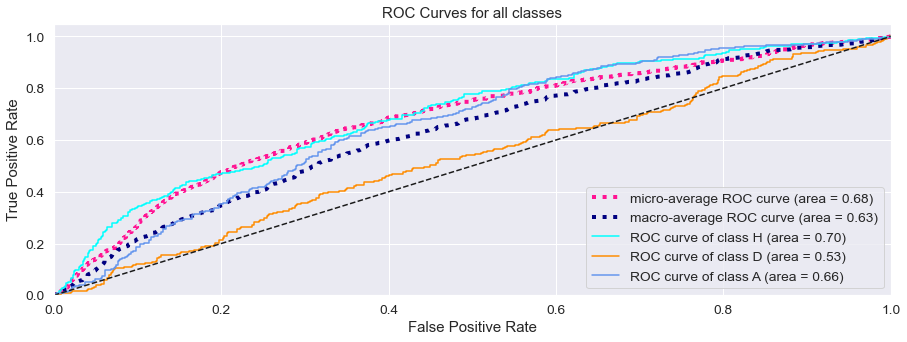

In [101]:
# Plotting ROC curves
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

n_classes = 3

y_score = model.predict_proba(X_test_cnn)
# We need to do this because for some reason cnn#predict_proba returns a 3D array which is actually a 2D array with the elements wrapped in two arrays
y_score_fixed = []
for i in range(len(y_score)):
    y_score_fixed.append(y_score[i][0])
y_score_fixed = np.array(y_score_fixed)

y_test_categorical = keras.utils.to_categorical(y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_score_fixed[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_categorical.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Process of plotting roc-auc curve belonging to all classes.

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

class_map = {0: "H", 1: "D", 2: "A"}
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_map[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for all classes')
plt.legend(loc="lower right")
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()

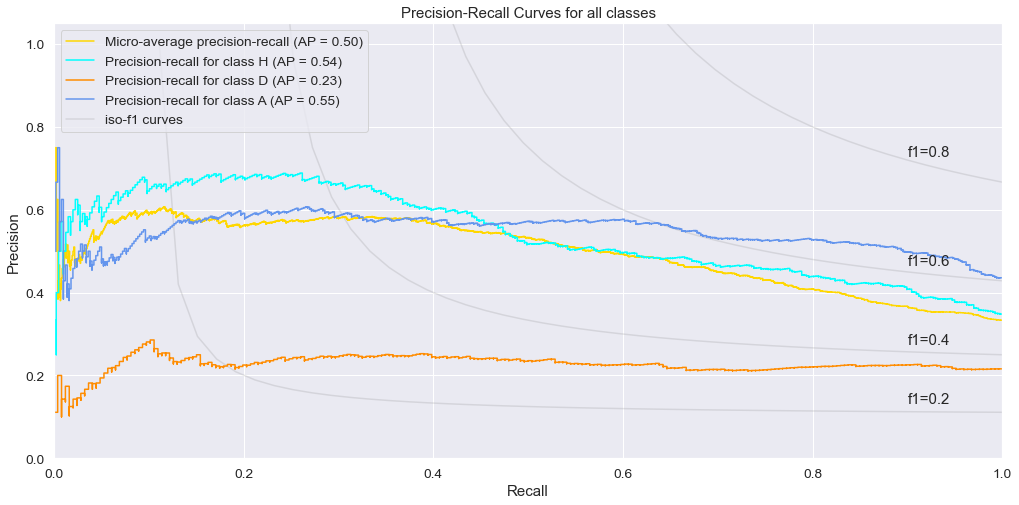

In [102]:
# Plotting Precision Recall curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_categorical[:, i], y_score_fixed[:, i])
    average_precision[i] = average_precision_score(y_test_categorical[:, i], y_score_fixed[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_categorical.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test_categorical, y_score_fixed, average="micro")

_, ax = plt.subplots(figsize=(17, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")
    
for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_map[i]}", color=color)
    
# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision-Recall Curves for all classes")

plt.show()

### 5.4 Time Series Models
<a name='section54'></a>

#### 5.4.1 Prophet
<a name='section541'></a>

In [ ]:
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

# Please ensure you have uncommented the last line in the first cell (with all the import statements) before running this cell


def objective(trial, df):
    seasonality = ['additive', 'multiplicative']
    param_grid = {
        "changepoint_prior_scale": trial.suggest_uniform("changepoint_prior_scale", 0.001, 0.5),
        "seasonality_prior_scale": trial.suggest_uniform("seasonality_prior_scale", 0.01, 10),
        "seasonality_mode": seasonality[trial.suggest_int("seasonality_mode", 0, 1)]
    }

    m = Prophet(**param_grid)
    m.fit(df)
    df_cv = diagnostics.cross_validation(m, 
                             initial='3458 days', 
                             period='13 days', 
                             horizon = '13 days',
                             parallel="processes")
    
    df_p = diagnostics.performance_metrics(df_cv, rolling_window=1)
    
    return df_p['rmse'].values[0]


ds = pd.to_datetime(data["Date"])
ds = ds.iloc[380:] # chop off first season to match current data

encoder = LabelEncoder().fit(y)

# Prophet expects data as (ds, y) where ds is the date and y is the observation on that date
prophet_df = pd.DataFrame()
prophet_df["ds"] = ds
prophet_df["y"] = encoder.transform(y)

# This process can take a long time so we have added a flag that can be set if you just wish to see the accuracy with precomputed hyperparameters
FIND_BEST_PARAMS = False
if FIND_BEST_PARAMS:
    study = optuna.create_study()
    func = lambda trial: objective(trial, prophet_df)
    study.optimize(func, n_trials=20)
    print(f"\tBest value (rmse): {study.best_value}")
    print(f"\tBest params:")
    for key, value in study.best_params.items():
        print(f"\t\t{key}: {value}")
    best_params = study.best_params
else:
    best_params = {
        "changepoint_prior_scale": 0.3742218538948863,
        "seasonality_prior_scale": 0.05051527961102975,
        "seasonality_mode": 'multiplicative'
    }

model = Prophet(**best_params)

# 3458 is the equivalent of 266 seasons if we define a season as 13 matches and reserve the remaining 114 seasons for testing
ds_train = prophet_df.head(3458)
ds_test = prophet_df.tail(len(prophet_df) - 3458)

model.fit(ds_train)

future = ds_test.drop(columns=["y"])

forecast = model.predict(future)

accuracy = accuracy_score(ds_test["y"], np.rint(forecast["yhat"]))
print(accuracy)

prophet_cr = classification_report(ds_test["y"], np.rint(forecast["yhat"]), output_dict=True, zero_division = True)

#### 5.4.2 Arima
<a name='section542'></a>

In [ ]:
# Arima
# Summary:
# This model doesn't have any hyperparameter tuning because Optuna was run for over 2 hours and never returned
# So we resorted to using the default hyperparameters to see what kind of accuracy we could expect
# The accuracy we obtained is one of the lowest out of all the models we tried so we decided to focus on more promising models


def get_predictions(X):
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = SARIMAX(history)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(round(yhat))
        history.append(test[t])
    return test, predictions


idx = data['Date']
idx = idx.iloc[380:] # chop off first season to match current data
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)
ts = pd.Series(y, index=idx).astype('float32')

test, preds = get_predictions(ts)
print(accuracy_score(test, preds))
arima_cr = classification_report(test, preds, output_dict=True, zero_division = True)

## 6. Results
<a name='section6'></a>

### Definitions
- The recall means "how many of this class you find over the whole number of elements of this class"
- The precision will be "how many are correctly classified among that class"
- The f1-score is the harmonic mean between precision & recall
- The support is the number of occurence of the given class in your dataset

### 6.1 Calculate Train and Test Accuracies
<a name='section61'></a>

In [80]:
#Define Training Models and CR

## Standard Models Training Accuracy##
gnb_vis_pred_train = gnb_final.fit(X_train, y_train).predict(X_train)
svm_vis_pred_train = svm_final.fit(X_train, y_train).predict(X_train)
lr_vis_pred_train = lr_final.fit(X_train, y_train).predict(X_train)

## Boosting Models ##
xgb_vis_pred_train = xgb_final.fit(X_train, y_train).predict(X_train)
abc_vis_pred_train = abc_final.fit(X_train, y_train).predict(X_train)
gbc_vis_pred_train = gbc_final.fit(X_train, y_train).predict(X_train)
lightgbm_vis_pred_train = lightgbm_final.predict(X_train)

## NN Models ##
# Defined in models

## Time Series Modules ##
# prophet_vis_pred_train = prophet_final.predict(X_test)
# arima_vis_pred_train = arima_final.predict(X_test)

#Save results as dict
lr_cr_train = classification_report(y_train, lr_vis_pred_train, output_dict=True)
gnb_cr_train = classification_report(y_train, gnb_vis_pred_train, output_dict=True)
svm_cr_train = classification_report(y_train, svm_vis_pred_train, output_dict=True)
xgb_cr_train = classification_report(y_train, xgb_vis_pred_train, output_dict=True)
abc_cr_train = classification_report(y_train, abc_vis_pred_train, output_dict=True)
gbc_cr_train = classification_report(y_train, gbc_vis_pred_train, output_dict=True)
lightgbm_cr_train = classification_report(y_train, lightgbm_vis_pred_train, output_dict=True)
vnn_cr_train = vnn_train_acc
dnn_cr_train = dnn_train_acc

# Accuracy for below defined in models
# RNN, GRU, LSTM, CNN, PROPHET, ARIMA

[02:16:07] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [81]:
#Define Testing Models and CR

## Standard Models Test Accuracy ##
gnb_vis_pred = gnb_final.fit(X_train, y_train).predict(X_test)
svm_vis_pred = svm_final.fit(X_train, y_train).predict(X_test)
lr_vis_pred = lr_final.fit(X_train, y_train).predict(X_test)

## Boosting Models ##
xgb_vis_pred = xgb_final.fit(X_train, y_train).predict(X_test)
abc_vis_pred = abc_final.fit(X_train, y_train).predict(X_test)
gbc_vis_pred = gbc_final.fit(X_train, y_train).predict(X_test)
lightgbm_vis_pred = lightgbm_final.predict(X_test)

## NN Models ##
# Defined in models

## Time Series Modules ##
# Defined in models

print(classification_report(y_test, lr_vis_pred, output_dict=True))

#Save results as dict
lr_cr = classification_report(y_test, lr_vis_pred, output_dict=True)
gnb_cr = classification_report(y_test, gnb_vis_pred, output_dict=True)
svm_cr = classification_report(y_test, svm_vis_pred, output_dict=True)
xgb_cr = classification_report(y_test, xgb_vis_pred, output_dict=True)
abc_cr = classification_report(y_test, abc_vis_pred, output_dict=True)
gbc_cr = classification_report(y_test, gbc_vis_pred, output_dict=True)
lightgbm_cr = classification_report(y_test, lightgbm_vis_pred, output_dict=True)
# Accuracy for below defined in models
# RNN, GRU, LSTM, CNN, PROPHET, ARIMA

#Prophet cr manually defined
prophet_cr = {
    '0': {
        'precision': 1.0, 
        'recall': 0.0, 
        'f1-score': 0.0, 
        'support': 1272}, 
    '1': {
        'precision': 0.2531201248049922, 
        'recall': 0.6451292246520874,
        'f1-score': 0.36358543417366945,
        'support': 1006},
    '2': {'precision': 0.4429657794676806, 
          'recall': 0.375,
          'f1-score': 0.4061592097617664,
          'support': 1864}, 
    'accuracy': 0.32544664413326896, 
    'macro avg': {
        'precision': 0.5653619680908909,
        'recall': 0.34004307488402913,
        'f1-score': 0.2565815479784786, 
        'support': 4142}, 
    'weighted avg': {
        'precision': 0.5679205838922209,
        'recall': 0.32544664413326896,
        'f1-score': 0.27108829400643264, 
        'support': 4142}
}

#Arima cr manually defined
arima_cr = {
    '0': {
        'precision': 0.3333333333333333, 
        'recall': 0.33287671232876714, 
        'f1-score': 0.33310486634681286, 
        'support': 730}, 
    '1': {
        'precision': 0.24242424242424243, 
        'recall': 0.7014925373134329, 
        'f1-score': 0.3603258265452803, 
        'support': 536}, 
    '2': {'precision': 1.0, 
          'recall': 0.0,
          'f1-score': 0.0,
          'support': 1014}, 
    'accuracy': 0.27149122807017545, 
    'macro avg': {
        'precision': 0.5252525252525252, 
        'recall': 0.34478974988073335,
        'f1-score': 0.23114356429736438, 
        'support': 2280},
    'weighted avg': {
        'precision': 0.6084529505582137, 
        'recall': 0.27149122807017545,
        'f1-score': 0.1913601734480016, 
        'support': 2280}
}

[02:16:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'0': {'precision': 0.5548780487804879, 'recall': 0.45843828715365237, 'f1-score': 0.5020689655172415, 'support': 397}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 246}, '2': {'precision': 0.5135467980295566, 'recall': 0.8390342052313883, 'f1-score': 0.6371275783040488, 'support': 497}, 'accuracy': 0.525438596491228, 'macro avg': {'precision': 0.35614161560334817, 'recall': 0.43249083079501355, 'f1-score': 0.37973218127376346, 'support': 1140}, 'weighted avg': {'precision': 0.41712223156714323, 'recall': 0.525438596491228, 'f1-score': 0.4526085839714536, 'support': 1

### 6.2 Accuracy Comparison Plots
<a name='section62'></a>

#### 6.2.1 Individual Training Accuracy
<a name='section621'></a>

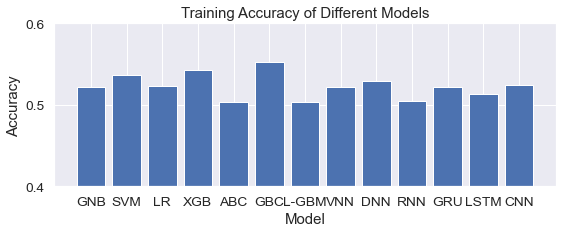

In [82]:
#Names of models for columns
models = ['GNB','SVM','LR','XGB','ABC','GBC','L-GBM','VNN','DNN','RNN','GRU','LSTM','CNN']

#Plot of models by accuracy
accuracy = [gnb_cr_train["accuracy"],
            svm_cr_train["accuracy"],
            lr_cr_train["accuracy"],
            xgb_cr_train["accuracy"],
            abc_cr_train["accuracy"],
            gbc_cr_train["accuracy"],
            lightgbm_cr_train["accuracy"],
            vnn_cr_train["accuracy"],
            dnn_cr_train["accuracy"],
            rnn_train_acc,
            gru_train_acc,
            lstm_train_acc,
            cnn_train_acc]

fig, ax = plt.subplots(figsize=(9, 3))
plt.bar(models, accuracy)
ax.set_title('Training Accuracy of Different Models')
ax.set_yticks([0.40, 0.5, 0.6])
ax.set_ylim([0.40, 0.6])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()


#### 6.2.2 Individual Testing Accuracy
<a name='section622'></a>

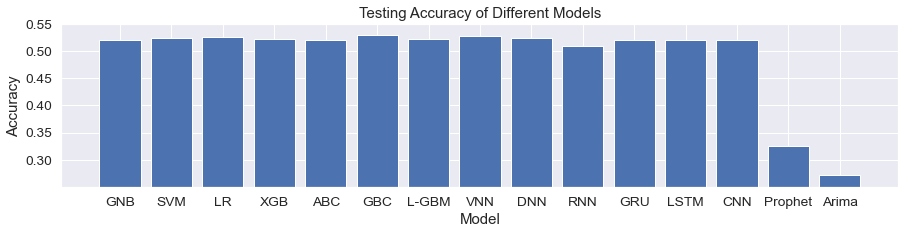

In [83]:
#Names of models for columns
models = ['GNB','SVM','LR','XGB','ABC','GBC','L-GBM','VNN','DNN','RNN','GRU','LSTM','CNN','Prophet','Arima']

#Plot of models by accuracy
accuracy = [gnb_cr["accuracy"],
            svm_cr["accuracy"],
            lr_cr["accuracy"],
            xgb_cr["accuracy"],
            abc_cr["accuracy"],
            gbc_cr["accuracy"],
            lightgbm_cr["accuracy"],
            vnn_cr["accuracy"],
            dnn_cr["accuracy"],
            rnn_cr["accuracy"],
            gru_cr["accuracy"],
            lstm_cr["accuracy"],
            cnn_cr["accuracy"],
            prophet_cr["accuracy"],
            arima_cr["accuracy"]]

fig, ax = plt.subplots(figsize=(15, 3))
plt.bar(models, accuracy)
ax.set_title('Testing Accuracy of Different Models')
ax.set_yticks([0.3, 0.35, 0.4, 0.45, 0.5, 0.55])
ax.set_ylim([0.25, 0.55])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()


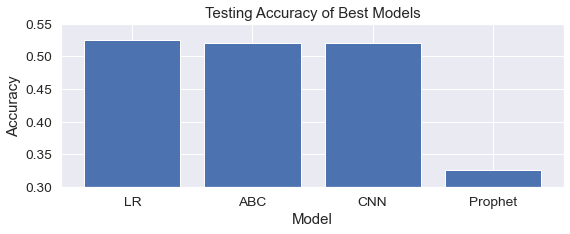

In [84]:
#Plot of best models for each model type
best_accuracy = [lr_cr["accuracy"],
                 abc_cr["accuracy"],
                 cnn_cr["accuracy"],
                 prophet_cr["accuracy"]]
best_models = ['LR','ABC','CNN','Prophet']
fig, ax = plt.subplots(figsize=(9, 3))
plt.bar(best_models, best_accuracy)
ax.set_title('Testing Accuracy of Best Models')
ax.set_yticks([0.3, 0.35, 0.4, 0.45, 0.5, 0.55])
ax.set_ylim([0.3, 0.55])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()

#### 6.2.3 Training Accuracy Grouped by Model Type
<a name='section623'></a>

In [85]:
# Standard Models Training Accuracy
# Collective Base Training Accuracy 
base_cr = lr_cr_train["accuracy"] + gnb_cr_train["accuracy"] + svm_cr_train["accuracy"]
base_cr = base_cr/3
print("base:",base_cr)

# Collective Boost Training Accuracy 
boost_cr = xgb_cr_train["accuracy"] + abc_cr_train["accuracy"] + gbc_cr_train["accuracy"] + lightgbm_cr_train["accuracy"]
boost_cr = boost_cr/4
print("boost:",boost_cr)

# Collective NN Training Accuracy 
nn_cr = vnn_cr_train["accuracy"] + dnn_cr_train["accuracy"] + rnn_train_acc +  gru_train_acc +   lstm_train_acc + cnn_train_acc
nn_cr = nn_cr/6
print("nn:",nn_cr)

# Collective TS Testing Accuracy 
# Hardcoded
ts_cr=(0.33 + 0.27)/2
print("ts:",ts_cr)

base: 0.5270676691729324
boost: 0.5253289473684211
nn: 0.5188283188749375
ts: 0.30000000000000004


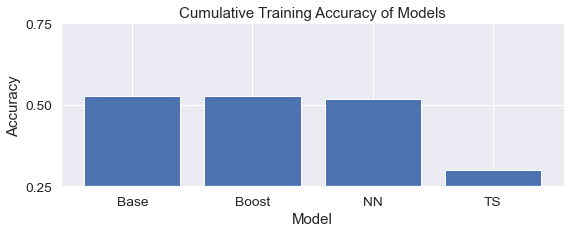

In [86]:
#Names of models for columns
#models = ['Base','Boost']
# For after fix
models = ['Base','Boost','NN','TS']


#Plot of models by accuracy
accuracy = [base_cr,
            boost_cr,
            nn_cr,
            ts_cr]


fig, ax = plt.subplots(figsize=(9, 3))
plt.bar(models, accuracy, width=0.8)
ax.set_title('Cumulative Training Accuracy of Models')
ax.set_yticks([0.25, 0.5, 0.75])
ax.set_ylim([0.25, 0.75])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()

#### 6.2.4 Testing Accuracy Grouped by Model Type
<a name='section624'></a>

In [93]:
## Standard Models Test Accuracy ##

#Collective Base Training Accuracy 
base_cr = lr_cr["accuracy"] + gnb_cr["accuracy"] + svm_cr["accuracy"]
base_cr = base_cr/3
print("base:",base_cr)

#Collective Boost Training Accuracy 
boost_cr = xgb_cr["accuracy"] + abc_cr["accuracy"] + gbc_cr["accuracy"] + lightgbm_cr["accuracy"]
boost_cr = boost_cr/4
print("boost:",boost_cr)

#Collective NN Training Accuracy 
nn_cr = vnn_cr["accuracy"] + dnn_cr["accuracy"] + rnn_cr["accuracy"] + gru_cr["accuracy"] +  lstm_cr["accuracy"] + cnn_cr["accuracy"] 
nn_cr = nn_cr/6
print("nn:",nn_cr)

#Collective TS Testing Accuracy 
ts_cr =  prophet_cr["accuracy"] + arima_cr["accuracy"]
ts_cr = ts_cr/2

print("ts:",ts_cr)

base: 0.5230994152046783
boost: 0.5234649122807017
nn: 0.5206140350877193
ts: 0.2984689361017222


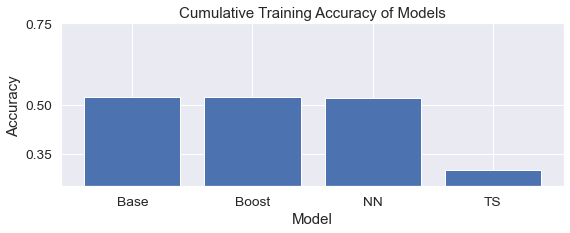

In [90]:
#Names of models for columns
models = ['Base','Boost','NN','TS']


#Plot of models by accuracy
accuracy = [base_cr,
            boost_cr,
            nn_cr,
            ts_cr]


fig, ax = plt.subplots(figsize=(9, 3))
plt.bar(models, accuracy, width=0.8)
ax.set_title('Cumulative Training Accuracy of Models')
ax.set_yticks([0.35, 0.5, 0.75])
ax.set_ylim([0.25, 0.75])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
plt.show()

### 6.3 Comparison of Best Models from Each Category
<a name='section63'></a>

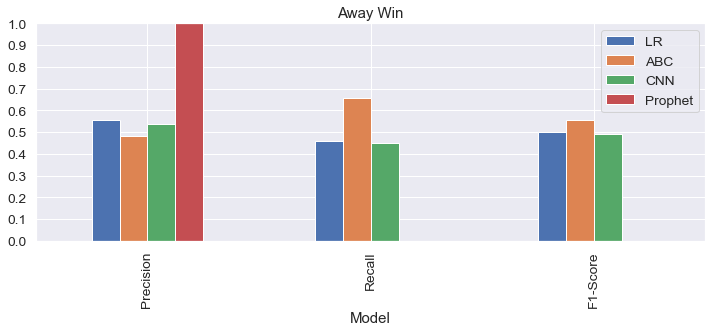

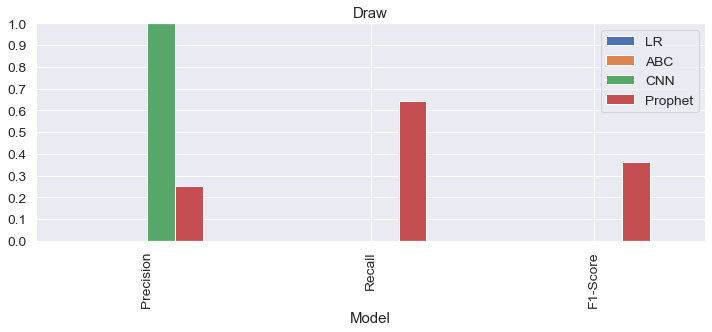

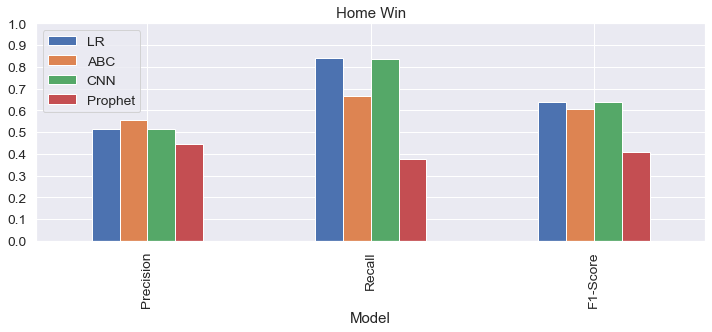

In [91]:
# Plot best models from each category
def output_model_comp (output):
    best_model_comp = pd.DataFrame([['Precision', 
                                     lr_cr[output]['precision'], 
                                     abc_cr[output]['precision'], 
                                     cnn_cr[output]['precision'], 
                                     prophet_cr[output]['precision']], 
                                    ['Recall', 
                                     lr_cr[output]['recall'], 
                                     abc_cr[output]['recall'], 
                                     cnn_cr[output]['recall'], 
                                     prophet_cr[output]['recall']], 
                                    ['F1-Score',
                                     lr_cr[output]["f1-score"], 
                                     abc_cr[output]["f1-score"], 
                                     cnn_cr[output]["f1-score"], 
                                     prophet_cr[output]["f1-score"]]], 
                  columns=['Model', 'LR', 'ABC', 'CNN','Prophet'])
    return best_model_comp

yaxis = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fig1 = output_model_comp('0').plot(x='Model', kind='bar', stacked=False, title='Away Win', figsize=(12,4), ylim=(0,1), yticks=yaxis)
fig2 = output_model_comp('1').plot(x='Model', kind='bar', stacked=False, title='Draw', figsize=(12,4), ylim=(0,1), yticks=yaxis)
fig3 = output_model_comp('2').plot(x='Model', kind='bar', stacked=False, title='Home Win', figsize=(12,4), ylim=(0,1), yticks=yaxis)

## 7. Final Predictions on Test Set
<a name='section7'></a>

## 7.1 Data Cleaning
<a name='section71'></a>

In [94]:
# The most up-to-date data of season 2021 is named 'updatedData' 
# Test set is named as 'testData'

# FULL DATASET ALTERNATIVE FROM 2000 - 2021 FOR TRAINING 
updatedData = data.append(updatedData, ignore_index = True) # Comment out if not needed

# only pick the columns that are presented in the training set, drop the others
updatedData = updatedData[data.columns.tolist()]

# check if there are invalid data
assert updatedData.shape[0] == removeInvalidData(updatedData).shape[0]

## 7.2 Priors Derivation 
<a name='section72'></a>

In [95]:
# concatenate the up-to-date data of season 2021 and the test set
final_data = pd.concat([updatedData,testData],ignore_index=True,sort=False) 


attributesToDrop = ["FTR", "FTHG", "FTAG", "HS", "AS", "HR", "AR", "FTHG", "FTAG", "FTR", "HTHG", "HTAG", "HTR", "Referee", "HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR"]
# convert different date formats into test set format
convertDate(final_data)

#construct priors for test set
final_data = DerivePriors(final_data)

# remove intermediate data like FTR, HTR etc
# the order of removing unwanted data is also different from the previous, so we have to pre-define them
final_data = final_data.drop(attributesToDrop, 1)


# Due to the lack of data at the beginning of each year, there are rows containing empty values. 
# Remove invalid or empty values.
removeInvalidData(final_data)
final_data

C:\Users\Fahim\anaconda3\envs\ML3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Date    HomeTeam     AwayTeam      HHTR      AHTR    PHGS    PAGS  \
30   2000-05-09  Man United     Bradford  0.500000  0.250000     5.0     2.0   
31   2000-05-09  Sunderland     West Ham  0.000000  0.000000     3.0     4.0   
32   2000-05-09   Tottenham      Everton  0.500000  0.250000     4.0     5.0   
33   2000-06-09    Charlton  Southampton  0.500000  0.250000     7.0     6.0   
34   2000-06-09     Chelsea      Arsenal  0.250000  0.250000     5.0     7.0   
...         ...         ...          ...       ...       ...     ...     ...   
8143 2022-01-15   Liverpool    Brentford  0.413497  0.235294  1467.0    21.0   
8144 2022-01-15   Tottenham      Arsenal  0.339483  0.396319  1270.0  1521.0   
8145 2022-01-15    Man City      Chelsea  0.422136  0.455215  1412.0  1500.0   
8146 2022-01-15   Newcastle      Watford  0.265223  0.212245   916.0   262.0   
8147 2022-01-15     Burnley    Leicester  0.202128  0.264484   280.0   548.0   

          PHS      PAS   PHSOT   PASOT    PHTF    PATF    PHTC    PATC  PHTHG  \
30       42.0     23.0    20.0     9.0    23.0    33.0    18.0    13.0    3.0   
31       26.0     46.0     9.0    25.0    36.0    42.0    11.0    25.0    0.0   
32       41.0     37.0    12.0    23.0    42.0    48.0    10.0    18.0    3.0   
33       32.0     39.0    22.0    17.0    43.0    38.0    14.0    21.0    4.0   
34       42.0     49.0    23.0    28.0    47.0    58.0    21.0    27.0    2.0   
...       ...      ...     ...     ...     ...     ...     ...     ...    ...   
8143  12339.0    180.0  5664.0    64.0  8715.0   171.0  5293.0    61.0  643.0   
8144  10941.0  11301.0  5184.0  5560.0  9107.0  8903.0  4752.0  5116.0  559.0   
8145  11200.0  12193.0  5088.0  5596.0  8691.0  9034.0  5040.0  5041.0  653.0   
8146   8536.0   2685.0  3913.0   919.0  8676.0  3123.0  3838.0  1139.0  412.0   
8147   2898.0   4554.0  1031.0  1779.0  2917.0  4495.0  1219.0  2115.0  130.0   

      PHTAG  PSHHG  PSHAG  PHTHGC  PHTAGC  PSHHGC  PSHAGC  PMPH  PMPA  \
30      1.0    2.0    1.0     1.0     0.0     2.0     1.0     3     3   
31      0.0    3.0    4.0     2.0     2.0     3.0     5.0     3     3   
32      2.0    1.0    3.0     2.0     2.0     2.0     2.0     3     3   
33      2.0    3.0    4.0     1.0     3.0     7.0     4.0     3     3   
34      2.0    3.0    5.0     2.0     2.0     3.0     2.0     3     3   
...     ...    ...    ...     ...     ...     ...     ...   ...   ...   
8143    9.0  824.0   12.0   349.0    14.0   445.0     8.0   814    16   
8144  677.0  711.0  844.0   419.0   400.0   569.0   450.0   812   814   
8145  685.0  759.0  815.0   354.0   328.0   475.0   407.0   776   814   
8146  108.0  504.0  154.0   462.0   183.0   610.0   212.0   738   244   
8147  231.0  150.0  317.0   199.0   263.0   224.0   297.0   281   396   

              DIS        HAS        AAS HM1 AM1 HM2 AM2 HM3 AM3  HCGD  ACGD  
30    5929.953613  14.000000   7.666667   D   D   D   W   W   L   2.0   1.0  
31     388.301483   8.666667  15.333333   L   D   L   L   W   L  -2.0  -3.0  
32     283.650818  13.666667  12.333333   L   D   D   W   W   L   0.0   1.0  
33    5643.145996  10.666667  13.000000   L   D   L   L   W   D  -1.0  -1.0  
34       9.968060  14.000000  16.333333   D   W   L   W   W   L   0.0   3.0  
...           ...        ...        ...  ..  ..  ..  ..  ..  ..   ...   ...  
8143  5928.916504  17.666667   9.666667   W   W   W   D   W   L  33.0  -1.0  
8144     6.140847  13.666667  14.000000   W   W   W   L   W   L  -1.0  -1.0  
8145   261.179108  22.333333  14.333333   W   W   W   L   W   W  24.0  27.0  
8146   378.939545  13.333333  10.000000   L   L   W   L   D   L -17.0 -10.0  
8147   149.019302   8.333333  11.666667   D   W   L   L   D   D  -7.0   0.0  

[8046 rows x 36 columns]

## 7.3 Build Final Dataset 
<a name='section73'></a>

In [96]:
final_data_test = final_data

# Suppress false positive warning
pd.options.mode.chained_assignment = None

# We don't want any of the columns after the "DIS" column
columns = [i for i in range(26)]
final_data_test = final_data_test.iloc[:, columns]

final_data_test['Date'] = pd.to_datetime(final_data_test['Date'])
final_data_test['Month'] = final_data_test['Date'].dt.month
final_data_test['Week'] = final_data_test['Date'].dt.isocalendar().week
final_data_test['Day'] = final_data_test['Date'].dt.day

# Dates are transformed into their sin/cos representation to capture their cyclic nature and reduce dimensionality, further explanation is given in the report
month_sin = transformation(final_data_test["Month"])[0]
month_cos = transformation(final_data_test["Month"])[1]
week_sin = transformation(final_data_test["Week"])[0]
week_cos = transformation(final_data_test["Week"])[1]
day_sin = transformation(final_data_test["Day"])[0]
day_cos = transformation(final_data_test["Day"])[1]

#Encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore')

#Teams
home_t = final_data_test.iloc[:, 1:2]
home_t = encoder.fit_transform(home_t)

away_t = final_data_test.iloc[:, 2:3]
away_t = encoder.fit_transform(away_t) 
teams = pd.DataFrame(home_t.toarray()).add_prefix("home_").join(pd.DataFrame(away_t.toarray()).add_prefix("away_"))

priors = final_data_test.iloc[:, 3:26]

# Compute custom features
# PHGS_PHSOT is ratio of home goals to home shots on target
PHGS_PHSOT = np.where(priors["PHSOT"] != 0, priors["PHGS"]/priors["PHSOT"], 0)
# PHGS_PHSOT is ratio of away goals to away shots on target
PAGS_PASOT = np.where(priors["PASOT"] != 0, priors["PAGS"]/priors["PASOT"], 0)
# PHSOT_PHS is ratio of home shots on target to home shots
PHSOT_PHS = np.where(priors["PHS"] != 0, priors["PHSOT"]/ (priors["PHS"] + priors["PHSOT"]), 0)
# PASOT_PAS is ratio of away shots on target to away shots
PASOT_PAS = np.where(priors["PAS"] != 0, priors["PASOT"]/ (priors["PAS"] + priors["PASOT"]), 0)
# PHTF_PATF is ratio of home fouls to away fouls
PHTF_PATF = np.where(priors["PATF"] != 0, priors["PHTF"]/priors["PATF"], 0)

# Building final dataset
final_data_test = pd.DataFrame()
final_data_test["month_cos"] = month_cos
final_data_test["month_sin"] = month_sin
final_data_test["week_cos"] = week_cos
final_data_test["week_sin"] = week_sin
final_data_test["day_cos"] = day_cos
final_data_test["day_sin"] = day_sin
final_data_test = final_data_test.join(teams)
final_data_test = final_data_test.join(priors.reset_index(drop=True))
final_data_test["PHGS_PHSOT"] = PHGS_PHSOT.tolist()
final_data_test["PAGS_PASOT"] = PAGS_PASOT.tolist()
final_data_test["PHSOT_PHS"] = PHSOT_PHS.tolist()
final_data_test["PASOT_PAS"] = PASOT_PAS.tolist()
final_data_test["PHTF_PATF"] = PHTF_PATF.tolist()

scaler = StandardScaler().fit(final_data_test.iloc[:, 94:])
final_data_test_scaled = scaler.transform(final_data_test.iloc[:, 94:])

final_data_test = pd.DataFrame(final_data_test)
final_data_test = np.array(final_data_test.iloc[:, 0:94])

final_data_test_scaled = np.hstack((final_data_test, final_data_test_scaled))

kpca = KernelPCA(n_components=15, kernel='rbf')
kpca.fit(final_data_test_scaled)
final_data_test = kpca.transform(final_data_test_scaled)

## 7.4 Generate Final Predictions 
<a name='section74'></a>

In [97]:
# Please run the first two cells under 5.3.6 before running this cell

final_data_test_cnn = np.expand_dims(final_data_test, axis=-1)
preds = final_model.predict(final_data_test_cnn)
preds = preds[-10:]
ftr_map = {0: "H", 1: "D", 2: "A"}
for pred in preds:
    ftr = np.argmax(pred[0])
    print(ftr_map[ftr])

A
H
A
A
A
H
H
H
H
A
